In [2]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.2-py2.py3-none-any.whl size=13560 sha256=86d6ed8952135e6c2819518ec8c98768c7e2c488ea9933a42a062d49bab4a99b
  Stored in directory: C:\Users\gmani\AppData\Local\pip\Cache\wheels\e2\1b\b1\f7ff0a6aee79ec158aea4a339d7bd722deb261f65d8c9968c2
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pyforest import *

In [6]:
df=pd.read_csv('Final_data_01.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,number_inpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,...,-0.643839,54.0,0.0,177.0,1062.0,162.0,90.0,0.0,27.0,0.0
1,1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,...,0.704579,26.0,65.0,22.0,143.0,78.0,120.0,13.0,12.0,13.0
2,2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,...,-0.643839,32.0,16.0,88.0,704.0,112.0,210.0,0.0,14.0,0.0
3,3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,...,-0.643839,8.0,0.0,51.0,408.0,40.0,200.0,0.0,5.0,8.0
4,4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,...,-0.643839,48.0,96.0,93.0,496.0,144.0,450.0,16.0,27.0,0.0


In [7]:
df.drop('Unnamed: 0',1,inplace=True)

In [7]:
df.shape

(62344, 46)

In [8]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,...,number_inpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,2.0,...,-0.643839,54.0,0.0,177.0,1062.0,162.0,90.0,0.0,27.0,0.0
1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,2.0,...,0.704579,26.0,65.0,22.0,143.0,78.0,120.0,13.0,12.0,13.0
2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,2.0,...,-0.643839,32.0,16.0,88.0,704.0,112.0,210.0,0.0,14.0,0.0
3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,2.0,...,-0.643839,8.0,0.0,51.0,408.0,40.0,200.0,0.0,5.0,8.0
4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,2.0,...,-0.643839,48.0,96.0,93.0,496.0,144.0,450.0,16.0,27.0,0.0


In [12]:
x=df.drop('readmitted',1)
y=df['readmitted']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
def model(algo, xtrain, xtest, ytrain, ytest):
    algo.fit(xtrain, ytrain)
    y_pred_train = algo.predict(xtrain)
    y_prob_train = algo.predict_proba(xtrain)[:,1]
    
    y_pred_test = algo.predict(xtest)
    y_prob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train set', accuracy_score(ytrain, y_pred_train))
    print('Accuracy on Test set', accuracy_score(ytest, y_pred_test))

    print('AUC on Train set', roc_auc_score(ytrain, y_prob_train))
    print('AUC on Test set', roc_auc_score(ytest, y_prob_test))
    print('-'*90)
    print("confusion Matrix")
    print(confusion_matrix(y_pred_test,ytest))
    print('-'*90)
    print('classification report')
    print(classification_report(y_pred_test,ytest))
    print('-'*90)
    fpr, tpr, thresholds = roc_curve(ytest, y_prob_test)
    
    plt.plot(fpr, tpr,'g')
    plt.plot(fpr, fpr, 'r-')
    plt.show()    

In [12]:
LR=LogisticRegression(random_state=1)
model(LR,xtrain,xtest,ytrain,ytest)

Accuracy on Train set 0.8921402383134739
Accuracy on Test set 0.8940333618477331
AUC on Train set 0.5426635958204654
AUC on Test set 0.5460696320707682
------------------------------------------------------------------------------------------
confusion Matrix
[[16722  1982]
 [    0     0]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     18704
         1.0       0.00      0.00      0.00         0

    accuracy                           0.89     18704
   macro avg       0.50      0.45      0.47     18704
weighted avg       1.00      0.89      0.94     18704

------------------------------------------------------------------------------------------


C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(ytrain)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(xtrain, ytrain)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0.0: 38933, 1.0: 4707})
New dataset shape Counter({0.0: 38933, 1.0: 38933})


In [14]:
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

<IPython.core.display.Javascript object>

C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on Train set 0.6115392024658062
Accuracy on Test set 0.611788878900732
AUC on Train set 0.6577033330529521
AUC on Test set 0.6551925843735796
------------------------------------------------------------------------------------------
confusion Matrix
[[4760 3052]
 [2994 4768]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      7812
         1.0       0.61      0.61      0.61      7762

    accuracy                           0.61     15574
   macro avg       0.61      0.61      0.61     15574
weighted avg       0.61      0.61      0.61     15574

------------------------------------------------------------------------------------------


C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

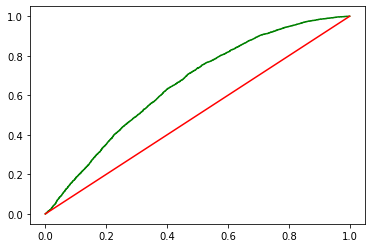

In [15]:
model(logit,X_train,X_test,y_train,y_test)

In [16]:
import warnings 
warnings.filterwarnings('ignore')

Accuracy on Train set 1.0
Accuracy on Test set 0.7965141146278871
AUC on Train set 1.0
AUC on Test set 0.5097259138006923
------------------------------------------------------------------------------------------
confusion Matrix
[[14609  1693]
 [ 2113   289]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     16302
         1.0       0.15      0.12      0.13      2402

    accuracy                           0.80     18704
   macro avg       0.51      0.51      0.51     18704
weighted avg       0.78      0.80      0.79     18704

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

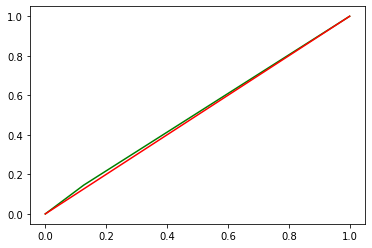

In [17]:
DT=DecisionTreeClassifier(random_state=1)
model(DT,xtrain,xtest,ytrain,ytest)

In [14]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0.0: 55655, 1.0: 6689})
New dataset shape Counter({0.0: 55655, 1.0: 55655})


<IPython.core.display.Javascript object>

Accuracy on Train set 0.9999775402030365
Accuracy on Test set 0.8823106639115983
AUC on Train set 0.999999998991115
AUC on Test set 0.88231783481037
------------------------------------------------------------------------------------------
confusion Matrix
[[9717 1198]
 [1422 9925]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     10915
         1.0       0.89      0.87      0.88     11347

    accuracy                           0.88     22262
   macro avg       0.88      0.88      0.88     22262
weighted avg       0.88      0.88      0.88     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

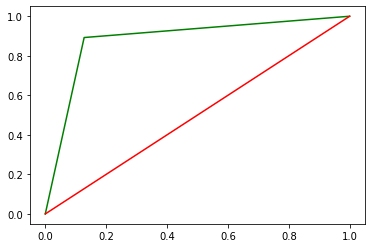

In [19]:
DT=DecisionTreeClassifier(random_state=1)
model(DT,X_train1,X_test1,y_train1,y_test1)

Accuracy on Train set 0.9999663103045549
Accuracy on Test set 0.9396280657622855
AUC on Train set 0.9999999984866725
AUC on Test set 0.9620908738342135
------------------------------------------------------------------------------------------
confusion Matrix
[[11128  1333]
 [   11  9790]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     12461
         1.0       0.88      1.00      0.94      9801

    accuracy                           0.94     22262
   macro avg       0.94      0.95      0.94     22262
weighted avg       0.95      0.94      0.94     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

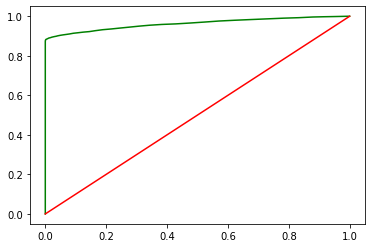

In [20]:
rfc=RandomForestClassifier(random_state=1)
model(rfc,X_train1,X_test1,y_train1,y_test1)

In [21]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,30),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 30),
    'min_samples_split': sp_randint(2,30),
    'min_samples_leaf': sp_randint(1, 30),
    'max_features': sp_randint(2,40)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=10, random_state=1)
rand_search_rfc.fit(x,y)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


Accuracy on Train set 0.9058597610277603
Accuracy on Test set 0.9004132602641272
AUC on Train set 0.9515700336847329
AUC on Test set 0.9437177576847069
------------------------------------------------------------------------------------------
confusion Matrix
[[10607  1685]
 [  532  9438]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91     12292
         1.0       0.85      0.95      0.89      9970

    accuracy                           0.90     22262
   macro avg       0.90      0.90      0.90     22262
weighted avg       0.91      0.90      0.90     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

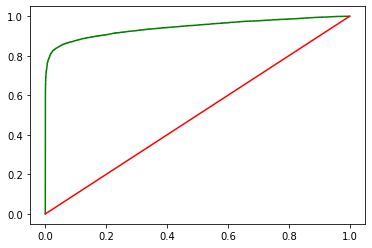

In [27]:
rfc=RandomForestClassifier(**rand_search_rfc.best_params_,random_state=42)
model(rfc,X_train1,X_test1,y_train1,y_test1)

In [28]:
DT=DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 30),
    'min_samples_split': sp_randint(2,30),
    'min_samples_leaf': sp_randint(1, 30),
    'max_features': sp_randint(2,40)}

rand_search_DT = RandomizedSearchCV(DT, param_distributions=params,
                                 cv=10, random_state=1,n_jobs=-1)
rand_search_DT.fit(x,y)
print(rand_search_DT.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 24, 'min_samples_leaf': 14, 'min_samples_split': 11}


Accuracy on Train set 0.6753773245889857
Accuracy on Test set 0.6737489893091366
AUC on Train set 0.6956439040279345
AUC on Test set 0.6915997176315175
------------------------------------------------------------------------------------------
confusion Matrix
[[9464 5588]
 [1675 5535]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.85      0.63      0.72     15052
         1.0       0.50      0.77      0.60      7210

    accuracy                           0.67     22262
   macro avg       0.67      0.70      0.66     22262
weighted avg       0.74      0.67      0.68     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

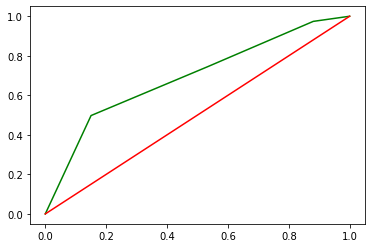

In [29]:
DT=DecisionTreeClassifier(**rand_search_DT.best_params_)
model(DT,X_train1,X_test1,y_train1,y_test1)

Learning rate set to 0.070052
0:	learn: 0.5994816	total: 71.4ms	remaining: 1m 11s
1:	learn: 0.5367791	total: 91.2ms	remaining: 45.5s
2:	learn: 0.4935427	total: 111ms	remaining: 37s
3:	learn: 0.4503191	total: 132ms	remaining: 32.8s
4:	learn: 0.4244453	total: 151ms	remaining: 30.1s
5:	learn: 0.4069131	total: 171ms	remaining: 28.3s
6:	learn: 0.3844399	total: 191ms	remaining: 27.2s
7:	learn: 0.3664290	total: 222ms	remaining: 27.5s
8:	learn: 0.3492514	total: 243ms	remaining: 26.8s
9:	learn: 0.3389623	total: 264ms	remaining: 26.1s
10:	learn: 0.3281106	total: 284ms	remaining: 25.5s
11:	learn: 0.3207995	total: 303ms	remaining: 25s
12:	learn: 0.3114281	total: 324ms	remaining: 24.6s
13:	learn: 0.3056322	total: 343ms	remaining: 24.2s
14:	learn: 0.2981471	total: 363ms	remaining: 23.8s
15:	learn: 0.2891323	total: 383ms	remaining: 23.5s
16:	learn: 0.2848244	total: 409ms	remaining: 23.7s
17:	learn: 0.2786163	total: 430ms	remaining: 23.5s
18:	learn: 0.2745634	total: 449ms	remaining: 23.2s
19:	learn: 0

161:	learn: 0.1964556	total: 3.58s	remaining: 18.5s
162:	learn: 0.1963884	total: 3.6s	remaining: 18.5s
163:	learn: 0.1963277	total: 3.62s	remaining: 18.4s
164:	learn: 0.1962592	total: 3.64s	remaining: 18.4s
165:	learn: 0.1960084	total: 3.66s	remaining: 18.4s
166:	learn: 0.1957268	total: 3.68s	remaining: 18.3s
167:	learn: 0.1954124	total: 3.7s	remaining: 18.3s
168:	learn: 0.1953273	total: 3.72s	remaining: 18.3s
169:	learn: 0.1952427	total: 3.75s	remaining: 18.3s
170:	learn: 0.1951603	total: 3.77s	remaining: 18.3s
171:	learn: 0.1946162	total: 3.81s	remaining: 18.3s
172:	learn: 0.1945372	total: 3.84s	remaining: 18.4s
173:	learn: 0.1944561	total: 3.86s	remaining: 18.3s
174:	learn: 0.1944073	total: 3.89s	remaining: 18.3s
175:	learn: 0.1943324	total: 3.91s	remaining: 18.3s
176:	learn: 0.1937753	total: 3.93s	remaining: 18.3s
177:	learn: 0.1934798	total: 3.96s	remaining: 18.3s
178:	learn: 0.1931665	total: 3.98s	remaining: 18.3s
179:	learn: 0.1931151	total: 4s	remaining: 18.2s
180:	learn: 0.193

320:	learn: 0.1833010	total: 6.86s	remaining: 14.5s
321:	learn: 0.1832336	total: 6.89s	remaining: 14.5s
322:	learn: 0.1831885	total: 6.92s	remaining: 14.5s
323:	learn: 0.1831327	total: 6.93s	remaining: 14.5s
324:	learn: 0.1830914	total: 6.96s	remaining: 14.4s
325:	learn: 0.1830428	total: 6.97s	remaining: 14.4s
326:	learn: 0.1828397	total: 7s	remaining: 14.4s
327:	learn: 0.1827720	total: 7.02s	remaining: 14.4s
328:	learn: 0.1827405	total: 7.04s	remaining: 14.4s
329:	learn: 0.1826874	total: 7.06s	remaining: 14.3s
330:	learn: 0.1825987	total: 7.08s	remaining: 14.3s
331:	learn: 0.1824615	total: 7.1s	remaining: 14.3s
332:	learn: 0.1824015	total: 7.12s	remaining: 14.3s
333:	learn: 0.1823721	total: 7.14s	remaining: 14.2s
334:	learn: 0.1823250	total: 7.16s	remaining: 14.2s
335:	learn: 0.1822597	total: 7.18s	remaining: 14.2s
336:	learn: 0.1822241	total: 7.2s	remaining: 14.2s
337:	learn: 0.1821883	total: 7.22s	remaining: 14.1s
338:	learn: 0.1821490	total: 7.24s	remaining: 14.1s
339:	learn: 0.182

482:	learn: 0.1751687	total: 10.4s	remaining: 11.2s
483:	learn: 0.1751187	total: 10.5s	remaining: 11.2s
484:	learn: 0.1750623	total: 10.5s	remaining: 11.1s
485:	learn: 0.1750205	total: 10.5s	remaining: 11.1s
486:	learn: 0.1749913	total: 10.5s	remaining: 11.1s
487:	learn: 0.1749710	total: 10.5s	remaining: 11.1s
488:	learn: 0.1749086	total: 10.6s	remaining: 11s
489:	learn: 0.1748659	total: 10.6s	remaining: 11s
490:	learn: 0.1747752	total: 10.6s	remaining: 11s
491:	learn: 0.1747407	total: 10.6s	remaining: 11s
492:	learn: 0.1747122	total: 10.7s	remaining: 11s
493:	learn: 0.1745850	total: 10.7s	remaining: 10.9s
494:	learn: 0.1745421	total: 10.7s	remaining: 10.9s
495:	learn: 0.1744915	total: 10.7s	remaining: 10.9s
496:	learn: 0.1744309	total: 10.8s	remaining: 10.9s
497:	learn: 0.1743963	total: 10.8s	remaining: 10.9s
498:	learn: 0.1743230	total: 10.8s	remaining: 10.8s
499:	learn: 0.1742776	total: 10.8s	remaining: 10.8s
500:	learn: 0.1742316	total: 10.9s	remaining: 10.8s
501:	learn: 0.1742090	

647:	learn: 0.1679936	total: 13.9s	remaining: 7.53s
648:	learn: 0.1679400	total: 13.9s	remaining: 7.51s
649:	learn: 0.1679054	total: 13.9s	remaining: 7.49s
650:	learn: 0.1678584	total: 13.9s	remaining: 7.47s
651:	learn: 0.1678196	total: 14s	remaining: 7.45s
652:	learn: 0.1677909	total: 14s	remaining: 7.42s
653:	learn: 0.1677481	total: 14s	remaining: 7.4s
654:	learn: 0.1677175	total: 14s	remaining: 7.38s
655:	learn: 0.1676757	total: 14s	remaining: 7.36s
656:	learn: 0.1676414	total: 14.1s	remaining: 7.33s
657:	learn: 0.1676207	total: 14.1s	remaining: 7.31s
658:	learn: 0.1675805	total: 14.1s	remaining: 7.29s
659:	learn: 0.1675037	total: 14.1s	remaining: 7.27s
660:	learn: 0.1674858	total: 14.1s	remaining: 7.25s
661:	learn: 0.1674585	total: 14.1s	remaining: 7.22s
662:	learn: 0.1674284	total: 14.2s	remaining: 7.2s
663:	learn: 0.1673927	total: 14.2s	remaining: 7.18s
664:	learn: 0.1673583	total: 14.2s	remaining: 7.16s
665:	learn: 0.1673326	total: 14.2s	remaining: 7.13s
666:	learn: 0.1673051	to

808:	learn: 0.1619084	total: 17.3s	remaining: 4.08s
809:	learn: 0.1618776	total: 17.3s	remaining: 4.06s
810:	learn: 0.1618495	total: 17.3s	remaining: 4.04s
811:	learn: 0.1618081	total: 17.3s	remaining: 4.01s
812:	learn: 0.1617811	total: 17.4s	remaining: 4s
813:	learn: 0.1617340	total: 17.4s	remaining: 3.98s
814:	learn: 0.1616920	total: 17.4s	remaining: 3.95s
815:	learn: 0.1616732	total: 17.4s	remaining: 3.93s
816:	learn: 0.1616406	total: 17.5s	remaining: 3.91s
817:	learn: 0.1615774	total: 17.5s	remaining: 3.89s
818:	learn: 0.1615389	total: 17.5s	remaining: 3.87s
819:	learn: 0.1615091	total: 17.5s	remaining: 3.85s
820:	learn: 0.1614818	total: 17.6s	remaining: 3.83s
821:	learn: 0.1614434	total: 17.6s	remaining: 3.81s
822:	learn: 0.1614231	total: 17.6s	remaining: 3.79s
823:	learn: 0.1614058	total: 17.7s	remaining: 3.77s
824:	learn: 0.1613675	total: 17.7s	remaining: 3.75s
825:	learn: 0.1613094	total: 17.7s	remaining: 3.73s
826:	learn: 0.1612593	total: 17.7s	remaining: 3.71s
827:	learn: 0.1

970:	learn: 0.1561779	total: 21.5s	remaining: 641ms
971:	learn: 0.1561589	total: 21.5s	remaining: 619ms
972:	learn: 0.1561352	total: 21.5s	remaining: 597ms
973:	learn: 0.1561123	total: 21.5s	remaining: 575ms
974:	learn: 0.1560647	total: 21.6s	remaining: 553ms
975:	learn: 0.1560181	total: 21.6s	remaining: 531ms
976:	learn: 0.1559836	total: 21.6s	remaining: 509ms
977:	learn: 0.1559272	total: 21.7s	remaining: 487ms
978:	learn: 0.1558895	total: 21.7s	remaining: 465ms
979:	learn: 0.1558463	total: 21.7s	remaining: 443ms
980:	learn: 0.1558298	total: 21.7s	remaining: 421ms
981:	learn: 0.1558003	total: 21.8s	remaining: 399ms
982:	learn: 0.1557724	total: 21.8s	remaining: 377ms
983:	learn: 0.1557593	total: 21.8s	remaining: 355ms
984:	learn: 0.1557311	total: 21.8s	remaining: 333ms
985:	learn: 0.1556827	total: 21.9s	remaining: 310ms
986:	learn: 0.1556571	total: 21.9s	remaining: 288ms
987:	learn: 0.1556212	total: 21.9s	remaining: 266ms
988:	learn: 0.1555909	total: 22s	remaining: 244ms
989:	learn: 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

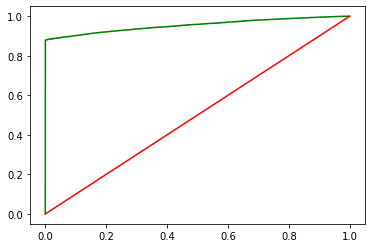

In [22]:
from catboost import CatBoostClassifier
cat= CatBoostClassifier(random_state=1)
model(cat,X_train1,X_test1,y_train1,y_test1)

Accuracy on Train set 0.9386847542898212
Accuracy on Test set 0.939089030635163
AUC on Train set 0.9684758945232371
AUC on Test set 0.9555616858127707
------------------------------------------------------------------------------------------
confusion Matrix
[[11139  1356]
 [    0  9767]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     12495
         1.0       0.88      1.00      0.94      9767

    accuracy                           0.94     22262
   macro avg       0.94      0.95      0.94     22262
weighted avg       0.95      0.94      0.94     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

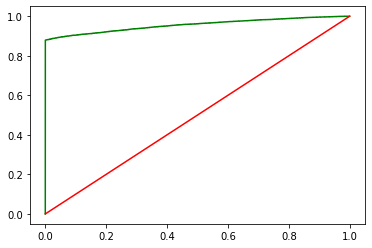

In [23]:
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(random_state=1)
model(lgbc,X_train1,X_test1,y_train1,y_test1)

In [30]:
lgbc=LGBMClassifier()

params={'n_estimators': sp_randint(5,250),
       'max_depth': sp_randint(2, 20),
        'min_child_samples': sp_randint(1, 20),
        'num_leaves': sp_randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc, param_distributions=params,
                                 cv=10, random_state=1,n_jobs=-1)
rand_search_lgbc.fit(x,y)
print(rand_search_lgbc.best_params_)

{'max_depth': 2, 'min_child_samples': 17, 'n_estimators': 134, 'num_leaves': 17}


Accuracy on Train set 0.9266575330159016
Accuracy on Test set 0.9284880064684216
AUC on Train set 0.9504836514444565
AUC on Test set 0.9491615544219826
------------------------------------------------------------------------------------------
confusion Matrix
[[11131  1584]
 [    8  9539]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93     12715
         1.0       0.86      1.00      0.92      9547

    accuracy                           0.93     22262
   macro avg       0.93      0.94      0.93     22262
weighted avg       0.94      0.93      0.93     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

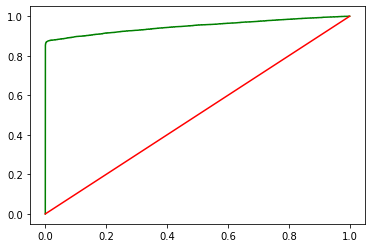

In [33]:
lgbc=LGBMClassifier(**rand_search_lgbc.best_params_)
model(lgbc,X_train1,X_test1,y_train1,y_test1)

In [15]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,...,number_inpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,2.0,...,-0.643839,54.0,0.0,177.0,1062.0,162.0,90.0,0.0,27.0,0.0
1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,2.0,...,0.704579,26.0,65.0,22.0,143.0,78.0,120.0,13.0,12.0,13.0
2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,2.0,...,-0.643839,32.0,16.0,88.0,704.0,112.0,210.0,0.0,14.0,0.0
3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,2.0,...,-0.643839,8.0,0.0,51.0,408.0,40.0,200.0,0.0,5.0,8.0
4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,2.0,...,-0.643839,48.0,96.0,93.0,496.0,144.0,450.0,16.0,27.0,0.0


In [16]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'tolazamide', 'glipizide-metformin',
       'troglitazone', 'tolbutamide', 'acetohexamide', 'numchange', 'nummed',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchange'],
      dtype=

In [17]:
df5=df.drop(['numchange', 'nummed',
        'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchange'],1)
df5.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,...,insulin,glyburide-metformin,tolazamide,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,2.0,...,1,0,0,0,0,0,0,2.186462,-0.3256,0.704579
2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839


In [18]:
x5= df5.drop(['readmitted'],1)
y5=df5['readmitted']

In [19]:
x5train,x5test,y5train,y5test = train_test_split(x5,y5,test_size=0.2,random_state=1)

In [41]:
df5.shape

(62344, 35)

Accuracy on Train set 0.8938345864661654
Accuracy on Test set 0.889566123987489
AUC on Train set 0.7635041594113068
AUC on Test set 0.6170261070692241
------------------------------------------------------------------------------------------
confusion Matrix
[[11092  1374]
 [    3     0]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     12466
         1.0       0.00      0.00      0.00         3

    accuracy                           0.89     12469
   macro avg       0.50      0.44      0.47     12469
weighted avg       1.00      0.89      0.94     12469

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

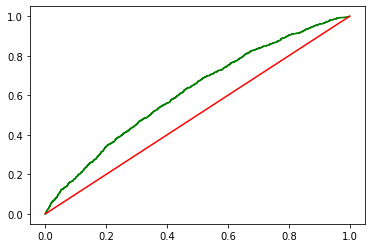

In [45]:
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(random_state=1)
model(lgbc,x5train,x5test,y5train,y5test)

In [32]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x5, y5)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train5, X_test5, y_train5, y_test5 = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0.0: 55655, 1.0: 6689})
New dataset shape Counter({0.0: 55655, 1.0: 55655})


<IPython.core.display.Javascript object>

Accuracy on Train set 0.9369104303297098
Accuracy on Test set 0.9377414428173569
AUC on Train set 0.9627981049338376
AUC on Test set 0.9547125028683623
------------------------------------------------------------------------------------------
confusion Matrix
[[11139  1386]
 [    0  9737]]
------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     12525
         1.0       0.88      1.00      0.93      9737

    accuracy                           0.94     22262
   macro avg       0.94      0.94      0.94     22262
weighted avg       0.95      0.94      0.94     22262

------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

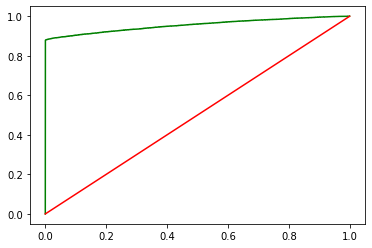

In [48]:
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(random_state=1)
model(lgbc,X_train5, X_test5, y_train5, y_test5)

In [20]:
x5.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,...,insulin,glyburide-metformin,tolazamide,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,2.0,...,1,0,0,0,0,0,0,2.186462,-0.3256,0.704579
2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839
4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.3256,-0.643839


In [22]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [23]:
s=SelectKBest(f_classif,k='all')
s.fit(x5,y5)
cols = s.get_support(indices=True)
features_df_new = x5.iloc[:,cols]
features_df_new

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,...,insulin,glyburide-metformin,tolazamide,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.325600,-0.643839
1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,2.0,...,1,0,0,0,0,0,0,2.186462,-0.325600,0.704579
2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,2.0,...,0,0,0,0,0,0,0,-0.398749,-0.325600,-0.643839
3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.325600,-0.643839
4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.325600,-0.643839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62339,4.0,0.0,40.0,-0.476923,-1.529131,-0.204979,-1.362392,7.0,0.288520,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.325600,-0.643839
62340,4.0,0.0,60.0,-0.809889,0.148005,2.729766,0.119238,4.0,0.830182,2.0,...,1,0,0,0,0,0,0,1.232338,1.862641,0.704579
62341,2.0,0.0,70.0,0.189008,-1.122552,-0.204979,-0.004232,8.0,0.830182,2.0,...,1,0,0,0,0,0,0,-0.398749,-0.325600,0.704579
62342,2.0,0.0,80.0,0.189008,1.672674,-0.204979,0.736583,7.0,0.830182,2.0,...,0,0,0,0,0,0,0,-0.398749,1.862641,-0.643839


In [24]:
from sklearn.model_selection import cross_val_score

In [43]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x5,y5,cv=15)
scores

array([0.80160385, 0.79117883, 0.79182037, 0.79374499, 0.79563683,
       0.79483478, 0.79082451, 0.78633301, 0.77943535, 0.78665383])

In [44]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.01)


In [45]:
# Hyperparam tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
DT=DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 30),
    'min_samples_split': randint(2,30),
    'min_samples_leaf': randint(1, 30),
    'max_features': randint(2,40)}

rand_search_DT = RandomizedSearchCV(DT, param_distributions=params,
                                 cv=10, random_state=1,n_jobs=-1)
rand_search_DT.fit(x5,y5)
print(rand_search_DT.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 24, 'min_samples_leaf': 14, 'min_samples_split': 11}


In [34]:
x5.shape

(62344, 34)

In [46]:
DT=DecisionTreeClassifier(**rand_search_DT.best_params_)
scores=cross_val_score(DT,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.89271109 0.89271109 0.89271109 0.89271109 0.89292589 0.89268527
 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527
 0.89268527 0.89268527 0.89268527]
Accuracy: 0.89 (+/- 0.00)


In [47]:
## Random forest
rf=RandomForestClassifier()
scores=cross_val_score(rf,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.89247053 0.89271109 0.89247053 0.89222997 0.89268527 0.89244466
 0.89268527 0.89244466 0.89268527 0.89244466 0.89244466 0.89268527
 0.89196343 0.89268527 0.89220404]
Accuracy: 0.89 (+/- 0.00)


In [58]:
## tuned parameter
rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': randint(5,30),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 30),
    'min_samples_split': randint(2,30),
    'min_samples_leaf': randint(1, 30),
    'max_features': randint(2,40)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=15, random_state=1)
rand_search_rfc.fit(x5,y5)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


In [59]:
## Random forest
rf=RandomForestClassifier(**rand_search_rfc.best_params_)
scores=cross_val_score(rf,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.89271109 0.89271109 0.89271109 0.89271109 0.89292589 0.89268527
 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527
 0.89268527 0.89268527 0.89268527]
Accuracy: 0.8927 (+/- 0.0001)


In [64]:
### Lightgbm
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier()
scores=cross_val_score(lgbc,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.89271109 0.89295165 0.89271109 0.89271109 0.89292589 0.89220404
 0.89268527 0.89268527 0.89268527 0.89268527 0.89244466 0.89244466
 0.89268527 0.89244466 0.89220404]
Accuracy: 0.8926 (+/- 0.0004)


In [53]:
# Tuned
lgbc=LGBMClassifier()

params={'n_estimators': randint(5,250),
       'max_depth': randint(2, 20),
        'min_child_samples': randint(1, 20),
        'num_leaves': randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc, param_distributions=params,
                                 cv=15, random_state=1,n_jobs=-1)
rand_search_lgbc.fit(x5,y5)
print(rand_search_lgbc.best_params_)

{'max_depth': 9, 'min_child_samples': 14, 'n_estimators': 139, 'num_leaves': 30}


In [57]:
lgbc=LGBMClassifier(**rand_search_lgbc.best_params_)
scores=cross_val_score(lgbc,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.89271109 0.89295165 0.89271109 0.89271109 0.89316651 0.89220404
 0.89268527 0.89292589 0.89268527 0.89292589 0.89292589 0.89244466
 0.89268527 0.89316651 0.89244466]
Accuracy: 0.8928 (+/- 0.0005)


In [60]:
## catboost
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
scores=cross_val_score(cat,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Learning rate set to 0.058414
0:	learn: 0.6455841	total: 28.8ms	remaining: 28.8s
1:	learn: 0.6046273	total: 59.7ms	remaining: 29.8s
2:	learn: 0.5676388	total: 90.8ms	remaining: 30.2s
3:	learn: 0.5367917	total: 119ms	remaining: 29.6s
4:	learn: 0.5102616	total: 149ms	remaining: 29.7s
5:	learn: 0.4866029	total: 183ms	remaining: 30.3s
6:	learn: 0.4668236	total: 208ms	remaining: 29.5s
7:	learn: 0.4497062	total: 237ms	remaining: 29.4s
8:	learn: 0.4341775	total: 286ms	remaining: 31.4s
9:	learn: 0.4209365	total: 318ms	remaining: 31.4s
10:	learn: 0.4093500	total: 359ms	remaining: 32.3s
11:	learn: 0.4000453	total: 382ms	remaining: 31.5s
12:	learn: 0.3916532	total: 417ms	remaining: 31.7s
13:	learn: 0.3843374	total: 449ms	remaining: 31.6s
14:	learn: 0.3779527	total: 483ms	remaining: 31.7s
15:	learn: 0.3720519	total: 515ms	remaining: 31.7s
16:	learn: 0.3674145	total: 536ms	remaining: 31s
17:	learn: 0.3632047	total: 573ms	remaining: 31.3s
18:	learn: 0.3592681	total: 596ms	remaining: 30.7s
19:	learn:

163:	learn: 0.3225601	total: 5.11s	remaining: 26.1s
164:	learn: 0.3224823	total: 5.14s	remaining: 26s
165:	learn: 0.3224135	total: 5.17s	remaining: 26s
166:	learn: 0.3223503	total: 5.2s	remaining: 26s
167:	learn: 0.3223090	total: 5.23s	remaining: 25.9s
168:	learn: 0.3222859	total: 5.26s	remaining: 25.9s
169:	learn: 0.3222174	total: 5.3s	remaining: 25.9s
170:	learn: 0.3221534	total: 5.33s	remaining: 25.8s
171:	learn: 0.3221059	total: 5.36s	remaining: 25.8s
172:	learn: 0.3221013	total: 5.38s	remaining: 25.7s
173:	learn: 0.3220350	total: 5.42s	remaining: 25.7s
174:	learn: 0.3219568	total: 5.45s	remaining: 25.7s
175:	learn: 0.3219349	total: 5.48s	remaining: 25.6s
176:	learn: 0.3218806	total: 5.51s	remaining: 25.6s
177:	learn: 0.3218447	total: 5.54s	remaining: 25.6s
178:	learn: 0.3217810	total: 5.57s	remaining: 25.6s
179:	learn: 0.3217322	total: 5.61s	remaining: 25.5s
180:	learn: 0.3216753	total: 5.64s	remaining: 25.5s
181:	learn: 0.3216318	total: 5.67s	remaining: 25.5s
182:	learn: 0.321582

323:	learn: 0.3138825	total: 10.2s	remaining: 21.3s
324:	learn: 0.3138132	total: 10.2s	remaining: 21.2s
325:	learn: 0.3137705	total: 10.3s	remaining: 21.2s
326:	learn: 0.3137235	total: 10.3s	remaining: 21.2s
327:	learn: 0.3137058	total: 10.3s	remaining: 21.1s
328:	learn: 0.3136690	total: 10.4s	remaining: 21.1s
329:	learn: 0.3136408	total: 10.4s	remaining: 21.1s
330:	learn: 0.3135771	total: 10.4s	remaining: 21.1s
331:	learn: 0.3135309	total: 10.5s	remaining: 21s
332:	learn: 0.3134566	total: 10.5s	remaining: 21s
333:	learn: 0.3134168	total: 10.5s	remaining: 21s
334:	learn: 0.3133803	total: 10.5s	remaining: 20.9s
335:	learn: 0.3133353	total: 10.6s	remaining: 20.9s
336:	learn: 0.3132877	total: 10.6s	remaining: 20.9s
337:	learn: 0.3132217	total: 10.6s	remaining: 20.8s
338:	learn: 0.3131740	total: 10.7s	remaining: 20.8s
339:	learn: 0.3131222	total: 10.7s	remaining: 20.8s
340:	learn: 0.3130763	total: 10.7s	remaining: 20.7s
341:	learn: 0.3130116	total: 10.8s	remaining: 20.7s
342:	learn: 0.3129

486:	learn: 0.3063588	total: 15.6s	remaining: 16.4s
487:	learn: 0.3063287	total: 15.6s	remaining: 16.4s
488:	learn: 0.3062599	total: 15.6s	remaining: 16.3s
489:	learn: 0.3061971	total: 15.7s	remaining: 16.3s
490:	learn: 0.3061571	total: 15.7s	remaining: 16.3s
491:	learn: 0.3061203	total: 15.7s	remaining: 16.2s
492:	learn: 0.3060674	total: 15.8s	remaining: 16.2s
493:	learn: 0.3059912	total: 15.8s	remaining: 16.2s
494:	learn: 0.3059243	total: 15.8s	remaining: 16.1s
495:	learn: 0.3059113	total: 15.9s	remaining: 16.1s
496:	learn: 0.3058547	total: 15.9s	remaining: 16.1s
497:	learn: 0.3058072	total: 15.9s	remaining: 16s
498:	learn: 0.3057575	total: 16s	remaining: 16s
499:	learn: 0.3057431	total: 16s	remaining: 16s
500:	learn: 0.3056737	total: 16s	remaining: 16s
501:	learn: 0.3056374	total: 16s	remaining: 15.9s
502:	learn: 0.3055281	total: 16.1s	remaining: 15.9s
503:	learn: 0.3054920	total: 16.1s	remaining: 15.9s
504:	learn: 0.3054474	total: 16.1s	remaining: 15.8s
505:	learn: 0.3054102	total:

650:	learn: 0.2993541	total: 20.7s	remaining: 11.1s
651:	learn: 0.2992978	total: 20.7s	remaining: 11s
652:	learn: 0.2992396	total: 20.7s	remaining: 11s
653:	learn: 0.2991803	total: 20.8s	remaining: 11s
654:	learn: 0.2991525	total: 20.8s	remaining: 10.9s
655:	learn: 0.2991282	total: 20.8s	remaining: 10.9s
656:	learn: 0.2990881	total: 20.9s	remaining: 10.9s
657:	learn: 0.2990518	total: 20.9s	remaining: 10.9s
658:	learn: 0.2990123	total: 20.9s	remaining: 10.8s
659:	learn: 0.2989576	total: 20.9s	remaining: 10.8s
660:	learn: 0.2989114	total: 21s	remaining: 10.8s
661:	learn: 0.2988549	total: 21s	remaining: 10.7s
662:	learn: 0.2988189	total: 21s	remaining: 10.7s
663:	learn: 0.2987940	total: 21.1s	remaining: 10.7s
664:	learn: 0.2987466	total: 21.1s	remaining: 10.6s
665:	learn: 0.2987087	total: 21.1s	remaining: 10.6s
666:	learn: 0.2986622	total: 21.2s	remaining: 10.6s
667:	learn: 0.2986370	total: 21.2s	remaining: 10.5s
668:	learn: 0.2985826	total: 21.2s	remaining: 10.5s
669:	learn: 0.2985534	to

815:	learn: 0.2929181	total: 25.8s	remaining: 5.82s
816:	learn: 0.2928833	total: 25.8s	remaining: 5.78s
817:	learn: 0.2928692	total: 25.8s	remaining: 5.75s
818:	learn: 0.2928310	total: 25.9s	remaining: 5.72s
819:	learn: 0.2927754	total: 25.9s	remaining: 5.69s
820:	learn: 0.2927129	total: 26s	remaining: 5.66s
821:	learn: 0.2926678	total: 26s	remaining: 5.63s
822:	learn: 0.2926395	total: 26s	remaining: 5.6s
823:	learn: 0.2925987	total: 26.1s	remaining: 5.57s
824:	learn: 0.2925573	total: 26.1s	remaining: 5.54s
825:	learn: 0.2925231	total: 26.1s	remaining: 5.5s
826:	learn: 0.2924941	total: 26.2s	remaining: 5.47s
827:	learn: 0.2924632	total: 26.2s	remaining: 5.44s
828:	learn: 0.2923923	total: 26.2s	remaining: 5.41s
829:	learn: 0.2923873	total: 26.3s	remaining: 5.38s
830:	learn: 0.2923547	total: 26.3s	remaining: 5.35s
831:	learn: 0.2923294	total: 26.3s	remaining: 5.32s
832:	learn: 0.2922895	total: 26.4s	remaining: 5.29s
833:	learn: 0.2922752	total: 26.4s	remaining: 5.25s
834:	learn: 0.292247

976:	learn: 0.2871520	total: 31.2s	remaining: 734ms
977:	learn: 0.2871167	total: 31.2s	remaining: 702ms
978:	learn: 0.2870988	total: 31.2s	remaining: 670ms
979:	learn: 0.2870551	total: 31.3s	remaining: 638ms
980:	learn: 0.2870115	total: 31.3s	remaining: 606ms
981:	learn: 0.2869698	total: 31.3s	remaining: 574ms
982:	learn: 0.2869345	total: 31.4s	remaining: 542ms
983:	learn: 0.2868711	total: 31.4s	remaining: 511ms
984:	learn: 0.2868240	total: 31.4s	remaining: 479ms
985:	learn: 0.2867927	total: 31.5s	remaining: 447ms
986:	learn: 0.2867683	total: 31.5s	remaining: 415ms
987:	learn: 0.2867341	total: 31.5s	remaining: 383ms
988:	learn: 0.2866907	total: 31.6s	remaining: 351ms
989:	learn: 0.2866304	total: 31.6s	remaining: 319ms
990:	learn: 0.2865997	total: 31.6s	remaining: 287ms
991:	learn: 0.2865735	total: 31.7s	remaining: 255ms
992:	learn: 0.2865221	total: 31.7s	remaining: 223ms
993:	learn: 0.2864663	total: 31.7s	remaining: 192ms
994:	learn: 0.2864015	total: 31.8s	remaining: 160ms
995:	learn: 

140:	learn: 0.3237999	total: 4.41s	remaining: 26.9s
141:	learn: 0.3237289	total: 4.43s	remaining: 26.8s
142:	learn: 0.3236755	total: 4.46s	remaining: 26.8s
143:	learn: 0.3236410	total: 4.5s	remaining: 26.7s
144:	learn: 0.3235654	total: 4.53s	remaining: 26.7s
145:	learn: 0.3235106	total: 4.56s	remaining: 26.7s
146:	learn: 0.3234481	total: 4.59s	remaining: 26.7s
147:	learn: 0.3233825	total: 4.63s	remaining: 26.6s
148:	learn: 0.3233375	total: 4.66s	remaining: 26.6s
149:	learn: 0.3232983	total: 4.69s	remaining: 26.6s
150:	learn: 0.3232403	total: 4.72s	remaining: 26.5s
151:	learn: 0.3231991	total: 4.75s	remaining: 26.5s
152:	learn: 0.3231763	total: 4.79s	remaining: 26.5s
153:	learn: 0.3231338	total: 4.82s	remaining: 26.5s
154:	learn: 0.3231176	total: 4.84s	remaining: 26.4s
155:	learn: 0.3230808	total: 4.87s	remaining: 26.4s
156:	learn: 0.3230202	total: 4.9s	remaining: 26.3s
157:	learn: 0.3229688	total: 4.93s	remaining: 26.3s
158:	learn: 0.3229472	total: 4.97s	remaining: 26.3s
159:	learn: 0.

300:	learn: 0.3151798	total: 9.44s	remaining: 21.9s
301:	learn: 0.3151213	total: 9.47s	remaining: 21.9s
302:	learn: 0.3150918	total: 9.5s	remaining: 21.9s
303:	learn: 0.3150326	total: 9.53s	remaining: 21.8s
304:	learn: 0.3150022	total: 9.57s	remaining: 21.8s
305:	learn: 0.3149500	total: 9.6s	remaining: 21.8s
306:	learn: 0.3149038	total: 9.63s	remaining: 21.7s
307:	learn: 0.3148617	total: 9.66s	remaining: 21.7s
308:	learn: 0.3147889	total: 9.7s	remaining: 21.7s
309:	learn: 0.3147360	total: 9.73s	remaining: 21.7s
310:	learn: 0.3147008	total: 9.76s	remaining: 21.6s
311:	learn: 0.3146465	total: 9.79s	remaining: 21.6s
312:	learn: 0.3146105	total: 9.82s	remaining: 21.6s
313:	learn: 0.3145361	total: 9.85s	remaining: 21.5s
314:	learn: 0.3145029	total: 9.88s	remaining: 21.5s
315:	learn: 0.3144530	total: 9.91s	remaining: 21.5s
316:	learn: 0.3144092	total: 9.95s	remaining: 21.4s
317:	learn: 0.3143712	total: 9.98s	remaining: 21.4s
318:	learn: 0.3143078	total: 10s	remaining: 21.4s
319:	learn: 0.314

464:	learn: 0.3074139	total: 14.8s	remaining: 17s
465:	learn: 0.3073757	total: 14.8s	remaining: 17s
466:	learn: 0.3073063	total: 14.9s	remaining: 17s
467:	learn: 0.3072345	total: 14.9s	remaining: 16.9s
468:	learn: 0.3071833	total: 14.9s	remaining: 16.9s
469:	learn: 0.3071448	total: 15s	remaining: 16.9s
470:	learn: 0.3070942	total: 15s	remaining: 16.9s
471:	learn: 0.3070622	total: 15s	remaining: 16.8s
472:	learn: 0.3070088	total: 15.1s	remaining: 16.8s
473:	learn: 0.3069265	total: 15.1s	remaining: 16.8s
474:	learn: 0.3068861	total: 15.1s	remaining: 16.7s
475:	learn: 0.3068309	total: 15.2s	remaining: 16.7s
476:	learn: 0.3067950	total: 15.2s	remaining: 16.7s
477:	learn: 0.3067540	total: 15.2s	remaining: 16.6s
478:	learn: 0.3066996	total: 15.3s	remaining: 16.6s
479:	learn: 0.3066566	total: 15.3s	remaining: 16.6s
480:	learn: 0.3066059	total: 15.3s	remaining: 16.5s
481:	learn: 0.3065996	total: 15.4s	remaining: 16.5s
482:	learn: 0.3065650	total: 15.4s	remaining: 16.5s
483:	learn: 0.3065216	to

626:	learn: 0.3005517	total: 19.9s	remaining: 11.8s
627:	learn: 0.3005208	total: 19.9s	remaining: 11.8s
628:	learn: 0.3004846	total: 20s	remaining: 11.8s
629:	learn: 0.3004305	total: 20s	remaining: 11.8s
630:	learn: 0.3003860	total: 20s	remaining: 11.7s
631:	learn: 0.3003338	total: 20.1s	remaining: 11.7s
632:	learn: 0.3003103	total: 20.1s	remaining: 11.7s
633:	learn: 0.3002706	total: 20.1s	remaining: 11.6s
634:	learn: 0.3002380	total: 20.2s	remaining: 11.6s
635:	learn: 0.3001989	total: 20.2s	remaining: 11.6s
636:	learn: 0.3001556	total: 20.3s	remaining: 11.5s
637:	learn: 0.3001228	total: 20.3s	remaining: 11.5s
638:	learn: 0.3000869	total: 20.3s	remaining: 11.5s
639:	learn: 0.3000423	total: 20.4s	remaining: 11.5s
640:	learn: 0.3000117	total: 20.4s	remaining: 11.4s
641:	learn: 0.2999764	total: 20.4s	remaining: 11.4s
642:	learn: 0.2999385	total: 20.5s	remaining: 11.4s
643:	learn: 0.2998816	total: 20.5s	remaining: 11.3s
644:	learn: 0.2998226	total: 20.5s	remaining: 11.3s
645:	learn: 0.2998

788:	learn: 0.2942921	total: 25s	remaining: 6.69s
789:	learn: 0.2942680	total: 25s	remaining: 6.66s
790:	learn: 0.2942379	total: 25.1s	remaining: 6.62s
791:	learn: 0.2941850	total: 25.1s	remaining: 6.59s
792:	learn: 0.2941416	total: 25.1s	remaining: 6.56s
793:	learn: 0.2941149	total: 25.2s	remaining: 6.53s
794:	learn: 0.2940936	total: 25.2s	remaining: 6.5s
795:	learn: 0.2940559	total: 25.2s	remaining: 6.47s
796:	learn: 0.2940024	total: 25.3s	remaining: 6.43s
797:	learn: 0.2939787	total: 25.3s	remaining: 6.4s
798:	learn: 0.2939429	total: 25.3s	remaining: 6.37s
799:	learn: 0.2939332	total: 25.4s	remaining: 6.34s
800:	learn: 0.2939070	total: 25.4s	remaining: 6.31s
801:	learn: 0.2938745	total: 25.4s	remaining: 6.28s
802:	learn: 0.2938514	total: 25.5s	remaining: 6.25s
803:	learn: 0.2938110	total: 25.5s	remaining: 6.21s
804:	learn: 0.2937728	total: 25.5s	remaining: 6.18s
805:	learn: 0.2937322	total: 25.6s	remaining: 6.15s
806:	learn: 0.2936975	total: 25.6s	remaining: 6.12s
807:	learn: 0.2936

947:	learn: 0.2882613	total: 30.3s	remaining: 1.66s
948:	learn: 0.2882521	total: 30.3s	remaining: 1.63s
949:	learn: 0.2882323	total: 30.3s	remaining: 1.6s
950:	learn: 0.2881986	total: 30.4s	remaining: 1.56s
951:	learn: 0.2881714	total: 30.4s	remaining: 1.53s
952:	learn: 0.2881269	total: 30.4s	remaining: 1.5s
953:	learn: 0.2880929	total: 30.5s	remaining: 1.47s
954:	learn: 0.2880540	total: 30.5s	remaining: 1.44s
955:	learn: 0.2880413	total: 30.5s	remaining: 1.4s
956:	learn: 0.2880127	total: 30.6s	remaining: 1.37s
957:	learn: 0.2879814	total: 30.6s	remaining: 1.34s
958:	learn: 0.2879441	total: 30.6s	remaining: 1.31s
959:	learn: 0.2878994	total: 30.7s	remaining: 1.28s
960:	learn: 0.2878773	total: 30.7s	remaining: 1.25s
961:	learn: 0.2878347	total: 30.7s	remaining: 1.21s
962:	learn: 0.2877942	total: 30.7s	remaining: 1.18s
963:	learn: 0.2877499	total: 30.8s	remaining: 1.15s
964:	learn: 0.2877087	total: 30.8s	remaining: 1.12s
965:	learn: 0.2876808	total: 30.8s	remaining: 1.08s
966:	learn: 0.2

107:	learn: 0.3253162	total: 3.46s	remaining: 28.6s
108:	learn: 0.3252293	total: 3.49s	remaining: 28.5s
109:	learn: 0.3251571	total: 3.53s	remaining: 28.5s
110:	learn: 0.3251139	total: 3.56s	remaining: 28.5s
111:	learn: 0.3250261	total: 3.59s	remaining: 28.5s
112:	learn: 0.3249916	total: 3.62s	remaining: 28.4s
113:	learn: 0.3249339	total: 3.65s	remaining: 28.4s
114:	learn: 0.3248982	total: 3.69s	remaining: 28.4s
115:	learn: 0.3248943	total: 3.71s	remaining: 28.3s
116:	learn: 0.3248469	total: 3.74s	remaining: 28.2s
117:	learn: 0.3248082	total: 3.77s	remaining: 28.2s
118:	learn: 0.3247472	total: 3.8s	remaining: 28.2s
119:	learn: 0.3247014	total: 3.84s	remaining: 28.1s
120:	learn: 0.3246722	total: 3.87s	remaining: 28.1s
121:	learn: 0.3246248	total: 3.9s	remaining: 28.1s
122:	learn: 0.3245785	total: 3.93s	remaining: 28s
123:	learn: 0.3245377	total: 3.96s	remaining: 28s
124:	learn: 0.3244535	total: 3.99s	remaining: 27.9s
125:	learn: 0.3243896	total: 4.02s	remaining: 27.9s
126:	learn: 0.3243

267:	learn: 0.3168949	total: 8.61s	remaining: 23.5s
268:	learn: 0.3168629	total: 8.63s	remaining: 23.5s
269:	learn: 0.3168419	total: 8.66s	remaining: 23.4s
270:	learn: 0.3167824	total: 8.69s	remaining: 23.4s
271:	learn: 0.3167278	total: 8.72s	remaining: 23.3s
272:	learn: 0.3166805	total: 8.76s	remaining: 23.3s
273:	learn: 0.3166203	total: 8.79s	remaining: 23.3s
274:	learn: 0.3165936	total: 8.82s	remaining: 23.3s
275:	learn: 0.3165119	total: 8.85s	remaining: 23.2s
276:	learn: 0.3164642	total: 8.88s	remaining: 23.2s
277:	learn: 0.3164022	total: 8.91s	remaining: 23.1s
278:	learn: 0.3163505	total: 8.94s	remaining: 23.1s
279:	learn: 0.3162894	total: 8.97s	remaining: 23.1s
280:	learn: 0.3162434	total: 9s	remaining: 23s
281:	learn: 0.3161920	total: 9.04s	remaining: 23s
282:	learn: 0.3161374	total: 9.07s	remaining: 23s
283:	learn: 0.3160905	total: 9.1s	remaining: 22.9s
284:	learn: 0.3160368	total: 9.13s	remaining: 22.9s
285:	learn: 0.3159853	total: 9.19s	remaining: 22.9s
286:	learn: 0.3159709	

429:	learn: 0.3091395	total: 13.9s	remaining: 18.4s
430:	learn: 0.3091098	total: 13.9s	remaining: 18.3s
431:	learn: 0.3090952	total: 13.9s	remaining: 18.3s
432:	learn: 0.3090432	total: 14s	remaining: 18.3s
433:	learn: 0.3089680	total: 14s	remaining: 18.2s
434:	learn: 0.3089274	total: 14s	remaining: 18.2s
435:	learn: 0.3089040	total: 14s	remaining: 18.2s
436:	learn: 0.3088478	total: 14.1s	remaining: 18.1s
437:	learn: 0.3087854	total: 14.1s	remaining: 18.1s
438:	learn: 0.3087434	total: 14.1s	remaining: 18.1s
439:	learn: 0.3087151	total: 14.2s	remaining: 18s
440:	learn: 0.3086928	total: 14.2s	remaining: 18s
441:	learn: 0.3086717	total: 14.2s	remaining: 18s
442:	learn: 0.3086452	total: 14.3s	remaining: 17.9s
443:	learn: 0.3086033	total: 14.3s	remaining: 17.9s
444:	learn: 0.3085615	total: 14.3s	remaining: 17.9s
445:	learn: 0.3085302	total: 14.4s	remaining: 17.8s
446:	learn: 0.3085146	total: 14.4s	remaining: 17.8s
447:	learn: 0.3084659	total: 14.4s	remaining: 17.8s
448:	learn: 0.3084136	tota

591:	learn: 0.3022950	total: 19s	remaining: 13.1s
592:	learn: 0.3022566	total: 19s	remaining: 13.1s
593:	learn: 0.3022113	total: 19.1s	remaining: 13s
594:	learn: 0.3021706	total: 19.1s	remaining: 13s
595:	learn: 0.3021507	total: 19.1s	remaining: 13s
596:	learn: 0.3021152	total: 19.2s	remaining: 12.9s
597:	learn: 0.3020782	total: 19.2s	remaining: 12.9s
598:	learn: 0.3020294	total: 19.2s	remaining: 12.9s
599:	learn: 0.3019839	total: 19.3s	remaining: 12.8s
600:	learn: 0.3019519	total: 19.3s	remaining: 12.8s
601:	learn: 0.3018875	total: 19.3s	remaining: 12.8s
602:	learn: 0.3018383	total: 19.4s	remaining: 12.7s
603:	learn: 0.3017975	total: 19.4s	remaining: 12.7s
604:	learn: 0.3017547	total: 19.4s	remaining: 12.7s
605:	learn: 0.3017061	total: 19.5s	remaining: 12.6s
606:	learn: 0.3016262	total: 19.5s	remaining: 12.6s
607:	learn: 0.3016027	total: 19.5s	remaining: 12.6s
608:	learn: 0.3015641	total: 19.6s	remaining: 12.6s
609:	learn: 0.3015213	total: 19.6s	remaining: 12.5s
610:	learn: 0.3014924	

752:	learn: 0.2957289	total: 24.1s	remaining: 7.91s
753:	learn: 0.2957076	total: 24.1s	remaining: 7.87s
754:	learn: 0.2956810	total: 24.2s	remaining: 7.84s
755:	learn: 0.2956608	total: 24.2s	remaining: 7.8s
756:	learn: 0.2956351	total: 24.2s	remaining: 7.77s
757:	learn: 0.2956106	total: 24.2s	remaining: 7.74s
758:	learn: 0.2955444	total: 24.3s	remaining: 7.71s
759:	learn: 0.2954941	total: 24.3s	remaining: 7.68s
760:	learn: 0.2954609	total: 24.3s	remaining: 7.64s
761:	learn: 0.2954248	total: 24.4s	remaining: 7.61s
762:	learn: 0.2953881	total: 24.4s	remaining: 7.58s
763:	learn: 0.2953577	total: 24.4s	remaining: 7.55s
764:	learn: 0.2953202	total: 24.5s	remaining: 7.52s
765:	learn: 0.2952804	total: 24.5s	remaining: 7.48s
766:	learn: 0.2952512	total: 24.5s	remaining: 7.45s
767:	learn: 0.2952033	total: 24.6s	remaining: 7.42s
768:	learn: 0.2951631	total: 24.6s	remaining: 7.39s
769:	learn: 0.2951214	total: 24.6s	remaining: 7.36s
770:	learn: 0.2950733	total: 24.7s	remaining: 7.32s
771:	learn: 0

911:	learn: 0.2896422	total: 29.4s	remaining: 2.83s
912:	learn: 0.2896087	total: 29.4s	remaining: 2.8s
913:	learn: 0.2895661	total: 29.4s	remaining: 2.77s
914:	learn: 0.2895450	total: 29.5s	remaining: 2.74s
915:	learn: 0.2895208	total: 29.5s	remaining: 2.7s
916:	learn: 0.2894670	total: 29.5s	remaining: 2.67s
917:	learn: 0.2894373	total: 29.6s	remaining: 2.64s
918:	learn: 0.2893784	total: 29.6s	remaining: 2.61s
919:	learn: 0.2893426	total: 29.6s	remaining: 2.58s
920:	learn: 0.2892874	total: 29.7s	remaining: 2.54s
921:	learn: 0.2892491	total: 29.7s	remaining: 2.51s
922:	learn: 0.2891997	total: 29.7s	remaining: 2.48s
923:	learn: 0.2891528	total: 29.8s	remaining: 2.45s
924:	learn: 0.2891126	total: 29.8s	remaining: 2.42s
925:	learn: 0.2890686	total: 29.8s	remaining: 2.38s
926:	learn: 0.2890350	total: 29.9s	remaining: 2.35s
927:	learn: 0.2889961	total: 29.9s	remaining: 2.32s
928:	learn: 0.2889677	total: 29.9s	remaining: 2.29s
929:	learn: 0.2889277	total: 30s	remaining: 2.25s
930:	learn: 0.28

74:	learn: 0.3277098	total: 2.28s	remaining: 28.1s
75:	learn: 0.3276360	total: 2.3s	remaining: 28s
76:	learn: 0.3275841	total: 2.34s	remaining: 28s
77:	learn: 0.3274556	total: 2.37s	remaining: 28s
78:	learn: 0.3273850	total: 2.4s	remaining: 28s
79:	learn: 0.3272480	total: 2.43s	remaining: 28s
80:	learn: 0.3271675	total: 2.47s	remaining: 28s
81:	learn: 0.3270849	total: 2.5s	remaining: 28s
82:	learn: 0.3270317	total: 2.53s	remaining: 28s
83:	learn: 0.3269213	total: 2.56s	remaining: 27.9s
84:	learn: 0.3268405	total: 2.59s	remaining: 27.9s
85:	learn: 0.3267711	total: 2.62s	remaining: 27.9s
86:	learn: 0.3267212	total: 2.65s	remaining: 27.9s
87:	learn: 0.3266360	total: 2.68s	remaining: 27.8s
88:	learn: 0.3265860	total: 2.71s	remaining: 27.8s
89:	learn: 0.3265342	total: 2.74s	remaining: 27.7s
90:	learn: 0.3264488	total: 2.77s	remaining: 27.7s
91:	learn: 0.3264101	total: 2.8s	remaining: 27.7s
92:	learn: 0.3263620	total: 2.83s	remaining: 27.6s
93:	learn: 0.3262704	total: 2.86s	remaining: 27.6s


237:	learn: 0.3189203	total: 7.38s	remaining: 23.6s
238:	learn: 0.3189057	total: 7.41s	remaining: 23.6s
239:	learn: 0.3188147	total: 7.44s	remaining: 23.6s
240:	learn: 0.3187311	total: 7.47s	remaining: 23.5s
241:	learn: 0.3186842	total: 7.5s	remaining: 23.5s
242:	learn: 0.3186066	total: 7.54s	remaining: 23.5s
243:	learn: 0.3185609	total: 7.58s	remaining: 23.5s
244:	learn: 0.3184867	total: 7.61s	remaining: 23.5s
245:	learn: 0.3184414	total: 7.64s	remaining: 23.4s
246:	learn: 0.3183613	total: 7.67s	remaining: 23.4s
247:	learn: 0.3183108	total: 7.7s	remaining: 23.4s
248:	learn: 0.3182509	total: 7.73s	remaining: 23.3s
249:	learn: 0.3182137	total: 7.76s	remaining: 23.3s
250:	learn: 0.3181826	total: 7.8s	remaining: 23.3s
251:	learn: 0.3181353	total: 7.83s	remaining: 23.2s
252:	learn: 0.3180344	total: 7.86s	remaining: 23.2s
253:	learn: 0.3179765	total: 7.89s	remaining: 23.2s
254:	learn: 0.3179138	total: 7.92s	remaining: 23.1s
255:	learn: 0.3178993	total: 7.95s	remaining: 23.1s
256:	learn: 0.3

396:	learn: 0.3104357	total: 12.4s	remaining: 18.9s
397:	learn: 0.3103939	total: 12.5s	remaining: 18.9s
398:	learn: 0.3103797	total: 12.5s	remaining: 18.8s
399:	learn: 0.3103339	total: 12.5s	remaining: 18.8s
400:	learn: 0.3102871	total: 12.6s	remaining: 18.8s
401:	learn: 0.3102214	total: 12.6s	remaining: 18.7s
402:	learn: 0.3101769	total: 12.6s	remaining: 18.7s
403:	learn: 0.3101264	total: 12.6s	remaining: 18.7s
404:	learn: 0.3100871	total: 12.7s	remaining: 18.6s
405:	learn: 0.3100170	total: 12.7s	remaining: 18.6s
406:	learn: 0.3099725	total: 12.7s	remaining: 18.5s
407:	learn: 0.3098896	total: 12.8s	remaining: 18.5s
408:	learn: 0.3098432	total: 12.8s	remaining: 18.5s
409:	learn: 0.3097865	total: 12.8s	remaining: 18.4s
410:	learn: 0.3097616	total: 12.9s	remaining: 18.4s
411:	learn: 0.3097013	total: 12.9s	remaining: 18.4s
412:	learn: 0.3096677	total: 12.9s	remaining: 18.4s
413:	learn: 0.3096236	total: 12.9s	remaining: 18.3s
414:	learn: 0.3095846	total: 13s	remaining: 18.3s
415:	learn: 0.

561:	learn: 0.3029807	total: 17.5s	remaining: 13.7s
562:	learn: 0.3029425	total: 17.6s	remaining: 13.6s
563:	learn: 0.3028965	total: 17.6s	remaining: 13.6s
564:	learn: 0.3028691	total: 17.6s	remaining: 13.6s
565:	learn: 0.3028260	total: 17.7s	remaining: 13.5s
566:	learn: 0.3027911	total: 17.7s	remaining: 13.5s
567:	learn: 0.3027466	total: 17.7s	remaining: 13.5s
568:	learn: 0.3026994	total: 17.8s	remaining: 13.5s
569:	learn: 0.3026664	total: 17.8s	remaining: 13.4s
570:	learn: 0.3026107	total: 17.8s	remaining: 13.4s
571:	learn: 0.3025655	total: 17.9s	remaining: 13.4s
572:	learn: 0.3025245	total: 17.9s	remaining: 13.3s
573:	learn: 0.3024779	total: 17.9s	remaining: 13.3s
574:	learn: 0.3024291	total: 17.9s	remaining: 13.3s
575:	learn: 0.3024056	total: 18s	remaining: 13.2s
576:	learn: 0.3023598	total: 18s	remaining: 13.2s
577:	learn: 0.3023004	total: 18s	remaining: 13.2s
578:	learn: 0.3022641	total: 18.1s	remaining: 13.1s
579:	learn: 0.3022009	total: 18.1s	remaining: 13.1s
580:	learn: 0.3021

721:	learn: 0.2961998	total: 22.7s	remaining: 8.73s
722:	learn: 0.2961587	total: 22.7s	remaining: 8.7s
723:	learn: 0.2961356	total: 22.7s	remaining: 8.67s
724:	learn: 0.2960989	total: 22.8s	remaining: 8.64s
725:	learn: 0.2960592	total: 22.8s	remaining: 8.61s
726:	learn: 0.2960428	total: 22.8s	remaining: 8.57s
727:	learn: 0.2959915	total: 22.9s	remaining: 8.54s
728:	learn: 0.2959495	total: 22.9s	remaining: 8.51s
729:	learn: 0.2959234	total: 22.9s	remaining: 8.49s
730:	learn: 0.2958801	total: 23s	remaining: 8.46s
731:	learn: 0.2958463	total: 23s	remaining: 8.43s
732:	learn: 0.2958183	total: 23.1s	remaining: 8.4s
733:	learn: 0.2957870	total: 23.1s	remaining: 8.37s
734:	learn: 0.2957387	total: 23.1s	remaining: 8.34s
735:	learn: 0.2957055	total: 23.1s	remaining: 8.3s
736:	learn: 0.2956775	total: 23.2s	remaining: 8.27s
737:	learn: 0.2956410	total: 23.2s	remaining: 8.24s
738:	learn: 0.2956058	total: 23.2s	remaining: 8.21s
739:	learn: 0.2955662	total: 23.3s	remaining: 8.18s
740:	learn: 0.29551

881:	learn: 0.2903101	total: 27.8s	remaining: 3.71s
882:	learn: 0.2902817	total: 27.8s	remaining: 3.68s
883:	learn: 0.2902278	total: 27.8s	remaining: 3.65s
884:	learn: 0.2901963	total: 27.9s	remaining: 3.62s
885:	learn: 0.2901397	total: 27.9s	remaining: 3.59s
886:	learn: 0.2901269	total: 27.9s	remaining: 3.56s
887:	learn: 0.2900966	total: 28s	remaining: 3.53s
888:	learn: 0.2900688	total: 28s	remaining: 3.5s
889:	learn: 0.2900184	total: 28s	remaining: 3.46s
890:	learn: 0.2899910	total: 28.1s	remaining: 3.43s
891:	learn: 0.2899778	total: 28.1s	remaining: 3.4s
892:	learn: 0.2899391	total: 28.1s	remaining: 3.37s
893:	learn: 0.2898979	total: 28.2s	remaining: 3.34s
894:	learn: 0.2898555	total: 28.2s	remaining: 3.31s
895:	learn: 0.2898101	total: 28.2s	remaining: 3.27s
896:	learn: 0.2897942	total: 28.2s	remaining: 3.24s
897:	learn: 0.2897637	total: 28.3s	remaining: 3.21s
898:	learn: 0.2897498	total: 28.3s	remaining: 3.18s
899:	learn: 0.2897026	total: 28.3s	remaining: 3.15s
900:	learn: 0.289681

41:	learn: 0.3325493	total: 1.34s	remaining: 30.6s
42:	learn: 0.3322901	total: 1.38s	remaining: 30.7s
43:	learn: 0.3320637	total: 1.42s	remaining: 30.8s
44:	learn: 0.3318154	total: 1.45s	remaining: 30.8s
45:	learn: 0.3315692	total: 1.48s	remaining: 30.8s
46:	learn: 0.3313743	total: 1.51s	remaining: 30.7s
47:	learn: 0.3311560	total: 1.55s	remaining: 30.8s
48:	learn: 0.3309450	total: 1.58s	remaining: 30.7s
49:	learn: 0.3307985	total: 1.61s	remaining: 30.7s
50:	learn: 0.3306762	total: 1.65s	remaining: 30.6s
51:	learn: 0.3304791	total: 1.68s	remaining: 30.6s
52:	learn: 0.3303461	total: 1.71s	remaining: 30.6s
53:	learn: 0.3302048	total: 1.74s	remaining: 30.6s
54:	learn: 0.3300649	total: 1.78s	remaining: 30.5s
55:	learn: 0.3299487	total: 1.8s	remaining: 30.4s
56:	learn: 0.3297768	total: 1.84s	remaining: 30.4s
57:	learn: 0.3296736	total: 1.87s	remaining: 30.4s
58:	learn: 0.3295957	total: 1.9s	remaining: 30.3s
59:	learn: 0.3294678	total: 1.93s	remaining: 30.2s
60:	learn: 0.3293376	total: 1.96s

207:	learn: 0.3208095	total: 6.51s	remaining: 24.8s
208:	learn: 0.3207164	total: 6.54s	remaining: 24.8s
209:	learn: 0.3206388	total: 6.57s	remaining: 24.7s
210:	learn: 0.3205934	total: 6.6s	remaining: 24.7s
211:	learn: 0.3205234	total: 6.63s	remaining: 24.7s
212:	learn: 0.3204969	total: 6.66s	remaining: 24.6s
213:	learn: 0.3204565	total: 6.7s	remaining: 24.6s
214:	learn: 0.3204240	total: 6.74s	remaining: 24.6s
215:	learn: 0.3203829	total: 6.77s	remaining: 24.6s
216:	learn: 0.3203218	total: 6.8s	remaining: 24.5s
217:	learn: 0.3202326	total: 6.83s	remaining: 24.5s
218:	learn: 0.3201835	total: 6.87s	remaining: 24.5s
219:	learn: 0.3201383	total: 6.89s	remaining: 24.4s
220:	learn: 0.3200799	total: 6.92s	remaining: 24.4s
221:	learn: 0.3200233	total: 6.95s	remaining: 24.4s
222:	learn: 0.3199653	total: 6.99s	remaining: 24.3s
223:	learn: 0.3199084	total: 7.02s	remaining: 24.3s
224:	learn: 0.3198297	total: 7.05s	remaining: 24.3s
225:	learn: 0.3198069	total: 7.1s	remaining: 24.3s
226:	learn: 0.31

372:	learn: 0.3120703	total: 11.9s	remaining: 20.1s
373:	learn: 0.3119840	total: 12s	remaining: 20s
374:	learn: 0.3119058	total: 12s	remaining: 20s
375:	learn: 0.3118278	total: 12s	remaining: 20s
376:	learn: 0.3117930	total: 12.1s	remaining: 19.9s
377:	learn: 0.3117637	total: 12.1s	remaining: 19.9s
378:	learn: 0.3116932	total: 12.1s	remaining: 19.9s
379:	learn: 0.3116581	total: 12.2s	remaining: 19.8s
380:	learn: 0.3116133	total: 12.2s	remaining: 19.8s
381:	learn: 0.3115705	total: 12.2s	remaining: 19.8s
382:	learn: 0.3115169	total: 12.2s	remaining: 19.7s
383:	learn: 0.3114942	total: 12.3s	remaining: 19.7s
384:	learn: 0.3114516	total: 12.3s	remaining: 19.7s
385:	learn: 0.3114171	total: 12.3s	remaining: 19.6s
386:	learn: 0.3113560	total: 12.4s	remaining: 19.6s
387:	learn: 0.3113024	total: 12.4s	remaining: 19.6s
388:	learn: 0.3112595	total: 12.4s	remaining: 19.5s
389:	learn: 0.3112122	total: 12.5s	remaining: 19.5s
390:	learn: 0.3111685	total: 12.5s	remaining: 19.5s
391:	learn: 0.3111272	to

535:	learn: 0.3047802	total: 17s	remaining: 14.7s
536:	learn: 0.3047424	total: 17s	remaining: 14.7s
537:	learn: 0.3047132	total: 17.1s	remaining: 14.7s
538:	learn: 0.3046734	total: 17.1s	remaining: 14.6s
539:	learn: 0.3046139	total: 17.1s	remaining: 14.6s
540:	learn: 0.3045846	total: 17.2s	remaining: 14.6s
541:	learn: 0.3045394	total: 17.2s	remaining: 14.5s
542:	learn: 0.3045047	total: 17.2s	remaining: 14.5s
543:	learn: 0.3044541	total: 17.3s	remaining: 14.5s
544:	learn: 0.3044140	total: 17.3s	remaining: 14.4s
545:	learn: 0.3043765	total: 17.3s	remaining: 14.4s
546:	learn: 0.3043211	total: 17.4s	remaining: 14.4s
547:	learn: 0.3042638	total: 17.4s	remaining: 14.3s
548:	learn: 0.3042327	total: 17.4s	remaining: 14.3s
549:	learn: 0.3041916	total: 17.5s	remaining: 14.3s
550:	learn: 0.3041451	total: 17.5s	remaining: 14.3s
551:	learn: 0.3041002	total: 17.5s	remaining: 14.2s
552:	learn: 0.3040636	total: 17.6s	remaining: 14.2s
553:	learn: 0.3039912	total: 17.6s	remaining: 14.2s
554:	learn: 0.30

699:	learn: 0.2979314	total: 22.2s	remaining: 9.51s
700:	learn: 0.2978939	total: 22.2s	remaining: 9.47s
701:	learn: 0.2978768	total: 22.2s	remaining: 9.44s
702:	learn: 0.2978516	total: 22.3s	remaining: 9.41s
703:	learn: 0.2977968	total: 22.3s	remaining: 9.38s
704:	learn: 0.2977767	total: 22.3s	remaining: 9.35s
705:	learn: 0.2977589	total: 22.4s	remaining: 9.31s
706:	learn: 0.2977124	total: 22.4s	remaining: 9.28s
707:	learn: 0.2976427	total: 22.4s	remaining: 9.25s
708:	learn: 0.2975884	total: 22.5s	remaining: 9.22s
709:	learn: 0.2975398	total: 22.5s	remaining: 9.19s
710:	learn: 0.2974787	total: 22.5s	remaining: 9.15s
711:	learn: 0.2974100	total: 22.6s	remaining: 9.12s
712:	learn: 0.2973800	total: 22.6s	remaining: 9.09s
713:	learn: 0.2973554	total: 22.6s	remaining: 9.06s
714:	learn: 0.2973130	total: 22.7s	remaining: 9.03s
715:	learn: 0.2972888	total: 22.7s	remaining: 9s
716:	learn: 0.2972528	total: 22.7s	remaining: 8.97s
717:	learn: 0.2971932	total: 22.7s	remaining: 8.93s
718:	learn: 0.2

863:	learn: 0.2916892	total: 27.6s	remaining: 4.34s
864:	learn: 0.2916658	total: 27.6s	remaining: 4.31s
865:	learn: 0.2916234	total: 27.7s	remaining: 4.28s
866:	learn: 0.2915963	total: 27.7s	remaining: 4.25s
867:	learn: 0.2915528	total: 27.7s	remaining: 4.21s
868:	learn: 0.2915228	total: 27.7s	remaining: 4.18s
869:	learn: 0.2914700	total: 27.8s	remaining: 4.15s
870:	learn: 0.2914288	total: 27.8s	remaining: 4.12s
871:	learn: 0.2913841	total: 27.8s	remaining: 4.08s
872:	learn: 0.2913582	total: 27.9s	remaining: 4.05s
873:	learn: 0.2913276	total: 27.9s	remaining: 4.02s
874:	learn: 0.2912791	total: 27.9s	remaining: 3.99s
875:	learn: 0.2912536	total: 28s	remaining: 3.96s
876:	learn: 0.2912089	total: 28s	remaining: 3.92s
877:	learn: 0.2911616	total: 28s	remaining: 3.89s
878:	learn: 0.2911341	total: 28s	remaining: 3.86s
879:	learn: 0.2910882	total: 28.1s	remaining: 3.83s
880:	learn: 0.2910518	total: 28.1s	remaining: 3.8s
881:	learn: 0.2910322	total: 28.1s	remaining: 3.76s
882:	learn: 0.2909970

24:	learn: 0.3438750	total: 796ms	remaining: 31s
25:	learn: 0.3424247	total: 827ms	remaining: 31s
26:	learn: 0.3409935	total: 857ms	remaining: 30.9s
27:	learn: 0.3397311	total: 888ms	remaining: 30.8s
28:	learn: 0.3385661	total: 922ms	remaining: 30.9s
29:	learn: 0.3375785	total: 953ms	remaining: 30.8s
30:	learn: 0.3368447	total: 972ms	remaining: 30.4s
31:	learn: 0.3361101	total: 999ms	remaining: 30.2s
32:	learn: 0.3354456	total: 1.03s	remaining: 30.2s
33:	learn: 0.3348163	total: 1.06s	remaining: 30.1s
34:	learn: 0.3342888	total: 1.09s	remaining: 30.1s
35:	learn: 0.3338172	total: 1.12s	remaining: 30.1s
36:	learn: 0.3333983	total: 1.16s	remaining: 30.1s
37:	learn: 0.3329766	total: 1.19s	remaining: 30.2s
38:	learn: 0.3326626	total: 1.22s	remaining: 30.2s
39:	learn: 0.3323266	total: 1.25s	remaining: 30.1s
40:	learn: 0.3320372	total: 1.28s	remaining: 30.1s
41:	learn: 0.3317398	total: 1.32s	remaining: 30.1s
42:	learn: 0.3314293	total: 1.35s	remaining: 30.1s
43:	learn: 0.3311818	total: 1.38s	r

190:	learn: 0.3210032	total: 5.92s	remaining: 25.1s
191:	learn: 0.3209622	total: 5.95s	remaining: 25.1s
192:	learn: 0.3209160	total: 5.99s	remaining: 25s
193:	learn: 0.3208620	total: 6.02s	remaining: 25s
194:	learn: 0.3208181	total: 6.04s	remaining: 25s
195:	learn: 0.3207831	total: 6.08s	remaining: 24.9s
196:	learn: 0.3207096	total: 6.11s	remaining: 24.9s
197:	learn: 0.3206376	total: 6.14s	remaining: 24.9s
198:	learn: 0.3205681	total: 6.17s	remaining: 24.8s
199:	learn: 0.3205207	total: 6.2s	remaining: 24.8s
200:	learn: 0.3204539	total: 6.23s	remaining: 24.8s
201:	learn: 0.3204026	total: 6.26s	remaining: 24.7s
202:	learn: 0.3203412	total: 6.3s	remaining: 24.7s
203:	learn: 0.3202982	total: 6.33s	remaining: 24.7s
204:	learn: 0.3202495	total: 6.38s	remaining: 24.7s
205:	learn: 0.3202201	total: 6.42s	remaining: 24.7s
206:	learn: 0.3201574	total: 6.45s	remaining: 24.7s
207:	learn: 0.3201005	total: 6.48s	remaining: 24.7s
208:	learn: 0.3200553	total: 6.51s	remaining: 24.7s
209:	learn: 0.319980

351:	learn: 0.3124086	total: 10.9s	remaining: 20.1s
352:	learn: 0.3123472	total: 10.9s	remaining: 20s
353:	learn: 0.3123090	total: 10.9s	remaining: 20s
354:	learn: 0.3122339	total: 11s	remaining: 20s
355:	learn: 0.3121801	total: 11s	remaining: 19.9s
356:	learn: 0.3121068	total: 11s	remaining: 19.9s
357:	learn: 0.3120455	total: 11.1s	remaining: 19.9s
358:	learn: 0.3119947	total: 11.1s	remaining: 19.8s
359:	learn: 0.3119317	total: 11.1s	remaining: 19.8s
360:	learn: 0.3118821	total: 11.2s	remaining: 19.8s
361:	learn: 0.3118271	total: 11.2s	remaining: 19.7s
362:	learn: 0.3117778	total: 11.2s	remaining: 19.7s
363:	learn: 0.3117315	total: 11.3s	remaining: 19.7s
364:	learn: 0.3116921	total: 11.3s	remaining: 19.6s
365:	learn: 0.3116521	total: 11.3s	remaining: 19.6s
366:	learn: 0.3116122	total: 11.4s	remaining: 19.6s
367:	learn: 0.3115565	total: 11.4s	remaining: 19.6s
368:	learn: 0.3115199	total: 11.4s	remaining: 19.5s
369:	learn: 0.3114862	total: 11.4s	remaining: 19.5s
370:	learn: 0.3114678	to

513:	learn: 0.3048032	total: 16.1s	remaining: 15.2s
514:	learn: 0.3047764	total: 16.1s	remaining: 15.2s
515:	learn: 0.3047475	total: 16.1s	remaining: 15.1s
516:	learn: 0.3047044	total: 16.2s	remaining: 15.1s
517:	learn: 0.3046805	total: 16.2s	remaining: 15.1s
518:	learn: 0.3046511	total: 16.3s	remaining: 15.1s
519:	learn: 0.3046289	total: 16.3s	remaining: 15s
520:	learn: 0.3045913	total: 16.3s	remaining: 15s
521:	learn: 0.3045600	total: 16.4s	remaining: 15s
522:	learn: 0.3045111	total: 16.4s	remaining: 14.9s
523:	learn: 0.3044666	total: 16.4s	remaining: 14.9s
524:	learn: 0.3044329	total: 16.5s	remaining: 14.9s
525:	learn: 0.3044023	total: 16.5s	remaining: 14.9s
526:	learn: 0.3043843	total: 16.5s	remaining: 14.8s
527:	learn: 0.3043219	total: 16.5s	remaining: 14.8s
528:	learn: 0.3042799	total: 16.6s	remaining: 14.8s
529:	learn: 0.3042483	total: 16.6s	remaining: 14.8s
530:	learn: 0.3041650	total: 16.7s	remaining: 14.7s
531:	learn: 0.3041136	total: 16.7s	remaining: 14.7s
532:	learn: 0.3040

677:	learn: 0.2980128	total: 21.3s	remaining: 10.1s
678:	learn: 0.2979685	total: 21.3s	remaining: 10.1s
679:	learn: 0.2979296	total: 21.4s	remaining: 10.1s
680:	learn: 0.2978988	total: 21.4s	remaining: 10s
681:	learn: 0.2978551	total: 21.4s	remaining: 9.99s
682:	learn: 0.2978119	total: 21.5s	remaining: 9.96s
683:	learn: 0.2977844	total: 21.5s	remaining: 9.93s
684:	learn: 0.2977509	total: 21.5s	remaining: 9.9s
685:	learn: 0.2977117	total: 21.6s	remaining: 9.87s
686:	learn: 0.2976891	total: 21.6s	remaining: 9.84s
687:	learn: 0.2976591	total: 21.6s	remaining: 9.81s
688:	learn: 0.2976325	total: 21.7s	remaining: 9.78s
689:	learn: 0.2975826	total: 21.7s	remaining: 9.74s
690:	learn: 0.2975484	total: 21.7s	remaining: 9.71s
691:	learn: 0.2975243	total: 21.7s	remaining: 9.68s
692:	learn: 0.2974900	total: 21.8s	remaining: 9.65s
693:	learn: 0.2974501	total: 21.8s	remaining: 9.62s
694:	learn: 0.2974206	total: 21.9s	remaining: 9.59s
695:	learn: 0.2973853	total: 21.9s	remaining: 9.56s
696:	learn: 0.2

837:	learn: 0.2918844	total: 26.4s	remaining: 5.11s
838:	learn: 0.2918588	total: 26.4s	remaining: 5.08s
839:	learn: 0.2918329	total: 26.5s	remaining: 5.04s
840:	learn: 0.2917834	total: 26.5s	remaining: 5.01s
841:	learn: 0.2917645	total: 26.5s	remaining: 4.98s
842:	learn: 0.2917380	total: 26.6s	remaining: 4.95s
843:	learn: 0.2917151	total: 26.6s	remaining: 4.92s
844:	learn: 0.2916664	total: 26.6s	remaining: 4.88s
845:	learn: 0.2916229	total: 26.7s	remaining: 4.85s
846:	learn: 0.2915837	total: 26.7s	remaining: 4.82s
847:	learn: 0.2915429	total: 26.7s	remaining: 4.79s
848:	learn: 0.2915180	total: 26.7s	remaining: 4.76s
849:	learn: 0.2914953	total: 26.8s	remaining: 4.72s
850:	learn: 0.2914651	total: 26.8s	remaining: 4.69s
851:	learn: 0.2914300	total: 26.8s	remaining: 4.66s
852:	learn: 0.2914043	total: 26.9s	remaining: 4.63s
853:	learn: 0.2913549	total: 26.9s	remaining: 4.6s
854:	learn: 0.2912865	total: 26.9s	remaining: 4.57s
855:	learn: 0.2912466	total: 27s	remaining: 4.54s
856:	learn: 0.2

Learning rate set to 0.058414
0:	learn: 0.6451716	total: 47.1ms	remaining: 47s
1:	learn: 0.6032803	total: 93.7ms	remaining: 46.7s
2:	learn: 0.5668809	total: 126ms	remaining: 41.9s
3:	learn: 0.5365196	total: 161ms	remaining: 40s
4:	learn: 0.5096648	total: 197ms	remaining: 39.2s
5:	learn: 0.4872644	total: 215ms	remaining: 35.6s
6:	learn: 0.4669293	total: 271ms	remaining: 38.4s
7:	learn: 0.4500164	total: 308ms	remaining: 38.2s
8:	learn: 0.4348625	total: 339ms	remaining: 37.3s
9:	learn: 0.4220997	total: 374ms	remaining: 37.1s
10:	learn: 0.4111916	total: 395ms	remaining: 35.5s
11:	learn: 0.4015813	total: 426ms	remaining: 35.1s
12:	learn: 0.3926505	total: 458ms	remaining: 34.8s
13:	learn: 0.3849517	total: 488ms	remaining: 34.4s
14:	learn: 0.3786275	total: 520ms	remaining: 34.1s
15:	learn: 0.3732796	total: 551ms	remaining: 33.9s
16:	learn: 0.3686393	total: 571ms	remaining: 33s
17:	learn: 0.3642978	total: 601ms	remaining: 32.8s
18:	learn: 0.3602031	total: 632ms	remaining: 32.6s
19:	learn: 0.35

162:	learn: 0.3232277	total: 5.21s	remaining: 26.7s
163:	learn: 0.3231594	total: 5.23s	remaining: 26.7s
164:	learn: 0.3231130	total: 5.25s	remaining: 26.6s
165:	learn: 0.3230771	total: 5.28s	remaining: 26.5s
166:	learn: 0.3230480	total: 5.31s	remaining: 26.5s
167:	learn: 0.3230201	total: 5.34s	remaining: 26.5s
168:	learn: 0.3229717	total: 5.37s	remaining: 26.4s
169:	learn: 0.3229464	total: 5.4s	remaining: 26.4s
170:	learn: 0.3228982	total: 5.43s	remaining: 26.3s
171:	learn: 0.3228681	total: 5.47s	remaining: 26.4s
172:	learn: 0.3228132	total: 5.51s	remaining: 26.3s
173:	learn: 0.3227662	total: 5.53s	remaining: 26.3s
174:	learn: 0.3227092	total: 5.56s	remaining: 26.2s
175:	learn: 0.3226554	total: 5.59s	remaining: 26.2s
176:	learn: 0.3226207	total: 5.61s	remaining: 26.1s
177:	learn: 0.3225429	total: 5.65s	remaining: 26.1s
178:	learn: 0.3225132	total: 5.68s	remaining: 26.1s
179:	learn: 0.3224807	total: 5.72s	remaining: 26s
180:	learn: 0.3224469	total: 5.75s	remaining: 26s
181:	learn: 0.322

324:	learn: 0.3146394	total: 10.3s	remaining: 21.5s
325:	learn: 0.3146109	total: 10.4s	remaining: 21.4s
326:	learn: 0.3145914	total: 10.4s	remaining: 21.4s
327:	learn: 0.3145272	total: 10.4s	remaining: 21.4s
328:	learn: 0.3144689	total: 10.5s	remaining: 21.3s
329:	learn: 0.3144450	total: 10.5s	remaining: 21.3s
330:	learn: 0.3143875	total: 10.5s	remaining: 21.3s
331:	learn: 0.3143582	total: 10.5s	remaining: 21.2s
332:	learn: 0.3143215	total: 10.6s	remaining: 21.2s
333:	learn: 0.3142723	total: 10.6s	remaining: 21.2s
334:	learn: 0.3142290	total: 10.6s	remaining: 21.1s
335:	learn: 0.3141922	total: 10.7s	remaining: 21.1s
336:	learn: 0.3141440	total: 10.7s	remaining: 21.1s
337:	learn: 0.3141055	total: 10.7s	remaining: 21s
338:	learn: 0.3140528	total: 10.8s	remaining: 21s
339:	learn: 0.3140287	total: 10.8s	remaining: 21s
340:	learn: 0.3140073	total: 10.8s	remaining: 20.9s
341:	learn: 0.3139724	total: 10.9s	remaining: 20.9s
342:	learn: 0.3139034	total: 10.9s	remaining: 20.9s
343:	learn: 0.3138

487:	learn: 0.3073715	total: 15.3s	remaining: 16.1s
488:	learn: 0.3073561	total: 15.4s	remaining: 16.1s
489:	learn: 0.3073262	total: 15.4s	remaining: 16s
490:	learn: 0.3073086	total: 15.4s	remaining: 16s
491:	learn: 0.3072657	total: 15.5s	remaining: 16s
492:	learn: 0.3072399	total: 15.5s	remaining: 15.9s
493:	learn: 0.3071845	total: 15.5s	remaining: 15.9s
494:	learn: 0.3071406	total: 15.6s	remaining: 15.9s
495:	learn: 0.3070897	total: 15.6s	remaining: 15.9s
496:	learn: 0.3070678	total: 15.6s	remaining: 15.8s
497:	learn: 0.3069976	total: 15.7s	remaining: 15.8s
498:	learn: 0.3069776	total: 15.7s	remaining: 15.8s
499:	learn: 0.3069552	total: 15.7s	remaining: 15.7s
500:	learn: 0.3069335	total: 15.8s	remaining: 15.7s
501:	learn: 0.3068905	total: 15.8s	remaining: 15.7s
502:	learn: 0.3068177	total: 15.8s	remaining: 15.6s
503:	learn: 0.3067309	total: 15.9s	remaining: 15.6s
504:	learn: 0.3067041	total: 15.9s	remaining: 15.6s
505:	learn: 0.3066646	total: 15.9s	remaining: 15.5s
506:	learn: 0.3066

649:	learn: 0.3005261	total: 20.5s	remaining: 11s
650:	learn: 0.3004810	total: 20.5s	remaining: 11s
651:	learn: 0.3004592	total: 20.5s	remaining: 11s
652:	learn: 0.3004243	total: 20.6s	remaining: 10.9s
653:	learn: 0.3003705	total: 20.6s	remaining: 10.9s
654:	learn: 0.3003153	total: 20.6s	remaining: 10.9s
655:	learn: 0.3002724	total: 20.7s	remaining: 10.8s
656:	learn: 0.3002296	total: 20.7s	remaining: 10.8s
657:	learn: 0.3002175	total: 20.7s	remaining: 10.8s
658:	learn: 0.3002071	total: 20.7s	remaining: 10.7s
659:	learn: 0.3002013	total: 20.8s	remaining: 10.7s
660:	learn: 0.3001520	total: 20.8s	remaining: 10.7s
661:	learn: 0.3001121	total: 20.8s	remaining: 10.6s
662:	learn: 0.3000728	total: 20.9s	remaining: 10.6s
663:	learn: 0.3000119	total: 20.9s	remaining: 10.6s
664:	learn: 0.2999554	total: 20.9s	remaining: 10.5s
665:	learn: 0.2998926	total: 21s	remaining: 10.5s
666:	learn: 0.2998382	total: 21s	remaining: 10.5s
667:	learn: 0.2997729	total: 21s	remaining: 10.5s
668:	learn: 0.2997103	to

811:	learn: 0.2942436	total: 25.8s	remaining: 5.97s
812:	learn: 0.2942112	total: 25.8s	remaining: 5.93s
813:	learn: 0.2941655	total: 25.8s	remaining: 5.9s
814:	learn: 0.2941215	total: 25.9s	remaining: 5.87s
815:	learn: 0.2940897	total: 25.9s	remaining: 5.84s
816:	learn: 0.2940106	total: 25.9s	remaining: 5.8s
817:	learn: 0.2939919	total: 25.9s	remaining: 5.77s
818:	learn: 0.2939858	total: 26s	remaining: 5.74s
819:	learn: 0.2939660	total: 26s	remaining: 5.71s
820:	learn: 0.2939198	total: 26s	remaining: 5.68s
821:	learn: 0.2939017	total: 26.1s	remaining: 5.65s
822:	learn: 0.2938803	total: 26.1s	remaining: 5.61s
823:	learn: 0.2938376	total: 26.1s	remaining: 5.58s
824:	learn: 0.2937970	total: 26.2s	remaining: 5.55s
825:	learn: 0.2937645	total: 26.2s	remaining: 5.52s
826:	learn: 0.2937021	total: 26.2s	remaining: 5.49s
827:	learn: 0.2936525	total: 26.3s	remaining: 5.46s
828:	learn: 0.2936302	total: 26.3s	remaining: 5.42s
829:	learn: 0.2935920	total: 26.3s	remaining: 5.39s
830:	learn: 0.293540

975:	learn: 0.2886103	total: 30.9s	remaining: 760ms
976:	learn: 0.2886011	total: 30.9s	remaining: 728ms
977:	learn: 0.2885513	total: 31s	remaining: 697ms
978:	learn: 0.2885069	total: 31s	remaining: 665ms
979:	learn: 0.2884822	total: 31s	remaining: 633ms
980:	learn: 0.2884373	total: 31.1s	remaining: 602ms
981:	learn: 0.2883783	total: 31.1s	remaining: 570ms
982:	learn: 0.2883308	total: 31.1s	remaining: 538ms
983:	learn: 0.2882926	total: 31.1s	remaining: 506ms
984:	learn: 0.2882488	total: 31.2s	remaining: 475ms
985:	learn: 0.2882111	total: 31.2s	remaining: 443ms
986:	learn: 0.2881774	total: 31.2s	remaining: 412ms
987:	learn: 0.2881690	total: 31.3s	remaining: 380ms
988:	learn: 0.2881405	total: 31.3s	remaining: 348ms
989:	learn: 0.2880740	total: 31.3s	remaining: 316ms
990:	learn: 0.2880426	total: 31.4s	remaining: 285ms
991:	learn: 0.2879959	total: 31.4s	remaining: 253ms
992:	learn: 0.2879661	total: 31.4s	remaining: 222ms
993:	learn: 0.2879235	total: 31.5s	remaining: 190ms
994:	learn: 0.2878

135:	learn: 0.3238150	total: 4.13s	remaining: 26.2s
136:	learn: 0.3237762	total: 4.15s	remaining: 26.1s
137:	learn: 0.3237157	total: 4.18s	remaining: 26.1s
138:	learn: 0.3236430	total: 4.21s	remaining: 26.1s
139:	learn: 0.3235745	total: 4.24s	remaining: 26s
140:	learn: 0.3235182	total: 4.27s	remaining: 26s
141:	learn: 0.3234761	total: 4.3s	remaining: 26s
142:	learn: 0.3234271	total: 4.33s	remaining: 25.9s
143:	learn: 0.3233678	total: 4.36s	remaining: 25.9s
144:	learn: 0.3232708	total: 4.39s	remaining: 25.9s
145:	learn: 0.3232327	total: 4.43s	remaining: 25.9s
146:	learn: 0.3231946	total: 4.46s	remaining: 25.9s
147:	learn: 0.3231301	total: 4.49s	remaining: 25.8s
148:	learn: 0.3230820	total: 4.52s	remaining: 25.8s
149:	learn: 0.3230291	total: 4.55s	remaining: 25.8s
150:	learn: 0.3229620	total: 4.58s	remaining: 25.8s
151:	learn: 0.3229267	total: 4.61s	remaining: 25.7s
152:	learn: 0.3228470	total: 4.64s	remaining: 25.7s
153:	learn: 0.3228364	total: 4.67s	remaining: 25.7s
154:	learn: 0.32278

296:	learn: 0.3148186	total: 9.45s	remaining: 22.4s
297:	learn: 0.3147690	total: 9.48s	remaining: 22.3s
298:	learn: 0.3147314	total: 9.51s	remaining: 22.3s
299:	learn: 0.3146593	total: 9.54s	remaining: 22.3s
300:	learn: 0.3145950	total: 9.57s	remaining: 22.2s
301:	learn: 0.3145602	total: 9.6s	remaining: 22.2s
302:	learn: 0.3144940	total: 9.63s	remaining: 22.2s
303:	learn: 0.3144317	total: 9.65s	remaining: 22.1s
304:	learn: 0.3143772	total: 9.69s	remaining: 22.1s
305:	learn: 0.3142987	total: 9.72s	remaining: 22s
306:	learn: 0.3142614	total: 9.75s	remaining: 22s
307:	learn: 0.3142112	total: 9.78s	remaining: 22s
308:	learn: 0.3141701	total: 9.81s	remaining: 21.9s
309:	learn: 0.3141181	total: 9.84s	remaining: 21.9s
310:	learn: 0.3140577	total: 9.87s	remaining: 21.9s
311:	learn: 0.3140229	total: 9.9s	remaining: 21.8s
312:	learn: 0.3139520	total: 9.93s	remaining: 21.8s
313:	learn: 0.3138756	total: 9.96s	remaining: 21.8s
314:	learn: 0.3138208	total: 10s	remaining: 21.7s
315:	learn: 0.3137811	

456:	learn: 0.3069306	total: 14.4s	remaining: 17.1s
457:	learn: 0.3069041	total: 14.4s	remaining: 17.1s
458:	learn: 0.3068974	total: 14.5s	remaining: 17s
459:	learn: 0.3068634	total: 14.5s	remaining: 17s
460:	learn: 0.3068141	total: 14.5s	remaining: 17s
461:	learn: 0.3067763	total: 14.5s	remaining: 16.9s
462:	learn: 0.3067008	total: 14.6s	remaining: 16.9s
463:	learn: 0.3066301	total: 14.6s	remaining: 16.9s
464:	learn: 0.3065857	total: 14.6s	remaining: 16.8s
465:	learn: 0.3065644	total: 14.7s	remaining: 16.8s
466:	learn: 0.3064917	total: 14.7s	remaining: 16.8s
467:	learn: 0.3064420	total: 14.7s	remaining: 16.7s
468:	learn: 0.3063939	total: 14.8s	remaining: 16.7s
469:	learn: 0.3063173	total: 14.8s	remaining: 16.7s
470:	learn: 0.3062789	total: 14.8s	remaining: 16.6s
471:	learn: 0.3062319	total: 14.8s	remaining: 16.6s
472:	learn: 0.3061802	total: 14.9s	remaining: 16.6s
473:	learn: 0.3061412	total: 14.9s	remaining: 16.5s
474:	learn: 0.3061032	total: 14.9s	remaining: 16.5s
475:	learn: 0.3060

617:	learn: 0.3002868	total: 19.3s	remaining: 11.9s
618:	learn: 0.3002560	total: 19.3s	remaining: 11.9s
619:	learn: 0.3002130	total: 19.3s	remaining: 11.8s
620:	learn: 0.3001497	total: 19.4s	remaining: 11.8s
621:	learn: 0.3000991	total: 19.4s	remaining: 11.8s
622:	learn: 0.3000642	total: 19.4s	remaining: 11.8s
623:	learn: 0.3000272	total: 19.5s	remaining: 11.7s
624:	learn: 0.2999609	total: 19.5s	remaining: 11.7s
625:	learn: 0.2999105	total: 19.5s	remaining: 11.7s
626:	learn: 0.2998277	total: 19.5s	remaining: 11.6s
627:	learn: 0.2997797	total: 19.6s	remaining: 11.6s
628:	learn: 0.2997222	total: 19.6s	remaining: 11.6s
629:	learn: 0.2996915	total: 19.6s	remaining: 11.5s
630:	learn: 0.2996520	total: 19.7s	remaining: 11.5s
631:	learn: 0.2995995	total: 19.7s	remaining: 11.5s
632:	learn: 0.2995577	total: 19.7s	remaining: 11.4s
633:	learn: 0.2995390	total: 19.8s	remaining: 11.4s
634:	learn: 0.2995121	total: 19.8s	remaining: 11.4s
635:	learn: 0.2994680	total: 19.9s	remaining: 11.4s
636:	learn: 

779:	learn: 0.2938557	total: 24.5s	remaining: 6.91s
780:	learn: 0.2938182	total: 24.5s	remaining: 6.88s
781:	learn: 0.2937649	total: 24.5s	remaining: 6.84s
782:	learn: 0.2937181	total: 24.6s	remaining: 6.81s
783:	learn: 0.2936765	total: 24.6s	remaining: 6.78s
784:	learn: 0.2936412	total: 24.6s	remaining: 6.75s
785:	learn: 0.2936096	total: 24.7s	remaining: 6.72s
786:	learn: 0.2935793	total: 24.7s	remaining: 6.69s
787:	learn: 0.2935659	total: 24.7s	remaining: 6.65s
788:	learn: 0.2935065	total: 24.8s	remaining: 6.62s
789:	learn: 0.2934890	total: 24.8s	remaining: 6.59s
790:	learn: 0.2934608	total: 24.8s	remaining: 6.56s
791:	learn: 0.2934207	total: 24.8s	remaining: 6.53s
792:	learn: 0.2933898	total: 24.9s	remaining: 6.49s
793:	learn: 0.2933457	total: 24.9s	remaining: 6.46s
794:	learn: 0.2933134	total: 24.9s	remaining: 6.43s
795:	learn: 0.2932654	total: 25s	remaining: 6.4s
796:	learn: 0.2932066	total: 25s	remaining: 6.37s
797:	learn: 0.2931574	total: 25s	remaining: 6.34s
798:	learn: 0.29313

941:	learn: 0.2878738	total: 30.4s	remaining: 1.87s
942:	learn: 0.2878258	total: 30.4s	remaining: 1.84s
943:	learn: 0.2877934	total: 30.4s	remaining: 1.8s
944:	learn: 0.2877535	total: 30.4s	remaining: 1.77s
945:	learn: 0.2877165	total: 30.5s	remaining: 1.74s
946:	learn: 0.2876921	total: 30.5s	remaining: 1.71s
947:	learn: 0.2876549	total: 30.5s	remaining: 1.67s
948:	learn: 0.2876180	total: 30.6s	remaining: 1.64s
949:	learn: 0.2875991	total: 30.6s	remaining: 1.61s
950:	learn: 0.2875721	total: 30.6s	remaining: 1.58s
951:	learn: 0.2875503	total: 30.7s	remaining: 1.55s
952:	learn: 0.2875013	total: 30.7s	remaining: 1.51s
953:	learn: 0.2874337	total: 30.7s	remaining: 1.48s
954:	learn: 0.2874058	total: 30.8s	remaining: 1.45s
955:	learn: 0.2873923	total: 30.8s	remaining: 1.42s
956:	learn: 0.2873669	total: 30.8s	remaining: 1.38s
957:	learn: 0.2873493	total: 30.9s	remaining: 1.35s
958:	learn: 0.2873125	total: 30.9s	remaining: 1.32s
959:	learn: 0.2872682	total: 30.9s	remaining: 1.29s
960:	learn: 0

103:	learn: 0.3258369	total: 3.14s	remaining: 27.1s
104:	learn: 0.3257561	total: 3.18s	remaining: 27.1s
105:	learn: 0.3257051	total: 3.21s	remaining: 27.1s
106:	learn: 0.3256170	total: 3.24s	remaining: 27s
107:	learn: 0.3256036	total: 3.27s	remaining: 27s
108:	learn: 0.3255341	total: 3.29s	remaining: 26.9s
109:	learn: 0.3254801	total: 3.33s	remaining: 27s
110:	learn: 0.3254323	total: 3.37s	remaining: 27s
111:	learn: 0.3253405	total: 3.42s	remaining: 27.1s
112:	learn: 0.3253018	total: 3.45s	remaining: 27.1s
113:	learn: 0.3252453	total: 3.48s	remaining: 27.1s
114:	learn: 0.3252093	total: 3.52s	remaining: 27.1s
115:	learn: 0.3252056	total: 3.54s	remaining: 27s
116:	learn: 0.3251344	total: 3.58s	remaining: 27s
117:	learn: 0.3251076	total: 3.61s	remaining: 27s
118:	learn: 0.3250606	total: 3.64s	remaining: 27s
119:	learn: 0.3250026	total: 3.68s	remaining: 27s
120:	learn: 0.3249690	total: 3.71s	remaining: 26.9s
121:	learn: 0.3249142	total: 3.75s	remaining: 27s
122:	learn: 0.3248550	total: 3.7

269:	learn: 0.3171254	total: 8.41s	remaining: 22.7s
270:	learn: 0.3170750	total: 8.44s	remaining: 22.7s
271:	learn: 0.3170223	total: 8.47s	remaining: 22.7s
272:	learn: 0.3169827	total: 8.5s	remaining: 22.6s
273:	learn: 0.3169222	total: 8.53s	remaining: 22.6s
274:	learn: 0.3168374	total: 8.56s	remaining: 22.6s
275:	learn: 0.3168021	total: 8.6s	remaining: 22.5s
276:	learn: 0.3167517	total: 8.63s	remaining: 22.5s
277:	learn: 0.3167068	total: 8.66s	remaining: 22.5s
278:	learn: 0.3166630	total: 8.69s	remaining: 22.5s
279:	learn: 0.3166079	total: 8.72s	remaining: 22.4s
280:	learn: 0.3165477	total: 8.75s	remaining: 22.4s
281:	learn: 0.3165004	total: 8.78s	remaining: 22.4s
282:	learn: 0.3164374	total: 8.81s	remaining: 22.3s
283:	learn: 0.3163991	total: 8.84s	remaining: 22.3s
284:	learn: 0.3163200	total: 8.87s	remaining: 22.3s
285:	learn: 0.3163120	total: 8.9s	remaining: 22.2s
286:	learn: 0.3162561	total: 8.93s	remaining: 22.2s
287:	learn: 0.3161833	total: 8.96s	remaining: 22.2s
288:	learn: 0.3

432:	learn: 0.3092162	total: 13.5s	remaining: 17.6s
433:	learn: 0.3091398	total: 13.5s	remaining: 17.6s
434:	learn: 0.3090905	total: 13.5s	remaining: 17.6s
435:	learn: 0.3090457	total: 13.6s	remaining: 17.5s
436:	learn: 0.3089847	total: 13.6s	remaining: 17.5s
437:	learn: 0.3089410	total: 13.6s	remaining: 17.5s
438:	learn: 0.3089059	total: 13.7s	remaining: 17.5s
439:	learn: 0.3088457	total: 13.7s	remaining: 17.4s
440:	learn: 0.3087960	total: 13.7s	remaining: 17.4s
441:	learn: 0.3087559	total: 13.7s	remaining: 17.3s
442:	learn: 0.3087192	total: 13.8s	remaining: 17.3s
443:	learn: 0.3086630	total: 13.8s	remaining: 17.3s
444:	learn: 0.3085883	total: 13.8s	remaining: 17.3s
445:	learn: 0.3085541	total: 13.9s	remaining: 17.2s
446:	learn: 0.3085121	total: 13.9s	remaining: 17.2s
447:	learn: 0.3084315	total: 13.9s	remaining: 17.2s
448:	learn: 0.3083623	total: 13.9s	remaining: 17.1s
449:	learn: 0.3083136	total: 14s	remaining: 17.1s
450:	learn: 0.3082905	total: 14s	remaining: 17.1s
451:	learn: 0.30

592:	learn: 0.3022351	total: 18.2s	remaining: 12.5s
593:	learn: 0.3021967	total: 18.2s	remaining: 12.5s
594:	learn: 0.3021452	total: 18.3s	remaining: 12.4s
595:	learn: 0.3021333	total: 18.3s	remaining: 12.4s
596:	learn: 0.3020613	total: 18.3s	remaining: 12.4s
597:	learn: 0.3020125	total: 18.4s	remaining: 12.3s
598:	learn: 0.3019808	total: 18.4s	remaining: 12.3s
599:	learn: 0.3019226	total: 18.4s	remaining: 12.3s
600:	learn: 0.3018596	total: 18.4s	remaining: 12.2s
601:	learn: 0.3018019	total: 18.5s	remaining: 12.2s
602:	learn: 0.3017853	total: 18.5s	remaining: 12.2s
603:	learn: 0.3017556	total: 18.5s	remaining: 12.1s
604:	learn: 0.3017314	total: 18.6s	remaining: 12.1s
605:	learn: 0.3016877	total: 18.6s	remaining: 12.1s
606:	learn: 0.3016682	total: 18.6s	remaining: 12.1s
607:	learn: 0.3016197	total: 18.7s	remaining: 12s
608:	learn: 0.3015675	total: 18.7s	remaining: 12s
609:	learn: 0.3015247	total: 18.7s	remaining: 12s
610:	learn: 0.3014856	total: 18.7s	remaining: 11.9s
611:	learn: 0.3014

754:	learn: 0.2958278	total: 23.4s	remaining: 7.6s
755:	learn: 0.2957755	total: 23.4s	remaining: 7.56s
756:	learn: 0.2957345	total: 23.5s	remaining: 7.53s
757:	learn: 0.2957104	total: 23.5s	remaining: 7.5s
758:	learn: 0.2956720	total: 23.5s	remaining: 7.47s
759:	learn: 0.2956367	total: 23.6s	remaining: 7.44s
760:	learn: 0.2955962	total: 23.6s	remaining: 7.41s
761:	learn: 0.2955655	total: 23.6s	remaining: 7.38s
762:	learn: 0.2955376	total: 23.7s	remaining: 7.35s
763:	learn: 0.2954874	total: 23.7s	remaining: 7.32s
764:	learn: 0.2954280	total: 23.7s	remaining: 7.29s
765:	learn: 0.2953923	total: 23.7s	remaining: 7.25s
766:	learn: 0.2953749	total: 23.8s	remaining: 7.22s
767:	learn: 0.2953684	total: 23.8s	remaining: 7.19s
768:	learn: 0.2953224	total: 23.8s	remaining: 7.16s
769:	learn: 0.2952732	total: 23.9s	remaining: 7.13s
770:	learn: 0.2952586	total: 23.9s	remaining: 7.1s
771:	learn: 0.2952304	total: 23.9s	remaining: 7.07s
772:	learn: 0.2952223	total: 24s	remaining: 7.03s
773:	learn: 0.295

913:	learn: 0.2900807	total: 28.2s	remaining: 2.65s
914:	learn: 0.2900461	total: 28.2s	remaining: 2.62s
915:	learn: 0.2899805	total: 28.2s	remaining: 2.59s
916:	learn: 0.2899380	total: 28.3s	remaining: 2.56s
917:	learn: 0.2899169	total: 28.3s	remaining: 2.53s
918:	learn: 0.2898896	total: 28.3s	remaining: 2.5s
919:	learn: 0.2898485	total: 28.4s	remaining: 2.47s
920:	learn: 0.2898237	total: 28.4s	remaining: 2.44s
921:	learn: 0.2897882	total: 28.4s	remaining: 2.4s
922:	learn: 0.2897518	total: 28.4s	remaining: 2.37s
923:	learn: 0.2897090	total: 28.5s	remaining: 2.34s
924:	learn: 0.2896734	total: 28.5s	remaining: 2.31s
925:	learn: 0.2896577	total: 28.5s	remaining: 2.28s
926:	learn: 0.2896296	total: 28.6s	remaining: 2.25s
927:	learn: 0.2896029	total: 28.6s	remaining: 2.22s
928:	learn: 0.2895607	total: 28.6s	remaining: 2.19s
929:	learn: 0.2895168	total: 28.7s	remaining: 2.16s
930:	learn: 0.2894752	total: 28.7s	remaining: 2.13s
931:	learn: 0.2894400	total: 28.7s	remaining: 2.1s
932:	learn: 0.2

73:	learn: 0.3276877	total: 2.26s	remaining: 28.3s
74:	learn: 0.3276014	total: 2.29s	remaining: 28.2s
75:	learn: 0.3275342	total: 2.32s	remaining: 28.2s
76:	learn: 0.3274370	total: 2.35s	remaining: 28.2s
77:	learn: 0.3273464	total: 2.39s	remaining: 28.2s
78:	learn: 0.3272884	total: 2.42s	remaining: 28.2s
79:	learn: 0.3271947	total: 2.44s	remaining: 28.1s
80:	learn: 0.3271088	total: 2.47s	remaining: 28s
81:	learn: 0.3269940	total: 2.5s	remaining: 28s
82:	learn: 0.3269196	total: 2.53s	remaining: 28s
83:	learn: 0.3268276	total: 2.57s	remaining: 28s
84:	learn: 0.3267890	total: 2.6s	remaining: 28s
85:	learn: 0.3267477	total: 2.63s	remaining: 28s
86:	learn: 0.3266655	total: 2.67s	remaining: 28s
87:	learn: 0.3266075	total: 2.7s	remaining: 28s
88:	learn: 0.3265133	total: 2.73s	remaining: 28s
89:	learn: 0.3264502	total: 2.76s	remaining: 27.9s
90:	learn: 0.3263726	total: 2.8s	remaining: 27.9s
91:	learn: 0.3262686	total: 2.83s	remaining: 27.9s
92:	learn: 0.3261831	total: 2.86s	remaining: 27.9s
93

234:	learn: 0.3188033	total: 7.39s	remaining: 24.1s
235:	learn: 0.3187381	total: 7.41s	remaining: 24s
236:	learn: 0.3186867	total: 7.44s	remaining: 24s
237:	learn: 0.3186251	total: 7.48s	remaining: 23.9s
238:	learn: 0.3185904	total: 7.51s	remaining: 23.9s
239:	learn: 0.3185591	total: 7.54s	remaining: 23.9s
240:	learn: 0.3185178	total: 7.57s	remaining: 23.8s
241:	learn: 0.3184510	total: 7.6s	remaining: 23.8s
242:	learn: 0.3184088	total: 7.63s	remaining: 23.8s
243:	learn: 0.3183517	total: 7.66s	remaining: 23.7s
244:	learn: 0.3182733	total: 7.69s	remaining: 23.7s
245:	learn: 0.3182165	total: 7.72s	remaining: 23.7s
246:	learn: 0.3181621	total: 7.77s	remaining: 23.7s
247:	learn: 0.3181039	total: 7.81s	remaining: 23.7s
248:	learn: 0.3180523	total: 7.84s	remaining: 23.6s
249:	learn: 0.3180029	total: 7.87s	remaining: 23.6s
250:	learn: 0.3179211	total: 7.9s	remaining: 23.6s
251:	learn: 0.3178700	total: 7.93s	remaining: 23.5s
252:	learn: 0.3178022	total: 7.96s	remaining: 23.5s
253:	learn: 0.3177

399:	learn: 0.3104694	total: 12.5s	remaining: 18.7s
400:	learn: 0.3104008	total: 12.5s	remaining: 18.7s
401:	learn: 0.3103391	total: 12.5s	remaining: 18.6s
402:	learn: 0.3103064	total: 12.6s	remaining: 18.6s
403:	learn: 0.3102635	total: 12.6s	remaining: 18.6s
404:	learn: 0.3102348	total: 12.6s	remaining: 18.5s
405:	learn: 0.3101695	total: 12.7s	remaining: 18.5s
406:	learn: 0.3101396	total: 12.7s	remaining: 18.5s
407:	learn: 0.3100615	total: 12.7s	remaining: 18.4s
408:	learn: 0.3100094	total: 12.7s	remaining: 18.4s
409:	learn: 0.3099801	total: 12.8s	remaining: 18.4s
410:	learn: 0.3099346	total: 12.8s	remaining: 18.4s
411:	learn: 0.3098870	total: 12.8s	remaining: 18.3s
412:	learn: 0.3098491	total: 12.9s	remaining: 18.3s
413:	learn: 0.3097945	total: 12.9s	remaining: 18.3s
414:	learn: 0.3097711	total: 12.9s	remaining: 18.2s
415:	learn: 0.3097319	total: 13s	remaining: 18.2s
416:	learn: 0.3096919	total: 13s	remaining: 18.2s
417:	learn: 0.3096541	total: 13s	remaining: 18.1s
418:	learn: 0.3095

558:	learn: 0.3032843	total: 17.4s	remaining: 13.7s
559:	learn: 0.3032445	total: 17.4s	remaining: 13.7s
560:	learn: 0.3031856	total: 17.5s	remaining: 13.7s
561:	learn: 0.3031367	total: 17.5s	remaining: 13.6s
562:	learn: 0.3031012	total: 17.6s	remaining: 13.6s
563:	learn: 0.3030501	total: 17.6s	remaining: 13.6s
564:	learn: 0.3030027	total: 17.6s	remaining: 13.6s
565:	learn: 0.3029684	total: 17.7s	remaining: 13.5s
566:	learn: 0.3029415	total: 17.7s	remaining: 13.5s
567:	learn: 0.3028813	total: 17.7s	remaining: 13.5s
568:	learn: 0.3028318	total: 17.8s	remaining: 13.4s
569:	learn: 0.3027866	total: 17.8s	remaining: 13.4s
570:	learn: 0.3027550	total: 17.8s	remaining: 13.4s
571:	learn: 0.3027222	total: 17.8s	remaining: 13.3s
572:	learn: 0.3026743	total: 17.9s	remaining: 13.3s
573:	learn: 0.3026377	total: 17.9s	remaining: 13.3s
574:	learn: 0.3026123	total: 17.9s	remaining: 13.3s
575:	learn: 0.3025643	total: 18s	remaining: 13.2s
576:	learn: 0.3025203	total: 18s	remaining: 13.2s
577:	learn: 0.30

717:	learn: 0.2966941	total: 22.6s	remaining: 8.89s
718:	learn: 0.2966515	total: 22.7s	remaining: 8.86s
719:	learn: 0.2965827	total: 22.7s	remaining: 8.83s
720:	learn: 0.2965566	total: 22.7s	remaining: 8.8s
721:	learn: 0.2965026	total: 22.8s	remaining: 8.77s
722:	learn: 0.2964544	total: 22.8s	remaining: 8.73s
723:	learn: 0.2964248	total: 22.8s	remaining: 8.7s
724:	learn: 0.2963961	total: 22.8s	remaining: 8.67s
725:	learn: 0.2963592	total: 22.9s	remaining: 8.63s
726:	learn: 0.2963069	total: 22.9s	remaining: 8.61s
727:	learn: 0.2962546	total: 22.9s	remaining: 8.57s
728:	learn: 0.2962226	total: 23s	remaining: 8.54s
729:	learn: 0.2961749	total: 23s	remaining: 8.51s
730:	learn: 0.2961424	total: 23s	remaining: 8.48s
731:	learn: 0.2961079	total: 23.1s	remaining: 8.44s
732:	learn: 0.2960716	total: 23.1s	remaining: 8.41s
733:	learn: 0.2960434	total: 23.1s	remaining: 8.38s
734:	learn: 0.2960066	total: 23.2s	remaining: 8.35s
735:	learn: 0.2959643	total: 23.2s	remaining: 8.31s
736:	learn: 0.295925

881:	learn: 0.2904576	total: 27.8s	remaining: 3.71s
882:	learn: 0.2904247	total: 27.8s	remaining: 3.68s
883:	learn: 0.2903846	total: 27.8s	remaining: 3.65s
884:	learn: 0.2903456	total: 27.8s	remaining: 3.62s
885:	learn: 0.2903180	total: 27.9s	remaining: 3.59s
886:	learn: 0.2902737	total: 27.9s	remaining: 3.56s
887:	learn: 0.2902414	total: 27.9s	remaining: 3.52s
888:	learn: 0.2901904	total: 28s	remaining: 3.49s
889:	learn: 0.2901560	total: 28s	remaining: 3.46s
890:	learn: 0.2901192	total: 28s	remaining: 3.43s
891:	learn: 0.2900820	total: 28.1s	remaining: 3.4s
892:	learn: 0.2900480	total: 28.1s	remaining: 3.37s
893:	learn: 0.2900194	total: 28.1s	remaining: 3.34s
894:	learn: 0.2899585	total: 28.2s	remaining: 3.3s
895:	learn: 0.2899274	total: 28.2s	remaining: 3.27s
896:	learn: 0.2898985	total: 28.2s	remaining: 3.24s
897:	learn: 0.2898347	total: 28.3s	remaining: 3.21s
898:	learn: 0.2897859	total: 28.3s	remaining: 3.18s
899:	learn: 0.2897353	total: 28.3s	remaining: 3.15s
900:	learn: 0.289686

43:	learn: 0.3310179	total: 1.34s	remaining: 29.2s
44:	learn: 0.3308115	total: 1.36s	remaining: 29s
45:	learn: 0.3305737	total: 1.39s	remaining: 28.8s
46:	learn: 0.3303857	total: 1.43s	remaining: 28.9s
47:	learn: 0.3302397	total: 1.46s	remaining: 28.9s
48:	learn: 0.3299942	total: 1.49s	remaining: 28.9s
49:	learn: 0.3298782	total: 1.52s	remaining: 28.9s
50:	learn: 0.3297341	total: 1.55s	remaining: 28.9s
51:	learn: 0.3295797	total: 1.58s	remaining: 28.9s
52:	learn: 0.3294062	total: 1.62s	remaining: 28.9s
53:	learn: 0.3293055	total: 1.65s	remaining: 28.9s
54:	learn: 0.3292027	total: 1.68s	remaining: 28.8s
55:	learn: 0.3291147	total: 1.7s	remaining: 28.7s
56:	learn: 0.3290276	total: 1.73s	remaining: 28.6s
57:	learn: 0.3289079	total: 1.75s	remaining: 28.4s
58:	learn: 0.3287476	total: 1.78s	remaining: 28.3s
59:	learn: 0.3286747	total: 1.81s	remaining: 28.3s
60:	learn: 0.3285584	total: 1.84s	remaining: 28.3s
61:	learn: 0.3284945	total: 1.87s	remaining: 28.3s
62:	learn: 0.3283915	total: 1.9s	r

206:	learn: 0.3200259	total: 6.49s	remaining: 24.9s
207:	learn: 0.3199819	total: 6.52s	remaining: 24.8s
208:	learn: 0.3199449	total: 6.55s	remaining: 24.8s
209:	learn: 0.3199096	total: 6.58s	remaining: 24.8s
210:	learn: 0.3198523	total: 6.61s	remaining: 24.7s
211:	learn: 0.3198289	total: 6.64s	remaining: 24.7s
212:	learn: 0.3198053	total: 6.67s	remaining: 24.6s
213:	learn: 0.3197310	total: 6.69s	remaining: 24.6s
214:	learn: 0.3196991	total: 6.71s	remaining: 24.5s
215:	learn: 0.3196536	total: 6.74s	remaining: 24.5s
216:	learn: 0.3195780	total: 6.77s	remaining: 24.4s
217:	learn: 0.3195364	total: 6.8s	remaining: 24.4s
218:	learn: 0.3194779	total: 6.82s	remaining: 24.3s
219:	learn: 0.3194613	total: 6.85s	remaining: 24.3s
220:	learn: 0.3193849	total: 6.88s	remaining: 24.2s
221:	learn: 0.3193209	total: 6.91s	remaining: 24.2s
222:	learn: 0.3192548	total: 6.94s	remaining: 24.2s
223:	learn: 0.3192243	total: 6.96s	remaining: 24.1s
224:	learn: 0.3191801	total: 7s	remaining: 24.1s
225:	learn: 0.31

369:	learn: 0.3116552	total: 11.7s	remaining: 20s
370:	learn: 0.3116028	total: 11.7s	remaining: 19.9s
371:	learn: 0.3115669	total: 11.8s	remaining: 19.9s
372:	learn: 0.3114981	total: 11.8s	remaining: 19.9s
373:	learn: 0.3114681	total: 11.8s	remaining: 19.8s
374:	learn: 0.3114473	total: 11.9s	remaining: 19.8s
375:	learn: 0.3114037	total: 11.9s	remaining: 19.8s
376:	learn: 0.3113344	total: 11.9s	remaining: 19.7s
377:	learn: 0.3112658	total: 12s	remaining: 19.7s
378:	learn: 0.3112177	total: 12s	remaining: 19.6s
379:	learn: 0.3111722	total: 12s	remaining: 19.6s
380:	learn: 0.3111029	total: 12.1s	remaining: 19.6s
381:	learn: 0.3110351	total: 12.1s	remaining: 19.6s
382:	learn: 0.3109741	total: 12.1s	remaining: 19.5s
383:	learn: 0.3109308	total: 12.2s	remaining: 19.5s
384:	learn: 0.3108554	total: 12.2s	remaining: 19.5s
385:	learn: 0.3108127	total: 12.2s	remaining: 19.5s
386:	learn: 0.3107822	total: 12.3s	remaining: 19.4s
387:	learn: 0.3107150	total: 12.3s	remaining: 19.4s
388:	learn: 0.310642

528:	learn: 0.3044522	total: 16.7s	remaining: 14.8s
529:	learn: 0.3044120	total: 16.7s	remaining: 14.8s
530:	learn: 0.3043614	total: 16.7s	remaining: 14.8s
531:	learn: 0.3043136	total: 16.7s	remaining: 14.7s
532:	learn: 0.3042749	total: 16.8s	remaining: 14.7s
533:	learn: 0.3042544	total: 16.8s	remaining: 14.7s
534:	learn: 0.3042225	total: 16.8s	remaining: 14.6s
535:	learn: 0.3041719	total: 16.9s	remaining: 14.6s
536:	learn: 0.3041283	total: 16.9s	remaining: 14.6s
537:	learn: 0.3040490	total: 16.9s	remaining: 14.5s
538:	learn: 0.3039754	total: 17s	remaining: 14.5s
539:	learn: 0.3039400	total: 17s	remaining: 14.5s
540:	learn: 0.3038950	total: 17s	remaining: 14.4s
541:	learn: 0.3038516	total: 17s	remaining: 14.4s
542:	learn: 0.3038024	total: 17.1s	remaining: 14.4s
543:	learn: 0.3037929	total: 17.1s	remaining: 14.3s
544:	learn: 0.3037207	total: 17.1s	remaining: 14.3s
545:	learn: 0.3036736	total: 17.2s	remaining: 14.3s
546:	learn: 0.3036215	total: 17.2s	remaining: 14.2s
547:	learn: 0.303586

689:	learn: 0.2978076	total: 21.9s	remaining: 9.86s
690:	learn: 0.2977647	total: 22s	remaining: 9.83s
691:	learn: 0.2977118	total: 22s	remaining: 9.79s
692:	learn: 0.2976785	total: 22s	remaining: 9.75s
693:	learn: 0.2976338	total: 22s	remaining: 9.72s
694:	learn: 0.2976011	total: 22.1s	remaining: 9.68s
695:	learn: 0.2975685	total: 22.1s	remaining: 9.65s
696:	learn: 0.2975091	total: 22.1s	remaining: 9.61s
697:	learn: 0.2974750	total: 22.1s	remaining: 9.58s
698:	learn: 0.2974576	total: 22.2s	remaining: 9.55s
699:	learn: 0.2974274	total: 22.2s	remaining: 9.52s
700:	learn: 0.2973801	total: 22.2s	remaining: 9.49s
701:	learn: 0.2973226	total: 22.3s	remaining: 9.45s
702:	learn: 0.2972792	total: 22.3s	remaining: 9.42s
703:	learn: 0.2972448	total: 22.3s	remaining: 9.39s
704:	learn: 0.2971880	total: 22.4s	remaining: 9.36s
705:	learn: 0.2971424	total: 22.4s	remaining: 9.32s
706:	learn: 0.2970928	total: 22.4s	remaining: 9.29s
707:	learn: 0.2970454	total: 22.4s	remaining: 9.25s
708:	learn: 0.297032

853:	learn: 0.2912422	total: 26.9s	remaining: 4.6s
854:	learn: 0.2912009	total: 26.9s	remaining: 4.57s
855:	learn: 0.2911605	total: 27s	remaining: 4.54s
856:	learn: 0.2911455	total: 27s	remaining: 4.51s
857:	learn: 0.2911241	total: 27s	remaining: 4.47s
858:	learn: 0.2910956	total: 27.1s	remaining: 4.44s
859:	learn: 0.2910508	total: 27.1s	remaining: 4.41s
860:	learn: 0.2910003	total: 27.1s	remaining: 4.38s
861:	learn: 0.2909516	total: 27.2s	remaining: 4.35s
862:	learn: 0.2909316	total: 27.2s	remaining: 4.32s
863:	learn: 0.2908370	total: 27.2s	remaining: 4.29s
864:	learn: 0.2907842	total: 27.3s	remaining: 4.25s
865:	learn: 0.2907352	total: 27.3s	remaining: 4.22s
866:	learn: 0.2907040	total: 27.3s	remaining: 4.19s
867:	learn: 0.2906580	total: 27.4s	remaining: 4.16s
868:	learn: 0.2906151	total: 27.4s	remaining: 4.13s
869:	learn: 0.2905673	total: 27.4s	remaining: 4.09s
870:	learn: 0.2905356	total: 27.4s	remaining: 4.06s
871:	learn: 0.2905088	total: 27.5s	remaining: 4.03s
872:	learn: 0.29047

12:	learn: 0.3924454	total: 389ms	remaining: 29.5s
13:	learn: 0.3847698	total: 420ms	remaining: 29.5s
14:	learn: 0.3782981	total: 452ms	remaining: 29.7s
15:	learn: 0.3729129	total: 482ms	remaining: 29.6s
16:	learn: 0.3679721	total: 514ms	remaining: 29.7s
17:	learn: 0.3634337	total: 545ms	remaining: 29.7s
18:	learn: 0.3598665	total: 575ms	remaining: 29.7s
19:	learn: 0.3564911	total: 605ms	remaining: 29.6s
20:	learn: 0.3534085	total: 634ms	remaining: 29.6s
21:	learn: 0.3508910	total: 662ms	remaining: 29.4s
22:	learn: 0.3484275	total: 693ms	remaining: 29.4s
23:	learn: 0.3463051	total: 725ms	remaining: 29.5s
24:	learn: 0.3446982	total: 755ms	remaining: 29.4s
25:	learn: 0.3432317	total: 785ms	remaining: 29.4s
26:	learn: 0.3418057	total: 814ms	remaining: 29.3s
27:	learn: 0.3405475	total: 845ms	remaining: 29.3s
28:	learn: 0.3393686	total: 877ms	remaining: 29.4s
29:	learn: 0.3383740	total: 909ms	remaining: 29.4s
30:	learn: 0.3376322	total: 930ms	remaining: 29.1s
31:	learn: 0.3368982	total: 955

178:	learn: 0.3221213	total: 5.65s	remaining: 25.9s
179:	learn: 0.3220767	total: 5.68s	remaining: 25.9s
180:	learn: 0.3220254	total: 5.7s	remaining: 25.8s
181:	learn: 0.3219753	total: 5.73s	remaining: 25.8s
182:	learn: 0.3219316	total: 5.76s	remaining: 25.7s
183:	learn: 0.3218834	total: 5.79s	remaining: 25.7s
184:	learn: 0.3217927	total: 5.82s	remaining: 25.6s
185:	learn: 0.3217365	total: 5.85s	remaining: 25.6s
186:	learn: 0.3217010	total: 5.88s	remaining: 25.6s
187:	learn: 0.3216776	total: 5.91s	remaining: 25.5s
188:	learn: 0.3216316	total: 5.94s	remaining: 25.5s
189:	learn: 0.3215760	total: 5.97s	remaining: 25.4s
190:	learn: 0.3215258	total: 6s	remaining: 25.4s
191:	learn: 0.3214344	total: 6.02s	remaining: 25.3s
192:	learn: 0.3213832	total: 6.04s	remaining: 25.3s
193:	learn: 0.3212869	total: 6.07s	remaining: 25.2s
194:	learn: 0.3212350	total: 6.11s	remaining: 25.2s
195:	learn: 0.3211894	total: 6.14s	remaining: 25.2s
196:	learn: 0.3211313	total: 6.17s	remaining: 25.1s
197:	learn: 0.32

342:	learn: 0.3134002	total: 10.7s	remaining: 20.4s
343:	learn: 0.3133591	total: 10.7s	remaining: 20.4s
344:	learn: 0.3133172	total: 10.7s	remaining: 20.3s
345:	learn: 0.3132745	total: 10.7s	remaining: 20.3s
346:	learn: 0.3132324	total: 10.8s	remaining: 20.3s
347:	learn: 0.3132066	total: 10.8s	remaining: 20.2s
348:	learn: 0.3131626	total: 10.8s	remaining: 20.2s
349:	learn: 0.3131242	total: 10.9s	remaining: 20.2s
350:	learn: 0.3130720	total: 10.9s	remaining: 20.1s
351:	learn: 0.3130235	total: 10.9s	remaining: 20.1s
352:	learn: 0.3129855	total: 11s	remaining: 20.1s
353:	learn: 0.3129342	total: 11s	remaining: 20.1s
354:	learn: 0.3128768	total: 11s	remaining: 20s
355:	learn: 0.3128423	total: 11.1s	remaining: 20s
356:	learn: 0.3128093	total: 11.1s	remaining: 20s
357:	learn: 0.3127562	total: 11.1s	remaining: 19.9s
358:	learn: 0.3127313	total: 11.2s	remaining: 19.9s
359:	learn: 0.3127056	total: 11.2s	remaining: 19.9s
360:	learn: 0.3126523	total: 11.2s	remaining: 19.9s
361:	learn: 0.3126287	to

503:	learn: 0.3062335	total: 15.7s	remaining: 15.4s
504:	learn: 0.3061960	total: 15.7s	remaining: 15.4s
505:	learn: 0.3061533	total: 15.7s	remaining: 15.4s
506:	learn: 0.3061280	total: 15.8s	remaining: 15.3s
507:	learn: 0.3060884	total: 15.8s	remaining: 15.3s
508:	learn: 0.3060287	total: 15.8s	remaining: 15.3s
509:	learn: 0.3059988	total: 15.9s	remaining: 15.2s
510:	learn: 0.3059779	total: 15.9s	remaining: 15.2s
511:	learn: 0.3059231	total: 15.9s	remaining: 15.2s
512:	learn: 0.3058908	total: 16s	remaining: 15.2s
513:	learn: 0.3058227	total: 16s	remaining: 15.1s
514:	learn: 0.3057889	total: 16s	remaining: 15.1s
515:	learn: 0.3057766	total: 16.1s	remaining: 15.1s
516:	learn: 0.3057595	total: 16.1s	remaining: 15s
517:	learn: 0.3057247	total: 16.1s	remaining: 15s
518:	learn: 0.3056941	total: 16.2s	remaining: 15s
519:	learn: 0.3056798	total: 16.2s	remaining: 14.9s
520:	learn: 0.3056440	total: 16.2s	remaining: 14.9s
521:	learn: 0.3055932	total: 16.3s	remaining: 14.9s
522:	learn: 0.3055690	to

664:	learn: 0.2996959	total: 21.1s	remaining: 10.7s
665:	learn: 0.2996437	total: 21.2s	remaining: 10.6s
666:	learn: 0.2995895	total: 21.2s	remaining: 10.6s
667:	learn: 0.2995523	total: 21.2s	remaining: 10.6s
668:	learn: 0.2995032	total: 21.3s	remaining: 10.5s
669:	learn: 0.2994557	total: 21.3s	remaining: 10.5s
670:	learn: 0.2994342	total: 21.3s	remaining: 10.5s
671:	learn: 0.2994180	total: 21.4s	remaining: 10.4s
672:	learn: 0.2993603	total: 21.4s	remaining: 10.4s
673:	learn: 0.2993349	total: 21.4s	remaining: 10.4s
674:	learn: 0.2993036	total: 21.4s	remaining: 10.3s
675:	learn: 0.2992693	total: 21.5s	remaining: 10.3s
676:	learn: 0.2992203	total: 21.5s	remaining: 10.3s
677:	learn: 0.2991879	total: 21.5s	remaining: 10.2s
678:	learn: 0.2991212	total: 21.5s	remaining: 10.2s
679:	learn: 0.2990795	total: 21.6s	remaining: 10.1s
680:	learn: 0.2990288	total: 21.6s	remaining: 10.1s
681:	learn: 0.2989954	total: 21.6s	remaining: 10.1s
682:	learn: 0.2989541	total: 21.6s	remaining: 10s
683:	learn: 0.

823:	learn: 0.2935522	total: 25.9s	remaining: 5.54s
824:	learn: 0.2935063	total: 26s	remaining: 5.51s
825:	learn: 0.2934747	total: 26s	remaining: 5.48s
826:	learn: 0.2934304	total: 26s	remaining: 5.44s
827:	learn: 0.2933979	total: 26.1s	remaining: 5.41s
828:	learn: 0.2933452	total: 26.1s	remaining: 5.38s
829:	learn: 0.2933102	total: 26.1s	remaining: 5.35s
830:	learn: 0.2932560	total: 26.1s	remaining: 5.32s
831:	learn: 0.2932222	total: 26.2s	remaining: 5.28s
832:	learn: 0.2931994	total: 26.2s	remaining: 5.25s
833:	learn: 0.2931555	total: 26.2s	remaining: 5.22s
834:	learn: 0.2931143	total: 26.3s	remaining: 5.19s
835:	learn: 0.2930779	total: 26.3s	remaining: 5.16s
836:	learn: 0.2930525	total: 26.3s	remaining: 5.13s
837:	learn: 0.2930228	total: 26.4s	remaining: 5.09s
838:	learn: 0.2929963	total: 26.4s	remaining: 5.06s
839:	learn: 0.2929507	total: 26.4s	remaining: 5.03s
840:	learn: 0.2928876	total: 26.4s	remaining: 5s
841:	learn: 0.2928457	total: 26.5s	remaining: 4.97s
842:	learn: 0.2928282

982:	learn: 0.2875010	total: 30.8s	remaining: 533ms
983:	learn: 0.2874565	total: 30.8s	remaining: 501ms
984:	learn: 0.2874298	total: 30.9s	remaining: 470ms
985:	learn: 0.2873785	total: 30.9s	remaining: 439ms
986:	learn: 0.2873707	total: 30.9s	remaining: 407ms
987:	learn: 0.2873211	total: 31s	remaining: 376ms
988:	learn: 0.2872791	total: 31s	remaining: 345ms
989:	learn: 0.2872440	total: 31s	remaining: 313ms
990:	learn: 0.2872039	total: 31s	remaining: 282ms
991:	learn: 0.2871851	total: 31.1s	remaining: 251ms
992:	learn: 0.2871513	total: 31.1s	remaining: 219ms
993:	learn: 0.2871049	total: 31.1s	remaining: 188ms
994:	learn: 0.2870780	total: 31.2s	remaining: 157ms
995:	learn: 0.2870296	total: 31.2s	remaining: 125ms
996:	learn: 0.2869912	total: 31.2s	remaining: 93.9ms
997:	learn: 0.2869460	total: 31.2s	remaining: 62.6ms
998:	learn: 0.2869138	total: 31.3s	remaining: 31.3ms
999:	learn: 0.2868955	total: 31.3s	remaining: 0us
Learning rate set to 0.058414
0:	learn: 0.6451388	total: 60.5ms	remaini

147:	learn: 0.3236537	total: 4.7s	remaining: 27.1s
148:	learn: 0.3235907	total: 4.74s	remaining: 27s
149:	learn: 0.3235621	total: 4.76s	remaining: 27s
150:	learn: 0.3235104	total: 4.79s	remaining: 26.9s
151:	learn: 0.3234551	total: 4.83s	remaining: 26.9s
152:	learn: 0.3234071	total: 4.87s	remaining: 26.9s
153:	learn: 0.3233488	total: 4.9s	remaining: 26.9s
154:	learn: 0.3233129	total: 4.95s	remaining: 27s
155:	learn: 0.3232606	total: 4.98s	remaining: 26.9s
156:	learn: 0.3232357	total: 5.02s	remaining: 26.9s
157:	learn: 0.3231568	total: 5.04s	remaining: 26.9s
158:	learn: 0.3231414	total: 5.07s	remaining: 26.8s
159:	learn: 0.3230867	total: 5.09s	remaining: 26.7s
160:	learn: 0.3230278	total: 5.12s	remaining: 26.7s
161:	learn: 0.3229735	total: 5.15s	remaining: 26.6s
162:	learn: 0.3229008	total: 5.18s	remaining: 26.6s
163:	learn: 0.3228376	total: 5.22s	remaining: 26.6s
164:	learn: 0.3227938	total: 5.25s	remaining: 26.5s
165:	learn: 0.3227496	total: 5.27s	remaining: 26.5s
166:	learn: 0.322699

306:	learn: 0.3149663	total: 9.56s	remaining: 21.6s
307:	learn: 0.3149012	total: 9.59s	remaining: 21.6s
308:	learn: 0.3148284	total: 9.63s	remaining: 21.5s
309:	learn: 0.3147808	total: 9.66s	remaining: 21.5s
310:	learn: 0.3147247	total: 9.69s	remaining: 21.5s
311:	learn: 0.3146706	total: 9.72s	remaining: 21.4s
312:	learn: 0.3146188	total: 9.76s	remaining: 21.4s
313:	learn: 0.3145782	total: 9.79s	remaining: 21.4s
314:	learn: 0.3145111	total: 9.82s	remaining: 21.4s
315:	learn: 0.3144730	total: 9.85s	remaining: 21.3s
316:	learn: 0.3144299	total: 9.88s	remaining: 21.3s
317:	learn: 0.3143765	total: 9.92s	remaining: 21.3s
318:	learn: 0.3143164	total: 9.95s	remaining: 21.2s
319:	learn: 0.3142625	total: 9.98s	remaining: 21.2s
320:	learn: 0.3142048	total: 10s	remaining: 21.2s
321:	learn: 0.3141732	total: 10s	remaining: 21.1s
322:	learn: 0.3141102	total: 10.1s	remaining: 21.1s
323:	learn: 0.3140581	total: 10.1s	remaining: 21.1s
324:	learn: 0.3140004	total: 10.1s	remaining: 21s
325:	learn: 0.3139

471:	learn: 0.3071821	total: 14.6s	remaining: 16.3s
472:	learn: 0.3071566	total: 14.6s	remaining: 16.3s
473:	learn: 0.3071000	total: 14.6s	remaining: 16.3s
474:	learn: 0.3070846	total: 14.7s	remaining: 16.2s
475:	learn: 0.3070278	total: 14.7s	remaining: 16.2s
476:	learn: 0.3069513	total: 14.7s	remaining: 16.2s
477:	learn: 0.3069114	total: 14.8s	remaining: 16.1s
478:	learn: 0.3068685	total: 14.8s	remaining: 16.1s
479:	learn: 0.3068226	total: 14.8s	remaining: 16.1s
480:	learn: 0.3067825	total: 14.9s	remaining: 16s
481:	learn: 0.3067299	total: 14.9s	remaining: 16s
482:	learn: 0.3066837	total: 14.9s	remaining: 16s
483:	learn: 0.3066492	total: 15s	remaining: 15.9s
484:	learn: 0.3066100	total: 15s	remaining: 15.9s
485:	learn: 0.3065660	total: 15s	remaining: 15.9s
486:	learn: 0.3065322	total: 15.1s	remaining: 15.9s
487:	learn: 0.3064643	total: 15.1s	remaining: 15.8s
488:	learn: 0.3064124	total: 15.1s	remaining: 15.8s
489:	learn: 0.3063757	total: 15.1s	remaining: 15.8s
490:	learn: 0.3063140	to

636:	learn: 0.2999819	total: 19.9s	remaining: 11.4s
637:	learn: 0.2999282	total: 19.9s	remaining: 11.3s
638:	learn: 0.2998747	total: 20s	remaining: 11.3s
639:	learn: 0.2998197	total: 20s	remaining: 11.2s
640:	learn: 0.2997830	total: 20s	remaining: 11.2s
641:	learn: 0.2997442	total: 20s	remaining: 11.2s
642:	learn: 0.2996940	total: 20.1s	remaining: 11.2s
643:	learn: 0.2996336	total: 20.1s	remaining: 11.1s
644:	learn: 0.2995888	total: 20.2s	remaining: 11.1s
645:	learn: 0.2995353	total: 20.2s	remaining: 11.1s
646:	learn: 0.2995034	total: 20.2s	remaining: 11s
647:	learn: 0.2994970	total: 20.2s	remaining: 11s
648:	learn: 0.2994539	total: 20.3s	remaining: 11s
649:	learn: 0.2994083	total: 20.3s	remaining: 10.9s
650:	learn: 0.2993646	total: 20.3s	remaining: 10.9s
651:	learn: 0.2993423	total: 20.3s	remaining: 10.9s
652:	learn: 0.2993062	total: 20.4s	remaining: 10.8s
653:	learn: 0.2992803	total: 20.4s	remaining: 10.8s
654:	learn: 0.2992649	total: 20.4s	remaining: 10.8s
655:	learn: 0.2992202	tota

796:	learn: 0.2940516	total: 25.1s	remaining: 6.38s
797:	learn: 0.2940244	total: 25.1s	remaining: 6.35s
798:	learn: 0.2939905	total: 25.1s	remaining: 6.32s
799:	learn: 0.2939437	total: 25.1s	remaining: 6.29s
800:	learn: 0.2939054	total: 25.2s	remaining: 6.26s
801:	learn: 0.2938496	total: 25.2s	remaining: 6.22s
802:	learn: 0.2937993	total: 25.2s	remaining: 6.19s
803:	learn: 0.2937557	total: 25.3s	remaining: 6.16s
804:	learn: 0.2937424	total: 25.3s	remaining: 6.13s
805:	learn: 0.2937027	total: 25.3s	remaining: 6.09s
806:	learn: 0.2936631	total: 25.4s	remaining: 6.06s
807:	learn: 0.2936317	total: 25.4s	remaining: 6.03s
808:	learn: 0.2936122	total: 25.4s	remaining: 6s
809:	learn: 0.2936022	total: 25.5s	remaining: 5.97s
810:	learn: 0.2935639	total: 25.5s	remaining: 5.94s
811:	learn: 0.2935243	total: 25.5s	remaining: 5.91s
812:	learn: 0.2934769	total: 25.6s	remaining: 5.88s
813:	learn: 0.2934350	total: 25.6s	remaining: 5.85s
814:	learn: 0.2933938	total: 25.6s	remaining: 5.82s
815:	learn: 0.2

957:	learn: 0.2879048	total: 30s	remaining: 1.31s
958:	learn: 0.2878596	total: 30s	remaining: 1.28s
959:	learn: 0.2878324	total: 30s	remaining: 1.25s
960:	learn: 0.2878058	total: 30.1s	remaining: 1.22s
961:	learn: 0.2877333	total: 30.1s	remaining: 1.19s
962:	learn: 0.2876985	total: 30.1s	remaining: 1.16s
963:	learn: 0.2876668	total: 30.2s	remaining: 1.13s
964:	learn: 0.2876153	total: 30.2s	remaining: 1.09s
965:	learn: 0.2875893	total: 30.2s	remaining: 1.06s
966:	learn: 0.2875675	total: 30.2s	remaining: 1.03s
967:	learn: 0.2875085	total: 30.3s	remaining: 1s
968:	learn: 0.2874673	total: 30.3s	remaining: 969ms
969:	learn: 0.2874300	total: 30.3s	remaining: 938ms
970:	learn: 0.2874091	total: 30.4s	remaining: 907ms
971:	learn: 0.2873714	total: 30.4s	remaining: 875ms
972:	learn: 0.2873467	total: 30.4s	remaining: 844ms
973:	learn: 0.2873137	total: 30.4s	remaining: 813ms
974:	learn: 0.2872743	total: 30.5s	remaining: 782ms
975:	learn: 0.2872196	total: 30.5s	remaining: 750ms
976:	learn: 0.2871908

121:	learn: 0.3248522	total: 3.92s	remaining: 28.2s
122:	learn: 0.3247966	total: 3.95s	remaining: 28.2s
123:	learn: 0.3247281	total: 3.97s	remaining: 28.1s
124:	learn: 0.3247098	total: 3.99s	remaining: 27.9s
125:	learn: 0.3246407	total: 4.01s	remaining: 27.8s
126:	learn: 0.3246245	total: 4.04s	remaining: 27.8s
127:	learn: 0.3245428	total: 4.07s	remaining: 27.7s
128:	learn: 0.3245227	total: 4.09s	remaining: 27.6s
129:	learn: 0.3244908	total: 4.11s	remaining: 27.5s
130:	learn: 0.3244319	total: 4.15s	remaining: 27.5s
131:	learn: 0.3243716	total: 4.19s	remaining: 27.5s
132:	learn: 0.3243701	total: 4.21s	remaining: 27.5s
133:	learn: 0.3243107	total: 4.26s	remaining: 27.5s
134:	learn: 0.3242595	total: 4.3s	remaining: 27.5s
135:	learn: 0.3242386	total: 4.34s	remaining: 27.6s
136:	learn: 0.3241580	total: 4.38s	remaining: 27.6s
137:	learn: 0.3241248	total: 4.42s	remaining: 27.6s
138:	learn: 0.3240832	total: 4.45s	remaining: 27.5s
139:	learn: 0.3240329	total: 4.47s	remaining: 27.4s
140:	learn: 0

283:	learn: 0.3163591	total: 8.9s	remaining: 22.4s
284:	learn: 0.3162996	total: 8.93s	remaining: 22.4s
285:	learn: 0.3162227	total: 8.96s	remaining: 22.4s
286:	learn: 0.3161889	total: 8.99s	remaining: 22.3s
287:	learn: 0.3161068	total: 9.02s	remaining: 22.3s
288:	learn: 0.3160603	total: 9.05s	remaining: 22.3s
289:	learn: 0.3160199	total: 9.09s	remaining: 22.2s
290:	learn: 0.3159849	total: 9.11s	remaining: 22.2s
291:	learn: 0.3159525	total: 9.14s	remaining: 22.2s
292:	learn: 0.3158927	total: 9.17s	remaining: 22.1s
293:	learn: 0.3158417	total: 9.2s	remaining: 22.1s
294:	learn: 0.3157919	total: 9.23s	remaining: 22.1s
295:	learn: 0.3157407	total: 9.26s	remaining: 22s
296:	learn: 0.3157232	total: 9.3s	remaining: 22s
297:	learn: 0.3156597	total: 9.33s	remaining: 22s
298:	learn: 0.3156202	total: 9.36s	remaining: 21.9s
299:	learn: 0.3155865	total: 9.39s	remaining: 21.9s
300:	learn: 0.3155442	total: 9.42s	remaining: 21.9s
301:	learn: 0.3154727	total: 9.46s	remaining: 21.9s
302:	learn: 0.3154048

447:	learn: 0.3083168	total: 13.9s	remaining: 17.1s
448:	learn: 0.3082451	total: 13.9s	remaining: 17.1s
449:	learn: 0.3081699	total: 13.9s	remaining: 17s
450:	learn: 0.3081305	total: 14s	remaining: 17s
451:	learn: 0.3080848	total: 14s	remaining: 17s
452:	learn: 0.3080588	total: 14s	remaining: 16.9s
453:	learn: 0.3080240	total: 14.1s	remaining: 16.9s
454:	learn: 0.3079771	total: 14.1s	remaining: 16.9s
455:	learn: 0.3079434	total: 14.1s	remaining: 16.9s
456:	learn: 0.3079192	total: 14.2s	remaining: 16.8s
457:	learn: 0.3078815	total: 14.2s	remaining: 16.8s
458:	learn: 0.3078202	total: 14.2s	remaining: 16.8s
459:	learn: 0.3077572	total: 14.3s	remaining: 16.7s
460:	learn: 0.3076873	total: 14.3s	remaining: 16.7s
461:	learn: 0.3076272	total: 14.3s	remaining: 16.7s
462:	learn: 0.3075655	total: 14.3s	remaining: 16.6s
463:	learn: 0.3075180	total: 14.4s	remaining: 16.6s
464:	learn: 0.3074799	total: 14.4s	remaining: 16.6s
465:	learn: 0.3074298	total: 14.4s	remaining: 16.5s
466:	learn: 0.3073977	to

609:	learn: 0.3012636	total: 19.2s	remaining: 12.3s
610:	learn: 0.3012482	total: 19.2s	remaining: 12.2s
611:	learn: 0.3011990	total: 19.2s	remaining: 12.2s
612:	learn: 0.3011573	total: 19.2s	remaining: 12.2s
613:	learn: 0.3011111	total: 19.3s	remaining: 12.1s
614:	learn: 0.3010864	total: 19.3s	remaining: 12.1s
615:	learn: 0.3010350	total: 19.3s	remaining: 12.1s
616:	learn: 0.3010255	total: 19.4s	remaining: 12s
617:	learn: 0.3009803	total: 19.4s	remaining: 12s
618:	learn: 0.3009567	total: 19.4s	remaining: 11.9s
619:	learn: 0.3009100	total: 19.4s	remaining: 11.9s
620:	learn: 0.3008587	total: 19.4s	remaining: 11.9s
621:	learn: 0.3008278	total: 19.5s	remaining: 11.8s
622:	learn: 0.3007878	total: 19.5s	remaining: 11.8s
623:	learn: 0.3007483	total: 19.5s	remaining: 11.8s
624:	learn: 0.3007224	total: 19.5s	remaining: 11.7s
625:	learn: 0.3006727	total: 19.5s	remaining: 11.7s
626:	learn: 0.3006219	total: 19.6s	remaining: 11.7s
627:	learn: 0.3005733	total: 19.6s	remaining: 11.6s
628:	learn: 0.30

771:	learn: 0.2950722	total: 23.9s	remaining: 7.06s
772:	learn: 0.2950278	total: 23.9s	remaining: 7.03s
773:	learn: 0.2949955	total: 24s	remaining: 7s
774:	learn: 0.2949522	total: 24s	remaining: 6.97s
775:	learn: 0.2949174	total: 24s	remaining: 6.94s
776:	learn: 0.2948765	total: 24.1s	remaining: 6.91s
777:	learn: 0.2948556	total: 24.1s	remaining: 6.88s
778:	learn: 0.2948118	total: 24.1s	remaining: 6.85s
779:	learn: 0.2947928	total: 24.2s	remaining: 6.82s
780:	learn: 0.2947537	total: 24.2s	remaining: 6.78s
781:	learn: 0.2947066	total: 24.2s	remaining: 6.75s
782:	learn: 0.2946390	total: 24.3s	remaining: 6.72s
783:	learn: 0.2946091	total: 24.3s	remaining: 6.69s
784:	learn: 0.2945682	total: 24.3s	remaining: 6.66s
785:	learn: 0.2945223	total: 24.4s	remaining: 6.63s
786:	learn: 0.2944765	total: 24.4s	remaining: 6.6s
787:	learn: 0.2944270	total: 24.4s	remaining: 6.57s
788:	learn: 0.2944073	total: 24.4s	remaining: 6.54s
789:	learn: 0.2943742	total: 24.5s	remaining: 6.51s
790:	learn: 0.2943391	

931:	learn: 0.2892687	total: 28.8s	remaining: 2.1s
932:	learn: 0.2892281	total: 28.9s	remaining: 2.07s
933:	learn: 0.2891725	total: 28.9s	remaining: 2.04s
934:	learn: 0.2891519	total: 28.9s	remaining: 2.01s
935:	learn: 0.2891371	total: 29s	remaining: 1.98s
936:	learn: 0.2890923	total: 29s	remaining: 1.95s
937:	learn: 0.2890649	total: 29s	remaining: 1.92s
938:	learn: 0.2890240	total: 29.1s	remaining: 1.89s
939:	learn: 0.2890053	total: 29.1s	remaining: 1.86s
940:	learn: 0.2889705	total: 29.1s	remaining: 1.83s
941:	learn: 0.2889317	total: 29.2s	remaining: 1.79s
942:	learn: 0.2889138	total: 29.2s	remaining: 1.76s
943:	learn: 0.2888779	total: 29.2s	remaining: 1.73s
944:	learn: 0.2888531	total: 29.3s	remaining: 1.7s
945:	learn: 0.2888271	total: 29.3s	remaining: 1.67s
946:	learn: 0.2887861	total: 29.3s	remaining: 1.64s
947:	learn: 0.2887515	total: 29.4s	remaining: 1.61s
948:	learn: 0.2886996	total: 29.4s	remaining: 1.58s
949:	learn: 0.2886501	total: 29.4s	remaining: 1.55s
950:	learn: 0.288617

93:	learn: 0.3264266	total: 3.15s	remaining: 30.4s
94:	learn: 0.3263783	total: 3.18s	remaining: 30.3s
95:	learn: 0.3263090	total: 3.22s	remaining: 30.3s
96:	learn: 0.3262251	total: 3.25s	remaining: 30.2s
97:	learn: 0.3261900	total: 3.28s	remaining: 30.2s
98:	learn: 0.3261667	total: 3.31s	remaining: 30.1s
99:	learn: 0.3260853	total: 3.34s	remaining: 30.1s
100:	learn: 0.3259532	total: 3.37s	remaining: 30s
101:	learn: 0.3258894	total: 3.41s	remaining: 30s
102:	learn: 0.3258339	total: 3.44s	remaining: 29.9s
103:	learn: 0.3257562	total: 3.47s	remaining: 29.9s
104:	learn: 0.3257307	total: 3.5s	remaining: 29.9s
105:	learn: 0.3256797	total: 3.53s	remaining: 29.8s
106:	learn: 0.3256526	total: 3.56s	remaining: 29.7s
107:	learn: 0.3255885	total: 3.58s	remaining: 29.6s
108:	learn: 0.3255435	total: 3.61s	remaining: 29.5s
109:	learn: 0.3254752	total: 3.65s	remaining: 29.5s
110:	learn: 0.3254099	total: 3.67s	remaining: 29.4s
111:	learn: 0.3253815	total: 3.69s	remaining: 29.2s
112:	learn: 0.3253396	to

257:	learn: 0.3179158	total: 8.04s	remaining: 23.1s
258:	learn: 0.3178643	total: 8.07s	remaining: 23.1s
259:	learn: 0.3178149	total: 8.1s	remaining: 23.1s
260:	learn: 0.3177728	total: 8.13s	remaining: 23s
261:	learn: 0.3177232	total: 8.16s	remaining: 23s
262:	learn: 0.3176657	total: 8.19s	remaining: 22.9s
263:	learn: 0.3176317	total: 8.22s	remaining: 22.9s
264:	learn: 0.3175786	total: 8.25s	remaining: 22.9s
265:	learn: 0.3175196	total: 8.28s	remaining: 22.9s
266:	learn: 0.3174768	total: 8.31s	remaining: 22.8s
267:	learn: 0.3174197	total: 8.34s	remaining: 22.8s
268:	learn: 0.3173889	total: 8.37s	remaining: 22.8s
269:	learn: 0.3173235	total: 8.4s	remaining: 22.7s
270:	learn: 0.3172586	total: 8.43s	remaining: 22.7s
271:	learn: 0.3172311	total: 8.46s	remaining: 22.6s
272:	learn: 0.3171908	total: 8.49s	remaining: 22.6s
273:	learn: 0.3171243	total: 8.52s	remaining: 22.6s
274:	learn: 0.3170872	total: 8.55s	remaining: 22.5s
275:	learn: 0.3170443	total: 8.58s	remaining: 22.5s
276:	learn: 0.3170

420:	learn: 0.3101702	total: 13s	remaining: 17.8s
421:	learn: 0.3101131	total: 13s	remaining: 17.8s
422:	learn: 0.3100924	total: 13s	remaining: 17.8s
423:	learn: 0.3100656	total: 13.1s	remaining: 17.7s
424:	learn: 0.3100449	total: 13.1s	remaining: 17.7s
425:	learn: 0.3099824	total: 13.1s	remaining: 17.7s
426:	learn: 0.3099454	total: 13.2s	remaining: 17.7s
427:	learn: 0.3098905	total: 13.2s	remaining: 17.6s
428:	learn: 0.3098332	total: 13.2s	remaining: 17.6s
429:	learn: 0.3097665	total: 13.3s	remaining: 17.6s
430:	learn: 0.3097362	total: 13.3s	remaining: 17.6s
431:	learn: 0.3096891	total: 13.3s	remaining: 17.5s
432:	learn: 0.3096462	total: 13.3s	remaining: 17.5s
433:	learn: 0.3095765	total: 13.4s	remaining: 17.4s
434:	learn: 0.3095714	total: 13.4s	remaining: 17.4s
435:	learn: 0.3095336	total: 13.4s	remaining: 17.4s
436:	learn: 0.3094791	total: 13.5s	remaining: 17.3s
437:	learn: 0.3094183	total: 13.5s	remaining: 17.3s
438:	learn: 0.3093439	total: 13.5s	remaining: 17.3s
439:	learn: 0.3092

581:	learn: 0.3032299	total: 18.2s	remaining: 13.1s
582:	learn: 0.3031761	total: 18.2s	remaining: 13s
583:	learn: 0.3031416	total: 18.2s	remaining: 13s
584:	learn: 0.3031186	total: 18.3s	remaining: 13s
585:	learn: 0.3030868	total: 18.3s	remaining: 12.9s
586:	learn: 0.3030536	total: 18.3s	remaining: 12.9s
587:	learn: 0.3030081	total: 18.4s	remaining: 12.9s
588:	learn: 0.3029845	total: 18.4s	remaining: 12.8s
589:	learn: 0.3029389	total: 18.4s	remaining: 12.8s
590:	learn: 0.3028882	total: 18.5s	remaining: 12.8s
591:	learn: 0.3028382	total: 18.5s	remaining: 12.8s
592:	learn: 0.3028049	total: 18.6s	remaining: 12.7s
593:	learn: 0.3027419	total: 18.6s	remaining: 12.7s
594:	learn: 0.3026901	total: 18.6s	remaining: 12.7s
595:	learn: 0.3025986	total: 18.6s	remaining: 12.6s
596:	learn: 0.3025565	total: 18.7s	remaining: 12.6s
597:	learn: 0.3025048	total: 18.7s	remaining: 12.6s
598:	learn: 0.3024663	total: 18.7s	remaining: 12.5s
599:	learn: 0.3024195	total: 18.8s	remaining: 12.5s
600:	learn: 0.3024

744:	learn: 0.2965917	total: 23.2s	remaining: 7.95s
745:	learn: 0.2965300	total: 23.3s	remaining: 7.92s
746:	learn: 0.2964966	total: 23.3s	remaining: 7.89s
747:	learn: 0.2964431	total: 23.3s	remaining: 7.86s
748:	learn: 0.2963719	total: 23.4s	remaining: 7.83s
749:	learn: 0.2963338	total: 23.4s	remaining: 7.79s
750:	learn: 0.2962743	total: 23.4s	remaining: 7.76s
751:	learn: 0.2962306	total: 23.4s	remaining: 7.73s
752:	learn: 0.2962104	total: 23.5s	remaining: 7.7s
753:	learn: 0.2961816	total: 23.5s	remaining: 7.67s
754:	learn: 0.2961495	total: 23.5s	remaining: 7.64s
755:	learn: 0.2961102	total: 23.6s	remaining: 7.61s
756:	learn: 0.2960386	total: 23.6s	remaining: 7.58s
757:	learn: 0.2959806	total: 23.6s	remaining: 7.54s
758:	learn: 0.2959275	total: 23.7s	remaining: 7.51s
759:	learn: 0.2959187	total: 23.7s	remaining: 7.48s
760:	learn: 0.2958590	total: 23.7s	remaining: 7.45s
761:	learn: 0.2957924	total: 23.8s	remaining: 7.42s
762:	learn: 0.2957435	total: 23.8s	remaining: 7.39s
763:	learn: 0

909:	learn: 0.2901176	total: 28.2s	remaining: 2.79s
910:	learn: 0.2900650	total: 28.3s	remaining: 2.76s
911:	learn: 0.2899983	total: 28.3s	remaining: 2.73s
912:	learn: 0.2899458	total: 28.3s	remaining: 2.7s
913:	learn: 0.2899150	total: 28.4s	remaining: 2.67s
914:	learn: 0.2898759	total: 28.4s	remaining: 2.64s
915:	learn: 0.2898506	total: 28.4s	remaining: 2.6s
916:	learn: 0.2898318	total: 28.4s	remaining: 2.57s
917:	learn: 0.2897921	total: 28.5s	remaining: 2.54s
918:	learn: 0.2897576	total: 28.5s	remaining: 2.51s
919:	learn: 0.2897048	total: 28.5s	remaining: 2.48s
920:	learn: 0.2896759	total: 28.6s	remaining: 2.45s
921:	learn: 0.2896091	total: 28.6s	remaining: 2.42s
922:	learn: 0.2895861	total: 28.6s	remaining: 2.39s
923:	learn: 0.2895289	total: 28.6s	remaining: 2.35s
924:	learn: 0.2895087	total: 28.7s	remaining: 2.32s
925:	learn: 0.2894934	total: 28.7s	remaining: 2.29s
926:	learn: 0.2894584	total: 28.7s	remaining: 2.26s
927:	learn: 0.2894367	total: 28.8s	remaining: 2.23s
928:	learn: 0.

In [61]:
## Logistic
lr=LogisticRegression()
scores=cross_val_score(lr,x5,y5,cv=15)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[0.89271109 0.89271109 0.89271109 0.89271109 0.89292589 0.89268527
 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527
 0.89268527 0.89268527 0.89268527]
Accuracy: 0.8927 (+/- 0.0001)


C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
### Accuracy
### Lightgbm
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier()
scores=cross_val_score(lgbc,x5,y5,cv=15,scoring='accuracy')
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.89271109 0.89295165 0.89271109 0.89271109 0.89292589 0.89220404
 0.89268527 0.89268527 0.89268527 0.89268527 0.89244466 0.89244466
 0.89268527 0.89244466 0.89220404]
Accuracy: 0.8926 (+/- 0.0004)


In [65]:
### f1score

### Lightgbm
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier()
scores=cross_val_score(lgbc,x5,y5,cv=15,scoring='f1')
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.         0.00447427 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
Accuracy: 0.0003 (+/- 0.0022)


In [66]:
## Random forest
rf=RandomForestClassifier()
scores=cross_val_score(rf,x5,y5,cv=15,scoring='f1')
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.         0.         0.         0.         0.0044843  0.
 0.         0.         0.         0.         0.         0.00447427
 0.         0.         0.        ]
Accuracy: 0.0006 (+/- 0.0030)


In [68]:
#Cat boost
cat=CatBoostClassifier()
scores=cross_val_score(cat,x5,y5,cv=15,scoring='f1')
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Learning rate set to 0.058414
0:	learn: 0.6455841	total: 29.9ms	remaining: 29.9s
1:	learn: 0.6046273	total: 59.7ms	remaining: 29.8s
2:	learn: 0.5676388	total: 90.2ms	remaining: 30s
3:	learn: 0.5367917	total: 121ms	remaining: 30.2s
4:	learn: 0.5102616	total: 153ms	remaining: 30.4s
5:	learn: 0.4866029	total: 185ms	remaining: 30.7s
6:	learn: 0.4668236	total: 225ms	remaining: 31.9s
7:	learn: 0.4497062	total: 256ms	remaining: 31.7s
8:	learn: 0.4341775	total: 288ms	remaining: 31.7s
9:	learn: 0.4209365	total: 318ms	remaining: 31.5s
10:	learn: 0.4093500	total: 349ms	remaining: 31.4s
11:	learn: 0.4000453	total: 369ms	remaining: 30.4s
12:	learn: 0.3916532	total: 401ms	remaining: 30.4s
13:	learn: 0.3843374	total: 433ms	remaining: 30.5s
14:	learn: 0.3779527	total: 462ms	remaining: 30.4s
15:	learn: 0.3720519	total: 494ms	remaining: 30.4s
16:	learn: 0.3674145	total: 514ms	remaining: 29.7s
17:	learn: 0.3632047	total: 544ms	remaining: 29.7s
18:	learn: 0.3592681	total: 575ms	remaining: 29.7s
19:	learn:

162:	learn: 0.3226203	total: 4.92s	remaining: 25.3s
163:	learn: 0.3225601	total: 4.95s	remaining: 25.2s
164:	learn: 0.3224823	total: 4.98s	remaining: 25.2s
165:	learn: 0.3224135	total: 5.01s	remaining: 25.2s
166:	learn: 0.3223503	total: 5.04s	remaining: 25.2s
167:	learn: 0.3223090	total: 5.07s	remaining: 25.1s
168:	learn: 0.3222859	total: 5.11s	remaining: 25.1s
169:	learn: 0.3222174	total: 5.14s	remaining: 25.1s
170:	learn: 0.3221534	total: 5.17s	remaining: 25.1s
171:	learn: 0.3221059	total: 5.2s	remaining: 25s
172:	learn: 0.3221013	total: 5.22s	remaining: 25s
173:	learn: 0.3220350	total: 5.25s	remaining: 24.9s
174:	learn: 0.3219568	total: 5.29s	remaining: 24.9s
175:	learn: 0.3219349	total: 5.32s	remaining: 24.9s
176:	learn: 0.3218806	total: 5.35s	remaining: 24.9s
177:	learn: 0.3218447	total: 5.38s	remaining: 24.8s
178:	learn: 0.3217810	total: 5.41s	remaining: 24.8s
179:	learn: 0.3217322	total: 5.44s	remaining: 24.8s
180:	learn: 0.3216753	total: 5.47s	remaining: 24.8s
181:	learn: 0.321

326:	learn: 0.3137235	total: 10.2s	remaining: 20.9s
327:	learn: 0.3137058	total: 10.2s	remaining: 20.9s
328:	learn: 0.3136690	total: 10.2s	remaining: 20.8s
329:	learn: 0.3136408	total: 10.2s	remaining: 20.8s
330:	learn: 0.3135771	total: 10.3s	remaining: 20.7s
331:	learn: 0.3135309	total: 10.3s	remaining: 20.7s
332:	learn: 0.3134566	total: 10.3s	remaining: 20.7s
333:	learn: 0.3134168	total: 10.3s	remaining: 20.6s
334:	learn: 0.3133803	total: 10.4s	remaining: 20.6s
335:	learn: 0.3133353	total: 10.4s	remaining: 20.5s
336:	learn: 0.3132877	total: 10.4s	remaining: 20.5s
337:	learn: 0.3132217	total: 10.5s	remaining: 20.5s
338:	learn: 0.3131740	total: 10.5s	remaining: 20.4s
339:	learn: 0.3131222	total: 10.5s	remaining: 20.4s
340:	learn: 0.3130763	total: 10.5s	remaining: 20.4s
341:	learn: 0.3130116	total: 10.6s	remaining: 20.3s
342:	learn: 0.3129843	total: 10.6s	remaining: 20.3s
343:	learn: 0.3129547	total: 10.6s	remaining: 20.3s
344:	learn: 0.3129150	total: 10.7s	remaining: 20.2s
345:	learn: 

489:	learn: 0.3061971	total: 15.1s	remaining: 15.7s
490:	learn: 0.3061571	total: 15.1s	remaining: 15.7s
491:	learn: 0.3061203	total: 15.1s	remaining: 15.6s
492:	learn: 0.3060674	total: 15.2s	remaining: 15.6s
493:	learn: 0.3059912	total: 15.2s	remaining: 15.6s
494:	learn: 0.3059243	total: 15.2s	remaining: 15.5s
495:	learn: 0.3059113	total: 15.3s	remaining: 15.5s
496:	learn: 0.3058547	total: 15.3s	remaining: 15.5s
497:	learn: 0.3058072	total: 15.3s	remaining: 15.5s
498:	learn: 0.3057575	total: 15.4s	remaining: 15.4s
499:	learn: 0.3057431	total: 15.4s	remaining: 15.4s
500:	learn: 0.3056737	total: 15.4s	remaining: 15.4s
501:	learn: 0.3056374	total: 15.5s	remaining: 15.3s
502:	learn: 0.3055281	total: 15.5s	remaining: 15.3s
503:	learn: 0.3054920	total: 15.5s	remaining: 15.3s
504:	learn: 0.3054474	total: 15.6s	remaining: 15.3s
505:	learn: 0.3054102	total: 15.6s	remaining: 15.2s
506:	learn: 0.3053724	total: 15.6s	remaining: 15.2s
507:	learn: 0.3053302	total: 15.7s	remaining: 15.2s
508:	learn: 

653:	learn: 0.2991803	total: 20s	remaining: 10.6s
654:	learn: 0.2991525	total: 20.1s	remaining: 10.6s
655:	learn: 0.2991282	total: 20.1s	remaining: 10.5s
656:	learn: 0.2990881	total: 20.1s	remaining: 10.5s
657:	learn: 0.2990518	total: 20.1s	remaining: 10.5s
658:	learn: 0.2990123	total: 20.2s	remaining: 10.4s
659:	learn: 0.2989576	total: 20.2s	remaining: 10.4s
660:	learn: 0.2989114	total: 20.2s	remaining: 10.4s
661:	learn: 0.2988549	total: 20.3s	remaining: 10.3s
662:	learn: 0.2988189	total: 20.3s	remaining: 10.3s
663:	learn: 0.2987940	total: 20.3s	remaining: 10.3s
664:	learn: 0.2987466	total: 20.4s	remaining: 10.3s
665:	learn: 0.2987087	total: 20.4s	remaining: 10.2s
666:	learn: 0.2986622	total: 20.4s	remaining: 10.2s
667:	learn: 0.2986370	total: 20.4s	remaining: 10.2s
668:	learn: 0.2985826	total: 20.5s	remaining: 10.1s
669:	learn: 0.2985534	total: 20.5s	remaining: 10.1s
670:	learn: 0.2985088	total: 20.5s	remaining: 10.1s
671:	learn: 0.2984688	total: 20.6s	remaining: 10s
672:	learn: 0.29

817:	learn: 0.2928692	total: 25.3s	remaining: 5.62s
818:	learn: 0.2928310	total: 25.3s	remaining: 5.59s
819:	learn: 0.2927754	total: 25.3s	remaining: 5.56s
820:	learn: 0.2927129	total: 25.4s	remaining: 5.53s
821:	learn: 0.2926678	total: 25.4s	remaining: 5.5s
822:	learn: 0.2926395	total: 25.4s	remaining: 5.47s
823:	learn: 0.2925987	total: 25.5s	remaining: 5.44s
824:	learn: 0.2925573	total: 25.5s	remaining: 5.41s
825:	learn: 0.2925231	total: 25.5s	remaining: 5.38s
826:	learn: 0.2924941	total: 25.6s	remaining: 5.35s
827:	learn: 0.2924632	total: 25.6s	remaining: 5.32s
828:	learn: 0.2923923	total: 25.6s	remaining: 5.29s
829:	learn: 0.2923873	total: 25.7s	remaining: 5.26s
830:	learn: 0.2923547	total: 25.7s	remaining: 5.22s
831:	learn: 0.2923294	total: 25.7s	remaining: 5.19s
832:	learn: 0.2922895	total: 25.7s	remaining: 5.16s
833:	learn: 0.2922752	total: 25.8s	remaining: 5.13s
834:	learn: 0.2922471	total: 25.8s	remaining: 5.09s
835:	learn: 0.2921938	total: 25.8s	remaining: 5.06s
836:	learn: 0

978:	learn: 0.2870988	total: 30.2s	remaining: 647ms
979:	learn: 0.2870551	total: 30.2s	remaining: 616ms
980:	learn: 0.2870115	total: 30.2s	remaining: 585ms
981:	learn: 0.2869698	total: 30.2s	remaining: 554ms
982:	learn: 0.2869345	total: 30.3s	remaining: 524ms
983:	learn: 0.2868711	total: 30.3s	remaining: 493ms
984:	learn: 0.2868240	total: 30.3s	remaining: 462ms
985:	learn: 0.2867927	total: 30.4s	remaining: 431ms
986:	learn: 0.2867683	total: 30.4s	remaining: 400ms
987:	learn: 0.2867341	total: 30.4s	remaining: 370ms
988:	learn: 0.2866907	total: 30.5s	remaining: 339ms
989:	learn: 0.2866304	total: 30.5s	remaining: 308ms
990:	learn: 0.2865997	total: 30.5s	remaining: 277ms
991:	learn: 0.2865735	total: 30.5s	remaining: 246ms
992:	learn: 0.2865221	total: 30.6s	remaining: 216ms
993:	learn: 0.2864663	total: 30.6s	remaining: 185ms
994:	learn: 0.2864015	total: 30.6s	remaining: 154ms
995:	learn: 0.2863543	total: 30.7s	remaining: 123ms
996:	learn: 0.2863176	total: 30.7s	remaining: 92.4ms
997:	learn:

142:	learn: 0.3236755	total: 4.42s	remaining: 26.5s
143:	learn: 0.3236410	total: 4.45s	remaining: 26.5s
144:	learn: 0.3235654	total: 4.48s	remaining: 26.4s
145:	learn: 0.3235106	total: 4.51s	remaining: 26.4s
146:	learn: 0.3234481	total: 4.54s	remaining: 26.4s
147:	learn: 0.3233825	total: 4.58s	remaining: 26.3s
148:	learn: 0.3233375	total: 4.6s	remaining: 26.3s
149:	learn: 0.3232983	total: 4.62s	remaining: 26.2s
150:	learn: 0.3232403	total: 4.64s	remaining: 26.1s
151:	learn: 0.3231991	total: 4.68s	remaining: 26.1s
152:	learn: 0.3231763	total: 4.7s	remaining: 26s
153:	learn: 0.3231338	total: 4.74s	remaining: 26s
154:	learn: 0.3231176	total: 4.77s	remaining: 26s
155:	learn: 0.3230808	total: 4.8s	remaining: 26s
156:	learn: 0.3230202	total: 4.83s	remaining: 25.9s
157:	learn: 0.3229688	total: 4.86s	remaining: 25.9s
158:	learn: 0.3229472	total: 4.89s	remaining: 25.9s
159:	learn: 0.3229110	total: 4.93s	remaining: 25.9s
160:	learn: 0.3228765	total: 4.96s	remaining: 25.8s
161:	learn: 0.3228038	t

308:	learn: 0.3147889	total: 9.77s	remaining: 21.8s
309:	learn: 0.3147360	total: 9.79s	remaining: 21.8s
310:	learn: 0.3147008	total: 9.81s	remaining: 21.7s
311:	learn: 0.3146465	total: 9.83s	remaining: 21.7s
312:	learn: 0.3146105	total: 9.85s	remaining: 21.6s
313:	learn: 0.3145361	total: 9.88s	remaining: 21.6s
314:	learn: 0.3145029	total: 9.9s	remaining: 21.5s
315:	learn: 0.3144530	total: 9.93s	remaining: 21.5s
316:	learn: 0.3144092	total: 9.96s	remaining: 21.4s
317:	learn: 0.3143712	total: 9.97s	remaining: 21.4s
318:	learn: 0.3143078	total: 10s	remaining: 21.4s
319:	learn: 0.3142494	total: 10s	remaining: 21.3s
320:	learn: 0.3141885	total: 10.1s	remaining: 21.3s
321:	learn: 0.3141423	total: 10.1s	remaining: 21.3s
322:	learn: 0.3140810	total: 10.1s	remaining: 21.2s
323:	learn: 0.3140286	total: 10.2s	remaining: 21.2s
324:	learn: 0.3139891	total: 10.2s	remaining: 21.2s
325:	learn: 0.3139411	total: 10.2s	remaining: 21.2s
326:	learn: 0.3138942	total: 10.3s	remaining: 21.1s
327:	learn: 0.313

467:	learn: 0.3072345	total: 14.6s	remaining: 16.6s
468:	learn: 0.3071833	total: 14.6s	remaining: 16.6s
469:	learn: 0.3071448	total: 14.7s	remaining: 16.5s
470:	learn: 0.3070942	total: 14.7s	remaining: 16.5s
471:	learn: 0.3070622	total: 14.7s	remaining: 16.5s
472:	learn: 0.3070088	total: 14.7s	remaining: 16.4s
473:	learn: 0.3069265	total: 14.8s	remaining: 16.4s
474:	learn: 0.3068861	total: 14.8s	remaining: 16.4s
475:	learn: 0.3068309	total: 14.8s	remaining: 16.3s
476:	learn: 0.3067950	total: 14.9s	remaining: 16.3s
477:	learn: 0.3067540	total: 14.9s	remaining: 16.3s
478:	learn: 0.3066996	total: 14.9s	remaining: 16.3s
479:	learn: 0.3066566	total: 15s	remaining: 16.2s
480:	learn: 0.3066059	total: 15s	remaining: 16.2s
481:	learn: 0.3065996	total: 15s	remaining: 16.2s
482:	learn: 0.3065650	total: 15.1s	remaining: 16.1s
483:	learn: 0.3065216	total: 15.1s	remaining: 16.1s
484:	learn: 0.3064570	total: 15.1s	remaining: 16.1s
485:	learn: 0.3064032	total: 15.2s	remaining: 16s
486:	learn: 0.306352

628:	learn: 0.3004846	total: 19.8s	remaining: 11.7s
629:	learn: 0.3004305	total: 19.8s	remaining: 11.6s
630:	learn: 0.3003860	total: 19.8s	remaining: 11.6s
631:	learn: 0.3003338	total: 19.9s	remaining: 11.6s
632:	learn: 0.3003103	total: 19.9s	remaining: 11.5s
633:	learn: 0.3002706	total: 19.9s	remaining: 11.5s
634:	learn: 0.3002380	total: 20s	remaining: 11.5s
635:	learn: 0.3001989	total: 20s	remaining: 11.4s
636:	learn: 0.3001556	total: 20s	remaining: 11.4s
637:	learn: 0.3001228	total: 20.1s	remaining: 11.4s
638:	learn: 0.3000869	total: 20.1s	remaining: 11.4s
639:	learn: 0.3000423	total: 20.1s	remaining: 11.3s
640:	learn: 0.3000117	total: 20.2s	remaining: 11.3s
641:	learn: 0.2999764	total: 20.2s	remaining: 11.3s
642:	learn: 0.2999385	total: 20.2s	remaining: 11.2s
643:	learn: 0.2998816	total: 20.3s	remaining: 11.2s
644:	learn: 0.2998226	total: 20.3s	remaining: 11.2s
645:	learn: 0.2998095	total: 20.3s	remaining: 11.1s
646:	learn: 0.2997672	total: 20.4s	remaining: 11.1s
647:	learn: 0.2997

788:	learn: 0.2942921	total: 25.2s	remaining: 6.75s
789:	learn: 0.2942680	total: 25.3s	remaining: 6.71s
790:	learn: 0.2942379	total: 25.3s	remaining: 6.68s
791:	learn: 0.2941850	total: 25.3s	remaining: 6.64s
792:	learn: 0.2941416	total: 25.3s	remaining: 6.61s
793:	learn: 0.2941149	total: 25.3s	remaining: 6.58s
794:	learn: 0.2940936	total: 25.4s	remaining: 6.54s
795:	learn: 0.2940559	total: 25.4s	remaining: 6.51s
796:	learn: 0.2940024	total: 25.4s	remaining: 6.47s
797:	learn: 0.2939787	total: 25.4s	remaining: 6.44s
798:	learn: 0.2939429	total: 25.5s	remaining: 6.41s
799:	learn: 0.2939332	total: 25.5s	remaining: 6.37s
800:	learn: 0.2939070	total: 25.5s	remaining: 6.34s
801:	learn: 0.2938745	total: 25.5s	remaining: 6.31s
802:	learn: 0.2938514	total: 25.6s	remaining: 6.27s
803:	learn: 0.2938110	total: 25.6s	remaining: 6.24s
804:	learn: 0.2937728	total: 25.6s	remaining: 6.21s
805:	learn: 0.2937322	total: 25.7s	remaining: 6.18s
806:	learn: 0.2936975	total: 25.7s	remaining: 6.15s
807:	learn: 

949:	learn: 0.2882323	total: 30.1s	remaining: 1.58s
950:	learn: 0.2881986	total: 30.1s	remaining: 1.55s
951:	learn: 0.2881714	total: 30.1s	remaining: 1.52s
952:	learn: 0.2881269	total: 30.2s	remaining: 1.49s
953:	learn: 0.2880929	total: 30.2s	remaining: 1.46s
954:	learn: 0.2880540	total: 30.2s	remaining: 1.42s
955:	learn: 0.2880413	total: 30.2s	remaining: 1.39s
956:	learn: 0.2880127	total: 30.3s	remaining: 1.36s
957:	learn: 0.2879814	total: 30.3s	remaining: 1.33s
958:	learn: 0.2879441	total: 30.3s	remaining: 1.3s
959:	learn: 0.2878994	total: 30.4s	remaining: 1.26s
960:	learn: 0.2878773	total: 30.4s	remaining: 1.23s
961:	learn: 0.2878347	total: 30.4s	remaining: 1.2s
962:	learn: 0.2877942	total: 30.5s	remaining: 1.17s
963:	learn: 0.2877499	total: 30.5s	remaining: 1.14s
964:	learn: 0.2877087	total: 30.5s	remaining: 1.11s
965:	learn: 0.2876808	total: 30.6s	remaining: 1.07s
966:	learn: 0.2876549	total: 30.6s	remaining: 1.04s
967:	learn: 0.2876190	total: 30.6s	remaining: 1.01s
968:	learn: 0.

111:	learn: 0.3250261	total: 3.49s	remaining: 27.7s
112:	learn: 0.3249916	total: 3.52s	remaining: 27.6s
113:	learn: 0.3249339	total: 3.55s	remaining: 27.6s
114:	learn: 0.3248982	total: 3.58s	remaining: 27.6s
115:	learn: 0.3248943	total: 3.6s	remaining: 27.5s
116:	learn: 0.3248469	total: 3.63s	remaining: 27.4s
117:	learn: 0.3248082	total: 3.66s	remaining: 27.4s
118:	learn: 0.3247472	total: 3.7s	remaining: 27.4s
119:	learn: 0.3247014	total: 3.73s	remaining: 27.4s
120:	learn: 0.3246722	total: 3.77s	remaining: 27.4s
121:	learn: 0.3246248	total: 3.8s	remaining: 27.3s
122:	learn: 0.3245785	total: 3.83s	remaining: 27.3s
123:	learn: 0.3245377	total: 3.86s	remaining: 27.3s
124:	learn: 0.3244535	total: 3.89s	remaining: 27.3s
125:	learn: 0.3243896	total: 3.92s	remaining: 27.2s
126:	learn: 0.3243457	total: 3.96s	remaining: 27.2s
127:	learn: 0.3242965	total: 3.99s	remaining: 27.2s
128:	learn: 0.3242678	total: 4.02s	remaining: 27.1s
129:	learn: 0.3242267	total: 4.05s	remaining: 27.1s
130:	learn: 0.3

270:	learn: 0.3167824	total: 8.84s	remaining: 23.8s
271:	learn: 0.3167278	total: 8.87s	remaining: 23.7s
272:	learn: 0.3166805	total: 8.89s	remaining: 23.7s
273:	learn: 0.3166203	total: 8.91s	remaining: 23.6s
274:	learn: 0.3165936	total: 8.93s	remaining: 23.5s
275:	learn: 0.3165119	total: 8.95s	remaining: 23.5s
276:	learn: 0.3164642	total: 8.97s	remaining: 23.4s
277:	learn: 0.3164022	total: 8.98s	remaining: 23.3s
278:	learn: 0.3163505	total: 9.01s	remaining: 23.3s
279:	learn: 0.3162894	total: 9.04s	remaining: 23.2s
280:	learn: 0.3162434	total: 9.07s	remaining: 23.2s
281:	learn: 0.3161920	total: 9.09s	remaining: 23.1s
282:	learn: 0.3161374	total: 9.11s	remaining: 23.1s
283:	learn: 0.3160905	total: 9.13s	remaining: 23s
284:	learn: 0.3160368	total: 9.15s	remaining: 23s
285:	learn: 0.3159853	total: 9.17s	remaining: 22.9s
286:	learn: 0.3159709	total: 9.19s	remaining: 22.8s
287:	learn: 0.3159159	total: 9.22s	remaining: 22.8s
288:	learn: 0.3158773	total: 9.24s	remaining: 22.7s
289:	learn: 0.31

429:	learn: 0.3091395	total: 13.6s	remaining: 18s
430:	learn: 0.3091098	total: 13.6s	remaining: 17.9s
431:	learn: 0.3090952	total: 13.6s	remaining: 17.9s
432:	learn: 0.3090432	total: 13.6s	remaining: 17.9s
433:	learn: 0.3089680	total: 13.7s	remaining: 17.8s
434:	learn: 0.3089274	total: 13.7s	remaining: 17.8s
435:	learn: 0.3089040	total: 13.7s	remaining: 17.8s
436:	learn: 0.3088478	total: 13.8s	remaining: 17.8s
437:	learn: 0.3087854	total: 13.8s	remaining: 17.7s
438:	learn: 0.3087434	total: 13.8s	remaining: 17.7s
439:	learn: 0.3087151	total: 13.9s	remaining: 17.7s
440:	learn: 0.3086928	total: 13.9s	remaining: 17.6s
441:	learn: 0.3086717	total: 13.9s	remaining: 17.6s
442:	learn: 0.3086452	total: 14s	remaining: 17.6s
443:	learn: 0.3086033	total: 14s	remaining: 17.5s
444:	learn: 0.3085615	total: 14s	remaining: 17.5s
445:	learn: 0.3085302	total: 14.1s	remaining: 17.5s
446:	learn: 0.3085146	total: 14.1s	remaining: 17.4s
447:	learn: 0.3084659	total: 14.1s	remaining: 17.4s
448:	learn: 0.308413

593:	learn: 0.3022113	total: 18.7s	remaining: 12.8s
594:	learn: 0.3021706	total: 18.7s	remaining: 12.8s
595:	learn: 0.3021507	total: 18.8s	remaining: 12.7s
596:	learn: 0.3021152	total: 18.8s	remaining: 12.7s
597:	learn: 0.3020782	total: 18.8s	remaining: 12.7s
598:	learn: 0.3020294	total: 18.9s	remaining: 12.6s
599:	learn: 0.3019839	total: 18.9s	remaining: 12.6s
600:	learn: 0.3019519	total: 18.9s	remaining: 12.6s
601:	learn: 0.3018875	total: 19s	remaining: 12.5s
602:	learn: 0.3018383	total: 19s	remaining: 12.5s
603:	learn: 0.3017975	total: 19s	remaining: 12.5s
604:	learn: 0.3017547	total: 19s	remaining: 12.4s
605:	learn: 0.3017061	total: 19.1s	remaining: 12.4s
606:	learn: 0.3016262	total: 19.1s	remaining: 12.4s
607:	learn: 0.3016027	total: 19.1s	remaining: 12.3s
608:	learn: 0.3015641	total: 19.2s	remaining: 12.3s
609:	learn: 0.3015213	total: 19.2s	remaining: 12.3s
610:	learn: 0.3014924	total: 19.2s	remaining: 12.3s
611:	learn: 0.3014538	total: 19.3s	remaining: 12.2s
612:	learn: 0.301413

756:	learn: 0.2956351	total: 24.5s	remaining: 7.86s
757:	learn: 0.2956106	total: 24.5s	remaining: 7.83s
758:	learn: 0.2955444	total: 24.5s	remaining: 7.79s
759:	learn: 0.2954941	total: 24.6s	remaining: 7.76s
760:	learn: 0.2954609	total: 24.6s	remaining: 7.72s
761:	learn: 0.2954248	total: 24.6s	remaining: 7.69s
762:	learn: 0.2953881	total: 24.6s	remaining: 7.65s
763:	learn: 0.2953577	total: 24.7s	remaining: 7.62s
764:	learn: 0.2953202	total: 24.7s	remaining: 7.58s
765:	learn: 0.2952804	total: 24.7s	remaining: 7.55s
766:	learn: 0.2952512	total: 24.7s	remaining: 7.51s
767:	learn: 0.2952033	total: 24.7s	remaining: 7.48s
768:	learn: 0.2951631	total: 24.8s	remaining: 7.44s
769:	learn: 0.2951214	total: 24.8s	remaining: 7.41s
770:	learn: 0.2950733	total: 24.8s	remaining: 7.37s
771:	learn: 0.2950347	total: 24.9s	remaining: 7.34s
772:	learn: 0.2949640	total: 24.9s	remaining: 7.31s
773:	learn: 0.2949391	total: 24.9s	remaining: 7.27s
774:	learn: 0.2948954	total: 24.9s	remaining: 7.24s
775:	learn: 

918:	learn: 0.2893784	total: 29.4s	remaining: 2.59s
919:	learn: 0.2893426	total: 29.4s	remaining: 2.56s
920:	learn: 0.2892874	total: 29.5s	remaining: 2.53s
921:	learn: 0.2892491	total: 29.5s	remaining: 2.49s
922:	learn: 0.2891997	total: 29.5s	remaining: 2.46s
923:	learn: 0.2891528	total: 29.6s	remaining: 2.43s
924:	learn: 0.2891126	total: 29.6s	remaining: 2.4s
925:	learn: 0.2890686	total: 29.6s	remaining: 2.37s
926:	learn: 0.2890350	total: 29.6s	remaining: 2.33s
927:	learn: 0.2889961	total: 29.7s	remaining: 2.3s
928:	learn: 0.2889677	total: 29.7s	remaining: 2.27s
929:	learn: 0.2889277	total: 29.7s	remaining: 2.24s
930:	learn: 0.2888824	total: 29.8s	remaining: 2.21s
931:	learn: 0.2888539	total: 29.8s	remaining: 2.17s
932:	learn: 0.2888318	total: 29.8s	remaining: 2.14s
933:	learn: 0.2887978	total: 29.8s	remaining: 2.11s
934:	learn: 0.2887481	total: 29.9s	remaining: 2.08s
935:	learn: 0.2887131	total: 29.9s	remaining: 2.04s
936:	learn: 0.2886744	total: 29.9s	remaining: 2.01s
937:	learn: 0.

80:	learn: 0.3271675	total: 2.47s	remaining: 28s
81:	learn: 0.3270849	total: 2.5s	remaining: 28s
82:	learn: 0.3270317	total: 2.53s	remaining: 27.9s
83:	learn: 0.3269213	total: 2.56s	remaining: 27.9s
84:	learn: 0.3268405	total: 2.59s	remaining: 27.9s
85:	learn: 0.3267711	total: 2.62s	remaining: 27.9s
86:	learn: 0.3267212	total: 2.65s	remaining: 27.9s
87:	learn: 0.3266360	total: 2.68s	remaining: 27.7s
88:	learn: 0.3265860	total: 2.71s	remaining: 27.7s
89:	learn: 0.3265342	total: 2.73s	remaining: 27.7s
90:	learn: 0.3264488	total: 2.77s	remaining: 27.6s
91:	learn: 0.3264101	total: 2.8s	remaining: 27.6s
92:	learn: 0.3263620	total: 2.83s	remaining: 27.6s
93:	learn: 0.3262704	total: 2.86s	remaining: 27.6s
94:	learn: 0.3262115	total: 2.88s	remaining: 27.5s
95:	learn: 0.3261583	total: 2.92s	remaining: 27.5s
96:	learn: 0.3261154	total: 2.95s	remaining: 27.4s
97:	learn: 0.3260687	total: 2.98s	remaining: 27.4s
98:	learn: 0.3260076	total: 3.01s	remaining: 27.4s
99:	learn: 0.3259833	total: 3.04s	rem

245:	learn: 0.3184414	total: 7.82s	remaining: 24s
246:	learn: 0.3183613	total: 7.85s	remaining: 23.9s
247:	learn: 0.3183108	total: 7.89s	remaining: 23.9s
248:	learn: 0.3182509	total: 7.91s	remaining: 23.9s
249:	learn: 0.3182137	total: 7.93s	remaining: 23.8s
250:	learn: 0.3181826	total: 7.95s	remaining: 23.7s
251:	learn: 0.3181353	total: 7.98s	remaining: 23.7s
252:	learn: 0.3180344	total: 8s	remaining: 23.6s
253:	learn: 0.3179765	total: 8.02s	remaining: 23.6s
254:	learn: 0.3179138	total: 8.05s	remaining: 23.5s
255:	learn: 0.3178993	total: 8.08s	remaining: 23.5s
256:	learn: 0.3177978	total: 8.12s	remaining: 23.5s
257:	learn: 0.3177042	total: 8.16s	remaining: 23.5s
258:	learn: 0.3176555	total: 8.19s	remaining: 23.4s
259:	learn: 0.3176117	total: 8.23s	remaining: 23.4s
260:	learn: 0.3175456	total: 8.25s	remaining: 23.4s
261:	learn: 0.3174762	total: 8.28s	remaining: 23.3s
262:	learn: 0.3174305	total: 8.32s	remaining: 23.3s
263:	learn: 0.3173841	total: 8.35s	remaining: 23.3s
264:	learn: 0.317

409:	learn: 0.3097865	total: 12.8s	remaining: 18.5s
410:	learn: 0.3097616	total: 12.9s	remaining: 18.5s
411:	learn: 0.3097013	total: 12.9s	remaining: 18.4s
412:	learn: 0.3096677	total: 12.9s	remaining: 18.4s
413:	learn: 0.3096236	total: 13s	remaining: 18.4s
414:	learn: 0.3095846	total: 13s	remaining: 18.3s
415:	learn: 0.3095516	total: 13s	remaining: 18.3s
416:	learn: 0.3095073	total: 13.1s	remaining: 18.3s
417:	learn: 0.3094826	total: 13.1s	remaining: 18.2s
418:	learn: 0.3094178	total: 13.1s	remaining: 18.2s
419:	learn: 0.3093398	total: 13.2s	remaining: 18.2s
420:	learn: 0.3093014	total: 13.2s	remaining: 18.2s
421:	learn: 0.3092634	total: 13.2s	remaining: 18.1s
422:	learn: 0.3092255	total: 13.3s	remaining: 18.1s
423:	learn: 0.3091517	total: 13.3s	remaining: 18.1s
424:	learn: 0.3091084	total: 13.3s	remaining: 18s
425:	learn: 0.3090555	total: 13.4s	remaining: 18s
426:	learn: 0.3090140	total: 13.4s	remaining: 18s
427:	learn: 0.3089721	total: 13.4s	remaining: 17.9s
428:	learn: 0.3089348	to

569:	learn: 0.3026664	total: 17.8s	remaining: 13.4s
570:	learn: 0.3026107	total: 17.8s	remaining: 13.4s
571:	learn: 0.3025655	total: 17.9s	remaining: 13.4s
572:	learn: 0.3025245	total: 17.9s	remaining: 13.3s
573:	learn: 0.3024779	total: 17.9s	remaining: 13.3s
574:	learn: 0.3024291	total: 17.9s	remaining: 13.3s
575:	learn: 0.3024056	total: 18s	remaining: 13.2s
576:	learn: 0.3023598	total: 18s	remaining: 13.2s
577:	learn: 0.3023004	total: 18s	remaining: 13.2s
578:	learn: 0.3022641	total: 18.1s	remaining: 13.1s
579:	learn: 0.3022009	total: 18.1s	remaining: 13.1s
580:	learn: 0.3021496	total: 18.1s	remaining: 13.1s
581:	learn: 0.3021009	total: 18.2s	remaining: 13s
582:	learn: 0.3020583	total: 18.2s	remaining: 13s
583:	learn: 0.3019760	total: 18.2s	remaining: 13s
584:	learn: 0.3019264	total: 18.3s	remaining: 13s
585:	learn: 0.3018861	total: 18.3s	remaining: 12.9s
586:	learn: 0.3018321	total: 18.3s	remaining: 12.9s
587:	learn: 0.3017840	total: 18.4s	remaining: 12.9s
588:	learn: 0.3017019	tota

733:	learn: 0.2957870	total: 23.3s	remaining: 8.45s
734:	learn: 0.2957387	total: 23.3s	remaining: 8.41s
735:	learn: 0.2957055	total: 23.4s	remaining: 8.38s
736:	learn: 0.2956775	total: 23.4s	remaining: 8.34s
737:	learn: 0.2956410	total: 23.4s	remaining: 8.31s
738:	learn: 0.2956058	total: 23.4s	remaining: 8.27s
739:	learn: 0.2955662	total: 23.4s	remaining: 8.24s
740:	learn: 0.2955123	total: 23.5s	remaining: 8.2s
741:	learn: 0.2954531	total: 23.5s	remaining: 8.17s
742:	learn: 0.2953973	total: 23.5s	remaining: 8.14s
743:	learn: 0.2953666	total: 23.6s	remaining: 8.11s
744:	learn: 0.2953354	total: 23.6s	remaining: 8.07s
745:	learn: 0.2953007	total: 23.6s	remaining: 8.04s
746:	learn: 0.2952627	total: 23.6s	remaining: 8.01s
747:	learn: 0.2952195	total: 23.7s	remaining: 7.98s
748:	learn: 0.2951821	total: 23.7s	remaining: 7.95s
749:	learn: 0.2951550	total: 23.8s	remaining: 7.92s
750:	learn: 0.2951463	total: 23.8s	remaining: 7.89s
751:	learn: 0.2951064	total: 23.8s	remaining: 7.86s
752:	learn: 0

895:	learn: 0.2898101	total: 28.4s	remaining: 3.3s
896:	learn: 0.2897942	total: 28.4s	remaining: 3.26s
897:	learn: 0.2897637	total: 28.5s	remaining: 3.23s
898:	learn: 0.2897498	total: 28.5s	remaining: 3.2s
899:	learn: 0.2897026	total: 28.5s	remaining: 3.17s
900:	learn: 0.2896817	total: 28.5s	remaining: 3.13s
901:	learn: 0.2896614	total: 28.6s	remaining: 3.1s
902:	learn: 0.2896340	total: 28.6s	remaining: 3.07s
903:	learn: 0.2896060	total: 28.6s	remaining: 3.04s
904:	learn: 0.2895813	total: 28.7s	remaining: 3.01s
905:	learn: 0.2895608	total: 28.7s	remaining: 2.98s
906:	learn: 0.2895288	total: 28.7s	remaining: 2.94s
907:	learn: 0.2894663	total: 28.8s	remaining: 2.91s
908:	learn: 0.2894484	total: 28.8s	remaining: 2.88s
909:	learn: 0.2894204	total: 28.8s	remaining: 2.85s
910:	learn: 0.2893791	total: 28.8s	remaining: 2.82s
911:	learn: 0.2893248	total: 28.9s	remaining: 2.79s
912:	learn: 0.2892950	total: 28.9s	remaining: 2.75s
913:	learn: 0.2892757	total: 28.9s	remaining: 2.72s
914:	learn: 0.2

57:	learn: 0.3296736	total: 1.74s	remaining: 28.3s
58:	learn: 0.3295957	total: 1.77s	remaining: 28.3s
59:	learn: 0.3294678	total: 1.81s	remaining: 28.3s
60:	learn: 0.3293376	total: 1.84s	remaining: 28.3s
61:	learn: 0.3292003	total: 1.87s	remaining: 28.3s
62:	learn: 0.3291475	total: 1.91s	remaining: 28.3s
63:	learn: 0.3290431	total: 1.94s	remaining: 28.3s
64:	learn: 0.3290178	total: 1.96s	remaining: 28.3s
65:	learn: 0.3288898	total: 1.99s	remaining: 28.2s
66:	learn: 0.3288172	total: 2.02s	remaining: 28.2s
67:	learn: 0.3287212	total: 2.06s	remaining: 28.2s
68:	learn: 0.3286383	total: 2.09s	remaining: 28.2s
69:	learn: 0.3285514	total: 2.12s	remaining: 28.1s
70:	learn: 0.3284713	total: 2.14s	remaining: 28.1s
71:	learn: 0.3284153	total: 2.17s	remaining: 28s
72:	learn: 0.3283162	total: 2.2s	remaining: 28s
73:	learn: 0.3282267	total: 2.23s	remaining: 28s
74:	learn: 0.3281711	total: 2.27s	remaining: 27.9s
75:	learn: 0.3281121	total: 2.3s	remaining: 27.9s
76:	learn: 0.3280420	total: 2.33s	remai

217:	learn: 0.3202326	total: 7.03s	remaining: 25.2s
218:	learn: 0.3201835	total: 7.05s	remaining: 25.2s
219:	learn: 0.3201383	total: 7.07s	remaining: 25.1s
220:	learn: 0.3200799	total: 7.09s	remaining: 25s
221:	learn: 0.3200233	total: 7.11s	remaining: 24.9s
222:	learn: 0.3199653	total: 7.14s	remaining: 24.9s
223:	learn: 0.3199084	total: 7.16s	remaining: 24.8s
224:	learn: 0.3198297	total: 7.18s	remaining: 24.7s
225:	learn: 0.3198069	total: 7.2s	remaining: 24.7s
226:	learn: 0.3197222	total: 7.23s	remaining: 24.6s
227:	learn: 0.3196719	total: 7.25s	remaining: 24.5s
228:	learn: 0.3196350	total: 7.28s	remaining: 24.5s
229:	learn: 0.3195833	total: 7.3s	remaining: 24.4s
230:	learn: 0.3195189	total: 7.32s	remaining: 24.4s
231:	learn: 0.3194418	total: 7.33s	remaining: 24.3s
232:	learn: 0.3193887	total: 7.36s	remaining: 24.2s
233:	learn: 0.3193306	total: 7.38s	remaining: 24.2s
234:	learn: 0.3192697	total: 7.41s	remaining: 24.1s
235:	learn: 0.3192473	total: 7.44s	remaining: 24.1s
236:	learn: 0.31

377:	learn: 0.3117637	total: 11.8s	remaining: 19.4s
378:	learn: 0.3116932	total: 11.8s	remaining: 19.4s
379:	learn: 0.3116581	total: 11.8s	remaining: 19.3s
380:	learn: 0.3116133	total: 11.9s	remaining: 19.3s
381:	learn: 0.3115705	total: 11.9s	remaining: 19.3s
382:	learn: 0.3115169	total: 11.9s	remaining: 19.2s
383:	learn: 0.3114942	total: 12s	remaining: 19.2s
384:	learn: 0.3114516	total: 12s	remaining: 19.2s
385:	learn: 0.3114171	total: 12s	remaining: 19.1s
386:	learn: 0.3113560	total: 12.1s	remaining: 19.1s
387:	learn: 0.3113024	total: 12.1s	remaining: 19.1s
388:	learn: 0.3112595	total: 12.1s	remaining: 19s
389:	learn: 0.3112122	total: 12.2s	remaining: 19s
390:	learn: 0.3111685	total: 12.2s	remaining: 19s
391:	learn: 0.3111272	total: 12.2s	remaining: 18.9s
392:	learn: 0.3110850	total: 12.2s	remaining: 18.9s
393:	learn: 0.3110492	total: 12.3s	remaining: 18.9s
394:	learn: 0.3110206	total: 12.3s	remaining: 18.9s
395:	learn: 0.3109658	total: 12.3s	remaining: 18.8s
396:	learn: 0.3109257	to

541:	learn: 0.3045394	total: 16.9s	remaining: 14.2s
542:	learn: 0.3045047	total: 16.9s	remaining: 14.2s
543:	learn: 0.3044541	total: 16.9s	remaining: 14.2s
544:	learn: 0.3044140	total: 16.9s	remaining: 14.1s
545:	learn: 0.3043765	total: 17s	remaining: 14.1s
546:	learn: 0.3043211	total: 17s	remaining: 14.1s
547:	learn: 0.3042638	total: 17s	remaining: 14s
548:	learn: 0.3042327	total: 17.1s	remaining: 14s
549:	learn: 0.3041916	total: 17.1s	remaining: 14s
550:	learn: 0.3041451	total: 17.1s	remaining: 13.9s
551:	learn: 0.3041002	total: 17.2s	remaining: 13.9s
552:	learn: 0.3040636	total: 17.2s	remaining: 13.9s
553:	learn: 0.3039912	total: 17.2s	remaining: 13.9s
554:	learn: 0.3039696	total: 17.2s	remaining: 13.8s
555:	learn: 0.3039077	total: 17.3s	remaining: 13.8s
556:	learn: 0.3038553	total: 17.3s	remaining: 13.8s
557:	learn: 0.3038072	total: 17.3s	remaining: 13.7s
558:	learn: 0.3037717	total: 17.4s	remaining: 13.7s
559:	learn: 0.3037364	total: 17.4s	remaining: 13.7s
560:	learn: 0.3036948	to

705:	learn: 0.2977589	total: 22.2s	remaining: 9.26s
706:	learn: 0.2977124	total: 22.3s	remaining: 9.23s
707:	learn: 0.2976427	total: 22.3s	remaining: 9.2s
708:	learn: 0.2975884	total: 22.3s	remaining: 9.17s
709:	learn: 0.2975398	total: 22.4s	remaining: 9.13s
710:	learn: 0.2974787	total: 22.4s	remaining: 9.09s
711:	learn: 0.2974100	total: 22.4s	remaining: 9.06s
712:	learn: 0.2973800	total: 22.4s	remaining: 9.02s
713:	learn: 0.2973554	total: 22.4s	remaining: 8.99s
714:	learn: 0.2973130	total: 22.5s	remaining: 8.96s
715:	learn: 0.2972888	total: 22.5s	remaining: 8.92s
716:	learn: 0.2972528	total: 22.5s	remaining: 8.88s
717:	learn: 0.2971932	total: 22.5s	remaining: 8.85s
718:	learn: 0.2971772	total: 22.6s	remaining: 8.81s
719:	learn: 0.2971301	total: 22.6s	remaining: 8.78s
720:	learn: 0.2971004	total: 22.6s	remaining: 8.75s
721:	learn: 0.2970642	total: 22.6s	remaining: 8.71s
722:	learn: 0.2970138	total: 22.7s	remaining: 8.68s
723:	learn: 0.2969638	total: 22.7s	remaining: 8.64s
724:	learn: 0

867:	learn: 0.2915528	total: 27.1s	remaining: 4.11s
868:	learn: 0.2915228	total: 27.1s	remaining: 4.08s
869:	learn: 0.2914700	total: 27.1s	remaining: 4.05s
870:	learn: 0.2914288	total: 27.1s	remaining: 4.02s
871:	learn: 0.2913841	total: 27.2s	remaining: 3.99s
872:	learn: 0.2913582	total: 27.2s	remaining: 3.96s
873:	learn: 0.2913276	total: 27.2s	remaining: 3.93s
874:	learn: 0.2912791	total: 27.3s	remaining: 3.9s
875:	learn: 0.2912536	total: 27.3s	remaining: 3.86s
876:	learn: 0.2912089	total: 27.3s	remaining: 3.83s
877:	learn: 0.2911616	total: 27.4s	remaining: 3.8s
878:	learn: 0.2911341	total: 27.4s	remaining: 3.77s
879:	learn: 0.2910882	total: 27.4s	remaining: 3.74s
880:	learn: 0.2910518	total: 27.5s	remaining: 3.71s
881:	learn: 0.2910322	total: 27.5s	remaining: 3.68s
882:	learn: 0.2909970	total: 27.5s	remaining: 3.65s
883:	learn: 0.2909591	total: 27.5s	remaining: 3.61s
884:	learn: 0.2909077	total: 27.6s	remaining: 3.58s
885:	learn: 0.2908588	total: 27.6s	remaining: 3.55s
886:	learn: 0.

32:	learn: 0.3354456	total: 996ms	remaining: 29.2s
33:	learn: 0.3348163	total: 1.03s	remaining: 29.2s
34:	learn: 0.3342888	total: 1.06s	remaining: 29.1s
35:	learn: 0.3338172	total: 1.09s	remaining: 29.1s
36:	learn: 0.3333983	total: 1.12s	remaining: 29.1s
37:	learn: 0.3329766	total: 1.15s	remaining: 29.1s
38:	learn: 0.3326626	total: 1.18s	remaining: 29s
39:	learn: 0.3323266	total: 1.21s	remaining: 29s
40:	learn: 0.3320372	total: 1.24s	remaining: 29s
41:	learn: 0.3317398	total: 1.27s	remaining: 29s
42:	learn: 0.3314293	total: 1.3s	remaining: 29s
43:	learn: 0.3311818	total: 1.33s	remaining: 29s
44:	learn: 0.3309343	total: 1.37s	remaining: 29s
45:	learn: 0.3307344	total: 1.4s	remaining: 29s
46:	learn: 0.3305803	total: 1.43s	remaining: 29s
47:	learn: 0.3303666	total: 1.46s	remaining: 28.9s
48:	learn: 0.3301995	total: 1.49s	remaining: 28.9s
49:	learn: 0.3300438	total: 1.52s	remaining: 28.9s
50:	learn: 0.3299367	total: 1.55s	remaining: 28.9s
51:	learn: 0.3298050	total: 1.57s	remaining: 28.7s


193:	learn: 0.3208620	total: 6.47s	remaining: 26.9s
194:	learn: 0.3208181	total: 6.5s	remaining: 26.8s
195:	learn: 0.3207831	total: 6.53s	remaining: 26.8s
196:	learn: 0.3207096	total: 6.56s	remaining: 26.8s
197:	learn: 0.3206376	total: 6.6s	remaining: 26.7s
198:	learn: 0.3205681	total: 6.63s	remaining: 26.7s
199:	learn: 0.3205207	total: 6.66s	remaining: 26.6s
200:	learn: 0.3204539	total: 6.68s	remaining: 26.6s
201:	learn: 0.3204026	total: 6.72s	remaining: 26.5s
202:	learn: 0.3203412	total: 6.75s	remaining: 26.5s
203:	learn: 0.3202982	total: 6.78s	remaining: 26.4s
204:	learn: 0.3202495	total: 6.81s	remaining: 26.4s
205:	learn: 0.3202201	total: 6.84s	remaining: 26.4s
206:	learn: 0.3201574	total: 6.87s	remaining: 26.3s
207:	learn: 0.3201005	total: 6.9s	remaining: 26.3s
208:	learn: 0.3200553	total: 6.92s	remaining: 26.2s
209:	learn: 0.3199802	total: 6.94s	remaining: 26.1s
210:	learn: 0.3199190	total: 6.96s	remaining: 26s
211:	learn: 0.3198968	total: 6.98s	remaining: 25.9s
212:	learn: 0.319

354:	learn: 0.3122339	total: 11.3s	remaining: 20.5s
355:	learn: 0.3121801	total: 11.3s	remaining: 20.4s
356:	learn: 0.3121068	total: 11.3s	remaining: 20.4s
357:	learn: 0.3120455	total: 11.3s	remaining: 20.3s
358:	learn: 0.3119947	total: 11.4s	remaining: 20.3s
359:	learn: 0.3119317	total: 11.4s	remaining: 20.3s
360:	learn: 0.3118821	total: 11.4s	remaining: 20.3s
361:	learn: 0.3118271	total: 11.5s	remaining: 20.2s
362:	learn: 0.3117778	total: 11.5s	remaining: 20.2s
363:	learn: 0.3117315	total: 11.5s	remaining: 20.2s
364:	learn: 0.3116921	total: 11.6s	remaining: 20.1s
365:	learn: 0.3116521	total: 11.6s	remaining: 20.1s
366:	learn: 0.3116122	total: 11.6s	remaining: 20.1s
367:	learn: 0.3115565	total: 11.7s	remaining: 20s
368:	learn: 0.3115199	total: 11.7s	remaining: 20s
369:	learn: 0.3114862	total: 11.7s	remaining: 20s
370:	learn: 0.3114678	total: 11.8s	remaining: 20s
371:	learn: 0.3113964	total: 11.8s	remaining: 19.9s
372:	learn: 0.3113443	total: 11.8s	remaining: 19.9s
373:	learn: 0.311287

515:	learn: 0.3047475	total: 16.3s	remaining: 15.3s
516:	learn: 0.3047044	total: 16.3s	remaining: 15.3s
517:	learn: 0.3046805	total: 16.4s	remaining: 15.2s
518:	learn: 0.3046511	total: 16.4s	remaining: 15.2s
519:	learn: 0.3046289	total: 16.4s	remaining: 15.2s
520:	learn: 0.3045913	total: 16.5s	remaining: 15.1s
521:	learn: 0.3045600	total: 16.5s	remaining: 15.1s
522:	learn: 0.3045111	total: 16.5s	remaining: 15.1s
523:	learn: 0.3044666	total: 16.6s	remaining: 15s
524:	learn: 0.3044329	total: 16.6s	remaining: 15s
525:	learn: 0.3044023	total: 16.6s	remaining: 15s
526:	learn: 0.3043843	total: 16.7s	remaining: 14.9s
527:	learn: 0.3043219	total: 16.7s	remaining: 14.9s
528:	learn: 0.3042799	total: 16.7s	remaining: 14.9s
529:	learn: 0.3042483	total: 16.7s	remaining: 14.8s
530:	learn: 0.3041650	total: 16.8s	remaining: 14.8s
531:	learn: 0.3041136	total: 16.8s	remaining: 14.8s
532:	learn: 0.3040852	total: 16.8s	remaining: 14.8s
533:	learn: 0.3040572	total: 16.9s	remaining: 14.7s
534:	learn: 0.3040

678:	learn: 0.2979685	total: 21.7s	remaining: 10.2s
679:	learn: 0.2979296	total: 21.7s	remaining: 10.2s
680:	learn: 0.2978988	total: 21.7s	remaining: 10.2s
681:	learn: 0.2978551	total: 21.8s	remaining: 10.1s
682:	learn: 0.2978119	total: 21.8s	remaining: 10.1s
683:	learn: 0.2977844	total: 21.8s	remaining: 10.1s
684:	learn: 0.2977509	total: 21.9s	remaining: 10.1s
685:	learn: 0.2977117	total: 21.9s	remaining: 10s
686:	learn: 0.2976891	total: 21.9s	remaining: 9.98s
687:	learn: 0.2976591	total: 21.9s	remaining: 9.94s
688:	learn: 0.2976325	total: 22s	remaining: 9.91s
689:	learn: 0.2975826	total: 22s	remaining: 9.87s
690:	learn: 0.2975484	total: 22s	remaining: 9.84s
691:	learn: 0.2975243	total: 22s	remaining: 9.8s
692:	learn: 0.2974900	total: 22s	remaining: 9.77s
693:	learn: 0.2974501	total: 22.1s	remaining: 9.73s
694:	learn: 0.2974206	total: 22.1s	remaining: 9.69s
695:	learn: 0.2973853	total: 22.1s	remaining: 9.66s
696:	learn: 0.2973562	total: 22.1s	remaining: 9.62s
697:	learn: 0.2973020	tot

842:	learn: 0.2917380	total: 26.7s	remaining: 4.97s
843:	learn: 0.2917151	total: 26.7s	remaining: 4.94s
844:	learn: 0.2916664	total: 26.7s	remaining: 4.91s
845:	learn: 0.2916229	total: 26.8s	remaining: 4.87s
846:	learn: 0.2915837	total: 26.8s	remaining: 4.84s
847:	learn: 0.2915429	total: 26.8s	remaining: 4.81s
848:	learn: 0.2915180	total: 26.9s	remaining: 4.78s
849:	learn: 0.2914953	total: 26.9s	remaining: 4.75s
850:	learn: 0.2914651	total: 26.9s	remaining: 4.71s
851:	learn: 0.2914300	total: 27s	remaining: 4.68s
852:	learn: 0.2914043	total: 27s	remaining: 4.65s
853:	learn: 0.2913549	total: 27s	remaining: 4.62s
854:	learn: 0.2912865	total: 27.1s	remaining: 4.59s
855:	learn: 0.2912466	total: 27.1s	remaining: 4.56s
856:	learn: 0.2912040	total: 27.1s	remaining: 4.52s
857:	learn: 0.2911936	total: 27.1s	remaining: 4.49s
858:	learn: 0.2911590	total: 27.2s	remaining: 4.46s
859:	learn: 0.2911098	total: 27.2s	remaining: 4.43s
860:	learn: 0.2910608	total: 27.2s	remaining: 4.4s
861:	learn: 0.29101

5:	learn: 0.4872644	total: 198ms	remaining: 32.8s
6:	learn: 0.4669293	total: 222ms	remaining: 31.4s
7:	learn: 0.4500164	total: 252ms	remaining: 31.3s
8:	learn: 0.4348625	total: 283ms	remaining: 31.1s
9:	learn: 0.4220997	total: 315ms	remaining: 31.1s
10:	learn: 0.4111916	total: 345ms	remaining: 31s
11:	learn: 0.4015813	total: 375ms	remaining: 30.9s
12:	learn: 0.3926505	total: 406ms	remaining: 30.8s
13:	learn: 0.3849517	total: 439ms	remaining: 30.9s
14:	learn: 0.3786275	total: 471ms	remaining: 30.9s
15:	learn: 0.3732796	total: 500ms	remaining: 30.8s
16:	learn: 0.3686393	total: 524ms	remaining: 30.3s
17:	learn: 0.3642978	total: 555ms	remaining: 30.3s
18:	learn: 0.3602031	total: 579ms	remaining: 29.9s
19:	learn: 0.3571368	total: 607ms	remaining: 29.7s
20:	learn: 0.3539773	total: 642ms	remaining: 29.9s
21:	learn: 0.3512909	total: 673ms	remaining: 29.9s
22:	learn: 0.3489199	total: 704ms	remaining: 29.9s
23:	learn: 0.3470594	total: 740ms	remaining: 30.1s
24:	learn: 0.3453213	total: 783ms	rema

170:	learn: 0.3228982	total: 5.74s	remaining: 27.8s
171:	learn: 0.3228681	total: 5.75s	remaining: 27.7s
172:	learn: 0.3228132	total: 5.77s	remaining: 27.6s
173:	learn: 0.3227662	total: 5.8s	remaining: 27.5s
174:	learn: 0.3227092	total: 5.82s	remaining: 27.4s
175:	learn: 0.3226554	total: 5.84s	remaining: 27.3s
176:	learn: 0.3226207	total: 5.85s	remaining: 27.2s
177:	learn: 0.3225429	total: 5.87s	remaining: 27.1s
178:	learn: 0.3225132	total: 5.9s	remaining: 27.1s
179:	learn: 0.3224807	total: 5.92s	remaining: 27s
180:	learn: 0.3224469	total: 5.94s	remaining: 26.9s
181:	learn: 0.3223966	total: 5.96s	remaining: 26.8s
182:	learn: 0.3223487	total: 5.98s	remaining: 26.7s
183:	learn: 0.3223121	total: 6.01s	remaining: 26.7s
184:	learn: 0.3222356	total: 6.04s	remaining: 26.6s
185:	learn: 0.3222094	total: 6.06s	remaining: 26.5s
186:	learn: 0.3221469	total: 6.08s	remaining: 26.4s
187:	learn: 0.3220720	total: 6.12s	remaining: 26.4s
188:	learn: 0.3220332	total: 6.16s	remaining: 26.4s
189:	learn: 0.32

330:	learn: 0.3143875	total: 10.5s	remaining: 21.3s
331:	learn: 0.3143582	total: 10.6s	remaining: 21.3s
332:	learn: 0.3143215	total: 10.6s	remaining: 21.2s
333:	learn: 0.3142723	total: 10.6s	remaining: 21.2s
334:	learn: 0.3142290	total: 10.7s	remaining: 21.2s
335:	learn: 0.3141922	total: 10.7s	remaining: 21.1s
336:	learn: 0.3141440	total: 10.7s	remaining: 21.1s
337:	learn: 0.3141055	total: 10.7s	remaining: 21s
338:	learn: 0.3140528	total: 10.8s	remaining: 21s
339:	learn: 0.3140287	total: 10.8s	remaining: 21s
340:	learn: 0.3140073	total: 10.8s	remaining: 20.9s
341:	learn: 0.3139724	total: 10.9s	remaining: 20.9s
342:	learn: 0.3139034	total: 10.9s	remaining: 20.9s
343:	learn: 0.3138570	total: 10.9s	remaining: 20.8s
344:	learn: 0.3138210	total: 11s	remaining: 20.8s
345:	learn: 0.3137844	total: 11s	remaining: 20.8s
346:	learn: 0.3137580	total: 11s	remaining: 20.7s
347:	learn: 0.3137171	total: 11.1s	remaining: 20.7s
348:	learn: 0.3136720	total: 11.1s	remaining: 20.7s
349:	learn: 0.3136301	to

493:	learn: 0.3071845	total: 15.7s	remaining: 16.1s
494:	learn: 0.3071406	total: 15.7s	remaining: 16.1s
495:	learn: 0.3070897	total: 15.8s	remaining: 16s
496:	learn: 0.3070678	total: 15.8s	remaining: 16s
497:	learn: 0.3069976	total: 15.8s	remaining: 16s
498:	learn: 0.3069776	total: 15.9s	remaining: 15.9s
499:	learn: 0.3069552	total: 15.9s	remaining: 15.9s
500:	learn: 0.3069335	total: 15.9s	remaining: 15.9s
501:	learn: 0.3068905	total: 16s	remaining: 15.9s
502:	learn: 0.3068177	total: 16s	remaining: 15.8s
503:	learn: 0.3067309	total: 16s	remaining: 15.8s
504:	learn: 0.3067041	total: 16.1s	remaining: 15.8s
505:	learn: 0.3066646	total: 16.1s	remaining: 15.7s
506:	learn: 0.3066541	total: 16.1s	remaining: 15.7s
507:	learn: 0.3066018	total: 16.2s	remaining: 15.7s
508:	learn: 0.3065636	total: 16.2s	remaining: 15.6s
509:	learn: 0.3065027	total: 16.2s	remaining: 15.6s
510:	learn: 0.3064758	total: 16.3s	remaining: 15.6s
511:	learn: 0.3064220	total: 16.3s	remaining: 15.5s
512:	learn: 0.3063661	to

654:	learn: 0.3003153	total: 21.2s	remaining: 11.2s
655:	learn: 0.3002724	total: 21.2s	remaining: 11.1s
656:	learn: 0.3002296	total: 21.2s	remaining: 11.1s
657:	learn: 0.3002175	total: 21.3s	remaining: 11.1s
658:	learn: 0.3002071	total: 21.3s	remaining: 11s
659:	learn: 0.3002013	total: 21.3s	remaining: 11s
660:	learn: 0.3001520	total: 21.3s	remaining: 10.9s
661:	learn: 0.3001121	total: 21.4s	remaining: 10.9s
662:	learn: 0.3000728	total: 21.4s	remaining: 10.9s
663:	learn: 0.3000119	total: 21.4s	remaining: 10.8s
664:	learn: 0.2999554	total: 21.4s	remaining: 10.8s
665:	learn: 0.2998926	total: 21.5s	remaining: 10.8s
666:	learn: 0.2998382	total: 21.5s	remaining: 10.7s
667:	learn: 0.2997729	total: 21.5s	remaining: 10.7s
668:	learn: 0.2997103	total: 21.6s	remaining: 10.7s
669:	learn: 0.2996428	total: 21.6s	remaining: 10.6s
670:	learn: 0.2996106	total: 21.6s	remaining: 10.6s
671:	learn: 0.2995554	total: 21.7s	remaining: 10.6s
672:	learn: 0.2995346	total: 21.7s	remaining: 10.6s
673:	learn: 0.29

814:	learn: 0.2941215	total: 26s	remaining: 5.91s
815:	learn: 0.2940897	total: 26.1s	remaining: 5.88s
816:	learn: 0.2940106	total: 26.1s	remaining: 5.84s
817:	learn: 0.2939919	total: 26.1s	remaining: 5.81s
818:	learn: 0.2939858	total: 26.1s	remaining: 5.78s
819:	learn: 0.2939660	total: 26.2s	remaining: 5.75s
820:	learn: 0.2939198	total: 26.2s	remaining: 5.71s
821:	learn: 0.2939017	total: 26.2s	remaining: 5.68s
822:	learn: 0.2938803	total: 26.3s	remaining: 5.65s
823:	learn: 0.2938376	total: 26.3s	remaining: 5.62s
824:	learn: 0.2937970	total: 26.3s	remaining: 5.59s
825:	learn: 0.2937645	total: 26.4s	remaining: 5.55s
826:	learn: 0.2937021	total: 26.4s	remaining: 5.52s
827:	learn: 0.2936525	total: 26.4s	remaining: 5.49s
828:	learn: 0.2936302	total: 26.5s	remaining: 5.46s
829:	learn: 0.2935920	total: 26.5s	remaining: 5.43s
830:	learn: 0.2935403	total: 26.5s	remaining: 5.4s
831:	learn: 0.2935183	total: 26.6s	remaining: 5.37s
832:	learn: 0.2934867	total: 26.6s	remaining: 5.33s
833:	learn: 0.2

978:	learn: 0.2885069	total: 31.2s	remaining: 669ms
979:	learn: 0.2884822	total: 31.2s	remaining: 637ms
980:	learn: 0.2884373	total: 31.2s	remaining: 605ms
981:	learn: 0.2883783	total: 31.3s	remaining: 573ms
982:	learn: 0.2883308	total: 31.3s	remaining: 541ms
983:	learn: 0.2882926	total: 31.3s	remaining: 509ms
984:	learn: 0.2882488	total: 31.3s	remaining: 477ms
985:	learn: 0.2882111	total: 31.4s	remaining: 445ms
986:	learn: 0.2881774	total: 31.4s	remaining: 414ms
987:	learn: 0.2881690	total: 31.4s	remaining: 382ms
988:	learn: 0.2881405	total: 31.5s	remaining: 350ms
989:	learn: 0.2880740	total: 31.5s	remaining: 318ms
990:	learn: 0.2880426	total: 31.5s	remaining: 286ms
991:	learn: 0.2879959	total: 31.6s	remaining: 254ms
992:	learn: 0.2879661	total: 31.6s	remaining: 223ms
993:	learn: 0.2879235	total: 31.6s	remaining: 191ms
994:	learn: 0.2878984	total: 31.6s	remaining: 159ms
995:	learn: 0.2878634	total: 31.7s	remaining: 127ms
996:	learn: 0.2878425	total: 31.7s	remaining: 95.4ms
997:	learn:

140:	learn: 0.3235182	total: 4.63s	remaining: 28.2s
141:	learn: 0.3234761	total: 4.64s	remaining: 28.1s
142:	learn: 0.3234271	total: 4.67s	remaining: 28s
143:	learn: 0.3233678	total: 4.69s	remaining: 27.9s
144:	learn: 0.3232708	total: 4.72s	remaining: 27.8s
145:	learn: 0.3232327	total: 4.74s	remaining: 27.7s
146:	learn: 0.3231946	total: 4.76s	remaining: 27.6s
147:	learn: 0.3231301	total: 4.78s	remaining: 27.5s
148:	learn: 0.3230820	total: 4.82s	remaining: 27.5s
149:	learn: 0.3230291	total: 4.84s	remaining: 27.4s
150:	learn: 0.3229620	total: 4.86s	remaining: 27.3s
151:	learn: 0.3229267	total: 4.9s	remaining: 27.3s
152:	learn: 0.3228470	total: 4.93s	remaining: 27.3s
153:	learn: 0.3228364	total: 4.97s	remaining: 27.3s
154:	learn: 0.3227860	total: 5s	remaining: 27.3s
155:	learn: 0.3227460	total: 5.03s	remaining: 27.2s
156:	learn: 0.3227136	total: 5.06s	remaining: 27.1s
157:	learn: 0.3226719	total: 5.08s	remaining: 27.1s
158:	learn: 0.3226365	total: 5.12s	remaining: 27.1s
159:	learn: 0.3225

301:	learn: 0.3145602	total: 9.57s	remaining: 22.1s
302:	learn: 0.3144940	total: 9.6s	remaining: 22.1s
303:	learn: 0.3144317	total: 9.62s	remaining: 22s
304:	learn: 0.3143772	total: 9.65s	remaining: 22s
305:	learn: 0.3142987	total: 9.69s	remaining: 22s
306:	learn: 0.3142614	total: 9.72s	remaining: 21.9s
307:	learn: 0.3142112	total: 9.75s	remaining: 21.9s
308:	learn: 0.3141701	total: 9.78s	remaining: 21.9s
309:	learn: 0.3141181	total: 9.8s	remaining: 21.8s
310:	learn: 0.3140577	total: 9.84s	remaining: 21.8s
311:	learn: 0.3140229	total: 9.87s	remaining: 21.8s
312:	learn: 0.3139520	total: 9.9s	remaining: 21.7s
313:	learn: 0.3138756	total: 9.93s	remaining: 21.7s
314:	learn: 0.3138208	total: 9.96s	remaining: 21.7s
315:	learn: 0.3137811	total: 9.98s	remaining: 21.6s
316:	learn: 0.3137275	total: 10s	remaining: 21.6s
317:	learn: 0.3136786	total: 10s	remaining: 21.5s
318:	learn: 0.3136303	total: 10.1s	remaining: 21.5s
319:	learn: 0.3135954	total: 10.1s	remaining: 21.5s
320:	learn: 0.3135557	tot

462:	learn: 0.3067008	total: 14.5s	remaining: 16.9s
463:	learn: 0.3066301	total: 14.6s	remaining: 16.8s
464:	learn: 0.3065857	total: 14.6s	remaining: 16.8s
465:	learn: 0.3065644	total: 14.6s	remaining: 16.8s
466:	learn: 0.3064917	total: 14.7s	remaining: 16.7s
467:	learn: 0.3064420	total: 14.7s	remaining: 16.7s
468:	learn: 0.3063939	total: 14.7s	remaining: 16.7s
469:	learn: 0.3063173	total: 14.7s	remaining: 16.6s
470:	learn: 0.3062789	total: 14.8s	remaining: 16.6s
471:	learn: 0.3062319	total: 14.8s	remaining: 16.6s
472:	learn: 0.3061802	total: 14.8s	remaining: 16.5s
473:	learn: 0.3061412	total: 14.9s	remaining: 16.5s
474:	learn: 0.3061032	total: 14.9s	remaining: 16.5s
475:	learn: 0.3060629	total: 14.9s	remaining: 16.4s
476:	learn: 0.3060248	total: 15s	remaining: 16.4s
477:	learn: 0.3059717	total: 15s	remaining: 16.4s
478:	learn: 0.3059065	total: 15s	remaining: 16.3s
479:	learn: 0.3058534	total: 15.1s	remaining: 16.3s
480:	learn: 0.3058223	total: 15.1s	remaining: 16.3s
481:	learn: 0.3057

627:	learn: 0.2997797	total: 20s	remaining: 11.9s
628:	learn: 0.2997222	total: 20.1s	remaining: 11.8s
629:	learn: 0.2996915	total: 20.1s	remaining: 11.8s
630:	learn: 0.2996520	total: 20.1s	remaining: 11.8s
631:	learn: 0.2995995	total: 20.1s	remaining: 11.7s
632:	learn: 0.2995577	total: 20.2s	remaining: 11.7s
633:	learn: 0.2995390	total: 20.2s	remaining: 11.7s
634:	learn: 0.2995121	total: 20.2s	remaining: 11.6s
635:	learn: 0.2994680	total: 20.3s	remaining: 11.6s
636:	learn: 0.2994343	total: 20.3s	remaining: 11.6s
637:	learn: 0.2993837	total: 20.3s	remaining: 11.5s
638:	learn: 0.2993201	total: 20.3s	remaining: 11.5s
639:	learn: 0.2992866	total: 20.3s	remaining: 11.4s
640:	learn: 0.2992436	total: 20.4s	remaining: 11.4s
641:	learn: 0.2992083	total: 20.4s	remaining: 11.4s
642:	learn: 0.2991717	total: 20.4s	remaining: 11.3s
643:	learn: 0.2991534	total: 20.4s	remaining: 11.3s
644:	learn: 0.2991081	total: 20.5s	remaining: 11.3s
645:	learn: 0.2990685	total: 20.5s	remaining: 11.2s
646:	learn: 0.

788:	learn: 0.2935065	total: 24.8s	remaining: 6.63s
789:	learn: 0.2934890	total: 24.8s	remaining: 6.6s
790:	learn: 0.2934608	total: 24.8s	remaining: 6.57s
791:	learn: 0.2934207	total: 24.9s	remaining: 6.53s
792:	learn: 0.2933898	total: 24.9s	remaining: 6.5s
793:	learn: 0.2933457	total: 24.9s	remaining: 6.47s
794:	learn: 0.2933134	total: 25s	remaining: 6.44s
795:	learn: 0.2932654	total: 25s	remaining: 6.41s
796:	learn: 0.2932066	total: 25s	remaining: 6.37s
797:	learn: 0.2931574	total: 25.1s	remaining: 6.34s
798:	learn: 0.2931369	total: 25.1s	remaining: 6.31s
799:	learn: 0.2930936	total: 25.1s	remaining: 6.28s
800:	learn: 0.2930556	total: 25.2s	remaining: 6.25s
801:	learn: 0.2930224	total: 25.2s	remaining: 6.22s
802:	learn: 0.2930072	total: 25.2s	remaining: 6.18s
803:	learn: 0.2929663	total: 25.2s	remaining: 6.15s
804:	learn: 0.2929415	total: 25.3s	remaining: 6.12s
805:	learn: 0.2929059	total: 25.3s	remaining: 6.09s
806:	learn: 0.2928659	total: 25.3s	remaining: 6.06s
807:	learn: 0.292813

947:	learn: 0.2876549	total: 29.7s	remaining: 1.63s
948:	learn: 0.2876180	total: 29.7s	remaining: 1.6s
949:	learn: 0.2875991	total: 29.8s	remaining: 1.57s
950:	learn: 0.2875721	total: 29.8s	remaining: 1.53s
951:	learn: 0.2875503	total: 29.8s	remaining: 1.5s
952:	learn: 0.2875013	total: 29.8s	remaining: 1.47s
953:	learn: 0.2874337	total: 29.9s	remaining: 1.44s
954:	learn: 0.2874058	total: 29.9s	remaining: 1.41s
955:	learn: 0.2873923	total: 29.9s	remaining: 1.38s
956:	learn: 0.2873669	total: 30s	remaining: 1.35s
957:	learn: 0.2873493	total: 30s	remaining: 1.32s
958:	learn: 0.2873125	total: 30.1s	remaining: 1.28s
959:	learn: 0.2872682	total: 30.1s	remaining: 1.25s
960:	learn: 0.2872448	total: 30.1s	remaining: 1.22s
961:	learn: 0.2871891	total: 30.1s	remaining: 1.19s
962:	learn: 0.2871529	total: 30.2s	remaining: 1.16s
963:	learn: 0.2871292	total: 30.2s	remaining: 1.13s
964:	learn: 0.2870830	total: 30.2s	remaining: 1.1s
965:	learn: 0.2870388	total: 30.3s	remaining: 1.06s
966:	learn: 0.28700

114:	learn: 0.3252093	total: 3.93s	remaining: 30.2s
115:	learn: 0.3252056	total: 3.95s	remaining: 30.1s
116:	learn: 0.3251344	total: 3.98s	remaining: 30.1s
117:	learn: 0.3251076	total: 4.01s	remaining: 30s
118:	learn: 0.3250606	total: 4.04s	remaining: 29.9s
119:	learn: 0.3250026	total: 4.07s	remaining: 29.9s
120:	learn: 0.3249690	total: 4.09s	remaining: 29.7s
121:	learn: 0.3249142	total: 4.12s	remaining: 29.6s
122:	learn: 0.3248550	total: 4.14s	remaining: 29.5s
123:	learn: 0.3248358	total: 4.16s	remaining: 29.4s
124:	learn: 0.3247244	total: 4.18s	remaining: 29.3s
125:	learn: 0.3246628	total: 4.2s	remaining: 29.2s
126:	learn: 0.3246044	total: 4.22s	remaining: 29s
127:	learn: 0.3245536	total: 4.24s	remaining: 28.9s
128:	learn: 0.3245116	total: 4.26s	remaining: 28.8s
129:	learn: 0.3244734	total: 4.28s	remaining: 28.6s
130:	learn: 0.3244087	total: 4.31s	remaining: 28.6s
131:	learn: 0.3243692	total: 4.33s	remaining: 28.5s
132:	learn: 0.3243433	total: 4.35s	remaining: 28.4s
133:	learn: 0.324

275:	learn: 0.3168021	total: 8.77s	remaining: 23s
276:	learn: 0.3167517	total: 8.8s	remaining: 23s
277:	learn: 0.3167068	total: 8.83s	remaining: 22.9s
278:	learn: 0.3166630	total: 8.86s	remaining: 22.9s
279:	learn: 0.3166079	total: 8.89s	remaining: 22.9s
280:	learn: 0.3165477	total: 8.92s	remaining: 22.8s
281:	learn: 0.3165004	total: 8.96s	remaining: 22.8s
282:	learn: 0.3164374	total: 8.98s	remaining: 22.8s
283:	learn: 0.3163991	total: 9.01s	remaining: 22.7s
284:	learn: 0.3163200	total: 9.04s	remaining: 22.7s
285:	learn: 0.3163120	total: 9.07s	remaining: 22.7s
286:	learn: 0.3162561	total: 9.11s	remaining: 22.6s
287:	learn: 0.3161833	total: 9.14s	remaining: 22.6s
288:	learn: 0.3161088	total: 9.17s	remaining: 22.6s
289:	learn: 0.3160827	total: 9.2s	remaining: 22.5s
290:	learn: 0.3160131	total: 9.23s	remaining: 22.5s
291:	learn: 0.3159793	total: 9.26s	remaining: 22.4s
292:	learn: 0.3159331	total: 9.29s	remaining: 22.4s
293:	learn: 0.3158633	total: 9.32s	remaining: 22.4s
294:	learn: 0.3158

436:	learn: 0.3089847	total: 13.7s	remaining: 17.7s
437:	learn: 0.3089410	total: 13.7s	remaining: 17.6s
438:	learn: 0.3089059	total: 13.8s	remaining: 17.6s
439:	learn: 0.3088457	total: 13.8s	remaining: 17.6s
440:	learn: 0.3087960	total: 13.8s	remaining: 17.5s
441:	learn: 0.3087559	total: 13.9s	remaining: 17.5s
442:	learn: 0.3087192	total: 13.9s	remaining: 17.5s
443:	learn: 0.3086630	total: 13.9s	remaining: 17.4s
444:	learn: 0.3085883	total: 13.9s	remaining: 17.4s
445:	learn: 0.3085541	total: 14s	remaining: 17.4s
446:	learn: 0.3085121	total: 14s	remaining: 17.3s
447:	learn: 0.3084315	total: 14s	remaining: 17.3s
448:	learn: 0.3083623	total: 14.1s	remaining: 17.3s
449:	learn: 0.3083136	total: 14.1s	remaining: 17.2s
450:	learn: 0.3082905	total: 14.1s	remaining: 17.2s
451:	learn: 0.3082273	total: 14.2s	remaining: 17.2s
452:	learn: 0.3081740	total: 14.2s	remaining: 17.1s
453:	learn: 0.3081426	total: 14.2s	remaining: 17.1s
454:	learn: 0.3081091	total: 14.3s	remaining: 17.1s
455:	learn: 0.3080

597:	learn: 0.3020125	total: 19s	remaining: 12.8s
598:	learn: 0.3019808	total: 19.1s	remaining: 12.8s
599:	learn: 0.3019226	total: 19.1s	remaining: 12.7s
600:	learn: 0.3018596	total: 19.1s	remaining: 12.7s
601:	learn: 0.3018019	total: 19.1s	remaining: 12.7s
602:	learn: 0.3017853	total: 19.2s	remaining: 12.6s
603:	learn: 0.3017556	total: 19.2s	remaining: 12.6s
604:	learn: 0.3017314	total: 19.2s	remaining: 12.6s
605:	learn: 0.3016877	total: 19.3s	remaining: 12.5s
606:	learn: 0.3016682	total: 19.3s	remaining: 12.5s
607:	learn: 0.3016197	total: 19.3s	remaining: 12.5s
608:	learn: 0.3015675	total: 19.4s	remaining: 12.4s
609:	learn: 0.3015247	total: 19.4s	remaining: 12.4s
610:	learn: 0.3014856	total: 19.4s	remaining: 12.4s
611:	learn: 0.3014525	total: 19.5s	remaining: 12.3s
612:	learn: 0.3014184	total: 19.5s	remaining: 12.3s
613:	learn: 0.3013748	total: 19.5s	remaining: 12.3s
614:	learn: 0.3013491	total: 19.5s	remaining: 12.2s
615:	learn: 0.3013117	total: 19.5s	remaining: 12.2s
616:	learn: 0.

759:	learn: 0.2956367	total: 23.8s	remaining: 7.51s
760:	learn: 0.2955962	total: 23.8s	remaining: 7.48s
761:	learn: 0.2955655	total: 23.8s	remaining: 7.45s
762:	learn: 0.2955376	total: 23.9s	remaining: 7.41s
763:	learn: 0.2954874	total: 23.9s	remaining: 7.38s
764:	learn: 0.2954280	total: 23.9s	remaining: 7.35s
765:	learn: 0.2953923	total: 24s	remaining: 7.32s
766:	learn: 0.2953749	total: 24s	remaining: 7.29s
767:	learn: 0.2953684	total: 24s	remaining: 7.26s
768:	learn: 0.2953224	total: 24.1s	remaining: 7.23s
769:	learn: 0.2952732	total: 24.1s	remaining: 7.2s
770:	learn: 0.2952586	total: 24.1s	remaining: 7.16s
771:	learn: 0.2952304	total: 24.2s	remaining: 7.13s
772:	learn: 0.2952223	total: 24.2s	remaining: 7.1s
773:	learn: 0.2951804	total: 24.2s	remaining: 7.07s
774:	learn: 0.2951610	total: 24.2s	remaining: 7.04s
775:	learn: 0.2951156	total: 24.3s	remaining: 7.01s
776:	learn: 0.2950474	total: 24.3s	remaining: 6.98s
777:	learn: 0.2949977	total: 24.4s	remaining: 6.95s
778:	learn: 0.294965

918:	learn: 0.2898896	total: 28.8s	remaining: 2.54s
919:	learn: 0.2898485	total: 28.9s	remaining: 2.51s
920:	learn: 0.2898237	total: 28.9s	remaining: 2.48s
921:	learn: 0.2897882	total: 28.9s	remaining: 2.45s
922:	learn: 0.2897518	total: 29s	remaining: 2.42s
923:	learn: 0.2897090	total: 29s	remaining: 2.38s
924:	learn: 0.2896734	total: 29s	remaining: 2.35s
925:	learn: 0.2896577	total: 29s	remaining: 2.32s
926:	learn: 0.2896296	total: 29.1s	remaining: 2.29s
927:	learn: 0.2896029	total: 29.1s	remaining: 2.26s
928:	learn: 0.2895607	total: 29.1s	remaining: 2.23s
929:	learn: 0.2895168	total: 29.2s	remaining: 2.19s
930:	learn: 0.2894752	total: 29.2s	remaining: 2.16s
931:	learn: 0.2894400	total: 29.2s	remaining: 2.13s
932:	learn: 0.2893898	total: 29.3s	remaining: 2.1s
933:	learn: 0.2893538	total: 29.3s	remaining: 2.07s
934:	learn: 0.2893173	total: 29.3s	remaining: 2.04s
935:	learn: 0.2892731	total: 29.4s	remaining: 2.01s
936:	learn: 0.2892298	total: 29.4s	remaining: 1.98s
937:	learn: 0.2891956

80:	learn: 0.3271088	total: 2.69s	remaining: 30.5s
81:	learn: 0.3269940	total: 2.71s	remaining: 30.4s
82:	learn: 0.3269196	total: 2.74s	remaining: 30.3s
83:	learn: 0.3268276	total: 2.78s	remaining: 30.3s
84:	learn: 0.3267890	total: 2.82s	remaining: 30.3s
85:	learn: 0.3267477	total: 2.85s	remaining: 30.3s
86:	learn: 0.3266655	total: 2.89s	remaining: 30.3s
87:	learn: 0.3266075	total: 2.93s	remaining: 30.4s
88:	learn: 0.3265133	total: 2.96s	remaining: 30.4s
89:	learn: 0.3264502	total: 3.01s	remaining: 30.4s
90:	learn: 0.3263726	total: 3.05s	remaining: 30.4s
91:	learn: 0.3262686	total: 3.08s	remaining: 30.4s
92:	learn: 0.3261831	total: 3.12s	remaining: 30.4s
93:	learn: 0.3260942	total: 3.15s	remaining: 30.3s
94:	learn: 0.3260648	total: 3.17s	remaining: 30.2s
95:	learn: 0.3260464	total: 3.21s	remaining: 30.2s
96:	learn: 0.3259785	total: 3.25s	remaining: 30.2s
97:	learn: 0.3259641	total: 3.28s	remaining: 30.2s
98:	learn: 0.3259175	total: 3.3s	remaining: 30.1s
99:	learn: 0.3258357	total: 3.33

244:	learn: 0.3182733	total: 7.62s	remaining: 23.5s
245:	learn: 0.3182165	total: 7.64s	remaining: 23.4s
246:	learn: 0.3181621	total: 7.68s	remaining: 23.4s
247:	learn: 0.3181039	total: 7.71s	remaining: 23.4s
248:	learn: 0.3180523	total: 7.74s	remaining: 23.4s
249:	learn: 0.3180029	total: 7.78s	remaining: 23.3s
250:	learn: 0.3179211	total: 7.8s	remaining: 23.3s
251:	learn: 0.3178700	total: 7.83s	remaining: 23.3s
252:	learn: 0.3178022	total: 7.86s	remaining: 23.2s
253:	learn: 0.3177374	total: 7.9s	remaining: 23.2s
254:	learn: 0.3176690	total: 7.93s	remaining: 23.2s
255:	learn: 0.3176189	total: 7.96s	remaining: 23.1s
256:	learn: 0.3175704	total: 7.99s	remaining: 23.1s
257:	learn: 0.3174865	total: 8.02s	remaining: 23.1s
258:	learn: 0.3174384	total: 8.05s	remaining: 23s
259:	learn: 0.3173950	total: 8.09s	remaining: 23s
260:	learn: 0.3173712	total: 8.12s	remaining: 23s
261:	learn: 0.3173254	total: 8.16s	remaining: 23s
262:	learn: 0.3172854	total: 8.2s	remaining: 23s
263:	learn: 0.3172183	tot

407:	learn: 0.3100615	total: 12.9s	remaining: 18.7s
408:	learn: 0.3100094	total: 12.9s	remaining: 18.6s
409:	learn: 0.3099801	total: 12.9s	remaining: 18.6s
410:	learn: 0.3099346	total: 13s	remaining: 18.6s
411:	learn: 0.3098870	total: 13s	remaining: 18.5s
412:	learn: 0.3098491	total: 13s	remaining: 18.5s
413:	learn: 0.3097945	total: 13.1s	remaining: 18.5s
414:	learn: 0.3097711	total: 13.1s	remaining: 18.4s
415:	learn: 0.3097319	total: 13.1s	remaining: 18.4s
416:	learn: 0.3096919	total: 13.1s	remaining: 18.4s
417:	learn: 0.3096541	total: 13.2s	remaining: 18.3s
418:	learn: 0.3095980	total: 13.2s	remaining: 18.3s
419:	learn: 0.3095537	total: 13.2s	remaining: 18.3s
420:	learn: 0.3094842	total: 13.3s	remaining: 18.2s
421:	learn: 0.3094173	total: 13.3s	remaining: 18.2s
422:	learn: 0.3093401	total: 13.3s	remaining: 18.2s
423:	learn: 0.3092851	total: 13.4s	remaining: 18.1s
424:	learn: 0.3092334	total: 13.4s	remaining: 18.1s
425:	learn: 0.3091854	total: 13.4s	remaining: 18.1s
426:	learn: 0.3091

569:	learn: 0.3027866	total: 18s	remaining: 13.6s
570:	learn: 0.3027550	total: 18.1s	remaining: 13.6s
571:	learn: 0.3027222	total: 18.1s	remaining: 13.5s
572:	learn: 0.3026743	total: 18.1s	remaining: 13.5s
573:	learn: 0.3026377	total: 18.2s	remaining: 13.5s
574:	learn: 0.3026123	total: 18.2s	remaining: 13.5s
575:	learn: 0.3025643	total: 18.3s	remaining: 13.4s
576:	learn: 0.3025203	total: 18.3s	remaining: 13.4s
577:	learn: 0.3024623	total: 18.3s	remaining: 13.4s
578:	learn: 0.3024282	total: 18.4s	remaining: 13.4s
579:	learn: 0.3023964	total: 18.4s	remaining: 13.3s
580:	learn: 0.3023741	total: 18.4s	remaining: 13.3s
581:	learn: 0.3023328	total: 18.5s	remaining: 13.3s
582:	learn: 0.3022891	total: 18.5s	remaining: 13.2s
583:	learn: 0.3022590	total: 18.5s	remaining: 13.2s
584:	learn: 0.3022248	total: 18.6s	remaining: 13.2s
585:	learn: 0.3021913	total: 18.6s	remaining: 13.1s
586:	learn: 0.3021548	total: 18.6s	remaining: 13.1s
587:	learn: 0.3021150	total: 18.7s	remaining: 13.1s
588:	learn: 0.

731:	learn: 0.2961079	total: 22.9s	remaining: 8.37s
732:	learn: 0.2960716	total: 22.9s	remaining: 8.34s
733:	learn: 0.2960434	total: 22.9s	remaining: 8.31s
734:	learn: 0.2960066	total: 23s	remaining: 8.28s
735:	learn: 0.2959643	total: 23s	remaining: 8.25s
736:	learn: 0.2959259	total: 23s	remaining: 8.21s
737:	learn: 0.2958929	total: 23.1s	remaining: 8.18s
738:	learn: 0.2958593	total: 23.1s	remaining: 8.15s
739:	learn: 0.2958205	total: 23.1s	remaining: 8.12s
740:	learn: 0.2958056	total: 23.1s	remaining: 8.09s
741:	learn: 0.2957847	total: 23.2s	remaining: 8.06s
742:	learn: 0.2957398	total: 23.2s	remaining: 8.03s
743:	learn: 0.2957044	total: 23.2s	remaining: 8s
744:	learn: 0.2956514	total: 23.3s	remaining: 7.96s
745:	learn: 0.2956197	total: 23.3s	remaining: 7.93s
746:	learn: 0.2955803	total: 23.3s	remaining: 7.9s
747:	learn: 0.2955561	total: 23.4s	remaining: 7.87s
748:	learn: 0.2955417	total: 23.4s	remaining: 7.84s
749:	learn: 0.2955239	total: 23.4s	remaining: 7.81s
750:	learn: 0.2954926	

890:	learn: 0.2901192	total: 27.8s	remaining: 3.4s
891:	learn: 0.2900820	total: 27.8s	remaining: 3.37s
892:	learn: 0.2900480	total: 27.8s	remaining: 3.33s
893:	learn: 0.2900194	total: 27.9s	remaining: 3.3s
894:	learn: 0.2899585	total: 27.9s	remaining: 3.27s
895:	learn: 0.2899274	total: 27.9s	remaining: 3.24s
896:	learn: 0.2898985	total: 28s	remaining: 3.21s
897:	learn: 0.2898347	total: 28s	remaining: 3.18s
898:	learn: 0.2897859	total: 28s	remaining: 3.15s
899:	learn: 0.2897353	total: 28.1s	remaining: 3.12s
900:	learn: 0.2896862	total: 28.1s	remaining: 3.09s
901:	learn: 0.2896664	total: 28.1s	remaining: 3.06s
902:	learn: 0.2896373	total: 28.2s	remaining: 3.02s
903:	learn: 0.2895876	total: 28.2s	remaining: 2.99s
904:	learn: 0.2895373	total: 28.2s	remaining: 2.96s
905:	learn: 0.2895015	total: 28.3s	remaining: 2.93s
906:	learn: 0.2894436	total: 28.3s	remaining: 2.9s
907:	learn: 0.2894139	total: 28.3s	remaining: 2.87s
908:	learn: 0.2893852	total: 28.3s	remaining: 2.84s
909:	learn: 0.2893334

51:	learn: 0.3295797	total: 2s	remaining: 36.4s
52:	learn: 0.3294062	total: 2.05s	remaining: 36.6s
53:	learn: 0.3293055	total: 2.1s	remaining: 36.9s
54:	learn: 0.3292027	total: 2.14s	remaining: 36.8s
55:	learn: 0.3291147	total: 2.18s	remaining: 36.7s
56:	learn: 0.3290276	total: 2.21s	remaining: 36.6s
57:	learn: 0.3289079	total: 2.26s	remaining: 36.7s
58:	learn: 0.3287476	total: 2.3s	remaining: 36.6s
59:	learn: 0.3286747	total: 2.34s	remaining: 36.6s
60:	learn: 0.3285584	total: 2.4s	remaining: 36.9s
61:	learn: 0.3284945	total: 2.45s	remaining: 37.1s
62:	learn: 0.3283915	total: 2.5s	remaining: 37.2s
63:	learn: 0.3282986	total: 2.56s	remaining: 37.4s
64:	learn: 0.3281999	total: 2.59s	remaining: 37.3s
65:	learn: 0.3280857	total: 2.65s	remaining: 37.5s
66:	learn: 0.3279821	total: 2.7s	remaining: 37.6s
67:	learn: 0.3279053	total: 2.73s	remaining: 37.5s
68:	learn: 0.3277933	total: 2.77s	remaining: 37.4s
69:	learn: 0.3277477	total: 2.82s	remaining: 37.5s
70:	learn: 0.3276972	total: 2.86s	remai

216:	learn: 0.3195780	total: 7.09s	remaining: 25.6s
217:	learn: 0.3195364	total: 7.13s	remaining: 25.6s
218:	learn: 0.3194779	total: 7.16s	remaining: 25.5s
219:	learn: 0.3194613	total: 7.18s	remaining: 25.5s
220:	learn: 0.3193849	total: 7.21s	remaining: 25.4s
221:	learn: 0.3193209	total: 7.24s	remaining: 25.4s
222:	learn: 0.3192548	total: 7.28s	remaining: 25.3s
223:	learn: 0.3192243	total: 7.3s	remaining: 25.3s
224:	learn: 0.3191801	total: 7.33s	remaining: 25.2s
225:	learn: 0.3191396	total: 7.36s	remaining: 25.2s
226:	learn: 0.3191059	total: 7.39s	remaining: 25.2s
227:	learn: 0.3190378	total: 7.42s	remaining: 25.1s
228:	learn: 0.3189795	total: 7.45s	remaining: 25.1s
229:	learn: 0.3189240	total: 7.48s	remaining: 25s
230:	learn: 0.3188503	total: 7.5s	remaining: 25s
231:	learn: 0.3188118	total: 7.53s	remaining: 24.9s
232:	learn: 0.3187568	total: 7.56s	remaining: 24.9s
233:	learn: 0.3186993	total: 7.59s	remaining: 24.9s
234:	learn: 0.3186128	total: 7.63s	remaining: 24.8s
235:	learn: 0.3185

378:	learn: 0.3112177	total: 12s	remaining: 19.7s
379:	learn: 0.3111722	total: 12.1s	remaining: 19.7s
380:	learn: 0.3111029	total: 12.1s	remaining: 19.6s
381:	learn: 0.3110351	total: 12.1s	remaining: 19.6s
382:	learn: 0.3109741	total: 12.2s	remaining: 19.6s
383:	learn: 0.3109308	total: 12.2s	remaining: 19.5s
384:	learn: 0.3108554	total: 12.2s	remaining: 19.5s
385:	learn: 0.3108127	total: 12.2s	remaining: 19.5s
386:	learn: 0.3107822	total: 12.3s	remaining: 19.5s
387:	learn: 0.3107150	total: 12.3s	remaining: 19.4s
388:	learn: 0.3106426	total: 12.3s	remaining: 19.4s
389:	learn: 0.3105936	total: 12.4s	remaining: 19.3s
390:	learn: 0.3105620	total: 12.4s	remaining: 19.3s
391:	learn: 0.3105573	total: 12.4s	remaining: 19.3s
392:	learn: 0.3105117	total: 12.5s	remaining: 19.3s
393:	learn: 0.3104579	total: 12.5s	remaining: 19.2s
394:	learn: 0.3103986	total: 12.5s	remaining: 19.2s
395:	learn: 0.3103552	total: 12.5s	remaining: 19.1s
396:	learn: 0.3103117	total: 12.6s	remaining: 19.1s
397:	learn: 0.

540:	learn: 0.3038950	total: 17.1s	remaining: 14.5s
541:	learn: 0.3038516	total: 17.2s	remaining: 14.5s
542:	learn: 0.3038024	total: 17.2s	remaining: 14.5s
543:	learn: 0.3037929	total: 17.2s	remaining: 14.5s
544:	learn: 0.3037207	total: 17.3s	remaining: 14.4s
545:	learn: 0.3036736	total: 17.3s	remaining: 14.4s
546:	learn: 0.3036215	total: 17.4s	remaining: 14.4s
547:	learn: 0.3035866	total: 17.4s	remaining: 14.4s
548:	learn: 0.3035511	total: 17.4s	remaining: 14.3s
549:	learn: 0.3035177	total: 17.5s	remaining: 14.3s
550:	learn: 0.3034616	total: 17.5s	remaining: 14.3s
551:	learn: 0.3034312	total: 17.5s	remaining: 14.2s
552:	learn: 0.3034209	total: 17.6s	remaining: 14.2s
553:	learn: 0.3033923	total: 17.6s	remaining: 14.2s
554:	learn: 0.3033523	total: 17.6s	remaining: 14.1s
555:	learn: 0.3033239	total: 17.7s	remaining: 14.1s
556:	learn: 0.3032853	total: 17.7s	remaining: 14.1s
557:	learn: 0.3032382	total: 17.7s	remaining: 14s
558:	learn: 0.3031733	total: 17.8s	remaining: 14s
559:	learn: 0.30

702:	learn: 0.2972792	total: 22.2s	remaining: 9.39s
703:	learn: 0.2972448	total: 22.3s	remaining: 9.36s
704:	learn: 0.2971880	total: 22.3s	remaining: 9.33s
705:	learn: 0.2971424	total: 22.3s	remaining: 9.29s
706:	learn: 0.2970928	total: 22.4s	remaining: 9.26s
707:	learn: 0.2970454	total: 22.4s	remaining: 9.23s
708:	learn: 0.2970328	total: 22.4s	remaining: 9.2s
709:	learn: 0.2969855	total: 22.4s	remaining: 9.17s
710:	learn: 0.2969652	total: 22.5s	remaining: 9.13s
711:	learn: 0.2969197	total: 22.5s	remaining: 9.1s
712:	learn: 0.2968699	total: 22.5s	remaining: 9.07s
713:	learn: 0.2968328	total: 22.6s	remaining: 9.04s
714:	learn: 0.2967850	total: 22.6s	remaining: 9.01s
715:	learn: 0.2967596	total: 22.6s	remaining: 8.97s
716:	learn: 0.2967135	total: 22.6s	remaining: 8.94s
717:	learn: 0.2966599	total: 22.7s	remaining: 8.91s
718:	learn: 0.2966248	total: 22.7s	remaining: 8.87s
719:	learn: 0.2965880	total: 22.7s	remaining: 8.84s
720:	learn: 0.2965628	total: 22.8s	remaining: 8.81s
721:	learn: 0.

865:	learn: 0.2907352	total: 27.2s	remaining: 4.21s
866:	learn: 0.2907040	total: 27.2s	remaining: 4.17s
867:	learn: 0.2906580	total: 27.2s	remaining: 4.14s
868:	learn: 0.2906151	total: 27.3s	remaining: 4.11s
869:	learn: 0.2905673	total: 27.3s	remaining: 4.08s
870:	learn: 0.2905356	total: 27.3s	remaining: 4.05s
871:	learn: 0.2905088	total: 27.4s	remaining: 4.01s
872:	learn: 0.2904741	total: 27.4s	remaining: 3.98s
873:	learn: 0.2904455	total: 27.4s	remaining: 3.95s
874:	learn: 0.2904232	total: 27.4s	remaining: 3.92s
875:	learn: 0.2903648	total: 27.5s	remaining: 3.89s
876:	learn: 0.2902855	total: 27.5s	remaining: 3.86s
877:	learn: 0.2902499	total: 27.5s	remaining: 3.83s
878:	learn: 0.2902051	total: 27.6s	remaining: 3.79s
879:	learn: 0.2901638	total: 27.6s	remaining: 3.76s
880:	learn: 0.2901389	total: 27.6s	remaining: 3.73s
881:	learn: 0.2900675	total: 27.6s	remaining: 3.7s
882:	learn: 0.2900159	total: 27.7s	remaining: 3.67s
883:	learn: 0.2899820	total: 27.7s	remaining: 3.64s
884:	learn: 0

28:	learn: 0.3393686	total: 998ms	remaining: 33.4s
29:	learn: 0.3383740	total: 1.03s	remaining: 33.5s
30:	learn: 0.3376322	total: 1.06s	remaining: 33.1s
31:	learn: 0.3368982	total: 1.09s	remaining: 33.1s
32:	learn: 0.3362317	total: 1.13s	remaining: 33.2s
33:	learn: 0.3355579	total: 1.18s	remaining: 33.6s
34:	learn: 0.3350235	total: 1.22s	remaining: 33.7s
35:	learn: 0.3345238	total: 1.26s	remaining: 33.8s
36:	learn: 0.3341089	total: 1.3s	remaining: 33.9s
37:	learn: 0.3336880	total: 1.34s	remaining: 34s
38:	learn: 0.3334096	total: 1.39s	remaining: 34.2s
39:	learn: 0.3330501	total: 1.41s	remaining: 34s
40:	learn: 0.3326338	total: 1.45s	remaining: 33.9s
41:	learn: 0.3322569	total: 1.49s	remaining: 34s
42:	learn: 0.3320339	total: 1.52s	remaining: 33.9s
43:	learn: 0.3317061	total: 1.56s	remaining: 33.8s
44:	learn: 0.3314813	total: 1.61s	remaining: 34.1s
45:	learn: 0.3312551	total: 1.64s	remaining: 34.1s
46:	learn: 0.3310947	total: 1.68s	remaining: 34.1s
47:	learn: 0.3308697	total: 1.72s	rema

190:	learn: 0.3215258	total: 6.16s	remaining: 26.1s
191:	learn: 0.3214344	total: 6.19s	remaining: 26s
192:	learn: 0.3213832	total: 6.22s	remaining: 26s
193:	learn: 0.3212869	total: 6.25s	remaining: 26s
194:	learn: 0.3212350	total: 6.28s	remaining: 25.9s
195:	learn: 0.3211894	total: 6.31s	remaining: 25.9s
196:	learn: 0.3211313	total: 6.34s	remaining: 25.9s
197:	learn: 0.3210812	total: 6.37s	remaining: 25.8s
198:	learn: 0.3210183	total: 6.4s	remaining: 25.8s
199:	learn: 0.3209503	total: 6.43s	remaining: 25.7s
200:	learn: 0.3208883	total: 6.46s	remaining: 25.7s
201:	learn: 0.3208320	total: 6.48s	remaining: 25.6s
202:	learn: 0.3207933	total: 6.51s	remaining: 25.6s
203:	learn: 0.3207411	total: 6.54s	remaining: 25.5s
204:	learn: 0.3207336	total: 6.57s	remaining: 25.5s
205:	learn: 0.3206932	total: 6.6s	remaining: 25.4s
206:	learn: 0.3206479	total: 6.63s	remaining: 25.4s
207:	learn: 0.3205840	total: 6.66s	remaining: 25.4s
208:	learn: 0.3205267	total: 6.7s	remaining: 25.3s
209:	learn: 0.3204678

352:	learn: 0.3129855	total: 11.1s	remaining: 20.4s
353:	learn: 0.3129342	total: 11.2s	remaining: 20.4s
354:	learn: 0.3128768	total: 11.2s	remaining: 20.4s
355:	learn: 0.3128423	total: 11.2s	remaining: 20.3s
356:	learn: 0.3128093	total: 11.3s	remaining: 20.3s
357:	learn: 0.3127562	total: 11.3s	remaining: 20.3s
358:	learn: 0.3127313	total: 11.3s	remaining: 20.2s
359:	learn: 0.3127056	total: 11.4s	remaining: 20.2s
360:	learn: 0.3126523	total: 11.4s	remaining: 20.2s
361:	learn: 0.3126287	total: 11.4s	remaining: 20.1s
362:	learn: 0.3125727	total: 11.4s	remaining: 20.1s
363:	learn: 0.3125342	total: 11.5s	remaining: 20.1s
364:	learn: 0.3124791	total: 11.5s	remaining: 20s
365:	learn: 0.3124323	total: 11.5s	remaining: 20s
366:	learn: 0.3124017	total: 11.6s	remaining: 20s
367:	learn: 0.3123531	total: 11.6s	remaining: 19.9s
368:	learn: 0.3122747	total: 11.6s	remaining: 19.9s
369:	learn: 0.3122435	total: 11.7s	remaining: 19.9s
370:	learn: 0.3122038	total: 11.7s	remaining: 19.9s
371:	learn: 0.3121

514:	learn: 0.3057889	total: 16.6s	remaining: 15.6s
515:	learn: 0.3057766	total: 16.6s	remaining: 15.6s
516:	learn: 0.3057595	total: 16.6s	remaining: 15.6s
517:	learn: 0.3057247	total: 16.7s	remaining: 15.5s
518:	learn: 0.3056941	total: 16.7s	remaining: 15.5s
519:	learn: 0.3056798	total: 16.7s	remaining: 15.5s
520:	learn: 0.3056440	total: 16.8s	remaining: 15.4s
521:	learn: 0.3055932	total: 16.8s	remaining: 15.4s
522:	learn: 0.3055690	total: 16.9s	remaining: 15.4s
523:	learn: 0.3055280	total: 16.9s	remaining: 15.4s
524:	learn: 0.3054914	total: 17s	remaining: 15.3s
525:	learn: 0.3054450	total: 17s	remaining: 15.3s
526:	learn: 0.3054137	total: 17s	remaining: 15.3s
527:	learn: 0.3053563	total: 17.1s	remaining: 15.3s
528:	learn: 0.3052994	total: 17.1s	remaining: 15.3s
529:	learn: 0.3052442	total: 17.2s	remaining: 15.2s
530:	learn: 0.3052092	total: 17.2s	remaining: 15.2s
531:	learn: 0.3051481	total: 17.3s	remaining: 15.2s
532:	learn: 0.3051296	total: 17.3s	remaining: 15.2s
533:	learn: 0.3050

676:	learn: 0.2992203	total: 23.1s	remaining: 11s
677:	learn: 0.2991879	total: 23.1s	remaining: 11s
678:	learn: 0.2991212	total: 23.1s	remaining: 10.9s
679:	learn: 0.2990795	total: 23.2s	remaining: 10.9s
680:	learn: 0.2990288	total: 23.2s	remaining: 10.9s
681:	learn: 0.2989954	total: 23.2s	remaining: 10.8s
682:	learn: 0.2989541	total: 23.3s	remaining: 10.8s
683:	learn: 0.2989211	total: 23.3s	remaining: 10.8s
684:	learn: 0.2988538	total: 23.3s	remaining: 10.7s
685:	learn: 0.2988202	total: 23.4s	remaining: 10.7s
686:	learn: 0.2987995	total: 23.4s	remaining: 10.7s
687:	learn: 0.2987632	total: 23.4s	remaining: 10.6s
688:	learn: 0.2987341	total: 23.5s	remaining: 10.6s
689:	learn: 0.2987001	total: 23.5s	remaining: 10.6s
690:	learn: 0.2986632	total: 23.5s	remaining: 10.5s
691:	learn: 0.2986116	total: 23.6s	remaining: 10.5s
692:	learn: 0.2985748	total: 23.6s	remaining: 10.5s
693:	learn: 0.2985149	total: 23.6s	remaining: 10.4s
694:	learn: 0.2984871	total: 23.7s	remaining: 10.4s
695:	learn: 0.29

840:	learn: 0.2928876	total: 28.9s	remaining: 5.46s
841:	learn: 0.2928457	total: 28.9s	remaining: 5.42s
842:	learn: 0.2928282	total: 28.9s	remaining: 5.39s
843:	learn: 0.2927866	total: 28.9s	remaining: 5.35s
844:	learn: 0.2927686	total: 29s	remaining: 5.32s
845:	learn: 0.2927563	total: 29s	remaining: 5.28s
846:	learn: 0.2927201	total: 29.1s	remaining: 5.25s
847:	learn: 0.2926573	total: 29.1s	remaining: 5.21s
848:	learn: 0.2926246	total: 29.1s	remaining: 5.18s
849:	learn: 0.2925809	total: 29.2s	remaining: 5.14s
850:	learn: 0.2925538	total: 29.2s	remaining: 5.11s
851:	learn: 0.2925171	total: 29.2s	remaining: 5.08s
852:	learn: 0.2924794	total: 29.3s	remaining: 5.04s
853:	learn: 0.2924535	total: 29.3s	remaining: 5.01s
854:	learn: 0.2924195	total: 29.3s	remaining: 4.97s
855:	learn: 0.2923756	total: 29.4s	remaining: 4.94s
856:	learn: 0.2923328	total: 29.4s	remaining: 4.9s
857:	learn: 0.2923075	total: 29.4s	remaining: 4.87s
858:	learn: 0.2922770	total: 29.5s	remaining: 4.83s
859:	learn: 0.292

Learning rate set to 0.058414
0:	learn: 0.6451388	total: 30.2ms	remaining: 30.2s
1:	learn: 0.6032564	total: 61.6ms	remaining: 30.8s
2:	learn: 0.5668582	total: 87.4ms	remaining: 29.1s
3:	learn: 0.5364852	total: 118ms	remaining: 29.4s
4:	learn: 0.5096078	total: 158ms	remaining: 31.4s
5:	learn: 0.4872013	total: 171ms	remaining: 28.3s
6:	learn: 0.4674479	total: 202ms	remaining: 28.7s
7:	learn: 0.4504054	total: 235ms	remaining: 29.2s
8:	learn: 0.4354871	total: 267ms	remaining: 29.4s
9:	learn: 0.4224444	total: 289ms	remaining: 28.6s
10:	learn: 0.4108380	total: 310ms	remaining: 27.8s
11:	learn: 0.4004593	total: 337ms	remaining: 27.8s
12:	learn: 0.3922233	total: 358ms	remaining: 27.2s
13:	learn: 0.3845816	total: 391ms	remaining: 27.5s
14:	learn: 0.3780985	total: 422ms	remaining: 27.7s
15:	learn: 0.3726739	total: 452ms	remaining: 27.8s
16:	learn: 0.3676706	total: 485ms	remaining: 28.1s
17:	learn: 0.3631903	total: 514ms	remaining: 28.1s
18:	learn: 0.3596229	total: 539ms	remaining: 27.8s
19:	lear

165:	learn: 0.3227496	total: 5.22s	remaining: 26.2s
166:	learn: 0.3226990	total: 5.26s	remaining: 26.2s
167:	learn: 0.3226492	total: 5.29s	remaining: 26.2s
168:	learn: 0.3225879	total: 5.32s	remaining: 26.2s
169:	learn: 0.3225546	total: 5.35s	remaining: 26.1s
170:	learn: 0.3225382	total: 5.38s	remaining: 26.1s
171:	learn: 0.3225220	total: 5.4s	remaining: 26s
172:	learn: 0.3224592	total: 5.44s	remaining: 26s
173:	learn: 0.3224005	total: 5.47s	remaining: 26s
174:	learn: 0.3223442	total: 5.5s	remaining: 25.9s
175:	learn: 0.3222928	total: 5.53s	remaining: 25.9s
176:	learn: 0.3222386	total: 5.57s	remaining: 25.9s
177:	learn: 0.3221993	total: 5.61s	remaining: 25.9s
178:	learn: 0.3221440	total: 5.64s	remaining: 25.9s
179:	learn: 0.3220725	total: 5.68s	remaining: 25.9s
180:	learn: 0.3220073	total: 5.71s	remaining: 25.8s
181:	learn: 0.3219501	total: 5.73s	remaining: 25.8s
182:	learn: 0.3219142	total: 5.75s	remaining: 25.7s
183:	learn: 0.3218714	total: 5.78s	remaining: 25.6s
184:	learn: 0.321818

326:	learn: 0.3138877	total: 10.5s	remaining: 21.6s
327:	learn: 0.3138223	total: 10.5s	remaining: 21.6s
328:	learn: 0.3137705	total: 10.6s	remaining: 21.5s
329:	learn: 0.3137193	total: 10.6s	remaining: 21.5s
330:	learn: 0.3136494	total: 10.6s	remaining: 21.5s
331:	learn: 0.3136254	total: 10.7s	remaining: 21.4s
332:	learn: 0.3135909	total: 10.7s	remaining: 21.4s
333:	learn: 0.3135273	total: 10.7s	remaining: 21.4s
334:	learn: 0.3134821	total: 10.8s	remaining: 21.3s
335:	learn: 0.3134453	total: 10.8s	remaining: 21.3s
336:	learn: 0.3133840	total: 10.8s	remaining: 21.3s
337:	learn: 0.3133418	total: 10.8s	remaining: 21.2s
338:	learn: 0.3132862	total: 10.9s	remaining: 21.2s
339:	learn: 0.3132541	total: 10.9s	remaining: 21.2s
340:	learn: 0.3132043	total: 10.9s	remaining: 21.2s
341:	learn: 0.3131647	total: 11s	remaining: 21.1s
342:	learn: 0.3131192	total: 11s	remaining: 21.1s
343:	learn: 0.3130664	total: 11s	remaining: 21s
344:	learn: 0.3130382	total: 11.1s	remaining: 21s
345:	learn: 0.3129788	

485:	learn: 0.3065660	total: 15.8s	remaining: 16.8s
486:	learn: 0.3065322	total: 15.9s	remaining: 16.7s
487:	learn: 0.3064643	total: 15.9s	remaining: 16.7s
488:	learn: 0.3064124	total: 15.9s	remaining: 16.6s
489:	learn: 0.3063757	total: 16s	remaining: 16.6s
490:	learn: 0.3063140	total: 16s	remaining: 16.6s
491:	learn: 0.3062834	total: 16s	remaining: 16.5s
492:	learn: 0.3062355	total: 16.1s	remaining: 16.5s
493:	learn: 0.3061823	total: 16.1s	remaining: 16.5s
494:	learn: 0.3061408	total: 16.1s	remaining: 16.4s
495:	learn: 0.3060777	total: 16.2s	remaining: 16.4s
496:	learn: 0.3060267	total: 16.2s	remaining: 16.4s
497:	learn: 0.3059932	total: 16.2s	remaining: 16.3s
498:	learn: 0.3059482	total: 16.2s	remaining: 16.3s
499:	learn: 0.3059017	total: 16.3s	remaining: 16.3s
500:	learn: 0.3058369	total: 16.3s	remaining: 16.3s
501:	learn: 0.3057895	total: 16.4s	remaining: 16.2s
502:	learn: 0.3057563	total: 16.4s	remaining: 16.2s
503:	learn: 0.3057114	total: 16.4s	remaining: 16.1s
504:	learn: 0.3056

646:	learn: 0.2995034	total: 21.1s	remaining: 11.5s
647:	learn: 0.2994970	total: 21.1s	remaining: 11.5s
648:	learn: 0.2994539	total: 21.1s	remaining: 11.4s
649:	learn: 0.2994083	total: 21.2s	remaining: 11.4s
650:	learn: 0.2993646	total: 21.2s	remaining: 11.4s
651:	learn: 0.2993423	total: 21.2s	remaining: 11.3s
652:	learn: 0.2993062	total: 21.3s	remaining: 11.3s
653:	learn: 0.2992803	total: 21.3s	remaining: 11.3s
654:	learn: 0.2992649	total: 21.4s	remaining: 11.3s
655:	learn: 0.2992202	total: 21.4s	remaining: 11.2s
656:	learn: 0.2991712	total: 21.5s	remaining: 11.2s
657:	learn: 0.2991442	total: 21.5s	remaining: 11.2s
658:	learn: 0.2991021	total: 21.5s	remaining: 11.1s
659:	learn: 0.2990415	total: 21.6s	remaining: 11.1s
660:	learn: 0.2990036	total: 21.6s	remaining: 11.1s
661:	learn: 0.2989792	total: 21.6s	remaining: 11s
662:	learn: 0.2989108	total: 21.7s	remaining: 11s
663:	learn: 0.2988840	total: 21.7s	remaining: 11s
664:	learn: 0.2988493	total: 21.7s	remaining: 10.9s
665:	learn: 0.2988

805:	learn: 0.2937027	total: 26.3s	remaining: 6.33s
806:	learn: 0.2936631	total: 26.3s	remaining: 6.3s
807:	learn: 0.2936317	total: 26.4s	remaining: 6.26s
808:	learn: 0.2936122	total: 26.4s	remaining: 6.23s
809:	learn: 0.2936022	total: 26.4s	remaining: 6.2s
810:	learn: 0.2935639	total: 26.5s	remaining: 6.17s
811:	learn: 0.2935243	total: 26.5s	remaining: 6.13s
812:	learn: 0.2934769	total: 26.5s	remaining: 6.1s
813:	learn: 0.2934350	total: 26.6s	remaining: 6.07s
814:	learn: 0.2933938	total: 26.6s	remaining: 6.04s
815:	learn: 0.2933545	total: 26.6s	remaining: 6s
816:	learn: 0.2933124	total: 26.6s	remaining: 5.97s
817:	learn: 0.2933016	total: 26.7s	remaining: 5.94s
818:	learn: 0.2932217	total: 26.7s	remaining: 5.9s
819:	learn: 0.2931787	total: 26.7s	remaining: 5.87s
820:	learn: 0.2931427	total: 26.8s	remaining: 5.84s
821:	learn: 0.2930965	total: 26.8s	remaining: 5.8s
822:	learn: 0.2930848	total: 26.8s	remaining: 5.77s
823:	learn: 0.2930435	total: 26.9s	remaining: 5.74s
824:	learn: 0.292999

964:	learn: 0.2876153	total: 31.8s	remaining: 1.15s
965:	learn: 0.2875893	total: 31.8s	remaining: 1.12s
966:	learn: 0.2875675	total: 31.9s	remaining: 1.09s
967:	learn: 0.2875085	total: 31.9s	remaining: 1.05s
968:	learn: 0.2874673	total: 31.9s	remaining: 1.02s
969:	learn: 0.2874300	total: 32s	remaining: 989ms
970:	learn: 0.2874091	total: 32s	remaining: 956ms
971:	learn: 0.2873714	total: 32s	remaining: 923ms
972:	learn: 0.2873467	total: 32.1s	remaining: 890ms
973:	learn: 0.2873137	total: 32.1s	remaining: 857ms
974:	learn: 0.2872743	total: 32.1s	remaining: 824ms
975:	learn: 0.2872196	total: 32.2s	remaining: 791ms
976:	learn: 0.2871908	total: 32.2s	remaining: 758ms
977:	learn: 0.2871559	total: 32.3s	remaining: 726ms
978:	learn: 0.2871481	total: 32.3s	remaining: 693ms
979:	learn: 0.2871010	total: 32.3s	remaining: 660ms
980:	learn: 0.2870588	total: 32.4s	remaining: 627ms
981:	learn: 0.2870070	total: 32.4s	remaining: 594ms
982:	learn: 0.2869814	total: 32.4s	remaining: 561ms
983:	learn: 0.2869

127:	learn: 0.3245428	total: 4.29s	remaining: 29.2s
128:	learn: 0.3245227	total: 4.32s	remaining: 29.1s
129:	learn: 0.3244908	total: 4.35s	remaining: 29.1s
130:	learn: 0.3244319	total: 4.38s	remaining: 29.1s
131:	learn: 0.3243716	total: 4.42s	remaining: 29.1s
132:	learn: 0.3243701	total: 4.44s	remaining: 29s
133:	learn: 0.3243107	total: 4.47s	remaining: 28.9s
134:	learn: 0.3242595	total: 4.52s	remaining: 29s
135:	learn: 0.3242386	total: 4.55s	remaining: 28.9s
136:	learn: 0.3241580	total: 4.58s	remaining: 28.9s
137:	learn: 0.3241248	total: 4.62s	remaining: 28.8s
138:	learn: 0.3240832	total: 4.64s	remaining: 28.8s
139:	learn: 0.3240329	total: 4.68s	remaining: 28.7s
140:	learn: 0.3239885	total: 4.71s	remaining: 28.7s
141:	learn: 0.3239080	total: 4.75s	remaining: 28.7s
142:	learn: 0.3238667	total: 4.78s	remaining: 28.6s
143:	learn: 0.3238143	total: 4.81s	remaining: 28.6s
144:	learn: 0.3237432	total: 4.84s	remaining: 28.5s
145:	learn: 0.3236896	total: 4.89s	remaining: 28.6s
146:	learn: 0.32

288:	learn: 0.3160603	total: 9.84s	remaining: 24.2s
289:	learn: 0.3160199	total: 9.88s	remaining: 24.2s
290:	learn: 0.3159849	total: 9.92s	remaining: 24.2s
291:	learn: 0.3159525	total: 9.96s	remaining: 24.1s
292:	learn: 0.3158927	total: 10s	remaining: 24.1s
293:	learn: 0.3158417	total: 10s	remaining: 24.1s
294:	learn: 0.3157919	total: 10.1s	remaining: 24.1s
295:	learn: 0.3157407	total: 10.1s	remaining: 24.1s
296:	learn: 0.3157232	total: 10.2s	remaining: 24.1s
297:	learn: 0.3156597	total: 10.2s	remaining: 24s
298:	learn: 0.3156202	total: 10.2s	remaining: 24s
299:	learn: 0.3155865	total: 10.3s	remaining: 24s
300:	learn: 0.3155442	total: 10.3s	remaining: 24s
301:	learn: 0.3154727	total: 10.4s	remaining: 24s
302:	learn: 0.3154048	total: 10.4s	remaining: 23.9s
303:	learn: 0.3153396	total: 10.4s	remaining: 23.9s
304:	learn: 0.3152822	total: 10.5s	remaining: 23.9s
305:	learn: 0.3152451	total: 10.5s	remaining: 23.8s
306:	learn: 0.3151534	total: 10.6s	remaining: 23.8s
307:	learn: 0.3151220	tota

448:	learn: 0.3082451	total: 15.2s	remaining: 18.6s
449:	learn: 0.3081699	total: 15.2s	remaining: 18.6s
450:	learn: 0.3081305	total: 15.3s	remaining: 18.6s
451:	learn: 0.3080848	total: 15.3s	remaining: 18.5s
452:	learn: 0.3080588	total: 15.3s	remaining: 18.5s
453:	learn: 0.3080240	total: 15.4s	remaining: 18.5s
454:	learn: 0.3079771	total: 15.4s	remaining: 18.4s
455:	learn: 0.3079434	total: 15.4s	remaining: 18.4s
456:	learn: 0.3079192	total: 15.5s	remaining: 18.4s
457:	learn: 0.3078815	total: 15.5s	remaining: 18.3s
458:	learn: 0.3078202	total: 15.5s	remaining: 18.3s
459:	learn: 0.3077572	total: 15.6s	remaining: 18.3s
460:	learn: 0.3076873	total: 15.6s	remaining: 18.2s
461:	learn: 0.3076272	total: 15.6s	remaining: 18.2s
462:	learn: 0.3075655	total: 15.6s	remaining: 18.1s
463:	learn: 0.3075180	total: 15.7s	remaining: 18.1s
464:	learn: 0.3074799	total: 15.7s	remaining: 18.1s
465:	learn: 0.3074298	total: 15.7s	remaining: 18s
466:	learn: 0.3073977	total: 15.8s	remaining: 18s
467:	learn: 0.30

607:	learn: 0.3013568	total: 20.8s	remaining: 13.4s
608:	learn: 0.3012920	total: 20.9s	remaining: 13.4s
609:	learn: 0.3012636	total: 20.9s	remaining: 13.4s
610:	learn: 0.3012482	total: 21s	remaining: 13.3s
611:	learn: 0.3011990	total: 21s	remaining: 13.3s
612:	learn: 0.3011573	total: 21s	remaining: 13.3s
613:	learn: 0.3011111	total: 21.1s	remaining: 13.2s
614:	learn: 0.3010864	total: 21.1s	remaining: 13.2s
615:	learn: 0.3010350	total: 21.1s	remaining: 13.2s
616:	learn: 0.3010255	total: 21.2s	remaining: 13.1s
617:	learn: 0.3009803	total: 21.2s	remaining: 13.1s
618:	learn: 0.3009567	total: 21.2s	remaining: 13.1s
619:	learn: 0.3009100	total: 21.3s	remaining: 13s
620:	learn: 0.3008587	total: 21.3s	remaining: 13s
621:	learn: 0.3008278	total: 21.3s	remaining: 13s
622:	learn: 0.3007878	total: 21.4s	remaining: 12.9s
623:	learn: 0.3007483	total: 21.4s	remaining: 12.9s
624:	learn: 0.3007224	total: 21.4s	remaining: 12.9s
625:	learn: 0.3006727	total: 21.5s	remaining: 12.8s
626:	learn: 0.3006219	to

766:	learn: 0.2952994	total: 26.4s	remaining: 8.02s
767:	learn: 0.2952553	total: 26.4s	remaining: 7.99s
768:	learn: 0.2952210	total: 26.5s	remaining: 7.96s
769:	learn: 0.2951757	total: 26.5s	remaining: 7.92s
770:	learn: 0.2951113	total: 26.6s	remaining: 7.89s
771:	learn: 0.2950722	total: 26.6s	remaining: 7.85s
772:	learn: 0.2950278	total: 26.6s	remaining: 7.82s
773:	learn: 0.2949955	total: 26.7s	remaining: 7.79s
774:	learn: 0.2949522	total: 26.7s	remaining: 7.76s
775:	learn: 0.2949174	total: 26.8s	remaining: 7.74s
776:	learn: 0.2948765	total: 26.8s	remaining: 7.7s
777:	learn: 0.2948556	total: 26.9s	remaining: 7.67s
778:	learn: 0.2948118	total: 26.9s	remaining: 7.63s
779:	learn: 0.2947928	total: 26.9s	remaining: 7.6s
780:	learn: 0.2947537	total: 27s	remaining: 7.56s
781:	learn: 0.2947066	total: 27s	remaining: 7.53s
782:	learn: 0.2946390	total: 27.1s	remaining: 7.5s
783:	learn: 0.2946091	total: 27.1s	remaining: 7.46s
784:	learn: 0.2945682	total: 27.1s	remaining: 7.43s
785:	learn: 0.29452

928:	learn: 0.2893997	total: 31.9s	remaining: 2.44s
929:	learn: 0.2893554	total: 31.9s	remaining: 2.4s
930:	learn: 0.2893196	total: 31.9s	remaining: 2.37s
931:	learn: 0.2892687	total: 32s	remaining: 2.33s
932:	learn: 0.2892281	total: 32s	remaining: 2.3s
933:	learn: 0.2891725	total: 32s	remaining: 2.26s
934:	learn: 0.2891519	total: 32.1s	remaining: 2.23s
935:	learn: 0.2891371	total: 32.1s	remaining: 2.19s
936:	learn: 0.2890923	total: 32.1s	remaining: 2.16s
937:	learn: 0.2890649	total: 32.2s	remaining: 2.13s
938:	learn: 0.2890240	total: 32.2s	remaining: 2.09s
939:	learn: 0.2890053	total: 32.3s	remaining: 2.06s
940:	learn: 0.2889705	total: 32.3s	remaining: 2.02s
941:	learn: 0.2889317	total: 32.3s	remaining: 1.99s
942:	learn: 0.2889138	total: 32.3s	remaining: 1.95s
943:	learn: 0.2888779	total: 32.4s	remaining: 1.92s
944:	learn: 0.2888531	total: 32.4s	remaining: 1.89s
945:	learn: 0.2888271	total: 32.4s	remaining: 1.85s
946:	learn: 0.2887861	total: 32.5s	remaining: 1.82s
947:	learn: 0.288751

90:	learn: 0.3266070	total: 3.07s	remaining: 30.7s
91:	learn: 0.3265187	total: 3.11s	remaining: 30.7s
92:	learn: 0.3264812	total: 3.14s	remaining: 30.6s
93:	learn: 0.3264266	total: 3.18s	remaining: 30.6s
94:	learn: 0.3263783	total: 3.21s	remaining: 30.5s
95:	learn: 0.3263090	total: 3.24s	remaining: 30.5s
96:	learn: 0.3262251	total: 3.28s	remaining: 30.5s
97:	learn: 0.3261900	total: 3.31s	remaining: 30.5s
98:	learn: 0.3261667	total: 3.34s	remaining: 30.4s
99:	learn: 0.3260853	total: 3.37s	remaining: 30.4s
100:	learn: 0.3259532	total: 3.41s	remaining: 30.3s
101:	learn: 0.3258894	total: 3.44s	remaining: 30.3s
102:	learn: 0.3258339	total: 3.48s	remaining: 30.3s
103:	learn: 0.3257562	total: 3.51s	remaining: 30.2s
104:	learn: 0.3257307	total: 3.54s	remaining: 30.1s
105:	learn: 0.3256797	total: 3.56s	remaining: 30s
106:	learn: 0.3256526	total: 3.59s	remaining: 29.9s
107:	learn: 0.3255885	total: 3.62s	remaining: 29.9s
108:	learn: 0.3255435	total: 3.65s	remaining: 29.8s
109:	learn: 0.3254752	to

252:	learn: 0.3182565	total: 8.82s	remaining: 26.1s
253:	learn: 0.3181662	total: 8.86s	remaining: 26s
254:	learn: 0.3180936	total: 8.89s	remaining: 26s
255:	learn: 0.3180210	total: 8.93s	remaining: 26s
256:	learn: 0.3179494	total: 8.97s	remaining: 25.9s
257:	learn: 0.3179158	total: 8.99s	remaining: 25.9s
258:	learn: 0.3178643	total: 9.03s	remaining: 25.8s
259:	learn: 0.3178149	total: 9.07s	remaining: 25.8s
260:	learn: 0.3177728	total: 9.11s	remaining: 25.8s
261:	learn: 0.3177232	total: 9.14s	remaining: 25.8s
262:	learn: 0.3176657	total: 9.18s	remaining: 25.7s
263:	learn: 0.3176317	total: 9.21s	remaining: 25.7s
264:	learn: 0.3175786	total: 9.25s	remaining: 25.6s
265:	learn: 0.3175196	total: 9.28s	remaining: 25.6s
266:	learn: 0.3174768	total: 9.31s	remaining: 25.6s
267:	learn: 0.3174197	total: 9.33s	remaining: 25.5s
268:	learn: 0.3173889	total: 9.36s	remaining: 25.4s
269:	learn: 0.3173235	total: 9.39s	remaining: 25.4s
270:	learn: 0.3172586	total: 9.43s	remaining: 25.4s
271:	learn: 0.3172

416:	learn: 0.3103391	total: 14s	remaining: 19.6s
417:	learn: 0.3102986	total: 14.1s	remaining: 19.6s
418:	learn: 0.3102583	total: 14.1s	remaining: 19.5s
419:	learn: 0.3102175	total: 14.1s	remaining: 19.5s
420:	learn: 0.3101702	total: 14.1s	remaining: 19.5s
421:	learn: 0.3101131	total: 14.2s	remaining: 19.4s
422:	learn: 0.3100924	total: 14.2s	remaining: 19.4s
423:	learn: 0.3100656	total: 14.3s	remaining: 19.4s
424:	learn: 0.3100449	total: 14.3s	remaining: 19.3s
425:	learn: 0.3099824	total: 14.3s	remaining: 19.3s
426:	learn: 0.3099454	total: 14.3s	remaining: 19.2s
427:	learn: 0.3098905	total: 14.4s	remaining: 19.2s
428:	learn: 0.3098332	total: 14.4s	remaining: 19.2s
429:	learn: 0.3097665	total: 14.4s	remaining: 19.1s
430:	learn: 0.3097362	total: 14.5s	remaining: 19.1s
431:	learn: 0.3096891	total: 14.5s	remaining: 19.1s
432:	learn: 0.3096462	total: 14.5s	remaining: 19s
433:	learn: 0.3095765	total: 14.6s	remaining: 19s
434:	learn: 0.3095714	total: 14.6s	remaining: 19s
435:	learn: 0.309533

576:	learn: 0.3034676	total: 19.5s	remaining: 14.3s
577:	learn: 0.3034274	total: 19.5s	remaining: 14.3s
578:	learn: 0.3033950	total: 19.6s	remaining: 14.2s
579:	learn: 0.3033586	total: 19.6s	remaining: 14.2s
580:	learn: 0.3032983	total: 19.6s	remaining: 14.1s
581:	learn: 0.3032299	total: 19.7s	remaining: 14.1s
582:	learn: 0.3031761	total: 19.7s	remaining: 14.1s
583:	learn: 0.3031416	total: 19.7s	remaining: 14.1s
584:	learn: 0.3031186	total: 19.8s	remaining: 14s
585:	learn: 0.3030868	total: 19.8s	remaining: 14s
586:	learn: 0.3030536	total: 19.8s	remaining: 14s
587:	learn: 0.3030081	total: 19.9s	remaining: 13.9s
588:	learn: 0.3029845	total: 19.9s	remaining: 13.9s
589:	learn: 0.3029389	total: 19.9s	remaining: 13.9s
590:	learn: 0.3028882	total: 20s	remaining: 13.8s
591:	learn: 0.3028382	total: 20s	remaining: 13.8s
592:	learn: 0.3028049	total: 20s	remaining: 13.8s
593:	learn: 0.3027419	total: 20.1s	remaining: 13.7s
594:	learn: 0.3026901	total: 20.1s	remaining: 13.7s
595:	learn: 0.3025986	to

737:	learn: 0.2968943	total: 25.2s	remaining: 8.96s
738:	learn: 0.2968484	total: 25.3s	remaining: 8.92s
739:	learn: 0.2968093	total: 25.3s	remaining: 8.89s
740:	learn: 0.2967773	total: 25.3s	remaining: 8.85s
741:	learn: 0.2967362	total: 25.3s	remaining: 8.81s
742:	learn: 0.2966750	total: 25.4s	remaining: 8.77s
743:	learn: 0.2966157	total: 25.4s	remaining: 8.74s
744:	learn: 0.2965917	total: 25.4s	remaining: 8.71s
745:	learn: 0.2965300	total: 25.5s	remaining: 8.68s
746:	learn: 0.2964966	total: 25.5s	remaining: 8.64s
747:	learn: 0.2964431	total: 25.5s	remaining: 8.6s
748:	learn: 0.2963719	total: 25.6s	remaining: 8.56s
749:	learn: 0.2963338	total: 25.6s	remaining: 8.53s
750:	learn: 0.2962743	total: 25.6s	remaining: 8.49s
751:	learn: 0.2962306	total: 25.6s	remaining: 8.46s
752:	learn: 0.2962104	total: 25.7s	remaining: 8.42s
753:	learn: 0.2961816	total: 25.7s	remaining: 8.38s
754:	learn: 0.2961495	total: 25.7s	remaining: 8.35s
755:	learn: 0.2961102	total: 25.8s	remaining: 8.31s
756:	learn: 0

897:	learn: 0.2906010	total: 30.7s	remaining: 3.49s
898:	learn: 0.2905684	total: 30.8s	remaining: 3.46s
899:	learn: 0.2905496	total: 30.8s	remaining: 3.42s
900:	learn: 0.2904996	total: 30.8s	remaining: 3.39s
901:	learn: 0.2904558	total: 30.9s	remaining: 3.35s
902:	learn: 0.2904145	total: 30.9s	remaining: 3.32s
903:	learn: 0.2903776	total: 30.9s	remaining: 3.29s
904:	learn: 0.2903202	total: 31s	remaining: 3.25s
905:	learn: 0.2902686	total: 31s	remaining: 3.22s
906:	learn: 0.2902226	total: 31.1s	remaining: 3.18s
907:	learn: 0.2901840	total: 31.1s	remaining: 3.15s
908:	learn: 0.2901639	total: 31.1s	remaining: 3.12s
909:	learn: 0.2901176	total: 31.2s	remaining: 3.08s
910:	learn: 0.2900650	total: 31.2s	remaining: 3.05s
911:	learn: 0.2899983	total: 31.2s	remaining: 3.01s
912:	learn: 0.2899458	total: 31.3s	remaining: 2.98s
913:	learn: 0.2899150	total: 31.3s	remaining: 2.94s
914:	learn: 0.2898759	total: 31.3s	remaining: 2.91s
915:	learn: 0.2898506	total: 31.4s	remaining: 2.88s
916:	learn: 0.28

In [69]:
# Catboost
cat=CatBoostClassifier()
scores=cross_val_score(cat,x5,y5,cv=15,scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Learning rate set to 0.058414
0:	learn: 0.6455841	total: 28.7ms	remaining: 28.7s
1:	learn: 0.6046273	total: 58ms	remaining: 29s
2:	learn: 0.5676388	total: 88.3ms	remaining: 29.4s
3:	learn: 0.5367917	total: 120ms	remaining: 30s
4:	learn: 0.5102616	total: 151ms	remaining: 30.1s
5:	learn: 0.4866029	total: 186ms	remaining: 30.8s
6:	learn: 0.4668236	total: 207ms	remaining: 29.3s
7:	learn: 0.4497062	total: 228ms	remaining: 28.3s
8:	learn: 0.4341775	total: 247ms	remaining: 27.2s
9:	learn: 0.4209365	total: 267ms	remaining: 26.5s
10:	learn: 0.4093500	total: 287ms	remaining: 25.8s
11:	learn: 0.4000453	total: 299ms	remaining: 24.6s
12:	learn: 0.3916532	total: 320ms	remaining: 24.3s
13:	learn: 0.3843374	total: 338ms	remaining: 23.8s
14:	learn: 0.3779527	total: 356ms	remaining: 23.4s
15:	learn: 0.3720519	total: 375ms	remaining: 23s
16:	learn: 0.3674145	total: 401ms	remaining: 23.2s
17:	learn: 0.3632047	total: 424ms	remaining: 23.1s
18:	learn: 0.3592681	total: 447ms	remaining: 23.1s
19:	learn: 0.356

161:	learn: 0.3226895	total: 4.56s	remaining: 23.6s
162:	learn: 0.3226203	total: 4.59s	remaining: 23.6s
163:	learn: 0.3225601	total: 4.62s	remaining: 23.6s
164:	learn: 0.3224823	total: 4.65s	remaining: 23.5s
165:	learn: 0.3224135	total: 4.68s	remaining: 23.5s
166:	learn: 0.3223503	total: 4.71s	remaining: 23.5s
167:	learn: 0.3223090	total: 4.74s	remaining: 23.5s
168:	learn: 0.3222859	total: 4.77s	remaining: 23.5s
169:	learn: 0.3222174	total: 4.8s	remaining: 23.4s
170:	learn: 0.3221534	total: 4.83s	remaining: 23.4s
171:	learn: 0.3221059	total: 4.86s	remaining: 23.4s
172:	learn: 0.3221013	total: 4.88s	remaining: 23.4s
173:	learn: 0.3220350	total: 4.92s	remaining: 23.3s
174:	learn: 0.3219568	total: 4.94s	remaining: 23.3s
175:	learn: 0.3219349	total: 4.97s	remaining: 23.3s
176:	learn: 0.3218806	total: 5.01s	remaining: 23.3s
177:	learn: 0.3218447	total: 5.04s	remaining: 23.3s
178:	learn: 0.3217810	total: 5.07s	remaining: 23.3s
179:	learn: 0.3217322	total: 5.1s	remaining: 23.2s
180:	learn: 0.

322:	learn: 0.3139283	total: 9.47s	remaining: 19.9s
323:	learn: 0.3138825	total: 9.5s	remaining: 19.8s
324:	learn: 0.3138132	total: 9.53s	remaining: 19.8s
325:	learn: 0.3137705	total: 9.56s	remaining: 19.8s
326:	learn: 0.3137235	total: 9.6s	remaining: 19.8s
327:	learn: 0.3137058	total: 9.63s	remaining: 19.7s
328:	learn: 0.3136690	total: 9.65s	remaining: 19.7s
329:	learn: 0.3136408	total: 9.69s	remaining: 19.7s
330:	learn: 0.3135771	total: 9.72s	remaining: 19.6s
331:	learn: 0.3135309	total: 9.75s	remaining: 19.6s
332:	learn: 0.3134566	total: 9.78s	remaining: 19.6s
333:	learn: 0.3134168	total: 9.81s	remaining: 19.6s
334:	learn: 0.3133803	total: 9.84s	remaining: 19.5s
335:	learn: 0.3133353	total: 9.87s	remaining: 19.5s
336:	learn: 0.3132877	total: 9.9s	remaining: 19.5s
337:	learn: 0.3132217	total: 9.93s	remaining: 19.4s
338:	learn: 0.3131740	total: 9.96s	remaining: 19.4s
339:	learn: 0.3131222	total: 9.99s	remaining: 19.4s
340:	learn: 0.3130763	total: 10s	remaining: 19.4s
341:	learn: 0.313

486:	learn: 0.3063588	total: 14.4s	remaining: 15.2s
487:	learn: 0.3063287	total: 14.5s	remaining: 15.2s
488:	learn: 0.3062599	total: 14.5s	remaining: 15.2s
489:	learn: 0.3061971	total: 14.5s	remaining: 15.1s
490:	learn: 0.3061571	total: 14.6s	remaining: 15.1s
491:	learn: 0.3061203	total: 14.6s	remaining: 15.1s
492:	learn: 0.3060674	total: 14.7s	remaining: 15.1s
493:	learn: 0.3059912	total: 14.7s	remaining: 15s
494:	learn: 0.3059243	total: 14.7s	remaining: 15s
495:	learn: 0.3059113	total: 14.8s	remaining: 15s
496:	learn: 0.3058547	total: 14.8s	remaining: 15s
497:	learn: 0.3058072	total: 14.8s	remaining: 15s
498:	learn: 0.3057575	total: 14.9s	remaining: 14.9s
499:	learn: 0.3057431	total: 14.9s	remaining: 14.9s
500:	learn: 0.3056737	total: 14.9s	remaining: 14.9s
501:	learn: 0.3056374	total: 15s	remaining: 14.9s
502:	learn: 0.3055281	total: 15s	remaining: 14.8s
503:	learn: 0.3054920	total: 15.1s	remaining: 14.8s
504:	learn: 0.3054474	total: 15.1s	remaining: 14.8s
505:	learn: 0.3054102	tota

651:	learn: 0.2992978	total: 19.7s	remaining: 10.5s
652:	learn: 0.2992396	total: 19.7s	remaining: 10.5s
653:	learn: 0.2991803	total: 19.7s	remaining: 10.4s
654:	learn: 0.2991525	total: 19.8s	remaining: 10.4s
655:	learn: 0.2991282	total: 19.8s	remaining: 10.4s
656:	learn: 0.2990881	total: 19.8s	remaining: 10.4s
657:	learn: 0.2990518	total: 19.9s	remaining: 10.3s
658:	learn: 0.2990123	total: 19.9s	remaining: 10.3s
659:	learn: 0.2989576	total: 19.9s	remaining: 10.3s
660:	learn: 0.2989114	total: 20s	remaining: 10.2s
661:	learn: 0.2988549	total: 20s	remaining: 10.2s
662:	learn: 0.2988189	total: 20s	remaining: 10.2s
663:	learn: 0.2987940	total: 20s	remaining: 10.1s
664:	learn: 0.2987466	total: 20.1s	remaining: 10.1s
665:	learn: 0.2987087	total: 20.1s	remaining: 10.1s
666:	learn: 0.2986622	total: 20.1s	remaining: 10s
667:	learn: 0.2986370	total: 20.2s	remaining: 10s
668:	learn: 0.2985826	total: 20.2s	remaining: 9.98s
669:	learn: 0.2985534	total: 20.2s	remaining: 9.95s
670:	learn: 0.2985088	to

815:	learn: 0.2929181	total: 24.7s	remaining: 5.56s
816:	learn: 0.2928833	total: 24.7s	remaining: 5.53s
817:	learn: 0.2928692	total: 24.7s	remaining: 5.5s
818:	learn: 0.2928310	total: 24.7s	remaining: 5.47s
819:	learn: 0.2927754	total: 24.8s	remaining: 5.44s
820:	learn: 0.2927129	total: 24.8s	remaining: 5.41s
821:	learn: 0.2926678	total: 24.8s	remaining: 5.38s
822:	learn: 0.2926395	total: 24.9s	remaining: 5.35s
823:	learn: 0.2925987	total: 24.9s	remaining: 5.32s
824:	learn: 0.2925573	total: 24.9s	remaining: 5.29s
825:	learn: 0.2925231	total: 25s	remaining: 5.26s
826:	learn: 0.2924941	total: 25s	remaining: 5.23s
827:	learn: 0.2924632	total: 25s	remaining: 5.2s
828:	learn: 0.2923923	total: 25.1s	remaining: 5.17s
829:	learn: 0.2923873	total: 25.1s	remaining: 5.14s
830:	learn: 0.2923547	total: 25.1s	remaining: 5.11s
831:	learn: 0.2923294	total: 25.2s	remaining: 5.08s
832:	learn: 0.2922895	total: 25.2s	remaining: 5.05s
833:	learn: 0.2922752	total: 25.2s	remaining: 5.02s
834:	learn: 0.292247

977:	learn: 0.2871167	total: 29.7s	remaining: 667ms
978:	learn: 0.2870988	total: 29.7s	remaining: 637ms
979:	learn: 0.2870551	total: 29.7s	remaining: 606ms
980:	learn: 0.2870115	total: 29.7s	remaining: 576ms
981:	learn: 0.2869698	total: 29.8s	remaining: 546ms
982:	learn: 0.2869345	total: 29.8s	remaining: 516ms
983:	learn: 0.2868711	total: 29.8s	remaining: 485ms
984:	learn: 0.2868240	total: 29.9s	remaining: 455ms
985:	learn: 0.2867927	total: 29.9s	remaining: 425ms
986:	learn: 0.2867683	total: 29.9s	remaining: 394ms
987:	learn: 0.2867341	total: 30s	remaining: 364ms
988:	learn: 0.2866907	total: 30s	remaining: 334ms
989:	learn: 0.2866304	total: 30s	remaining: 303ms
990:	learn: 0.2865997	total: 30.1s	remaining: 273ms
991:	learn: 0.2865735	total: 30.1s	remaining: 243ms
992:	learn: 0.2865221	total: 30.1s	remaining: 213ms
993:	learn: 0.2864663	total: 30.2s	remaining: 182ms
994:	learn: 0.2864015	total: 30.2s	remaining: 152ms
995:	learn: 0.2863543	total: 30.3s	remaining: 122ms
996:	learn: 0.2863

142:	learn: 0.3236755	total: 4.42s	remaining: 26.5s
143:	learn: 0.3236410	total: 4.45s	remaining: 26.4s
144:	learn: 0.3235654	total: 4.48s	remaining: 26.4s
145:	learn: 0.3235106	total: 4.51s	remaining: 26.4s
146:	learn: 0.3234481	total: 4.54s	remaining: 26.4s
147:	learn: 0.3233825	total: 4.58s	remaining: 26.3s
148:	learn: 0.3233375	total: 4.61s	remaining: 26.3s
149:	learn: 0.3232983	total: 4.65s	remaining: 26.3s
150:	learn: 0.3232403	total: 4.68s	remaining: 26.3s
151:	learn: 0.3231991	total: 4.71s	remaining: 26.3s
152:	learn: 0.3231763	total: 4.74s	remaining: 26.3s
153:	learn: 0.3231338	total: 4.78s	remaining: 26.3s
154:	learn: 0.3231176	total: 4.81s	remaining: 26.2s
155:	learn: 0.3230808	total: 4.84s	remaining: 26.2s
156:	learn: 0.3230202	total: 4.87s	remaining: 26.2s
157:	learn: 0.3229688	total: 4.9s	remaining: 26.1s
158:	learn: 0.3229472	total: 4.93s	remaining: 26.1s
159:	learn: 0.3229110	total: 4.97s	remaining: 26.1s
160:	learn: 0.3228765	total: 5s	remaining: 26s
161:	learn: 0.3228

303:	learn: 0.3150326	total: 9.49s	remaining: 21.7s
304:	learn: 0.3150022	total: 9.52s	remaining: 21.7s
305:	learn: 0.3149500	total: 9.55s	remaining: 21.7s
306:	learn: 0.3149038	total: 9.58s	remaining: 21.6s
307:	learn: 0.3148617	total: 9.61s	remaining: 21.6s
308:	learn: 0.3147889	total: 9.64s	remaining: 21.6s
309:	learn: 0.3147360	total: 9.67s	remaining: 21.5s
310:	learn: 0.3147008	total: 9.7s	remaining: 21.5s
311:	learn: 0.3146465	total: 9.73s	remaining: 21.5s
312:	learn: 0.3146105	total: 9.77s	remaining: 21.4s
313:	learn: 0.3145361	total: 9.8s	remaining: 21.4s
314:	learn: 0.3145029	total: 9.83s	remaining: 21.4s
315:	learn: 0.3144530	total: 9.86s	remaining: 21.3s
316:	learn: 0.3144092	total: 9.89s	remaining: 21.3s
317:	learn: 0.3143712	total: 9.93s	remaining: 21.3s
318:	learn: 0.3143078	total: 9.96s	remaining: 21.3s
319:	learn: 0.3142494	total: 9.99s	remaining: 21.2s
320:	learn: 0.3141885	total: 10s	remaining: 21.2s
321:	learn: 0.3141423	total: 10.1s	remaining: 21.2s
322:	learn: 0.31

463:	learn: 0.3074564	total: 14.7s	remaining: 17s
464:	learn: 0.3074139	total: 14.8s	remaining: 17s
465:	learn: 0.3073757	total: 14.8s	remaining: 16.9s
466:	learn: 0.3073063	total: 14.8s	remaining: 16.9s
467:	learn: 0.3072345	total: 14.9s	remaining: 16.9s
468:	learn: 0.3071833	total: 14.9s	remaining: 16.9s
469:	learn: 0.3071448	total: 14.9s	remaining: 16.9s
470:	learn: 0.3070942	total: 15s	remaining: 16.8s
471:	learn: 0.3070622	total: 15s	remaining: 16.8s
472:	learn: 0.3070088	total: 15.1s	remaining: 16.8s
473:	learn: 0.3069265	total: 15.1s	remaining: 16.8s
474:	learn: 0.3068861	total: 15.1s	remaining: 16.7s
475:	learn: 0.3068309	total: 15.2s	remaining: 16.7s
476:	learn: 0.3067950	total: 15.2s	remaining: 16.7s
477:	learn: 0.3067540	total: 15.2s	remaining: 16.6s
478:	learn: 0.3066996	total: 15.3s	remaining: 16.6s
479:	learn: 0.3066566	total: 15.3s	remaining: 16.6s
480:	learn: 0.3066059	total: 15.4s	remaining: 16.6s
481:	learn: 0.3065996	total: 15.4s	remaining: 16.6s
482:	learn: 0.306565

623:	learn: 0.3006695	total: 20s	remaining: 12s
624:	learn: 0.3006314	total: 20s	remaining: 12s
625:	learn: 0.3005973	total: 20s	remaining: 12s
626:	learn: 0.3005517	total: 20.1s	remaining: 11.9s
627:	learn: 0.3005208	total: 20.1s	remaining: 11.9s
628:	learn: 0.3004846	total: 20.1s	remaining: 11.9s
629:	learn: 0.3004305	total: 20.2s	remaining: 11.8s
630:	learn: 0.3003860	total: 20.2s	remaining: 11.8s
631:	learn: 0.3003338	total: 20.2s	remaining: 11.8s
632:	learn: 0.3003103	total: 20.2s	remaining: 11.7s
633:	learn: 0.3002706	total: 20.3s	remaining: 11.7s
634:	learn: 0.3002380	total: 20.3s	remaining: 11.7s
635:	learn: 0.3001989	total: 20.3s	remaining: 11.6s
636:	learn: 0.3001556	total: 20.4s	remaining: 11.6s
637:	learn: 0.3001228	total: 20.4s	remaining: 11.6s
638:	learn: 0.3000869	total: 20.4s	remaining: 11.5s
639:	learn: 0.3000423	total: 20.5s	remaining: 11.5s
640:	learn: 0.3000117	total: 20.5s	remaining: 11.5s
641:	learn: 0.2999764	total: 20.5s	remaining: 11.5s
642:	learn: 0.2999385	to

783:	learn: 0.2944503	total: 25.1s	remaining: 6.91s
784:	learn: 0.2944341	total: 25.1s	remaining: 6.88s
785:	learn: 0.2943832	total: 25.1s	remaining: 6.85s
786:	learn: 0.2943608	total: 25.2s	remaining: 6.81s
787:	learn: 0.2943449	total: 25.2s	remaining: 6.78s
788:	learn: 0.2942921	total: 25.2s	remaining: 6.75s
789:	learn: 0.2942680	total: 25.3s	remaining: 6.71s
790:	learn: 0.2942379	total: 25.3s	remaining: 6.68s
791:	learn: 0.2941850	total: 25.3s	remaining: 6.65s
792:	learn: 0.2941416	total: 25.4s	remaining: 6.62s
793:	learn: 0.2941149	total: 25.4s	remaining: 6.59s
794:	learn: 0.2940936	total: 25.4s	remaining: 6.55s
795:	learn: 0.2940559	total: 25.4s	remaining: 6.52s
796:	learn: 0.2940024	total: 25.5s	remaining: 6.49s
797:	learn: 0.2939787	total: 25.5s	remaining: 6.46s
798:	learn: 0.2939429	total: 25.5s	remaining: 6.42s
799:	learn: 0.2939332	total: 25.6s	remaining: 6.39s
800:	learn: 0.2939070	total: 25.6s	remaining: 6.36s
801:	learn: 0.2938745	total: 25.6s	remaining: 6.33s
802:	learn: 

944:	learn: 0.2883687	total: 30s	remaining: 1.75s
945:	learn: 0.2883061	total: 30.1s	remaining: 1.72s
946:	learn: 0.2882994	total: 30.1s	remaining: 1.68s
947:	learn: 0.2882613	total: 30.1s	remaining: 1.65s
948:	learn: 0.2882521	total: 30.2s	remaining: 1.62s
949:	learn: 0.2882323	total: 30.2s	remaining: 1.59s
950:	learn: 0.2881986	total: 30.2s	remaining: 1.56s
951:	learn: 0.2881714	total: 30.3s	remaining: 1.52s
952:	learn: 0.2881269	total: 30.3s	remaining: 1.49s
953:	learn: 0.2880929	total: 30.3s	remaining: 1.46s
954:	learn: 0.2880540	total: 30.4s	remaining: 1.43s
955:	learn: 0.2880413	total: 30.4s	remaining: 1.4s
956:	learn: 0.2880127	total: 30.4s	remaining: 1.37s
957:	learn: 0.2879814	total: 30.4s	remaining: 1.33s
958:	learn: 0.2879441	total: 30.5s	remaining: 1.3s
959:	learn: 0.2878994	total: 30.5s	remaining: 1.27s
960:	learn: 0.2878773	total: 30.6s	remaining: 1.24s
961:	learn: 0.2878347	total: 30.6s	remaining: 1.21s
962:	learn: 0.2877942	total: 30.6s	remaining: 1.18s
963:	learn: 0.28

109:	learn: 0.3251571	total: 3.27s	remaining: 26.5s
110:	learn: 0.3251139	total: 3.3s	remaining: 26.4s
111:	learn: 0.3250261	total: 3.33s	remaining: 26.4s
112:	learn: 0.3249916	total: 3.36s	remaining: 26.4s
113:	learn: 0.3249339	total: 3.39s	remaining: 26.4s
114:	learn: 0.3248982	total: 3.42s	remaining: 26.4s
115:	learn: 0.3248943	total: 3.45s	remaining: 26.3s
116:	learn: 0.3248469	total: 3.48s	remaining: 26.2s
117:	learn: 0.3248082	total: 3.51s	remaining: 26.2s
118:	learn: 0.3247472	total: 3.54s	remaining: 26.2s
119:	learn: 0.3247014	total: 3.57s	remaining: 26.2s
120:	learn: 0.3246722	total: 3.6s	remaining: 26.2s
121:	learn: 0.3246248	total: 3.63s	remaining: 26.2s
122:	learn: 0.3245785	total: 3.66s	remaining: 26.1s
123:	learn: 0.3245377	total: 3.69s	remaining: 26.1s
124:	learn: 0.3244535	total: 3.73s	remaining: 26.1s
125:	learn: 0.3243896	total: 3.75s	remaining: 26.1s
126:	learn: 0.3243457	total: 3.79s	remaining: 26s
127:	learn: 0.3242965	total: 3.82s	remaining: 26s
128:	learn: 0.3242

273:	learn: 0.3166203	total: 8.33s	remaining: 22.1s
274:	learn: 0.3165936	total: 8.36s	remaining: 22s
275:	learn: 0.3165119	total: 8.39s	remaining: 22s
276:	learn: 0.3164642	total: 8.42s	remaining: 22s
277:	learn: 0.3164022	total: 8.45s	remaining: 22s
278:	learn: 0.3163505	total: 8.49s	remaining: 21.9s
279:	learn: 0.3162894	total: 8.51s	remaining: 21.9s
280:	learn: 0.3162434	total: 8.54s	remaining: 21.9s
281:	learn: 0.3161920	total: 8.57s	remaining: 21.8s
282:	learn: 0.3161374	total: 8.61s	remaining: 21.8s
283:	learn: 0.3160905	total: 8.64s	remaining: 21.8s
284:	learn: 0.3160368	total: 8.67s	remaining: 21.8s
285:	learn: 0.3159853	total: 8.7s	remaining: 21.7s
286:	learn: 0.3159709	total: 8.73s	remaining: 21.7s
287:	learn: 0.3159159	total: 8.76s	remaining: 21.7s
288:	learn: 0.3158773	total: 8.79s	remaining: 21.6s
289:	learn: 0.3158348	total: 8.82s	remaining: 21.6s
290:	learn: 0.3157665	total: 8.85s	remaining: 21.6s
291:	learn: 0.3157124	total: 8.9s	remaining: 21.6s
292:	learn: 0.3156879	

432:	learn: 0.3090432	total: 13.3s	remaining: 17.4s
433:	learn: 0.3089680	total: 13.3s	remaining: 17.4s
434:	learn: 0.3089274	total: 13.3s	remaining: 17.3s
435:	learn: 0.3089040	total: 13.4s	remaining: 17.3s
436:	learn: 0.3088478	total: 13.4s	remaining: 17.3s
437:	learn: 0.3087854	total: 13.4s	remaining: 17.2s
438:	learn: 0.3087434	total: 13.5s	remaining: 17.2s
439:	learn: 0.3087151	total: 13.5s	remaining: 17.2s
440:	learn: 0.3086928	total: 13.5s	remaining: 17.2s
441:	learn: 0.3086717	total: 13.6s	remaining: 17.1s
442:	learn: 0.3086452	total: 13.6s	remaining: 17.1s
443:	learn: 0.3086033	total: 13.7s	remaining: 17.1s
444:	learn: 0.3085615	total: 13.7s	remaining: 17.1s
445:	learn: 0.3085302	total: 13.8s	remaining: 17.1s
446:	learn: 0.3085146	total: 13.8s	remaining: 17.1s
447:	learn: 0.3084659	total: 13.8s	remaining: 17s
448:	learn: 0.3084136	total: 13.9s	remaining: 17s
449:	learn: 0.3083639	total: 13.9s	remaining: 17s
450:	learn: 0.3083217	total: 13.9s	remaining: 16.9s
451:	learn: 0.3082

596:	learn: 0.3021152	total: 18.6s	remaining: 12.6s
597:	learn: 0.3020782	total: 18.6s	remaining: 12.5s
598:	learn: 0.3020294	total: 18.7s	remaining: 12.5s
599:	learn: 0.3019839	total: 18.7s	remaining: 12.5s
600:	learn: 0.3019519	total: 18.7s	remaining: 12.4s
601:	learn: 0.3018875	total: 18.8s	remaining: 12.4s
602:	learn: 0.3018383	total: 18.8s	remaining: 12.4s
603:	learn: 0.3017975	total: 18.8s	remaining: 12.3s
604:	learn: 0.3017547	total: 18.9s	remaining: 12.3s
605:	learn: 0.3017061	total: 18.9s	remaining: 12.3s
606:	learn: 0.3016262	total: 18.9s	remaining: 12.3s
607:	learn: 0.3016027	total: 19s	remaining: 12.2s
608:	learn: 0.3015641	total: 19s	remaining: 12.2s
609:	learn: 0.3015213	total: 19s	remaining: 12.2s
610:	learn: 0.3014924	total: 19s	remaining: 12.1s
611:	learn: 0.3014538	total: 19.1s	remaining: 12.1s
612:	learn: 0.3014137	total: 19.1s	remaining: 12.1s
613:	learn: 0.3013655	total: 19.1s	remaining: 12s
614:	learn: 0.3013383	total: 19.2s	remaining: 12s
615:	learn: 0.3012865	to

759:	learn: 0.2954941	total: 24.1s	remaining: 7.6s
760:	learn: 0.2954609	total: 24.1s	remaining: 7.56s
761:	learn: 0.2954248	total: 24.1s	remaining: 7.53s
762:	learn: 0.2953881	total: 24.1s	remaining: 7.5s
763:	learn: 0.2953577	total: 24.2s	remaining: 7.46s
764:	learn: 0.2953202	total: 24.2s	remaining: 7.43s
765:	learn: 0.2952804	total: 24.2s	remaining: 7.4s
766:	learn: 0.2952512	total: 24.3s	remaining: 7.37s
767:	learn: 0.2952033	total: 24.3s	remaining: 7.34s
768:	learn: 0.2951631	total: 24.3s	remaining: 7.3s
769:	learn: 0.2951214	total: 24.3s	remaining: 7.27s
770:	learn: 0.2950733	total: 24.4s	remaining: 7.24s
771:	learn: 0.2950347	total: 24.4s	remaining: 7.21s
772:	learn: 0.2949640	total: 24.4s	remaining: 7.18s
773:	learn: 0.2949391	total: 24.5s	remaining: 7.14s
774:	learn: 0.2948954	total: 24.5s	remaining: 7.11s
775:	learn: 0.2948490	total: 24.5s	remaining: 7.08s
776:	learn: 0.2948084	total: 24.6s	remaining: 7.05s
777:	learn: 0.2947631	total: 24.6s	remaining: 7.02s
778:	learn: 0.29

920:	learn: 0.2892874	total: 29s	remaining: 2.49s
921:	learn: 0.2892491	total: 29.1s	remaining: 2.46s
922:	learn: 0.2891997	total: 29.1s	remaining: 2.43s
923:	learn: 0.2891528	total: 29.1s	remaining: 2.4s
924:	learn: 0.2891126	total: 29.2s	remaining: 2.37s
925:	learn: 0.2890686	total: 29.2s	remaining: 2.33s
926:	learn: 0.2890350	total: 29.2s	remaining: 2.3s
927:	learn: 0.2889961	total: 29.3s	remaining: 2.27s
928:	learn: 0.2889677	total: 29.3s	remaining: 2.24s
929:	learn: 0.2889277	total: 29.4s	remaining: 2.21s
930:	learn: 0.2888824	total: 29.4s	remaining: 2.18s
931:	learn: 0.2888539	total: 29.4s	remaining: 2.15s
932:	learn: 0.2888318	total: 29.5s	remaining: 2.12s
933:	learn: 0.2887978	total: 29.5s	remaining: 2.08s
934:	learn: 0.2887481	total: 29.5s	remaining: 2.05s
935:	learn: 0.2887131	total: 29.6s	remaining: 2.02s
936:	learn: 0.2886744	total: 29.6s	remaining: 1.99s
937:	learn: 0.2886407	total: 29.6s	remaining: 1.96s
938:	learn: 0.2886058	total: 29.7s	remaining: 1.93s
939:	learn: 0.28

85:	learn: 0.3267711	total: 2.62s	remaining: 27.8s
86:	learn: 0.3267212	total: 2.64s	remaining: 27.8s
87:	learn: 0.3266360	total: 2.67s	remaining: 27.7s
88:	learn: 0.3265860	total: 2.7s	remaining: 27.7s
89:	learn: 0.3265342	total: 2.73s	remaining: 27.7s
90:	learn: 0.3264488	total: 2.77s	remaining: 27.6s
91:	learn: 0.3264101	total: 2.8s	remaining: 27.6s
92:	learn: 0.3263620	total: 2.83s	remaining: 27.6s
93:	learn: 0.3262704	total: 2.87s	remaining: 27.6s
94:	learn: 0.3262115	total: 2.9s	remaining: 27.6s
95:	learn: 0.3261583	total: 2.93s	remaining: 27.6s
96:	learn: 0.3261154	total: 2.96s	remaining: 27.6s
97:	learn: 0.3260687	total: 3s	remaining: 27.6s
98:	learn: 0.3260076	total: 3.03s	remaining: 27.6s
99:	learn: 0.3259833	total: 3.06s	remaining: 27.5s
100:	learn: 0.3258972	total: 3.09s	remaining: 27.5s
101:	learn: 0.3258776	total: 3.12s	remaining: 27.4s
102:	learn: 0.3258071	total: 3.15s	remaining: 27.4s
103:	learn: 0.3257661	total: 3.18s	remaining: 27.4s
104:	learn: 0.3257131	total: 3.21

250:	learn: 0.3181826	total: 7.75s	remaining: 23.1s
251:	learn: 0.3181353	total: 7.78s	remaining: 23.1s
252:	learn: 0.3180344	total: 7.81s	remaining: 23.1s
253:	learn: 0.3179765	total: 7.84s	remaining: 23s
254:	learn: 0.3179138	total: 7.87s	remaining: 23s
255:	learn: 0.3178993	total: 7.91s	remaining: 23s
256:	learn: 0.3177978	total: 7.95s	remaining: 23s
257:	learn: 0.3177042	total: 7.98s	remaining: 22.9s
258:	learn: 0.3176555	total: 8.01s	remaining: 22.9s
259:	learn: 0.3176117	total: 8.04s	remaining: 22.9s
260:	learn: 0.3175456	total: 8.07s	remaining: 22.9s
261:	learn: 0.3174762	total: 8.13s	remaining: 22.9s
262:	learn: 0.3174305	total: 8.16s	remaining: 22.9s
263:	learn: 0.3173841	total: 8.21s	remaining: 22.9s
264:	learn: 0.3173368	total: 8.25s	remaining: 22.9s
265:	learn: 0.3172468	total: 8.29s	remaining: 22.9s
266:	learn: 0.3171708	total: 8.33s	remaining: 22.9s
267:	learn: 0.3171083	total: 8.37s	remaining: 22.9s
268:	learn: 0.3170632	total: 8.4s	remaining: 22.8s
269:	learn: 0.3169970

409:	learn: 0.3097865	total: 13s	remaining: 18.7s
410:	learn: 0.3097616	total: 13s	remaining: 18.6s
411:	learn: 0.3097013	total: 13s	remaining: 18.6s
412:	learn: 0.3096677	total: 13.1s	remaining: 18.6s
413:	learn: 0.3096236	total: 13.1s	remaining: 18.6s
414:	learn: 0.3095846	total: 13.2s	remaining: 18.5s
415:	learn: 0.3095516	total: 13.2s	remaining: 18.5s
416:	learn: 0.3095073	total: 13.3s	remaining: 18.5s
417:	learn: 0.3094826	total: 13.3s	remaining: 18.5s
418:	learn: 0.3094178	total: 13.3s	remaining: 18.5s
419:	learn: 0.3093398	total: 13.4s	remaining: 18.5s
420:	learn: 0.3093014	total: 13.4s	remaining: 18.4s
421:	learn: 0.3092634	total: 13.4s	remaining: 18.4s
422:	learn: 0.3092255	total: 13.5s	remaining: 18.4s
423:	learn: 0.3091517	total: 13.5s	remaining: 18.4s
424:	learn: 0.3091084	total: 13.6s	remaining: 18.4s
425:	learn: 0.3090555	total: 13.6s	remaining: 18.3s
426:	learn: 0.3090140	total: 13.6s	remaining: 18.3s
427:	learn: 0.3089721	total: 13.7s	remaining: 18.3s
428:	learn: 0.3089

568:	learn: 0.3026994	total: 18.3s	remaining: 13.8s
569:	learn: 0.3026664	total: 18.3s	remaining: 13.8s
570:	learn: 0.3026107	total: 18.3s	remaining: 13.8s
571:	learn: 0.3025655	total: 18.4s	remaining: 13.7s
572:	learn: 0.3025245	total: 18.4s	remaining: 13.7s
573:	learn: 0.3024779	total: 18.4s	remaining: 13.7s
574:	learn: 0.3024291	total: 18.5s	remaining: 13.6s
575:	learn: 0.3024056	total: 18.5s	remaining: 13.6s
576:	learn: 0.3023598	total: 18.5s	remaining: 13.6s
577:	learn: 0.3023004	total: 18.6s	remaining: 13.5s
578:	learn: 0.3022641	total: 18.6s	remaining: 13.5s
579:	learn: 0.3022009	total: 18.6s	remaining: 13.5s
580:	learn: 0.3021496	total: 18.6s	remaining: 13.4s
581:	learn: 0.3021009	total: 18.7s	remaining: 13.4s
582:	learn: 0.3020583	total: 18.7s	remaining: 13.4s
583:	learn: 0.3019760	total: 18.7s	remaining: 13.4s
584:	learn: 0.3019264	total: 18.8s	remaining: 13.3s
585:	learn: 0.3018861	total: 18.8s	remaining: 13.3s
586:	learn: 0.3018321	total: 18.8s	remaining: 13.3s
587:	learn: 

730:	learn: 0.2958801	total: 23.5s	remaining: 8.63s
731:	learn: 0.2958463	total: 23.5s	remaining: 8.6s
732:	learn: 0.2958183	total: 23.5s	remaining: 8.57s
733:	learn: 0.2957870	total: 23.6s	remaining: 8.54s
734:	learn: 0.2957387	total: 23.6s	remaining: 8.51s
735:	learn: 0.2957055	total: 23.6s	remaining: 8.48s
736:	learn: 0.2956775	total: 23.7s	remaining: 8.45s
737:	learn: 0.2956410	total: 23.7s	remaining: 8.42s
738:	learn: 0.2956058	total: 23.7s	remaining: 8.39s
739:	learn: 0.2955662	total: 23.8s	remaining: 8.36s
740:	learn: 0.2955123	total: 23.8s	remaining: 8.33s
741:	learn: 0.2954531	total: 23.9s	remaining: 8.3s
742:	learn: 0.2953973	total: 23.9s	remaining: 8.27s
743:	learn: 0.2953666	total: 24s	remaining: 8.24s
744:	learn: 0.2953354	total: 24s	remaining: 8.21s
745:	learn: 0.2953007	total: 24s	remaining: 8.18s
746:	learn: 0.2952627	total: 24.1s	remaining: 8.15s
747:	learn: 0.2952195	total: 24.1s	remaining: 8.12s
748:	learn: 0.2951821	total: 24.1s	remaining: 8.08s
749:	learn: 0.295155

890:	learn: 0.2899910	total: 29s	remaining: 3.55s
891:	learn: 0.2899778	total: 29s	remaining: 3.52s
892:	learn: 0.2899391	total: 29.1s	remaining: 3.48s
893:	learn: 0.2898979	total: 29.1s	remaining: 3.45s
894:	learn: 0.2898555	total: 29.2s	remaining: 3.42s
895:	learn: 0.2898101	total: 29.2s	remaining: 3.39s
896:	learn: 0.2897942	total: 29.2s	remaining: 3.36s
897:	learn: 0.2897637	total: 29.3s	remaining: 3.33s
898:	learn: 0.2897498	total: 29.3s	remaining: 3.29s
899:	learn: 0.2897026	total: 29.3s	remaining: 3.26s
900:	learn: 0.2896817	total: 29.4s	remaining: 3.23s
901:	learn: 0.2896614	total: 29.4s	remaining: 3.2s
902:	learn: 0.2896340	total: 29.5s	remaining: 3.17s
903:	learn: 0.2896060	total: 29.5s	remaining: 3.13s
904:	learn: 0.2895813	total: 29.5s	remaining: 3.1s
905:	learn: 0.2895608	total: 29.6s	remaining: 3.07s
906:	learn: 0.2895288	total: 29.6s	remaining: 3.04s
907:	learn: 0.2894663	total: 29.7s	remaining: 3s
908:	learn: 0.2894484	total: 29.7s	remaining: 2.97s
909:	learn: 0.2894204

51:	learn: 0.3304791	total: 1.58s	remaining: 28.9s
52:	learn: 0.3303461	total: 1.62s	remaining: 28.9s
53:	learn: 0.3302048	total: 1.65s	remaining: 28.9s
54:	learn: 0.3300649	total: 1.68s	remaining: 28.9s
55:	learn: 0.3299487	total: 1.71s	remaining: 28.8s
56:	learn: 0.3297768	total: 1.74s	remaining: 28.8s
57:	learn: 0.3296736	total: 1.77s	remaining: 28.8s
58:	learn: 0.3295957	total: 1.81s	remaining: 28.8s
59:	learn: 0.3294678	total: 1.84s	remaining: 28.8s
60:	learn: 0.3293376	total: 1.87s	remaining: 28.8s
61:	learn: 0.3292003	total: 1.9s	remaining: 28.8s
62:	learn: 0.3291475	total: 1.94s	remaining: 28.8s
63:	learn: 0.3290431	total: 1.97s	remaining: 28.8s
64:	learn: 0.3290178	total: 2s	remaining: 28.8s
65:	learn: 0.3288898	total: 2.03s	remaining: 28.7s
66:	learn: 0.3288172	total: 2.06s	remaining: 28.7s
67:	learn: 0.3287212	total: 2.09s	remaining: 28.7s
68:	learn: 0.3286383	total: 2.12s	remaining: 28.7s
69:	learn: 0.3285514	total: 2.15s	remaining: 28.5s
70:	learn: 0.3284713	total: 2.18s	r

211:	learn: 0.3205234	total: 6.53s	remaining: 24.3s
212:	learn: 0.3204969	total: 6.54s	remaining: 24.2s
213:	learn: 0.3204565	total: 6.58s	remaining: 24.2s
214:	learn: 0.3204240	total: 6.61s	remaining: 24.1s
215:	learn: 0.3203829	total: 6.64s	remaining: 24.1s
216:	learn: 0.3203218	total: 6.67s	remaining: 24.1s
217:	learn: 0.3202326	total: 6.71s	remaining: 24.1s
218:	learn: 0.3201835	total: 6.75s	remaining: 24.1s
219:	learn: 0.3201383	total: 6.78s	remaining: 24s
220:	learn: 0.3200799	total: 6.81s	remaining: 24s
221:	learn: 0.3200233	total: 6.84s	remaining: 24s
222:	learn: 0.3199653	total: 6.87s	remaining: 23.9s
223:	learn: 0.3199084	total: 6.9s	remaining: 23.9s
224:	learn: 0.3198297	total: 6.93s	remaining: 23.9s
225:	learn: 0.3198069	total: 6.96s	remaining: 23.8s
226:	learn: 0.3197222	total: 7s	remaining: 23.8s
227:	learn: 0.3196719	total: 7.03s	remaining: 23.8s
228:	learn: 0.3196350	total: 7.06s	remaining: 23.8s
229:	learn: 0.3195833	total: 7.09s	remaining: 23.7s
230:	learn: 0.3195189	

373:	learn: 0.3119840	total: 11.7s	remaining: 19.6s
374:	learn: 0.3119058	total: 11.8s	remaining: 19.6s
375:	learn: 0.3118278	total: 11.8s	remaining: 19.6s
376:	learn: 0.3117930	total: 11.8s	remaining: 19.5s
377:	learn: 0.3117637	total: 11.9s	remaining: 19.5s
378:	learn: 0.3116932	total: 11.9s	remaining: 19.5s
379:	learn: 0.3116581	total: 11.9s	remaining: 19.5s
380:	learn: 0.3116133	total: 12s	remaining: 19.4s
381:	learn: 0.3115705	total: 12s	remaining: 19.4s
382:	learn: 0.3115169	total: 12s	remaining: 19.4s
383:	learn: 0.3114942	total: 12.1s	remaining: 19.4s
384:	learn: 0.3114516	total: 12.1s	remaining: 19.4s
385:	learn: 0.3114171	total: 12.2s	remaining: 19.3s
386:	learn: 0.3113560	total: 12.2s	remaining: 19.3s
387:	learn: 0.3113024	total: 12.2s	remaining: 19.3s
388:	learn: 0.3112595	total: 12.3s	remaining: 19.2s
389:	learn: 0.3112122	total: 12.3s	remaining: 19.2s
390:	learn: 0.3111685	total: 12.3s	remaining: 19.2s
391:	learn: 0.3111272	total: 12.4s	remaining: 19.2s
392:	learn: 0.3110

533:	learn: 0.3048605	total: 16.7s	remaining: 14.6s
534:	learn: 0.3048339	total: 16.8s	remaining: 14.6s
535:	learn: 0.3047802	total: 16.8s	remaining: 14.5s
536:	learn: 0.3047424	total: 16.8s	remaining: 14.5s
537:	learn: 0.3047132	total: 16.9s	remaining: 14.5s
538:	learn: 0.3046734	total: 16.9s	remaining: 14.4s
539:	learn: 0.3046139	total: 16.9s	remaining: 14.4s
540:	learn: 0.3045846	total: 17s	remaining: 14.4s
541:	learn: 0.3045394	total: 17s	remaining: 14.4s
542:	learn: 0.3045047	total: 17s	remaining: 14.3s
543:	learn: 0.3044541	total: 17.1s	remaining: 14.3s
544:	learn: 0.3044140	total: 17.1s	remaining: 14.3s
545:	learn: 0.3043765	total: 17.1s	remaining: 14.2s
546:	learn: 0.3043211	total: 17.2s	remaining: 14.2s
547:	learn: 0.3042638	total: 17.2s	remaining: 14.2s
548:	learn: 0.3042327	total: 17.2s	remaining: 14.1s
549:	learn: 0.3041916	total: 17.3s	remaining: 14.1s
550:	learn: 0.3041451	total: 17.3s	remaining: 14.1s
551:	learn: 0.3041002	total: 17.3s	remaining: 14.1s
552:	learn: 0.3040

697:	learn: 0.2979896	total: 21.8s	remaining: 9.45s
698:	learn: 0.2979390	total: 21.9s	remaining: 9.41s
699:	learn: 0.2979314	total: 21.9s	remaining: 9.38s
700:	learn: 0.2978939	total: 21.9s	remaining: 9.35s
701:	learn: 0.2978768	total: 21.9s	remaining: 9.31s
702:	learn: 0.2978516	total: 22s	remaining: 9.28s
703:	learn: 0.2977968	total: 22s	remaining: 9.25s
704:	learn: 0.2977767	total: 22s	remaining: 9.22s
705:	learn: 0.2977589	total: 22.1s	remaining: 9.19s
706:	learn: 0.2977124	total: 22.1s	remaining: 9.15s
707:	learn: 0.2976427	total: 22.1s	remaining: 9.12s
708:	learn: 0.2975884	total: 22.2s	remaining: 9.09s
709:	learn: 0.2975398	total: 22.2s	remaining: 9.06s
710:	learn: 0.2974787	total: 22.2s	remaining: 9.04s
711:	learn: 0.2974100	total: 22.3s	remaining: 9s
712:	learn: 0.2973800	total: 22.3s	remaining: 8.97s
713:	learn: 0.2973554	total: 22.3s	remaining: 8.94s
714:	learn: 0.2973130	total: 22.4s	remaining: 8.91s
715:	learn: 0.2972888	total: 22.4s	remaining: 8.88s
716:	learn: 0.2972528

856:	learn: 0.2919199	total: 26.8s	remaining: 4.47s
857:	learn: 0.2918769	total: 26.8s	remaining: 4.44s
858:	learn: 0.2918513	total: 26.9s	remaining: 4.41s
859:	learn: 0.2918125	total: 26.9s	remaining: 4.38s
860:	learn: 0.2917787	total: 27s	remaining: 4.35s
861:	learn: 0.2917480	total: 27s	remaining: 4.32s
862:	learn: 0.2917308	total: 27s	remaining: 4.29s
863:	learn: 0.2916892	total: 27.1s	remaining: 4.26s
864:	learn: 0.2916658	total: 27.1s	remaining: 4.24s
865:	learn: 0.2916234	total: 27.2s	remaining: 4.21s
866:	learn: 0.2915963	total: 27.2s	remaining: 4.18s
867:	learn: 0.2915528	total: 27.3s	remaining: 4.14s
868:	learn: 0.2915228	total: 27.3s	remaining: 4.11s
869:	learn: 0.2914700	total: 27.3s	remaining: 4.08s
870:	learn: 0.2914288	total: 27.4s	remaining: 4.05s
871:	learn: 0.2913841	total: 27.4s	remaining: 4.02s
872:	learn: 0.2913582	total: 27.4s	remaining: 3.99s
873:	learn: 0.2913276	total: 27.5s	remaining: 3.96s
874:	learn: 0.2912791	total: 27.5s	remaining: 3.93s
875:	learn: 0.2912

18:	learn: 0.3591725	total: 593ms	remaining: 30.6s
19:	learn: 0.3558098	total: 632ms	remaining: 31s
20:	learn: 0.3527189	total: 665ms	remaining: 31s
21:	learn: 0.3501952	total: 700ms	remaining: 31.1s
22:	learn: 0.3477180	total: 736ms	remaining: 31.3s
23:	learn: 0.3456871	total: 770ms	remaining: 31.3s
24:	learn: 0.3438750	total: 810ms	remaining: 31.6s
25:	learn: 0.3424247	total: 844ms	remaining: 31.6s
26:	learn: 0.3409935	total: 876ms	remaining: 31.6s
27:	learn: 0.3397311	total: 914ms	remaining: 31.7s
28:	learn: 0.3385661	total: 940ms	remaining: 31.5s
29:	learn: 0.3375785	total: 970ms	remaining: 31.4s
30:	learn: 0.3368447	total: 995ms	remaining: 31.1s
31:	learn: 0.3361101	total: 1.03s	remaining: 31.2s
32:	learn: 0.3354456	total: 1.06s	remaining: 31.2s
33:	learn: 0.3348163	total: 1.1s	remaining: 31.2s
34:	learn: 0.3342888	total: 1.13s	remaining: 31.1s
35:	learn: 0.3338172	total: 1.16s	remaining: 30.9s
36:	learn: 0.3333983	total: 1.19s	remaining: 30.9s
37:	learn: 0.3329766	total: 1.22s	re

182:	learn: 0.3213006	total: 6.2s	remaining: 27.7s
183:	learn: 0.3212743	total: 6.24s	remaining: 27.7s
184:	learn: 0.3212329	total: 6.28s	remaining: 27.6s
185:	learn: 0.3211882	total: 6.3s	remaining: 27.6s
186:	learn: 0.3211576	total: 6.32s	remaining: 27.5s
187:	learn: 0.3211422	total: 6.35s	remaining: 27.4s
188:	learn: 0.3211190	total: 6.38s	remaining: 27.4s
189:	learn: 0.3210509	total: 6.41s	remaining: 27.3s
190:	learn: 0.3210032	total: 6.44s	remaining: 27.3s
191:	learn: 0.3209622	total: 6.46s	remaining: 27.2s
192:	learn: 0.3209160	total: 6.49s	remaining: 27.1s
193:	learn: 0.3208620	total: 6.53s	remaining: 27.1s
194:	learn: 0.3208181	total: 6.57s	remaining: 27.1s
195:	learn: 0.3207831	total: 6.59s	remaining: 27s
196:	learn: 0.3207096	total: 6.63s	remaining: 27s
197:	learn: 0.3206376	total: 6.67s	remaining: 27s
198:	learn: 0.3205681	total: 6.71s	remaining: 27s
199:	learn: 0.3205207	total: 6.75s	remaining: 27s
200:	learn: 0.3204539	total: 6.79s	remaining: 27s
201:	learn: 0.3204026	tota

344:	learn: 0.3127367	total: 12.5s	remaining: 23.8s
345:	learn: 0.3126801	total: 12.6s	remaining: 23.7s
346:	learn: 0.3126302	total: 12.6s	remaining: 23.7s
347:	learn: 0.3125653	total: 12.6s	remaining: 23.7s
348:	learn: 0.3125340	total: 12.7s	remaining: 23.6s
349:	learn: 0.3124844	total: 12.7s	remaining: 23.6s
350:	learn: 0.3124679	total: 12.8s	remaining: 23.6s
351:	learn: 0.3124086	total: 12.8s	remaining: 23.6s
352:	learn: 0.3123472	total: 12.8s	remaining: 23.5s
353:	learn: 0.3123090	total: 12.9s	remaining: 23.5s
354:	learn: 0.3122339	total: 12.9s	remaining: 23.5s
355:	learn: 0.3121801	total: 13s	remaining: 23.4s
356:	learn: 0.3121068	total: 13s	remaining: 23.4s
357:	learn: 0.3120455	total: 13s	remaining: 23.4s
358:	learn: 0.3119947	total: 13.1s	remaining: 23.3s
359:	learn: 0.3119317	total: 13.1s	remaining: 23.3s
360:	learn: 0.3118821	total: 13.1s	remaining: 23.3s
361:	learn: 0.3118271	total: 13.2s	remaining: 23.2s
362:	learn: 0.3117778	total: 13.2s	remaining: 23.2s
363:	learn: 0.3117

506:	learn: 0.3050617	total: 19s	remaining: 18.4s
507:	learn: 0.3050279	total: 19s	remaining: 18.4s
508:	learn: 0.3049893	total: 19s	remaining: 18.4s
509:	learn: 0.3049303	total: 19.1s	remaining: 18.3s
510:	learn: 0.3049117	total: 19.1s	remaining: 18.3s
511:	learn: 0.3048641	total: 19.1s	remaining: 18.2s
512:	learn: 0.3048388	total: 19.2s	remaining: 18.2s
513:	learn: 0.3048032	total: 19.2s	remaining: 18.2s
514:	learn: 0.3047764	total: 19.2s	remaining: 18.1s
515:	learn: 0.3047475	total: 19.3s	remaining: 18.1s
516:	learn: 0.3047044	total: 19.3s	remaining: 18.1s
517:	learn: 0.3046805	total: 19.4s	remaining: 18s
518:	learn: 0.3046511	total: 19.4s	remaining: 18s
519:	learn: 0.3046289	total: 19.4s	remaining: 17.9s
520:	learn: 0.3045913	total: 19.5s	remaining: 17.9s
521:	learn: 0.3045600	total: 19.5s	remaining: 17.9s
522:	learn: 0.3045111	total: 19.6s	remaining: 17.8s
523:	learn: 0.3044666	total: 19.6s	remaining: 17.8s
524:	learn: 0.3044329	total: 19.6s	remaining: 17.8s
525:	learn: 0.3044023	

666:	learn: 0.2984544	total: 24.8s	remaining: 12.4s
667:	learn: 0.2984087	total: 24.9s	remaining: 12.4s
668:	learn: 0.2983558	total: 24.9s	remaining: 12.3s
669:	learn: 0.2983283	total: 25s	remaining: 12.3s
670:	learn: 0.2982898	total: 25s	remaining: 12.3s
671:	learn: 0.2982597	total: 25s	remaining: 12.2s
672:	learn: 0.2982274	total: 25.1s	remaining: 12.2s
673:	learn: 0.2981793	total: 25.1s	remaining: 12.1s
674:	learn: 0.2981570	total: 25.1s	remaining: 12.1s
675:	learn: 0.2981128	total: 25.2s	remaining: 12.1s
676:	learn: 0.2980613	total: 25.2s	remaining: 12s
677:	learn: 0.2980128	total: 25.2s	remaining: 12s
678:	learn: 0.2979685	total: 25.3s	remaining: 11.9s
679:	learn: 0.2979296	total: 25.3s	remaining: 11.9s
680:	learn: 0.2978988	total: 25.3s	remaining: 11.9s
681:	learn: 0.2978551	total: 25.4s	remaining: 11.8s
682:	learn: 0.2978119	total: 25.4s	remaining: 11.8s
683:	learn: 0.2977844	total: 25.4s	remaining: 11.7s
684:	learn: 0.2977509	total: 25.5s	remaining: 11.7s
685:	learn: 0.2977117	

827:	learn: 0.2922868	total: 31.1s	remaining: 6.47s
828:	learn: 0.2922425	total: 31.2s	remaining: 6.43s
829:	learn: 0.2921981	total: 31.2s	remaining: 6.4s
830:	learn: 0.2921592	total: 31.3s	remaining: 6.36s
831:	learn: 0.2921301	total: 31.3s	remaining: 6.32s
832:	learn: 0.2920773	total: 31.4s	remaining: 6.29s
833:	learn: 0.2920399	total: 31.4s	remaining: 6.25s
834:	learn: 0.2920150	total: 31.4s	remaining: 6.21s
835:	learn: 0.2919752	total: 31.4s	remaining: 6.17s
836:	learn: 0.2919358	total: 31.5s	remaining: 6.13s
837:	learn: 0.2918844	total: 31.5s	remaining: 6.09s
838:	learn: 0.2918588	total: 31.6s	remaining: 6.06s
839:	learn: 0.2918329	total: 31.6s	remaining: 6.02s
840:	learn: 0.2917834	total: 31.6s	remaining: 5.98s
841:	learn: 0.2917645	total: 31.7s	remaining: 5.94s
842:	learn: 0.2917380	total: 31.7s	remaining: 5.9s
843:	learn: 0.2917151	total: 31.7s	remaining: 5.87s
844:	learn: 0.2916664	total: 31.8s	remaining: 5.83s
845:	learn: 0.2916229	total: 31.8s	remaining: 5.79s
846:	learn: 0.

986:	learn: 0.2864322	total: 37s	remaining: 487ms
987:	learn: 0.2863813	total: 37.1s	remaining: 450ms
988:	learn: 0.2863488	total: 37.1s	remaining: 413ms
989:	learn: 0.2862938	total: 37.1s	remaining: 375ms
990:	learn: 0.2862803	total: 37.2s	remaining: 337ms
991:	learn: 0.2862510	total: 37.2s	remaining: 300ms
992:	learn: 0.2861969	total: 37.2s	remaining: 262ms
993:	learn: 0.2861445	total: 37.3s	remaining: 225ms
994:	learn: 0.2861108	total: 37.3s	remaining: 187ms
995:	learn: 0.2860759	total: 37.3s	remaining: 150ms
996:	learn: 0.2860360	total: 37.4s	remaining: 112ms
997:	learn: 0.2859931	total: 37.4s	remaining: 75ms
998:	learn: 0.2859646	total: 37.4s	remaining: 37.5ms
999:	learn: 0.2859250	total: 37.5s	remaining: 0us
Learning rate set to 0.058414
0:	learn: 0.6451716	total: 39.5ms	remaining: 39.4s
1:	learn: 0.6032803	total: 71.7ms	remaining: 35.8s
2:	learn: 0.5668809	total: 103ms	remaining: 34.3s
3:	learn: 0.5365196	total: 135ms	remaining: 33.5s
4:	learn: 0.5096648	total: 169ms	remaining: 

151:	learn: 0.3236760	total: 5.38s	remaining: 30s
152:	learn: 0.3236427	total: 5.42s	remaining: 30s
153:	learn: 0.3236103	total: 5.46s	remaining: 30s
154:	learn: 0.3235835	total: 5.5s	remaining: 30s
155:	learn: 0.3235421	total: 5.54s	remaining: 30s
156:	learn: 0.3235072	total: 5.58s	remaining: 30s
157:	learn: 0.3234691	total: 5.62s	remaining: 30s
158:	learn: 0.3234131	total: 5.65s	remaining: 29.9s
159:	learn: 0.3233453	total: 5.69s	remaining: 29.9s
160:	learn: 0.3232900	total: 5.72s	remaining: 29.8s
161:	learn: 0.3232570	total: 5.76s	remaining: 29.8s
162:	learn: 0.3232277	total: 5.8s	remaining: 29.8s
163:	learn: 0.3231594	total: 5.84s	remaining: 29.8s
164:	learn: 0.3231130	total: 5.87s	remaining: 29.7s
165:	learn: 0.3230771	total: 5.9s	remaining: 29.6s
166:	learn: 0.3230480	total: 5.93s	remaining: 29.6s
167:	learn: 0.3230201	total: 5.96s	remaining: 29.5s
168:	learn: 0.3229717	total: 6s	remaining: 29.5s
169:	learn: 0.3229464	total: 6.05s	remaining: 29.5s
170:	learn: 0.3228982	total: 6.0

313:	learn: 0.3152137	total: 11.6s	remaining: 25.4s
314:	learn: 0.3151626	total: 11.7s	remaining: 25.4s
315:	learn: 0.3151002	total: 11.7s	remaining: 25.3s
316:	learn: 0.3150486	total: 11.7s	remaining: 25.3s
317:	learn: 0.3150087	total: 11.8s	remaining: 25.2s
318:	learn: 0.3149751	total: 11.8s	remaining: 25.2s
319:	learn: 0.3149257	total: 11.8s	remaining: 25.2s
320:	learn: 0.3148760	total: 11.9s	remaining: 25.1s
321:	learn: 0.3148181	total: 11.9s	remaining: 25.1s
322:	learn: 0.3147480	total: 11.9s	remaining: 25s
323:	learn: 0.3146970	total: 12s	remaining: 25s
324:	learn: 0.3146394	total: 12s	remaining: 24.9s
325:	learn: 0.3146109	total: 12s	remaining: 24.9s
326:	learn: 0.3145914	total: 12.1s	remaining: 24.8s
327:	learn: 0.3145272	total: 12.1s	remaining: 24.8s
328:	learn: 0.3144689	total: 12.1s	remaining: 24.7s
329:	learn: 0.3144450	total: 12.2s	remaining: 24.7s
330:	learn: 0.3143875	total: 12.2s	remaining: 24.6s
331:	learn: 0.3143582	total: 12.2s	remaining: 24.6s
332:	learn: 0.3143215	

474:	learn: 0.3079054	total: 17.1s	remaining: 18.9s
475:	learn: 0.3078623	total: 17.1s	remaining: 18.9s
476:	learn: 0.3078140	total: 17.2s	remaining: 18.8s
477:	learn: 0.3077740	total: 17.2s	remaining: 18.8s
478:	learn: 0.3077438	total: 17.2s	remaining: 18.7s
479:	learn: 0.3077256	total: 17.3s	remaining: 18.7s
480:	learn: 0.3076815	total: 17.3s	remaining: 18.7s
481:	learn: 0.3076346	total: 17.3s	remaining: 18.6s
482:	learn: 0.3075962	total: 17.4s	remaining: 18.6s
483:	learn: 0.3075468	total: 17.4s	remaining: 18.5s
484:	learn: 0.3075158	total: 17.4s	remaining: 18.5s
485:	learn: 0.3074790	total: 17.5s	remaining: 18.5s
486:	learn: 0.3074176	total: 17.5s	remaining: 18.4s
487:	learn: 0.3073715	total: 17.5s	remaining: 18.4s
488:	learn: 0.3073561	total: 17.6s	remaining: 18.4s
489:	learn: 0.3073262	total: 17.6s	remaining: 18.3s
490:	learn: 0.3073086	total: 17.6s	remaining: 18.3s
491:	learn: 0.3072657	total: 17.7s	remaining: 18.2s
492:	learn: 0.3072399	total: 17.7s	remaining: 18.2s
493:	learn: 

636:	learn: 0.3010759	total: 23s	remaining: 13.1s
637:	learn: 0.3010372	total: 23.1s	remaining: 13.1s
638:	learn: 0.3009928	total: 23.1s	remaining: 13.1s
639:	learn: 0.3009566	total: 23.1s	remaining: 13s
640:	learn: 0.3009122	total: 23.2s	remaining: 13s
641:	learn: 0.3008846	total: 23.2s	remaining: 12.9s
642:	learn: 0.3008375	total: 23.2s	remaining: 12.9s
643:	learn: 0.3007838	total: 23.3s	remaining: 12.9s
644:	learn: 0.3007479	total: 23.3s	remaining: 12.8s
645:	learn: 0.3006947	total: 23.4s	remaining: 12.8s
646:	learn: 0.3006610	total: 23.4s	remaining: 12.8s
647:	learn: 0.3006168	total: 23.4s	remaining: 12.7s
648:	learn: 0.3005753	total: 23.5s	remaining: 12.7s
649:	learn: 0.3005261	total: 23.5s	remaining: 12.6s
650:	learn: 0.3004810	total: 23.5s	remaining: 12.6s
651:	learn: 0.3004592	total: 23.5s	remaining: 12.6s
652:	learn: 0.3004243	total: 23.6s	remaining: 12.5s
653:	learn: 0.3003705	total: 23.6s	remaining: 12.5s
654:	learn: 0.3003153	total: 23.7s	remaining: 12.5s
655:	learn: 0.3002

799:	learn: 0.2946872	total: 28.9s	remaining: 7.22s
800:	learn: 0.2946271	total: 28.9s	remaining: 7.18s
801:	learn: 0.2945732	total: 28.9s	remaining: 7.14s
802:	learn: 0.2945494	total: 29s	remaining: 7.11s
803:	learn: 0.2945398	total: 29s	remaining: 7.07s
804:	learn: 0.2945149	total: 29.1s	remaining: 7.04s
805:	learn: 0.2944910	total: 29.1s	remaining: 7s
806:	learn: 0.2944636	total: 29.1s	remaining: 6.96s
807:	learn: 0.2943819	total: 29.2s	remaining: 6.93s
808:	learn: 0.2943457	total: 29.2s	remaining: 6.89s
809:	learn: 0.2943198	total: 29.2s	remaining: 6.85s
810:	learn: 0.2942545	total: 29.3s	remaining: 6.82s
811:	learn: 0.2942436	total: 29.3s	remaining: 6.78s
812:	learn: 0.2942112	total: 29.3s	remaining: 6.74s
813:	learn: 0.2941655	total: 29.4s	remaining: 6.71s
814:	learn: 0.2941215	total: 29.4s	remaining: 6.67s
815:	learn: 0.2940897	total: 29.4s	remaining: 6.64s
816:	learn: 0.2940106	total: 29.5s	remaining: 6.6s
817:	learn: 0.2939919	total: 29.5s	remaining: 6.57s
818:	learn: 0.293985

958:	learn: 0.2892682	total: 34.3s	remaining: 1.47s
959:	learn: 0.2892299	total: 34.3s	remaining: 1.43s
960:	learn: 0.2891959	total: 34.4s	remaining: 1.4s
961:	learn: 0.2891642	total: 34.4s	remaining: 1.36s
962:	learn: 0.2891078	total: 34.4s	remaining: 1.32s
963:	learn: 0.2890715	total: 34.5s	remaining: 1.29s
964:	learn: 0.2890620	total: 34.5s	remaining: 1.25s
965:	learn: 0.2890317	total: 34.5s	remaining: 1.22s
966:	learn: 0.2889870	total: 34.6s	remaining: 1.18s
967:	learn: 0.2889606	total: 34.6s	remaining: 1.14s
968:	learn: 0.2889098	total: 34.7s	remaining: 1.11s
969:	learn: 0.2888732	total: 34.7s	remaining: 1.07s
970:	learn: 0.2888098	total: 34.8s	remaining: 1.04s
971:	learn: 0.2887728	total: 34.8s	remaining: 1s
972:	learn: 0.2887588	total: 34.8s	remaining: 967ms
973:	learn: 0.2887033	total: 34.9s	remaining: 931ms
974:	learn: 0.2886572	total: 34.9s	remaining: 895ms
975:	learn: 0.2886103	total: 34.9s	remaining: 859ms
976:	learn: 0.2886011	total: 35s	remaining: 824ms
977:	learn: 0.2885

118:	learn: 0.3246701	total: 4.29s	remaining: 31.7s
119:	learn: 0.3246235	total: 4.32s	remaining: 31.7s
120:	learn: 0.3245648	total: 4.35s	remaining: 31.6s
121:	learn: 0.3245045	total: 4.38s	remaining: 31.6s
122:	learn: 0.3244431	total: 4.42s	remaining: 31.5s
123:	learn: 0.3243987	total: 4.47s	remaining: 31.6s
124:	learn: 0.3243565	total: 4.51s	remaining: 31.5s
125:	learn: 0.3242714	total: 4.55s	remaining: 31.6s
126:	learn: 0.3242272	total: 4.59s	remaining: 31.5s
127:	learn: 0.3241991	total: 4.63s	remaining: 31.5s
128:	learn: 0.3241354	total: 4.67s	remaining: 31.5s
129:	learn: 0.3241329	total: 4.69s	remaining: 31.4s
130:	learn: 0.3240429	total: 4.72s	remaining: 31.3s
131:	learn: 0.3239980	total: 4.75s	remaining: 31.3s
132:	learn: 0.3239568	total: 4.79s	remaining: 31.2s
133:	learn: 0.3239124	total: 4.83s	remaining: 31.2s
134:	learn: 0.3238680	total: 4.88s	remaining: 31.3s
135:	learn: 0.3238150	total: 4.91s	remaining: 31.2s
136:	learn: 0.3237762	total: 4.94s	remaining: 31.1s
137:	learn: 

277:	learn: 0.3159733	total: 9.9s	remaining: 25.7s
278:	learn: 0.3158813	total: 9.93s	remaining: 25.7s
279:	learn: 0.3158117	total: 9.96s	remaining: 25.6s
280:	learn: 0.3157211	total: 10s	remaining: 25.6s
281:	learn: 0.3156625	total: 10s	remaining: 25.5s
282:	learn: 0.3156161	total: 10.1s	remaining: 25.5s
283:	learn: 0.3155657	total: 10.1s	remaining: 25.5s
284:	learn: 0.3155084	total: 10.1s	remaining: 25.4s
285:	learn: 0.3154455	total: 10.2s	remaining: 25.4s
286:	learn: 0.3153676	total: 10.2s	remaining: 25.4s
287:	learn: 0.3153017	total: 10.2s	remaining: 25.3s
288:	learn: 0.3152644	total: 10.3s	remaining: 25.3s
289:	learn: 0.3152211	total: 10.3s	remaining: 25.3s
290:	learn: 0.3151702	total: 10.3s	remaining: 25.2s
291:	learn: 0.3150959	total: 10.4s	remaining: 25.2s
292:	learn: 0.3150420	total: 10.4s	remaining: 25.1s
293:	learn: 0.3149914	total: 10.4s	remaining: 25.1s
294:	learn: 0.3149473	total: 10.5s	remaining: 25.1s
295:	learn: 0.3148813	total: 10.5s	remaining: 25s
296:	learn: 0.31481

437:	learn: 0.3077883	total: 15.7s	remaining: 20.1s
438:	learn: 0.3077344	total: 15.7s	remaining: 20.1s
439:	learn: 0.3076848	total: 15.8s	remaining: 20.1s
440:	learn: 0.3076600	total: 15.8s	remaining: 20s
441:	learn: 0.3076176	total: 15.8s	remaining: 20s
442:	learn: 0.3075749	total: 15.9s	remaining: 20s
443:	learn: 0.3075309	total: 15.9s	remaining: 19.9s
444:	learn: 0.3074675	total: 15.9s	remaining: 19.9s
445:	learn: 0.3074104	total: 16s	remaining: 19.9s
446:	learn: 0.3073612	total: 16s	remaining: 19.8s
447:	learn: 0.3073303	total: 16.1s	remaining: 19.8s
448:	learn: 0.3072839	total: 16.1s	remaining: 19.8s
449:	learn: 0.3072369	total: 16.2s	remaining: 19.7s
450:	learn: 0.3072042	total: 16.2s	remaining: 19.7s
451:	learn: 0.3071821	total: 16.2s	remaining: 19.7s
452:	learn: 0.3071312	total: 16.3s	remaining: 19.7s
453:	learn: 0.3070745	total: 16.3s	remaining: 19.7s
454:	learn: 0.3070380	total: 16.4s	remaining: 19.6s
455:	learn: 0.3070066	total: 16.4s	remaining: 19.6s
456:	learn: 0.3069306	

596:	learn: 0.3010970	total: 21.4s	remaining: 14.5s
597:	learn: 0.3010575	total: 21.4s	remaining: 14.4s
598:	learn: 0.3010090	total: 21.5s	remaining: 14.4s
599:	learn: 0.3009860	total: 21.5s	remaining: 14.3s
600:	learn: 0.3009430	total: 21.5s	remaining: 14.3s
601:	learn: 0.3008872	total: 21.6s	remaining: 14.3s
602:	learn: 0.3008462	total: 21.6s	remaining: 14.2s
603:	learn: 0.3008110	total: 21.6s	remaining: 14.2s
604:	learn: 0.3007805	total: 21.7s	remaining: 14.2s
605:	learn: 0.3007284	total: 21.7s	remaining: 14.1s
606:	learn: 0.3006741	total: 21.7s	remaining: 14.1s
607:	learn: 0.3006357	total: 21.8s	remaining: 14s
608:	learn: 0.3005899	total: 21.8s	remaining: 14s
609:	learn: 0.3005433	total: 21.8s	remaining: 14s
610:	learn: 0.3005157	total: 21.9s	remaining: 13.9s
611:	learn: 0.3004953	total: 21.9s	remaining: 13.9s
612:	learn: 0.3004614	total: 21.9s	remaining: 13.9s
613:	learn: 0.3004121	total: 22s	remaining: 13.8s
614:	learn: 0.3003762	total: 22s	remaining: 13.8s
615:	learn: 0.3003373	

757:	learn: 0.2947107	total: 27s	remaining: 8.63s
758:	learn: 0.2946759	total: 27.1s	remaining: 8.59s
759:	learn: 0.2946360	total: 27.1s	remaining: 8.55s
760:	learn: 0.2945715	total: 27.1s	remaining: 8.52s
761:	learn: 0.2945457	total: 27.1s	remaining: 8.48s
762:	learn: 0.2945057	total: 27.2s	remaining: 8.44s
763:	learn: 0.2944703	total: 27.2s	remaining: 8.41s
764:	learn: 0.2944175	total: 27.3s	remaining: 8.37s
765:	learn: 0.2943773	total: 27.3s	remaining: 8.33s
766:	learn: 0.2943438	total: 27.3s	remaining: 8.3s
767:	learn: 0.2943113	total: 27.4s	remaining: 8.26s
768:	learn: 0.2942629	total: 27.4s	remaining: 8.23s
769:	learn: 0.2942106	total: 27.4s	remaining: 8.19s
770:	learn: 0.2941760	total: 27.5s	remaining: 8.16s
771:	learn: 0.2941600	total: 27.5s	remaining: 8.12s
772:	learn: 0.2941405	total: 27.5s	remaining: 8.08s
773:	learn: 0.2941142	total: 27.6s	remaining: 8.05s
774:	learn: 0.2940836	total: 27.6s	remaining: 8.02s
775:	learn: 0.2940284	total: 27.6s	remaining: 7.98s
776:	learn: 0.2

920:	learn: 0.2886367	total: 32.9s	remaining: 2.82s
921:	learn: 0.2886130	total: 32.9s	remaining: 2.78s
922:	learn: 0.2885656	total: 32.9s	remaining: 2.75s
923:	learn: 0.2885041	total: 33s	remaining: 2.71s
924:	learn: 0.2884604	total: 33s	remaining: 2.68s
925:	learn: 0.2884246	total: 33.1s	remaining: 2.64s
926:	learn: 0.2884226	total: 33.1s	remaining: 2.61s
927:	learn: 0.2883844	total: 33.1s	remaining: 2.57s
928:	learn: 0.2883471	total: 33.1s	remaining: 2.53s
929:	learn: 0.2883007	total: 33.2s	remaining: 2.5s
930:	learn: 0.2882469	total: 33.2s	remaining: 2.46s
931:	learn: 0.2882159	total: 33.2s	remaining: 2.42s
932:	learn: 0.2881817	total: 33.3s	remaining: 2.39s
933:	learn: 0.2881629	total: 33.3s	remaining: 2.35s
934:	learn: 0.2881024	total: 33.3s	remaining: 2.31s
935:	learn: 0.2880716	total: 33.3s	remaining: 2.28s
936:	learn: 0.2880344	total: 33.4s	remaining: 2.24s
937:	learn: 0.2880063	total: 33.4s	remaining: 2.21s
938:	learn: 0.2879758	total: 33.4s	remaining: 2.17s
939:	learn: 0.287

81:	learn: 0.3272116	total: 2.71s	remaining: 30.4s
82:	learn: 0.3271552	total: 2.76s	remaining: 30.5s
83:	learn: 0.3270410	total: 2.79s	remaining: 30.5s
84:	learn: 0.3270032	total: 2.83s	remaining: 30.4s
85:	learn: 0.3269689	total: 2.85s	remaining: 30.3s
86:	learn: 0.3268890	total: 2.89s	remaining: 30.3s
87:	learn: 0.3268414	total: 2.92s	remaining: 30.3s
88:	learn: 0.3267494	total: 2.96s	remaining: 30.3s
89:	learn: 0.3266970	total: 2.99s	remaining: 30.2s
90:	learn: 0.3266158	total: 3.02s	remaining: 30.2s
91:	learn: 0.3265440	total: 3.05s	remaining: 30.1s
92:	learn: 0.3265087	total: 3.08s	remaining: 30.1s
93:	learn: 0.3264188	total: 3.12s	remaining: 30.1s
94:	learn: 0.3264000	total: 3.16s	remaining: 30.1s
95:	learn: 0.3263366	total: 3.19s	remaining: 30s
96:	learn: 0.3262649	total: 3.22s	remaining: 30s
97:	learn: 0.3261790	total: 3.25s	remaining: 29.9s
98:	learn: 0.3261256	total: 3.28s	remaining: 29.9s
99:	learn: 0.3260782	total: 3.32s	remaining: 29.9s
100:	learn: 0.3260518	total: 3.36s	

243:	learn: 0.3185804	total: 8.15s	remaining: 25.3s
244:	learn: 0.3185349	total: 8.18s	remaining: 25.2s
245:	learn: 0.3184842	total: 8.21s	remaining: 25.2s
246:	learn: 0.3184175	total: 8.25s	remaining: 25.1s
247:	learn: 0.3183706	total: 8.28s	remaining: 25.1s
248:	learn: 0.3183060	total: 8.31s	remaining: 25.1s
249:	learn: 0.3182648	total: 8.36s	remaining: 25.1s
250:	learn: 0.3181907	total: 8.39s	remaining: 25s
251:	learn: 0.3181249	total: 8.42s	remaining: 25s
252:	learn: 0.3180622	total: 8.46s	remaining: 25s
253:	learn: 0.3180045	total: 8.49s	remaining: 24.9s
254:	learn: 0.3179568	total: 8.52s	remaining: 24.9s
255:	learn: 0.3178939	total: 8.56s	remaining: 24.9s
256:	learn: 0.3178370	total: 8.6s	remaining: 24.8s
257:	learn: 0.3177993	total: 8.63s	remaining: 24.8s
258:	learn: 0.3177472	total: 8.66s	remaining: 24.8s
259:	learn: 0.3177037	total: 8.69s	remaining: 24.7s
260:	learn: 0.3176415	total: 8.72s	remaining: 24.7s
261:	learn: 0.3175866	total: 8.76s	remaining: 24.7s
262:	learn: 0.31755

407:	learn: 0.3102400	total: 13.8s	remaining: 20s
408:	learn: 0.3102215	total: 13.8s	remaining: 20s
409:	learn: 0.3101906	total: 13.8s	remaining: 19.9s
410:	learn: 0.3101680	total: 13.9s	remaining: 19.9s
411:	learn: 0.3101232	total: 13.9s	remaining: 19.9s
412:	learn: 0.3100871	total: 13.9s	remaining: 19.8s
413:	learn: 0.3100277	total: 14s	remaining: 19.8s
414:	learn: 0.3100133	total: 14s	remaining: 19.8s
415:	learn: 0.3099430	total: 14s	remaining: 19.7s
416:	learn: 0.3099066	total: 14.1s	remaining: 19.7s
417:	learn: 0.3098480	total: 14.1s	remaining: 19.6s
418:	learn: 0.3098099	total: 14.1s	remaining: 19.6s
419:	learn: 0.3097568	total: 14.2s	remaining: 19.6s
420:	learn: 0.3097226	total: 14.2s	remaining: 19.6s
421:	learn: 0.3096661	total: 14.3s	remaining: 19.5s
422:	learn: 0.3096283	total: 14.3s	remaining: 19.5s
423:	learn: 0.3096053	total: 14.3s	remaining: 19.5s
424:	learn: 0.3095568	total: 14.4s	remaining: 19.4s
425:	learn: 0.3095259	total: 14.4s	remaining: 19.4s
426:	learn: 0.3094863	

566:	learn: 0.3033248	total: 19.2s	remaining: 14.6s
567:	learn: 0.3032771	total: 19.2s	remaining: 14.6s
568:	learn: 0.3032501	total: 19.3s	remaining: 14.6s
569:	learn: 0.3032053	total: 19.3s	remaining: 14.6s
570:	learn: 0.3031454	total: 19.3s	remaining: 14.5s
571:	learn: 0.3031081	total: 19.4s	remaining: 14.5s
572:	learn: 0.3030598	total: 19.4s	remaining: 14.5s
573:	learn: 0.3030343	total: 19.4s	remaining: 14.4s
574:	learn: 0.3029893	total: 19.5s	remaining: 14.4s
575:	learn: 0.3029270	total: 19.5s	remaining: 14.4s
576:	learn: 0.3028789	total: 19.5s	remaining: 14.3s
577:	learn: 0.3028134	total: 19.6s	remaining: 14.3s
578:	learn: 0.3027862	total: 19.6s	remaining: 14.3s
579:	learn: 0.3027550	total: 19.6s	remaining: 14.2s
580:	learn: 0.3027034	total: 19.7s	remaining: 14.2s
581:	learn: 0.3026707	total: 19.7s	remaining: 14.1s
582:	learn: 0.3026506	total: 19.7s	remaining: 14.1s
583:	learn: 0.3025909	total: 19.8s	remaining: 14.1s
584:	learn: 0.3025713	total: 19.8s	remaining: 14.1s
585:	learn: 

730:	learn: 0.2967542	total: 24.7s	remaining: 9.1s
731:	learn: 0.2967218	total: 24.8s	remaining: 9.07s
732:	learn: 0.2966838	total: 24.8s	remaining: 9.04s
733:	learn: 0.2966390	total: 24.8s	remaining: 9s
734:	learn: 0.2966254	total: 24.9s	remaining: 8.97s
735:	learn: 0.2965845	total: 24.9s	remaining: 8.93s
736:	learn: 0.2965419	total: 24.9s	remaining: 8.9s
737:	learn: 0.2964942	total: 25s	remaining: 8.87s
738:	learn: 0.2964727	total: 25s	remaining: 8.84s
739:	learn: 0.2964195	total: 25.1s	remaining: 8.81s
740:	learn: 0.2963772	total: 25.1s	remaining: 8.78s
741:	learn: 0.2963339	total: 25.1s	remaining: 8.74s
742:	learn: 0.2963134	total: 25.2s	remaining: 8.71s
743:	learn: 0.2962761	total: 25.2s	remaining: 8.68s
744:	learn: 0.2962346	total: 25.3s	remaining: 8.65s
745:	learn: 0.2961809	total: 25.3s	remaining: 8.62s
746:	learn: 0.2961354	total: 25.4s	remaining: 8.59s
747:	learn: 0.2961039	total: 25.4s	remaining: 8.55s
748:	learn: 0.2960659	total: 25.4s	remaining: 8.52s
749:	learn: 0.2960428

893:	learn: 0.2907896	total: 30.3s	remaining: 3.6s
894:	learn: 0.2907702	total: 30.4s	remaining: 3.56s
895:	learn: 0.2907289	total: 30.4s	remaining: 3.53s
896:	learn: 0.2907053	total: 30.4s	remaining: 3.5s
897:	learn: 0.2906642	total: 30.5s	remaining: 3.46s
898:	learn: 0.2906198	total: 30.5s	remaining: 3.43s
899:	learn: 0.2905880	total: 30.5s	remaining: 3.39s
900:	learn: 0.2905519	total: 30.6s	remaining: 3.36s
901:	learn: 0.2905428	total: 30.6s	remaining: 3.33s
902:	learn: 0.2904872	total: 30.6s	remaining: 3.29s
903:	learn: 0.2904534	total: 30.7s	remaining: 3.26s
904:	learn: 0.2904201	total: 30.7s	remaining: 3.22s
905:	learn: 0.2903808	total: 30.7s	remaining: 3.19s
906:	learn: 0.2903285	total: 30.8s	remaining: 3.15s
907:	learn: 0.2903076	total: 30.8s	remaining: 3.12s
908:	learn: 0.2902809	total: 30.8s	remaining: 3.09s
909:	learn: 0.2902708	total: 30.9s	remaining: 3.05s
910:	learn: 0.2902184	total: 30.9s	remaining: 3.02s
911:	learn: 0.2901753	total: 30.9s	remaining: 2.98s
912:	learn: 0.

55:	learn: 0.3294251	total: 1.92s	remaining: 32.4s
56:	learn: 0.3292837	total: 1.96s	remaining: 32.4s
57:	learn: 0.3291370	total: 1.99s	remaining: 32.4s
58:	learn: 0.3290536	total: 2.02s	remaining: 32.3s
59:	learn: 0.3289251	total: 2.06s	remaining: 32.3s
60:	learn: 0.3287987	total: 2.09s	remaining: 32.2s
61:	learn: 0.3287167	total: 2.13s	remaining: 32.2s
62:	learn: 0.3286329	total: 2.16s	remaining: 32.2s
63:	learn: 0.3285814	total: 2.19s	remaining: 32.1s
64:	learn: 0.3284869	total: 2.23s	remaining: 32s
65:	learn: 0.3283972	total: 2.26s	remaining: 32s
66:	learn: 0.3282920	total: 2.29s	remaining: 31.9s
67:	learn: 0.3282426	total: 2.32s	remaining: 31.8s
68:	learn: 0.3281990	total: 2.37s	remaining: 32s
69:	learn: 0.3280990	total: 2.4s	remaining: 31.9s
70:	learn: 0.3280131	total: 2.43s	remaining: 31.9s
71:	learn: 0.3279040	total: 2.47s	remaining: 31.8s
72:	learn: 0.3277793	total: 2.5s	remaining: 31.8s
73:	learn: 0.3276877	total: 2.54s	remaining: 31.8s
74:	learn: 0.3276014	total: 2.57s	remai

218:	learn: 0.3197099	total: 7.86s	remaining: 28s
219:	learn: 0.3196643	total: 7.91s	remaining: 28s
220:	learn: 0.3196268	total: 7.95s	remaining: 28s
221:	learn: 0.3195794	total: 7.99s	remaining: 28s
222:	learn: 0.3195055	total: 8.03s	remaining: 28s
223:	learn: 0.3194569	total: 8.06s	remaining: 27.9s
224:	learn: 0.3194067	total: 8.09s	remaining: 27.9s
225:	learn: 0.3193575	total: 8.13s	remaining: 27.8s
226:	learn: 0.3193159	total: 8.16s	remaining: 27.8s
227:	learn: 0.3192527	total: 8.21s	remaining: 27.8s
228:	learn: 0.3191966	total: 8.25s	remaining: 27.8s
229:	learn: 0.3191441	total: 8.29s	remaining: 27.8s
230:	learn: 0.3190675	total: 8.33s	remaining: 27.7s
231:	learn: 0.3189962	total: 8.38s	remaining: 27.7s
232:	learn: 0.3189558	total: 8.42s	remaining: 27.7s
233:	learn: 0.3188761	total: 8.46s	remaining: 27.7s
234:	learn: 0.3188033	total: 8.5s	remaining: 27.7s
235:	learn: 0.3187381	total: 8.54s	remaining: 27.6s
236:	learn: 0.3186867	total: 8.59s	remaining: 27.6s
237:	learn: 0.3186251	t

378:	learn: 0.3114954	total: 13.3s	remaining: 21.7s
379:	learn: 0.3114304	total: 13.3s	remaining: 21.7s
380:	learn: 0.3114039	total: 13.3s	remaining: 21.7s
381:	learn: 0.3113309	total: 13.4s	remaining: 21.6s
382:	learn: 0.3112724	total: 13.4s	remaining: 21.6s
383:	learn: 0.3112259	total: 13.4s	remaining: 21.6s
384:	learn: 0.3111873	total: 13.5s	remaining: 21.5s
385:	learn: 0.3111232	total: 13.5s	remaining: 21.5s
386:	learn: 0.3110794	total: 13.5s	remaining: 21.5s
387:	learn: 0.3110229	total: 13.6s	remaining: 21.4s
388:	learn: 0.3110051	total: 13.6s	remaining: 21.4s
389:	learn: 0.3109558	total: 13.6s	remaining: 21.3s
390:	learn: 0.3109166	total: 13.7s	remaining: 21.3s
391:	learn: 0.3108802	total: 13.7s	remaining: 21.3s
392:	learn: 0.3108141	total: 13.7s	remaining: 21.2s
393:	learn: 0.3107847	total: 13.8s	remaining: 21.2s
394:	learn: 0.3107430	total: 13.8s	remaining: 21.2s
395:	learn: 0.3106673	total: 13.9s	remaining: 21.1s
396:	learn: 0.3106149	total: 13.9s	remaining: 21.1s
397:	learn: 

539:	learn: 0.3040107	total: 19.3s	remaining: 16.4s
540:	learn: 0.3039662	total: 19.3s	remaining: 16.4s
541:	learn: 0.3039204	total: 19.3s	remaining: 16.3s
542:	learn: 0.3038715	total: 19.3s	remaining: 16.3s
543:	learn: 0.3037931	total: 19.4s	remaining: 16.2s
544:	learn: 0.3037695	total: 19.4s	remaining: 16.2s
545:	learn: 0.3037205	total: 19.4s	remaining: 16.1s
546:	learn: 0.3036866	total: 19.5s	remaining: 16.1s
547:	learn: 0.3036434	total: 19.5s	remaining: 16.1s
548:	learn: 0.3035816	total: 19.5s	remaining: 16.1s
549:	learn: 0.3035446	total: 19.6s	remaining: 16s
550:	learn: 0.3035231	total: 19.6s	remaining: 16s
551:	learn: 0.3035170	total: 19.6s	remaining: 15.9s
552:	learn: 0.3034640	total: 19.7s	remaining: 15.9s
553:	learn: 0.3034225	total: 19.7s	remaining: 15.9s
554:	learn: 0.3034024	total: 19.8s	remaining: 15.9s
555:	learn: 0.3033809	total: 19.8s	remaining: 15.8s
556:	learn: 0.3033515	total: 19.8s	remaining: 15.8s
557:	learn: 0.3033346	total: 19.9s	remaining: 15.7s
558:	learn: 0.30

701:	learn: 0.2973635	total: 25s	remaining: 10.6s
702:	learn: 0.2973103	total: 25.1s	remaining: 10.6s
703:	learn: 0.2972588	total: 25.1s	remaining: 10.6s
704:	learn: 0.2972175	total: 25.1s	remaining: 10.5s
705:	learn: 0.2971795	total: 25.1s	remaining: 10.5s
706:	learn: 0.2971398	total: 25.2s	remaining: 10.4s
707:	learn: 0.2971073	total: 25.2s	remaining: 10.4s
708:	learn: 0.2970701	total: 25.3s	remaining: 10.4s
709:	learn: 0.2970132	total: 25.3s	remaining: 10.3s
710:	learn: 0.2969818	total: 25.3s	remaining: 10.3s
711:	learn: 0.2969380	total: 25.4s	remaining: 10.3s
712:	learn: 0.2968941	total: 25.4s	remaining: 10.2s
713:	learn: 0.2968664	total: 25.5s	remaining: 10.2s
714:	learn: 0.2968226	total: 25.5s	remaining: 10.2s
715:	learn: 0.2967711	total: 25.5s	remaining: 10.1s
716:	learn: 0.2967336	total: 25.5s	remaining: 10.1s
717:	learn: 0.2966941	total: 25.5s	remaining: 10s
718:	learn: 0.2966515	total: 25.6s	remaining: 10s
719:	learn: 0.2965827	total: 25.6s	remaining: 9.96s
720:	learn: 0.2965

864:	learn: 0.2910786	total: 31.2s	remaining: 4.87s
865:	learn: 0.2910521	total: 31.3s	remaining: 4.83s
866:	learn: 0.2910297	total: 31.3s	remaining: 4.8s
867:	learn: 0.2910020	total: 31.3s	remaining: 4.76s
868:	learn: 0.2909478	total: 31.4s	remaining: 4.73s
869:	learn: 0.2908846	total: 31.4s	remaining: 4.7s
870:	learn: 0.2908651	total: 31.5s	remaining: 4.66s
871:	learn: 0.2908329	total: 31.5s	remaining: 4.62s
872:	learn: 0.2907956	total: 31.5s	remaining: 4.58s
873:	learn: 0.2907483	total: 31.6s	remaining: 4.55s
874:	learn: 0.2906996	total: 31.6s	remaining: 4.51s
875:	learn: 0.2906702	total: 31.6s	remaining: 4.48s
876:	learn: 0.2906393	total: 31.7s	remaining: 4.44s
877:	learn: 0.2905950	total: 31.7s	remaining: 4.41s
878:	learn: 0.2905609	total: 31.7s	remaining: 4.37s
879:	learn: 0.2905142	total: 31.8s	remaining: 4.33s
880:	learn: 0.2905016	total: 31.8s	remaining: 4.3s
881:	learn: 0.2904576	total: 31.9s	remaining: 4.26s
882:	learn: 0.2904247	total: 31.9s	remaining: 4.23s
883:	learn: 0.2

23:	learn: 0.3464789	total: 776ms	remaining: 31.6s
24:	learn: 0.3444815	total: 807ms	remaining: 31.5s
25:	learn: 0.3427018	total: 846ms	remaining: 31.7s
26:	learn: 0.3413349	total: 880ms	remaining: 31.7s
27:	learn: 0.3402748	total: 903ms	remaining: 31.4s
28:	learn: 0.3392612	total: 942ms	remaining: 31.5s
29:	learn: 0.3382077	total: 998ms	remaining: 32.3s
30:	learn: 0.3372762	total: 1.03s	remaining: 32.4s
31:	learn: 0.3364076	total: 1.06s	remaining: 32.2s
32:	learn: 0.3356554	total: 1.1s	remaining: 32.1s
33:	learn: 0.3351166	total: 1.14s	remaining: 32.4s
34:	learn: 0.3345035	total: 1.18s	remaining: 32.5s
35:	learn: 0.3340680	total: 1.21s	remaining: 32.5s
36:	learn: 0.3335563	total: 1.26s	remaining: 32.9s
37:	learn: 0.3330558	total: 1.31s	remaining: 33.1s
38:	learn: 0.3326595	total: 1.34s	remaining: 33.1s
39:	learn: 0.3323199	total: 1.39s	remaining: 33.4s
40:	learn: 0.3319262	total: 1.42s	remaining: 33.3s
41:	learn: 0.3315767	total: 1.47s	remaining: 33.4s
42:	learn: 0.3312803	total: 1.5s

185:	learn: 0.3212733	total: 6.66s	remaining: 29.2s
186:	learn: 0.3212308	total: 6.7s	remaining: 29.1s
187:	learn: 0.3211788	total: 6.73s	remaining: 29.1s
188:	learn: 0.3211338	total: 6.76s	remaining: 29s
189:	learn: 0.3210637	total: 6.8s	remaining: 29s
190:	learn: 0.3210059	total: 6.86s	remaining: 29.1s
191:	learn: 0.3209291	total: 6.9s	remaining: 29s
192:	learn: 0.3208908	total: 6.92s	remaining: 28.9s
193:	learn: 0.3208397	total: 6.96s	remaining: 28.9s
194:	learn: 0.3207797	total: 6.99s	remaining: 28.9s
195:	learn: 0.3207055	total: 7.04s	remaining: 28.9s
196:	learn: 0.3206376	total: 7.06s	remaining: 28.8s
197:	learn: 0.3205996	total: 7.1s	remaining: 28.8s
198:	learn: 0.3205568	total: 7.13s	remaining: 28.7s
199:	learn: 0.3205191	total: 7.17s	remaining: 28.7s
200:	learn: 0.3204222	total: 7.2s	remaining: 28.6s
201:	learn: 0.3203522	total: 7.23s	remaining: 28.6s
202:	learn: 0.3202881	total: 7.28s	remaining: 28.6s
203:	learn: 0.3202060	total: 7.31s	remaining: 28.5s
204:	learn: 0.3201369	t

347:	learn: 0.3127424	total: 12.6s	remaining: 23.5s
348:	learn: 0.3127011	total: 12.6s	remaining: 23.5s
349:	learn: 0.3126566	total: 12.7s	remaining: 23.5s
350:	learn: 0.3126081	total: 12.7s	remaining: 23.5s
351:	learn: 0.3125568	total: 12.7s	remaining: 23.4s
352:	learn: 0.3124809	total: 12.8s	remaining: 23.4s
353:	learn: 0.3124141	total: 12.8s	remaining: 23.4s
354:	learn: 0.3123490	total: 12.8s	remaining: 23.3s
355:	learn: 0.3123166	total: 12.9s	remaining: 23.3s
356:	learn: 0.3122803	total: 12.9s	remaining: 23.2s
357:	learn: 0.3122342	total: 12.9s	remaining: 23.2s
358:	learn: 0.3121689	total: 13s	remaining: 23.2s
359:	learn: 0.3121085	total: 13s	remaining: 23.1s
360:	learn: 0.3120545	total: 13s	remaining: 23.1s
361:	learn: 0.3119785	total: 13.1s	remaining: 23.1s
362:	learn: 0.3119199	total: 13.1s	remaining: 23.1s
363:	learn: 0.3118864	total: 13.2s	remaining: 23.1s
364:	learn: 0.3118454	total: 13.2s	remaining: 23s
365:	learn: 0.3117986	total: 13.3s	remaining: 23s
366:	learn: 0.3117548	

508:	learn: 0.3052982	total: 17.9s	remaining: 17.3s
509:	learn: 0.3052821	total: 18s	remaining: 17.3s
510:	learn: 0.3052256	total: 18s	remaining: 17.2s
511:	learn: 0.3051895	total: 18.1s	remaining: 17.2s
512:	learn: 0.3051755	total: 18.1s	remaining: 17.2s
513:	learn: 0.3051096	total: 18.1s	remaining: 17.1s
514:	learn: 0.3050633	total: 18.2s	remaining: 17.1s
515:	learn: 0.3049943	total: 18.2s	remaining: 17.1s
516:	learn: 0.3049646	total: 18.2s	remaining: 17s
517:	learn: 0.3049221	total: 18.3s	remaining: 17s
518:	learn: 0.3048786	total: 18.3s	remaining: 17s
519:	learn: 0.3048257	total: 18.4s	remaining: 16.9s
520:	learn: 0.3047913	total: 18.4s	remaining: 16.9s
521:	learn: 0.3047666	total: 18.4s	remaining: 16.9s
522:	learn: 0.3046980	total: 18.5s	remaining: 16.8s
523:	learn: 0.3046724	total: 18.5s	remaining: 16.8s
524:	learn: 0.3046361	total: 18.5s	remaining: 16.8s
525:	learn: 0.3045975	total: 18.6s	remaining: 16.7s
526:	learn: 0.3045501	total: 18.6s	remaining: 16.7s
527:	learn: 0.3044942	

667:	learn: 0.2987078	total: 22.8s	remaining: 11.3s
668:	learn: 0.2986802	total: 22.8s	remaining: 11.3s
669:	learn: 0.2986229	total: 22.9s	remaining: 11.3s
670:	learn: 0.2985842	total: 22.9s	remaining: 11.2s
671:	learn: 0.2985450	total: 22.9s	remaining: 11.2s
672:	learn: 0.2985033	total: 23s	remaining: 11.2s
673:	learn: 0.2984495	total: 23s	remaining: 11.1s
674:	learn: 0.2984012	total: 23s	remaining: 11.1s
675:	learn: 0.2983276	total: 23.1s	remaining: 11.1s
676:	learn: 0.2982776	total: 23.1s	remaining: 11s
677:	learn: 0.2982365	total: 23.1s	remaining: 11s
678:	learn: 0.2982194	total: 23.1s	remaining: 10.9s
679:	learn: 0.2982047	total: 23.2s	remaining: 10.9s
680:	learn: 0.2981780	total: 23.2s	remaining: 10.9s
681:	learn: 0.2981316	total: 23.2s	remaining: 10.8s
682:	learn: 0.2981077	total: 23.3s	remaining: 10.8s
683:	learn: 0.2980556	total: 23.3s	remaining: 10.8s
684:	learn: 0.2980157	total: 23.3s	remaining: 10.7s
685:	learn: 0.2979767	total: 23.4s	remaining: 10.7s
686:	learn: 0.2979250	

831:	learn: 0.2920879	total: 27.8s	remaining: 5.62s
832:	learn: 0.2920580	total: 27.8s	remaining: 5.58s
833:	learn: 0.2920043	total: 27.9s	remaining: 5.55s
834:	learn: 0.2919789	total: 27.9s	remaining: 5.51s
835:	learn: 0.2919322	total: 27.9s	remaining: 5.48s
836:	learn: 0.2918935	total: 28s	remaining: 5.44s
837:	learn: 0.2918415	total: 28s	remaining: 5.41s
838:	learn: 0.2918119	total: 28s	remaining: 5.37s
839:	learn: 0.2917770	total: 28s	remaining: 5.34s
840:	learn: 0.2917346	total: 28.1s	remaining: 5.31s
841:	learn: 0.2917117	total: 28.1s	remaining: 5.27s
842:	learn: 0.2916679	total: 28.1s	remaining: 5.24s
843:	learn: 0.2916322	total: 28.2s	remaining: 5.21s
844:	learn: 0.2915945	total: 28.2s	remaining: 5.17s
845:	learn: 0.2915472	total: 28.2s	remaining: 5.14s
846:	learn: 0.2914987	total: 28.3s	remaining: 5.1s
847:	learn: 0.2914399	total: 28.3s	remaining: 5.07s
848:	learn: 0.2914325	total: 28.3s	remaining: 5.04s
849:	learn: 0.2913965	total: 28.3s	remaining: 5s
850:	learn: 0.2913567	to

993:	learn: 0.2859390	total: 32.9s	remaining: 198ms
994:	learn: 0.2859007	total: 32.9s	remaining: 165ms
995:	learn: 0.2858754	total: 32.9s	remaining: 132ms
996:	learn: 0.2858492	total: 33s	remaining: 99.2ms
997:	learn: 0.2858336	total: 33s	remaining: 66.2ms
998:	learn: 0.2857946	total: 33.1s	remaining: 33.1ms
999:	learn: 0.2857569	total: 33.1s	remaining: 0us
Learning rate set to 0.058414
0:	learn: 0.6451881	total: 39.4ms	remaining: 39.4s
1:	learn: 0.6032731	total: 84.8ms	remaining: 42.3s
2:	learn: 0.5669056	total: 126ms	remaining: 41.8s
3:	learn: 0.5365224	total: 152ms	remaining: 37.7s
4:	learn: 0.5097019	total: 186ms	remaining: 37.1s
5:	learn: 0.4872998	total: 209ms	remaining: 34.6s
6:	learn: 0.4675619	total: 241ms	remaining: 34.2s
7:	learn: 0.4505109	total: 273ms	remaining: 33.9s
8:	learn: 0.4356196	total: 317ms	remaining: 34.9s
9:	learn: 0.4225763	total: 356ms	remaining: 35.2s
10:	learn: 0.4109778	total: 390ms	remaining: 35.1s
11:	learn: 0.4006238	total: 411ms	remaining: 33.8s
12:	l

155:	learn: 0.3232796	total: 4.55s	remaining: 24.6s
156:	learn: 0.3232302	total: 4.57s	remaining: 24.6s
157:	learn: 0.3231714	total: 4.6s	remaining: 24.5s
158:	learn: 0.3231506	total: 4.63s	remaining: 24.5s
159:	learn: 0.3230856	total: 4.66s	remaining: 24.5s
160:	learn: 0.3230391	total: 4.69s	remaining: 24.5s
161:	learn: 0.3229887	total: 4.73s	remaining: 24.5s
162:	learn: 0.3229227	total: 4.76s	remaining: 24.4s
163:	learn: 0.3229022	total: 4.79s	remaining: 24.4s
164:	learn: 0.3228539	total: 4.82s	remaining: 24.4s
165:	learn: 0.3228098	total: 4.85s	remaining: 24.4s
166:	learn: 0.3227649	total: 4.88s	remaining: 24.3s
167:	learn: 0.3226746	total: 4.91s	remaining: 24.3s
168:	learn: 0.3226070	total: 4.93s	remaining: 24.3s
169:	learn: 0.3225637	total: 4.96s	remaining: 24.2s
170:	learn: 0.3225369	total: 4.99s	remaining: 24.2s
171:	learn: 0.3225002	total: 5.02s	remaining: 24.2s
172:	learn: 0.3224543	total: 5.05s	remaining: 24.2s
173:	learn: 0.3223875	total: 5.08s	remaining: 24.1s
174:	learn: 0

319:	learn: 0.3144435	total: 9.49s	remaining: 20.2s
320:	learn: 0.3143834	total: 9.52s	remaining: 20.1s
321:	learn: 0.3143464	total: 9.55s	remaining: 20.1s
322:	learn: 0.3142839	total: 9.57s	remaining: 20.1s
323:	learn: 0.3142398	total: 9.6s	remaining: 20s
324:	learn: 0.3141964	total: 9.63s	remaining: 20s
325:	learn: 0.3141545	total: 9.66s	remaining: 20s
326:	learn: 0.3141057	total: 9.7s	remaining: 20s
327:	learn: 0.3140577	total: 9.74s	remaining: 20s
328:	learn: 0.3140168	total: 9.78s	remaining: 19.9s
329:	learn: 0.3139844	total: 9.81s	remaining: 19.9s
330:	learn: 0.3139267	total: 9.84s	remaining: 19.9s
331:	learn: 0.3138920	total: 9.87s	remaining: 19.9s
332:	learn: 0.3138377	total: 9.89s	remaining: 19.8s
333:	learn: 0.3137920	total: 9.92s	remaining: 19.8s
334:	learn: 0.3137429	total: 9.95s	remaining: 19.8s
335:	learn: 0.3137067	total: 9.98s	remaining: 19.7s
336:	learn: 0.3136425	total: 10s	remaining: 19.7s
337:	learn: 0.3135966	total: 10s	remaining: 19.7s
338:	learn: 0.3135603	total:

481:	learn: 0.3071763	total: 14.5s	remaining: 15.6s
482:	learn: 0.3071115	total: 14.5s	remaining: 15.5s
483:	learn: 0.3070466	total: 14.6s	remaining: 15.5s
484:	learn: 0.3070054	total: 14.6s	remaining: 15.5s
485:	learn: 0.3069699	total: 14.7s	remaining: 15.5s
486:	learn: 0.3069352	total: 14.7s	remaining: 15.5s
487:	learn: 0.3068733	total: 14.7s	remaining: 15.4s
488:	learn: 0.3068234	total: 14.8s	remaining: 15.4s
489:	learn: 0.3068017	total: 14.8s	remaining: 15.4s
490:	learn: 0.3067454	total: 14.8s	remaining: 15.4s
491:	learn: 0.3067209	total: 14.9s	remaining: 15.4s
492:	learn: 0.3066981	total: 14.9s	remaining: 15.4s
493:	learn: 0.3066467	total: 15s	remaining: 15.3s
494:	learn: 0.3066245	total: 15s	remaining: 15.3s
495:	learn: 0.3065843	total: 15s	remaining: 15.3s
496:	learn: 0.3065665	total: 15.1s	remaining: 15.2s
497:	learn: 0.3065191	total: 15.1s	remaining: 15.2s
498:	learn: 0.3064768	total: 15.1s	remaining: 15.2s
499:	learn: 0.3064316	total: 15.2s	remaining: 15.2s
500:	learn: 0.3063

642:	learn: 0.3006108	total: 19.6s	remaining: 10.9s
643:	learn: 0.3005918	total: 19.6s	remaining: 10.9s
644:	learn: 0.3005458	total: 19.7s	remaining: 10.8s
645:	learn: 0.3005114	total: 19.7s	remaining: 10.8s
646:	learn: 0.3004427	total: 19.7s	remaining: 10.8s
647:	learn: 0.3004315	total: 19.8s	remaining: 10.7s
648:	learn: 0.3004045	total: 19.8s	remaining: 10.7s
649:	learn: 0.3003592	total: 19.8s	remaining: 10.7s
650:	learn: 0.3003309	total: 19.9s	remaining: 10.7s
651:	learn: 0.3002687	total: 19.9s	remaining: 10.6s
652:	learn: 0.3002023	total: 20s	remaining: 10.6s
653:	learn: 0.3001384	total: 20s	remaining: 10.6s
654:	learn: 0.3000904	total: 20.1s	remaining: 10.6s
655:	learn: 0.3000610	total: 20.1s	remaining: 10.5s
656:	learn: 0.3000029	total: 20.1s	remaining: 10.5s
657:	learn: 0.2999659	total: 20.2s	remaining: 10.5s
658:	learn: 0.2999174	total: 20.2s	remaining: 10.5s
659:	learn: 0.2999031	total: 20.2s	remaining: 10.4s
660:	learn: 0.2998715	total: 20.3s	remaining: 10.4s
661:	learn: 0.29

804:	learn: 0.2942973	total: 24.8s	remaining: 6s
805:	learn: 0.2942560	total: 24.8s	remaining: 5.97s
806:	learn: 0.2942165	total: 24.8s	remaining: 5.94s
807:	learn: 0.2941851	total: 24.9s	remaining: 5.91s
808:	learn: 0.2941267	total: 24.9s	remaining: 5.88s
809:	learn: 0.2940767	total: 24.9s	remaining: 5.84s
810:	learn: 0.2940520	total: 24.9s	remaining: 5.81s
811:	learn: 0.2940192	total: 25s	remaining: 5.78s
812:	learn: 0.2939842	total: 25s	remaining: 5.75s
813:	learn: 0.2939551	total: 25s	remaining: 5.72s
814:	learn: 0.2939205	total: 25.1s	remaining: 5.69s
815:	learn: 0.2938994	total: 25.1s	remaining: 5.66s
816:	learn: 0.2938585	total: 25.1s	remaining: 5.63s
817:	learn: 0.2937765	total: 25.2s	remaining: 5.6s
818:	learn: 0.2937532	total: 25.2s	remaining: 5.57s
819:	learn: 0.2937179	total: 25.2s	remaining: 5.54s
820:	learn: 0.2936741	total: 25.2s	remaining: 5.5s
821:	learn: 0.2936335	total: 25.3s	remaining: 5.47s
822:	learn: 0.2935752	total: 25.3s	remaining: 5.44s
823:	learn: 0.2935522	t

963:	learn: 0.2881924	total: 29.5s	remaining: 1.1s
964:	learn: 0.2881596	total: 29.5s	remaining: 1.07s
965:	learn: 0.2881317	total: 29.5s	remaining: 1.04s
966:	learn: 0.2881011	total: 29.5s	remaining: 1.01s
967:	learn: 0.2880624	total: 29.6s	remaining: 978ms
968:	learn: 0.2880150	total: 29.6s	remaining: 947ms
969:	learn: 0.2879770	total: 29.6s	remaining: 917ms
970:	learn: 0.2879471	total: 29.7s	remaining: 886ms
971:	learn: 0.2879109	total: 29.7s	remaining: 855ms
972:	learn: 0.2878511	total: 29.7s	remaining: 825ms
973:	learn: 0.2878327	total: 29.8s	remaining: 795ms
974:	learn: 0.2877923	total: 29.8s	remaining: 764ms
975:	learn: 0.2877428	total: 29.8s	remaining: 734ms
976:	learn: 0.2876919	total: 29.9s	remaining: 703ms
977:	learn: 0.2876550	total: 29.9s	remaining: 673ms
978:	learn: 0.2876169	total: 29.9s	remaining: 642ms
979:	learn: 0.2875818	total: 30s	remaining: 612ms
980:	learn: 0.2875458	total: 30s	remaining: 581ms
981:	learn: 0.2875279	total: 30s	remaining: 551ms
982:	learn: 0.28750

128:	learn: 0.3243347	total: 4.05s	remaining: 27.4s
129:	learn: 0.3242735	total: 4.08s	remaining: 27.3s
130:	learn: 0.3242469	total: 4.11s	remaining: 27.2s
131:	learn: 0.3241917	total: 4.14s	remaining: 27.2s
132:	learn: 0.3241447	total: 4.17s	remaining: 27.2s
133:	learn: 0.3241209	total: 4.21s	remaining: 27.2s
134:	learn: 0.3241068	total: 4.24s	remaining: 27.2s
135:	learn: 0.3240652	total: 4.26s	remaining: 27.1s
136:	learn: 0.3239843	total: 4.29s	remaining: 27s
137:	learn: 0.3239713	total: 4.32s	remaining: 27s
138:	learn: 0.3239293	total: 4.34s	remaining: 26.9s
139:	learn: 0.3238873	total: 4.38s	remaining: 26.9s
140:	learn: 0.3238618	total: 4.41s	remaining: 26.9s
141:	learn: 0.3238463	total: 4.44s	remaining: 26.8s
142:	learn: 0.3238402	total: 4.46s	remaining: 26.7s
143:	learn: 0.3238138	total: 4.49s	remaining: 26.7s
144:	learn: 0.3237888	total: 4.52s	remaining: 26.7s
145:	learn: 0.3237447	total: 4.55s	remaining: 26.6s
146:	learn: 0.3236966	total: 4.58s	remaining: 26.6s
147:	learn: 0.32

287:	learn: 0.3159162	total: 8.83s	remaining: 21.8s
288:	learn: 0.3158620	total: 8.85s	remaining: 21.8s
289:	learn: 0.3157850	total: 8.88s	remaining: 21.7s
290:	learn: 0.3157394	total: 8.91s	remaining: 21.7s
291:	learn: 0.3156930	total: 8.94s	remaining: 21.7s
292:	learn: 0.3156245	total: 8.97s	remaining: 21.7s
293:	learn: 0.3155864	total: 9.01s	remaining: 21.6s
294:	learn: 0.3155227	total: 9.04s	remaining: 21.6s
295:	learn: 0.3154342	total: 9.08s	remaining: 21.6s
296:	learn: 0.3153781	total: 9.11s	remaining: 21.6s
297:	learn: 0.3153513	total: 9.14s	remaining: 21.5s
298:	learn: 0.3153042	total: 9.17s	remaining: 21.5s
299:	learn: 0.3152702	total: 9.2s	remaining: 21.5s
300:	learn: 0.3152551	total: 9.22s	remaining: 21.4s
301:	learn: 0.3151870	total: 9.25s	remaining: 21.4s
302:	learn: 0.3151397	total: 9.28s	remaining: 21.4s
303:	learn: 0.3150959	total: 9.31s	remaining: 21.3s
304:	learn: 0.3150674	total: 9.35s	remaining: 21.3s
305:	learn: 0.3150296	total: 9.38s	remaining: 21.3s
306:	learn: 0

452:	learn: 0.3079741	total: 13.8s	remaining: 16.7s
453:	learn: 0.3079075	total: 13.8s	remaining: 16.6s
454:	learn: 0.3078651	total: 13.8s	remaining: 16.6s
455:	learn: 0.3078323	total: 13.9s	remaining: 16.6s
456:	learn: 0.3078135	total: 13.9s	remaining: 16.5s
457:	learn: 0.3077734	total: 13.9s	remaining: 16.5s
458:	learn: 0.3077468	total: 14s	remaining: 16.5s
459:	learn: 0.3077183	total: 14s	remaining: 16.4s
460:	learn: 0.3076475	total: 14s	remaining: 16.4s
461:	learn: 0.3076099	total: 14.1s	remaining: 16.4s
462:	learn: 0.3075368	total: 14.1s	remaining: 16.3s
463:	learn: 0.3075002	total: 14.1s	remaining: 16.3s
464:	learn: 0.3074514	total: 14.2s	remaining: 16.3s
465:	learn: 0.3074216	total: 14.2s	remaining: 16.3s
466:	learn: 0.3073789	total: 14.2s	remaining: 16.2s
467:	learn: 0.3073399	total: 14.2s	remaining: 16.2s
468:	learn: 0.3072845	total: 14.3s	remaining: 16.2s
469:	learn: 0.3072485	total: 14.3s	remaining: 16.1s
470:	learn: 0.3072068	total: 14.3s	remaining: 16.1s
471:	learn: 0.3071

611:	learn: 0.3011050	total: 18.8s	remaining: 11.9s
612:	learn: 0.3010634	total: 18.8s	remaining: 11.9s
613:	learn: 0.3010249	total: 18.9s	remaining: 11.9s
614:	learn: 0.3009667	total: 18.9s	remaining: 11.8s
615:	learn: 0.3009313	total: 18.9s	remaining: 11.8s
616:	learn: 0.3009015	total: 19s	remaining: 11.8s
617:	learn: 0.3008640	total: 19s	remaining: 11.7s
618:	learn: 0.3008285	total: 19s	remaining: 11.7s
619:	learn: 0.3007875	total: 19s	remaining: 11.7s
620:	learn: 0.3007301	total: 19.1s	remaining: 11.6s
621:	learn: 0.3006685	total: 19.1s	remaining: 11.6s
622:	learn: 0.3006190	total: 19.1s	remaining: 11.6s
623:	learn: 0.3005644	total: 19.2s	remaining: 11.6s
624:	learn: 0.3005261	total: 19.2s	remaining: 11.5s
625:	learn: 0.3004703	total: 19.2s	remaining: 11.5s
626:	learn: 0.3004310	total: 19.3s	remaining: 11.5s
627:	learn: 0.3003841	total: 19.3s	remaining: 11.4s
628:	learn: 0.3003442	total: 19.3s	remaining: 11.4s
629:	learn: 0.3002923	total: 19.4s	remaining: 11.4s
630:	learn: 0.300252

773:	learn: 0.2948295	total: 23.6s	remaining: 6.89s
774:	learn: 0.2947873	total: 23.6s	remaining: 6.86s
775:	learn: 0.2947692	total: 23.6s	remaining: 6.83s
776:	learn: 0.2947177	total: 23.7s	remaining: 6.8s
777:	learn: 0.2946843	total: 23.7s	remaining: 6.77s
778:	learn: 0.2946319	total: 23.7s	remaining: 6.74s
779:	learn: 0.2945923	total: 23.8s	remaining: 6.71s
780:	learn: 0.2945694	total: 23.8s	remaining: 6.67s
781:	learn: 0.2945406	total: 23.8s	remaining: 6.64s
782:	learn: 0.2944777	total: 23.9s	remaining: 6.61s
783:	learn: 0.2944491	total: 23.9s	remaining: 6.58s
784:	learn: 0.2944306	total: 23.9s	remaining: 6.55s
785:	learn: 0.2944081	total: 24s	remaining: 6.52s
786:	learn: 0.2943811	total: 24s	remaining: 6.49s
787:	learn: 0.2943630	total: 24s	remaining: 6.46s
788:	learn: 0.2943271	total: 24s	remaining: 6.43s
789:	learn: 0.2943003	total: 24.1s	remaining: 6.4s
790:	learn: 0.2942683	total: 24.1s	remaining: 6.37s
791:	learn: 0.2942261	total: 24.1s	remaining: 6.34s
792:	learn: 0.2941935	

935:	learn: 0.2888178	total: 28.4s	remaining: 1.94s
936:	learn: 0.2887818	total: 28.4s	remaining: 1.91s
937:	learn: 0.2887395	total: 28.5s	remaining: 1.88s
938:	learn: 0.2887115	total: 28.5s	remaining: 1.85s
939:	learn: 0.2886767	total: 28.5s	remaining: 1.82s
940:	learn: 0.2886445	total: 28.5s	remaining: 1.79s
941:	learn: 0.2886260	total: 28.6s	remaining: 1.76s
942:	learn: 0.2885722	total: 28.6s	remaining: 1.73s
943:	learn: 0.2885104	total: 28.6s	remaining: 1.7s
944:	learn: 0.2884552	total: 28.6s	remaining: 1.67s
945:	learn: 0.2883946	total: 28.7s	remaining: 1.64s
946:	learn: 0.2883475	total: 28.7s	remaining: 1.61s
947:	learn: 0.2883112	total: 28.7s	remaining: 1.58s
948:	learn: 0.2882882	total: 28.8s	remaining: 1.55s
949:	learn: 0.2882406	total: 28.8s	remaining: 1.51s
950:	learn: 0.2882016	total: 28.8s	remaining: 1.49s
951:	learn: 0.2881577	total: 28.9s	remaining: 1.45s
952:	learn: 0.2880978	total: 28.9s	remaining: 1.42s
953:	learn: 0.2880621	total: 28.9s	remaining: 1.39s
954:	learn: 0

96:	learn: 0.3261071	total: 3.34s	remaining: 31.1s
97:	learn: 0.3260448	total: 3.36s	remaining: 30.9s
98:	learn: 0.3260102	total: 3.38s	remaining: 30.8s
99:	learn: 0.3259235	total: 3.4s	remaining: 30.6s
100:	learn: 0.3258644	total: 3.42s	remaining: 30.5s
101:	learn: 0.3258140	total: 3.44s	remaining: 30.3s
102:	learn: 0.3257430	total: 3.47s	remaining: 30.2s
103:	learn: 0.3257057	total: 3.49s	remaining: 30.1s
104:	learn: 0.3256432	total: 3.51s	remaining: 29.9s
105:	learn: 0.3255736	total: 3.54s	remaining: 29.8s
106:	learn: 0.3255483	total: 3.56s	remaining: 29.7s
107:	learn: 0.3254824	total: 3.59s	remaining: 29.6s
108:	learn: 0.3254252	total: 3.62s	remaining: 29.6s
109:	learn: 0.3253980	total: 3.65s	remaining: 29.5s
110:	learn: 0.3253750	total: 3.68s	remaining: 29.5s
111:	learn: 0.3253283	total: 3.7s	remaining: 29.3s
112:	learn: 0.3252717	total: 3.72s	remaining: 29.2s
113:	learn: 0.3252125	total: 3.75s	remaining: 29.1s
114:	learn: 0.3251767	total: 3.78s	remaining: 29.1s
115:	learn: 0.3251

259:	learn: 0.3175754	total: 8.23s	remaining: 23.4s
260:	learn: 0.3175199	total: 8.25s	remaining: 23.4s
261:	learn: 0.3175155	total: 8.29s	remaining: 23.3s
262:	learn: 0.3174657	total: 8.32s	remaining: 23.3s
263:	learn: 0.3174034	total: 8.35s	remaining: 23.3s
264:	learn: 0.3173611	total: 8.38s	remaining: 23.2s
265:	learn: 0.3173102	total: 8.41s	remaining: 23.2s
266:	learn: 0.3172657	total: 8.44s	remaining: 23.2s
267:	learn: 0.3172242	total: 8.47s	remaining: 23.1s
268:	learn: 0.3171681	total: 8.5s	remaining: 23.1s
269:	learn: 0.3171179	total: 8.53s	remaining: 23.1s
270:	learn: 0.3170683	total: 8.56s	remaining: 23s
271:	learn: 0.3170000	total: 8.58s	remaining: 23s
272:	learn: 0.3169478	total: 8.61s	remaining: 22.9s
273:	learn: 0.3169029	total: 8.64s	remaining: 22.9s
274:	learn: 0.3168572	total: 8.67s	remaining: 22.9s
275:	learn: 0.3168114	total: 8.71s	remaining: 22.8s
276:	learn: 0.3167692	total: 8.74s	remaining: 22.8s
277:	learn: 0.3167241	total: 8.76s	remaining: 22.8s
278:	learn: 0.316

419:	learn: 0.3095501	total: 13s	remaining: 18s
420:	learn: 0.3094966	total: 13.1s	remaining: 18s
421:	learn: 0.3094649	total: 13.1s	remaining: 18s
422:	learn: 0.3094221	total: 13.1s	remaining: 17.9s
423:	learn: 0.3093714	total: 13.2s	remaining: 17.9s
424:	learn: 0.3092896	total: 13.2s	remaining: 17.9s
425:	learn: 0.3092412	total: 13.2s	remaining: 17.8s
426:	learn: 0.3091743	total: 13.3s	remaining: 17.8s
427:	learn: 0.3091100	total: 13.3s	remaining: 17.8s
428:	learn: 0.3090496	total: 13.3s	remaining: 17.7s
429:	learn: 0.3090054	total: 13.4s	remaining: 17.7s
430:	learn: 0.3089824	total: 13.4s	remaining: 17.7s
431:	learn: 0.3089503	total: 13.4s	remaining: 17.6s
432:	learn: 0.3089215	total: 13.4s	remaining: 17.6s
433:	learn: 0.3088940	total: 13.5s	remaining: 17.6s
434:	learn: 0.3088625	total: 13.5s	remaining: 17.5s
435:	learn: 0.3088215	total: 13.5s	remaining: 17.5s
436:	learn: 0.3087878	total: 13.6s	remaining: 17.5s
437:	learn: 0.3087711	total: 13.6s	remaining: 17.4s
438:	learn: 0.308718

583:	learn: 0.3023175	total: 18.2s	remaining: 13s
584:	learn: 0.3022638	total: 18.3s	remaining: 13s
585:	learn: 0.3022183	total: 18.3s	remaining: 12.9s
586:	learn: 0.3021919	total: 18.3s	remaining: 12.9s
587:	learn: 0.3021388	total: 18.4s	remaining: 12.9s
588:	learn: 0.3021123	total: 18.4s	remaining: 12.8s
589:	learn: 0.3020728	total: 18.4s	remaining: 12.8s
590:	learn: 0.3020198	total: 18.4s	remaining: 12.8s
591:	learn: 0.3019793	total: 18.5s	remaining: 12.7s
592:	learn: 0.3019039	total: 18.5s	remaining: 12.7s
593:	learn: 0.3018640	total: 18.5s	remaining: 12.7s
594:	learn: 0.3018159	total: 18.6s	remaining: 12.6s
595:	learn: 0.3017904	total: 18.6s	remaining: 12.6s
596:	learn: 0.3017620	total: 18.6s	remaining: 12.6s
597:	learn: 0.3017170	total: 18.7s	remaining: 12.5s
598:	learn: 0.3017118	total: 18.7s	remaining: 12.5s
599:	learn: 0.3016808	total: 18.7s	remaining: 12.5s
600:	learn: 0.3016233	total: 18.8s	remaining: 12.5s
601:	learn: 0.3015585	total: 18.8s	remaining: 12.4s
602:	learn: 0.30

745:	learn: 0.2960427	total: 23.2s	remaining: 7.9s
746:	learn: 0.2959881	total: 23.2s	remaining: 7.86s
747:	learn: 0.2959638	total: 23.3s	remaining: 7.83s
748:	learn: 0.2959320	total: 23.3s	remaining: 7.8s
749:	learn: 0.2958775	total: 23.3s	remaining: 7.77s
750:	learn: 0.2958360	total: 23.3s	remaining: 7.74s
751:	learn: 0.2957612	total: 23.4s	remaining: 7.71s
752:	learn: 0.2957360	total: 23.4s	remaining: 7.67s
753:	learn: 0.2957016	total: 23.4s	remaining: 7.64s
754:	learn: 0.2956624	total: 23.5s	remaining: 7.61s
755:	learn: 0.2956250	total: 23.5s	remaining: 7.58s
756:	learn: 0.2955928	total: 23.5s	remaining: 7.55s
757:	learn: 0.2955877	total: 23.6s	remaining: 7.52s
758:	learn: 0.2955398	total: 23.6s	remaining: 7.5s
759:	learn: 0.2955139	total: 23.6s	remaining: 7.47s
760:	learn: 0.2954781	total: 23.7s	remaining: 7.44s
761:	learn: 0.2954569	total: 23.7s	remaining: 7.4s
762:	learn: 0.2954296	total: 23.7s	remaining: 7.37s
763:	learn: 0.2953872	total: 23.8s	remaining: 7.34s
764:	learn: 0.29

905:	learn: 0.2902521	total: 28.2s	remaining: 2.92s
906:	learn: 0.2902508	total: 28.2s	remaining: 2.89s
907:	learn: 0.2902198	total: 28.2s	remaining: 2.86s
908:	learn: 0.2901789	total: 28.3s	remaining: 2.83s
909:	learn: 0.2901229	total: 28.3s	remaining: 2.8s
910:	learn: 0.2900979	total: 28.3s	remaining: 2.77s
911:	learn: 0.2900487	total: 28.4s	remaining: 2.74s
912:	learn: 0.2900060	total: 28.4s	remaining: 2.71s
913:	learn: 0.2899880	total: 28.4s	remaining: 2.67s
914:	learn: 0.2899483	total: 28.5s	remaining: 2.64s
915:	learn: 0.2899089	total: 28.5s	remaining: 2.61s
916:	learn: 0.2898527	total: 28.5s	remaining: 2.58s
917:	learn: 0.2898185	total: 28.5s	remaining: 2.55s
918:	learn: 0.2897768	total: 28.6s	remaining: 2.52s
919:	learn: 0.2897545	total: 28.6s	remaining: 2.49s
920:	learn: 0.2897171	total: 28.6s	remaining: 2.46s
921:	learn: 0.2896784	total: 28.7s	remaining: 2.42s
922:	learn: 0.2896180	total: 28.7s	remaining: 2.39s
923:	learn: 0.2895478	total: 28.7s	remaining: 2.36s
924:	learn: 0

67:	learn: 0.3283815	total: 2.14s	remaining: 29.3s
68:	learn: 0.3283352	total: 2.16s	remaining: 29.2s
69:	learn: 0.3282303	total: 2.19s	remaining: 29.1s
70:	learn: 0.3281530	total: 2.22s	remaining: 29.1s
71:	learn: 0.3281086	total: 2.24s	remaining: 28.9s
72:	learn: 0.3279837	total: 2.26s	remaining: 28.8s
73:	learn: 0.3279395	total: 2.28s	remaining: 28.6s
74:	learn: 0.3278132	total: 2.32s	remaining: 28.6s
75:	learn: 0.3277336	total: 2.34s	remaining: 28.4s
76:	learn: 0.3276616	total: 2.36s	remaining: 28.3s
77:	learn: 0.3275283	total: 2.38s	remaining: 28.1s
78:	learn: 0.3274563	total: 2.4s	remaining: 28s
79:	learn: 0.3274116	total: 2.42s	remaining: 27.9s
80:	learn: 0.3273470	total: 2.46s	remaining: 27.9s
81:	learn: 0.3272613	total: 2.48s	remaining: 27.8s
82:	learn: 0.3271949	total: 2.5s	remaining: 27.7s
83:	learn: 0.3271493	total: 2.53s	remaining: 27.6s
84:	learn: 0.3270999	total: 2.55s	remaining: 27.4s
85:	learn: 0.3270288	total: 2.58s	remaining: 27.5s
86:	learn: 0.3269761	total: 2.62s	r

227:	learn: 0.3195754	total: 6.86s	remaining: 23.2s
228:	learn: 0.3195508	total: 6.88s	remaining: 23.2s
229:	learn: 0.3194784	total: 6.92s	remaining: 23.1s
230:	learn: 0.3194291	total: 6.95s	remaining: 23.1s
231:	learn: 0.3193596	total: 6.98s	remaining: 23.1s
232:	learn: 0.3193089	total: 7.01s	remaining: 23.1s
233:	learn: 0.3192293	total: 7.04s	remaining: 23s
234:	learn: 0.3191604	total: 7.06s	remaining: 23s
235:	learn: 0.3191378	total: 7.09s	remaining: 22.9s
236:	learn: 0.3190854	total: 7.11s	remaining: 22.9s
237:	learn: 0.3190304	total: 7.14s	remaining: 22.9s
238:	learn: 0.3189995	total: 7.17s	remaining: 22.8s
239:	learn: 0.3189492	total: 7.2s	remaining: 22.8s
240:	learn: 0.3188910	total: 7.23s	remaining: 22.8s
241:	learn: 0.3188182	total: 7.26s	remaining: 22.7s
242:	learn: 0.3187784	total: 7.29s	remaining: 22.7s
243:	learn: 0.3187433	total: 7.32s	remaining: 22.7s
244:	learn: 0.3186804	total: 7.35s	remaining: 22.6s
245:	learn: 0.3186203	total: 7.38s	remaining: 22.6s
246:	learn: 0.318

389:	learn: 0.3116001	total: 11.8s	remaining: 18.4s
390:	learn: 0.3115584	total: 11.8s	remaining: 18.4s
391:	learn: 0.3115312	total: 11.8s	remaining: 18.3s
392:	learn: 0.3114718	total: 11.9s	remaining: 18.3s
393:	learn: 0.3114263	total: 11.9s	remaining: 18.3s
394:	learn: 0.3113880	total: 11.9s	remaining: 18.3s
395:	learn: 0.3113817	total: 11.9s	remaining: 18.2s
396:	learn: 0.3113036	total: 12s	remaining: 18.2s
397:	learn: 0.3112562	total: 12s	remaining: 18.2s
398:	learn: 0.3112385	total: 12s	remaining: 18.1s
399:	learn: 0.3112011	total: 12.1s	remaining: 18.1s
400:	learn: 0.3111491	total: 12.1s	remaining: 18.1s
401:	learn: 0.3110945	total: 12.1s	remaining: 18s
402:	learn: 0.3110325	total: 12.2s	remaining: 18s
403:	learn: 0.3109626	total: 12.2s	remaining: 18s
404:	learn: 0.3109142	total: 12.2s	remaining: 18s
405:	learn: 0.3108385	total: 12.3s	remaining: 17.9s
406:	learn: 0.3107919	total: 12.3s	remaining: 17.9s
407:	learn: 0.3107643	total: 12.3s	remaining: 17.9s
408:	learn: 0.3107115	tota

551:	learn: 0.3044637	total: 16.9s	remaining: 13.7s
552:	learn: 0.3044185	total: 16.9s	remaining: 13.7s
553:	learn: 0.3043569	total: 17s	remaining: 13.7s
554:	learn: 0.3043038	total: 17s	remaining: 13.6s
555:	learn: 0.3042561	total: 17s	remaining: 13.6s
556:	learn: 0.3041982	total: 17s	remaining: 13.5s
557:	learn: 0.3041626	total: 17s	remaining: 13.5s
558:	learn: 0.3041100	total: 17.1s	remaining: 13.5s
559:	learn: 0.3040636	total: 17.1s	remaining: 13.4s
560:	learn: 0.3040383	total: 17.1s	remaining: 13.4s
561:	learn: 0.3040145	total: 17.1s	remaining: 13.4s
562:	learn: 0.3039949	total: 17.2s	remaining: 13.3s
563:	learn: 0.3039718	total: 17.2s	remaining: 13.3s
564:	learn: 0.3039222	total: 17.2s	remaining: 13.3s
565:	learn: 0.3038714	total: 17.3s	remaining: 13.2s
566:	learn: 0.3038359	total: 17.3s	remaining: 13.2s
567:	learn: 0.3037813	total: 17.3s	remaining: 13.2s
568:	learn: 0.3037533	total: 17.4s	remaining: 13.2s
569:	learn: 0.3037093	total: 17.4s	remaining: 13.1s
570:	learn: 0.3036931	

715:	learn: 0.2976902	total: 21.7s	remaining: 8.6s
716:	learn: 0.2976568	total: 21.7s	remaining: 8.56s
717:	learn: 0.2976541	total: 21.7s	remaining: 8.53s
718:	learn: 0.2976518	total: 21.8s	remaining: 8.5s
719:	learn: 0.2976345	total: 21.8s	remaining: 8.47s
720:	learn: 0.2975927	total: 21.8s	remaining: 8.44s
721:	learn: 0.2975581	total: 21.8s	remaining: 8.41s
722:	learn: 0.2975097	total: 21.9s	remaining: 8.38s
723:	learn: 0.2974666	total: 21.9s	remaining: 8.35s
724:	learn: 0.2974343	total: 21.9s	remaining: 8.32s
725:	learn: 0.2973902	total: 22s	remaining: 8.29s
726:	learn: 0.2973257	total: 22s	remaining: 8.26s
727:	learn: 0.2972725	total: 22s	remaining: 8.23s
728:	learn: 0.2972202	total: 22.1s	remaining: 8.2s
729:	learn: 0.2971856	total: 22.1s	remaining: 8.17s
730:	learn: 0.2971544	total: 22.1s	remaining: 8.14s
731:	learn: 0.2971220	total: 22.2s	remaining: 8.12s
732:	learn: 0.2970925	total: 22.2s	remaining: 8.09s
733:	learn: 0.2970640	total: 22.2s	remaining: 8.06s
734:	learn: 0.2970358

874:	learn: 0.2914647	total: 26.5s	remaining: 3.78s
875:	learn: 0.2914381	total: 26.5s	remaining: 3.75s
876:	learn: 0.2913949	total: 26.5s	remaining: 3.72s
877:	learn: 0.2913808	total: 26.5s	remaining: 3.69s
878:	learn: 0.2913381	total: 26.6s	remaining: 3.66s
879:	learn: 0.2912873	total: 26.6s	remaining: 3.63s
880:	learn: 0.2912586	total: 26.6s	remaining: 3.6s
881:	learn: 0.2912150	total: 26.7s	remaining: 3.57s
882:	learn: 0.2911704	total: 26.7s	remaining: 3.54s
883:	learn: 0.2911293	total: 26.7s	remaining: 3.51s
884:	learn: 0.2910714	total: 26.8s	remaining: 3.48s
885:	learn: 0.2910540	total: 26.8s	remaining: 3.45s
886:	learn: 0.2910250	total: 26.8s	remaining: 3.42s
887:	learn: 0.2909881	total: 26.9s	remaining: 3.39s
888:	learn: 0.2909373	total: 26.9s	remaining: 3.36s
889:	learn: 0.2909049	total: 26.9s	remaining: 3.33s
890:	learn: 0.2908934	total: 27s	remaining: 3.3s
891:	learn: 0.2908590	total: 27s	remaining: 3.27s
892:	learn: 0.2908111	total: 27s	remaining: 3.24s
893:	learn: 0.290764

In [70]:
### Lightgbm
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier()
scores=cross_val_score(lgbc,x5,y5,cv=15,scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.647238   0.62454942 0.62504063 0.62500921 0.65615646 0.58912677
 0.63698192 0.58539035 0.63071416 0.6253611  0.61436005 0.64523588
 0.62313345 0.60525969 0.59174513]
Accuracy: 0.6217 (+/- 0.0412)


In [71]:
## Random forest
rf=RandomForestClassifier()
scores=cross_val_score(rf,x5,y5,cv=15,scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.60150286 0.57039187 0.59092771 0.59365503 0.61242586 0.5765414
 0.60439365 0.56627525 0.614228   0.58656582 0.58373382 0.59933702
 0.59931708 0.59439643 0.5686558 ]
Accuracy: 0.5908 (+/- 0.0295)


In [72]:
lgbc=LGBMClassifier()
scores=cross_val_score(lgbc,x5,y5,cv=30,scoring='accuracy')
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.89273689 0.89273689 0.89273689 0.89273689 0.89316651 0.89268527
 0.89268527 0.89268527 0.89268527 0.89268527 0.89220404 0.89220404
 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527 0.89268527
 0.89220404 0.89268527 0.89268527 0.89268527 0.89220404 0.89268527
 0.89268527 0.89268527 0.89316651 0.89268527 0.89220404 0.89268527]
Accuracy: 0.8926 (+/- 0.0005)


In [4]:
LGBM=[0.89271109 ,0.89295165 ,0.89271109 ,0.89271109 ,0.89292589 ,0.89220404
 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89244466 ,0.89244466
 ,0.89268527 ,0.89244466 ,0.89220404]
LR=[0.89271109 ,0.89271109 ,0.89271109 ,0.89271109 ,0.89292589 ,0.89268527
 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89268527
 ,0.89268527 ,0.89268527, 0.89268527]
catboost=[0.89247053 ,0.89222997 ,0.89198942 ,0.89247053 ,0.89268527,0.89220404
 ,0.89292589 ,0.89220404 ,0.89244466 ,0.89124158 ,0.89220404 ,0.89220404
 ,0.89268527 ,0.89172281 ,0.89196343]
RF=[0.89271109 ,0.89271109 ,0.89271109, 0.89271109, 0.89292589 ,0.89268527
 ,0.89268527 ,0.89268527 ,0.89268527, 0.89268527 ,0.89268527 ,0.89268527
 ,0.89268527 ,0.89268527 ,0.89268527]
DT=[0.89271109 ,0.89271109 ,0.89271109 ,0.89271109 ,0.89292589, 0.89268527
 ,0.89268527 ,0.89268527 ,0.89268527 ,0.89268527, 0.89268527 ,0.89268527
 ,0.89268527 ,0.89268527, 0.89268527]

In [5]:
CV=pd.DataFrame({'LGBM':LGBM,'Logistic Regression':LR,'Catboost':catboost,'RandomForest':RF,
            'DecisionTree':DT})

<IPython.core.display.Javascript object>

In [7]:
CV.head()

,LGBM,Logistic Regression,Catboost,RandomForest,DecisionTree
0,0.892711,0.892711,0.892471,0.892711,0.892711
1,0.892952,0.892711,0.892230,0.892711,0.892711
2,0.892711,0.892711,0.891989,0.892711,0.892711
3,0.892711,0.892711,0.892471,0.892711,0.892711
4,0.892926,0.892926,0.892685,0.892926,0.892926


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

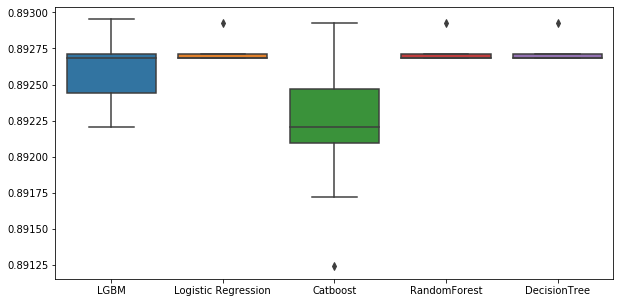

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=CV)
plt.show()